In [6]:
import random
from libs.node import Node
from libs.node import Station
from libs.node import StationDcf
from libs.node import StationRl
from libs.channel import Channel
from tqdm import tqdm
from config import Config
import matplotlib.pyplot as plt

In [7]:
cfg = Config()
global_time = 0
channel = Channel(global_time, [])

station_num = 5
data_rate = 6 #Mbps
#All the lengeth is a mutible of slot

#incule header
pkt_len = 1560
#us
slot_len = 10
sifs = 2
ack_len = 2 + sifs
difs = 4
timeout = ack_len

frame_len = pkt_len * 8 / slot_len / data_rate
stations_list = []
total_time = 0

#station = StationDcf(i+1, frame_len, channel, global_time, i+1, timeout, ack_len, difs, sifs)
#stations_list.append(station)

for i in range(station_num):
    if cfg.stationType == "Dcf":
        station = StationDcf(i, frame_len, channel, global_time, i, timeout, ack_len, difs, sifs)
    elif cfg.stationType == "RL":
        station = StationRl(i, frame_len, channel, global_time, i, timeout, ack_len, (i+1))
    stations_list.append(station)

In [8]:
stations_list

In [9]:
if cfg.stationType == "Dcf":
    startEpoch = 0
elif cfg.stationType == "RL":
    startEpoch = stations_list[0].epoch

print("==> startEpoch: ", startEpoch)
for i in tqdm(range(startEpoch, startEpoch+cfg.NUM_EPOCHS)):
    for station in stations_list:
        station.simulate(global_time)
    global_time = global_time + 1
    channel.update_state(global_time)

    if cfg.shuffleStationList:
        random.shuffle(stations_list)

for station in stations_list:
    total_time += station.total_pkt_time

    if cfg.stationType == "RL":
        station.saveModel()
print("==> total_time:", total_time)
total_time_channel = 0
for i in range(len(channel.start) ):
    if(i > 0):
        if ((channel.start[i] - channel.start[i-1]) < frame_len):
            continue
    total_time_channel += frame_len
print("==> total_time_channel:", total_time_channel)
print("==> channel time:", channel.time)
throughput = total_time/channel.time * data_rate * 1500 / 1560
print("==> throughput:", throughput)

  0%|                                                                              | 24/30000 [00:00<02:25, 205.74it/s]

==> startEpoch:  0
[in reward_transmit]: input Channel::[1, 0], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0], reward = 0
mean of reward_transmit_list: 0.2586274877325581
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0], reward = 0
mean of reward_transmit_list: 0.2571325311560693
[in reward_transmit]: input Channel::[1, 0], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0], reward = 0
mean of reward_transmit_list: 0.25565475798850573
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in 

  0%|                                                                               | 31/30000 [00:00<05:54, 84.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  0%|                                                                               | 37/30000 [00:00<08:30, 58.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  0%|                                                                               | 42/30000 [00:00<10:24, 47.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  0%|                                                                               | 47/30000 [00:00<11:37, 42.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  0%|▏                                                                              | 56/30000 [00:01<13:06, 38.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  0%|▏                                                                              | 64/30000 [00:01<14:14, 35.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  0%|▏                                                                              | 68/30000 [00:01<14:19, 34.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  0%|▏                                                                              | 76/30000 [00:01<14:17, 34.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  0%|▏                                                                              | 80/30000 [00:01<14:33, 34.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  0%|▏                                                                              | 88/30000 [00:01<14:15, 34.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  0%|▏                                                                              | 92/30000 [00:02<14:31, 34.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  0%|▎                                                                             | 100/30000 [00:02<15:18, 32.55it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  0%|▎                                                                             | 108/30000 [00:02<15:05, 33.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  0%|▎                                                                             | 112/30000 [00:02<14:59, 33.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  0%|▎                                                                             | 120/30000 [00:02<15:36, 31.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  0%|▎                                                                             | 124/30000 [00:03<15:16, 32.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  0%|▎                                                                             | 132/30000 [00:03<15:24, 32.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  0%|▎                                                                             | 136/30000 [00:03<15:26, 32.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  0%|▎                                                                             | 144/30000 [00:03<14:52, 33.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  0%|▍                                                                             | 148/30000 [00:03<14:52, 33.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  1%|▍                                                                             | 156/30000 [00:04<14:32, 34.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  1%|▍                                                                             | 164/30000 [00:04<14:17, 34.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  1%|▍                                                                             | 168/30000 [00:04<14:14, 34.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  1%|▍                                                                             | 176/30000 [00:04<14:46, 33.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  1%|▍                                                                             | 184/30000 [00:04<14:24, 34.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  1%|▍                                                                             | 188/30000 [00:04<14:27, 34.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  1%|▌                                                                             | 196/30000 [00:05<15:08, 32.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  1%|▌                                                                             | 200/30000 [00:05<15:19, 32.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  1%|▌                                                                             | 208/30000 [00:05<15:04, 32.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  1%|█                                                                             | 419/30000 [00:05<10:33, 46.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: 0.25419387365714285
[in reward_transmit]: input Channel::[1, 0], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: 0.2470677721022727
[in reward_transmit]: input Channel::[1, 0], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: 0.24002219146892653
[in reward_transmit]: input Channel::[1, 0], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: 0.23305577466292132
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2

  2%|█▏                                                                            | 473/30000 [00:07<13:29, 36.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] re

  2%|█▎                                                                            | 512/30000 [00:09<16:01, 30.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] re

  2%|█▍                                                                            | 540/30000 [00:10<17:38, 27.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] re

  2%|█▍                                                                            | 561/30000 [00:11<19:08, 25.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] re

  2%|█▍                                                                            | 576/30000 [00:12<20:06, 24.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] re

  2%|█▌                                                                            | 587/30000 [00:13<20:37, 23.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▌                                                                            | 596/30000 [00:13<21:08, 23.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▌                                                                            | 603/30000 [00:13<21:23, 22.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▌                                                                            | 609/30000 [00:14<21:26, 22.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▌                                                                            | 614/30000 [00:14<21:39, 22.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▌                                                                            | 618/30000 [00:14<21:23, 22.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▌                                                                            | 622/30000 [00:14<21:31, 22.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▋                                                                            | 625/30000 [00:14<21:21, 22.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▋                                                                            | 631/30000 [00:15<23:06, 21.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 1 2 0 0 0 0 1
 2 0 0], reward = -2.71
mean of reward_transmit_list: 0.19216443895604396
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▋                                                                            | 634/30000 [00:15<22:31, 21.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▋                                                                            | 637/30000 [00:15<22:09, 22.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▋                                                                            | 640/30000 [00:15<23:18, 20.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  2%|█▋                                                                            | 646/30000 [00:15<24:59, 19.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▋                                                                            | 649/30000 [00:15<25:53, 18.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▋                                                                            | 651/30000 [00:16<26:49, 18.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▋                                                                            | 655/30000 [00:16<28:36, 17.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▋                                                                            | 659/30000 [00:16<28:31, 17.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  2%|█▋                                                                            | 661/30000 [00:16<29:06, 16.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▋                                                                            | 665/30000 [00:16<28:43, 17.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▋                                                                            | 667/30000 [00:17<28:31, 17.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▋                                                                            | 671/30000 [00:17<28:07, 17.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▋                                                                            | 673/30000 [00:17<28:36, 17.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▊                                                                            | 677/30000 [00:17<28:38, 17.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▊                                                                            | 681/30000 [00:17<29:01, 16.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▊                                                                            | 683/30000 [00:18<30:06, 16.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▊                                                                            | 687/30000 [00:18<29:45, 16.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▊                                                                            | 689/30000 [00:18<30:06, 16.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▊                                                                            | 693/30000 [00:18<29:29, 16.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▊                                                                            | 695/30000 [00:18<29:11, 16.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▊                                                                            | 699/30000 [00:18<29:28, 16.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▊                                                                            | 701/30000 [00:19<29:59, 16.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▊                                                                            | 705/30000 [00:19<29:02, 16.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▊                                                                            | 707/30000 [00:19<29:35, 16.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  2%|█▊                                                                            | 711/30000 [00:19<29:13, 16.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▊                                                                            | 713/30000 [00:19<29:56, 16.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  2%|█▊                                                                            | 717/30000 [00:20<29:19, 16.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▊                                                                            | 719/30000 [00:20<31:42, 15.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  2%|█▉                                                                            | 723/30000 [00:20<31:24, 15.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▉                                                                            | 727/30000 [00:20<29:56, 16.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▉                                                                            | 729/30000 [00:20<30:13, 16.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▉                                                                            | 733/30000 [00:21<30:30, 15.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▉                                                                            | 735/30000 [00:21<30:37, 15.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▉                                                                            | 739/30000 [00:21<30:40, 15.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▉                                                                            | 741/30000 [00:21<30:00, 16.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▉                                                                            | 745/30000 [00:21<29:33, 16.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  2%|█▉                                                                            | 747/30000 [00:21<30:19, 16.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|█▉                                                                            | 751/30000 [00:22<30:15, 16.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|█▉                                                                            | 753/30000 [00:22<29:38, 16.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|█▉                                                                            | 757/30000 [00:22<30:26, 16.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|█▉                                                                            | 759/30000 [00:22<29:32, 16.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  3%|█▉                                                                            | 763/30000 [00:22<29:40, 16.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|█▉                                                                            | 767/30000 [00:23<29:03, 16.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|█▉                                                                            | 769/30000 [00:23<28:52, 16.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██                                                                            | 773/30000 [00:23<28:55, 16.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██                                                                            | 775/30000 [00:23<29:04, 16.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██                                                                            | 779/30000 [00:23<28:35, 17.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██                                                                            | 781/30000 [00:24<29:46, 16.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██                                                                            | 785/30000 [00:24<30:51, 15.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██                                                                            | 787/30000 [00:24<30:29, 15.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██                                                                            | 791/30000 [00:24<29:10, 16.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██                                                                            | 795/30000 [00:24<29:06, 16.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██                                                                            | 797/30000 [00:24<28:40, 16.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██                                                                            | 801/30000 [00:25<28:23, 17.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██                                                                            | 803/30000 [00:25<28:23, 17.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  3%|██                                                                            | 807/30000 [00:25<28:33, 17.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██                                                                            | 811/30000 [00:25<28:17, 17.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██                                                                            | 813/30000 [00:25<28:32, 17.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██                                                                            | 817/30000 [00:26<28:43, 16.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▏                                                                           | 819/30000 [00:26<28:10, 17.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  3%|██▏                                                                           | 823/30000 [00:26<27:45, 17.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▏                                                                           | 827/30000 [00:26<27:58, 17.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▏                                                                           | 829/30000 [00:26<28:31, 17.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▏                                                                           | 833/30000 [00:27<28:22, 17.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▏                                                                           | 837/30000 [00:27<28:09, 17.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▏                                                                           | 839/30000 [00:27<28:00, 17.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▏                                                                           | 843/30000 [00:27<27:53, 17.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: 0.1911143600546448
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 1 2 0 0 0 0 1 2 0
 0 1 0], reward = -1.439
mean of reward_transmit_list: 0.1822550428804348
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: 0.18126988048648648
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▏                                                                           | 847/30000 [00:27<23:57, 20.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▏                                                                           | 855/30000 [00:28<19:07, 25.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▏                                                                           | 863/30000 [00:28<16:32, 29.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▎                                                                           | 867/30000 [00:28<15:38, 31.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▎                                                                           | 875/30000 [00:28<15:03, 32.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▎                                                                           | 879/30000 [00:28<14:45, 32.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  3%|██▎                                                                           | 887/30000 [00:28<14:06, 34.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▎                                                                           | 895/30000 [00:29<14:10, 34.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▎                                                                           | 899/30000 [00:29<14:38, 33.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▎                                                                           | 903/30000 [00:29<15:25, 31.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  3%|██▎                                                                           | 911/30000 [00:29<15:04, 32.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▍                                                                           | 915/30000 [00:29<14:56, 32.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  3%|██▍                                                                           | 923/30000 [00:30<15:07, 32.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▍                                                                           | 931/30000 [00:30<15:02, 32.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▍                                                                           | 935/30000 [00:30<15:05, 32.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▍                                                                           | 943/30000 [00:30<14:48, 32.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▍                                                                           | 947/30000 [00:30<15:32, 31.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▍                                                                           | 955/30000 [00:31<15:11, 31.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  3%|██▍                                                                           | 959/30000 [00:31<14:56, 32.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▌                                                                           | 967/30000 [00:31<14:57, 32.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▌                                                                           | 971/30000 [00:31<14:59, 32.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▌                                                                           | 979/30000 [00:31<15:18, 31.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▌                                                                           | 983/30000 [00:31<15:03, 32.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▌                                                                           | 991/30000 [00:32<15:31, 31.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▌                                                                           | 995/30000 [00:32<15:07, 31.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▌                                                                          | 1003/30000 [00:32<14:52, 32.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▌                                                                          | 1007/30000 [00:32<14:38, 33.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  3%|██▌                                                                          | 1015/30000 [00:32<14:20, 33.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  3%|██▋                                                                          | 1023/30000 [00:33<14:50, 32.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▋                                                                          | 1027/30000 [00:33<14:32, 33.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▋                                                                          | 1035/30000 [00:33<14:10, 34.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  3%|██▋                                                                          | 1039/30000 [00:33<14:32, 33.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  3%|██▋                                                                          | 1047/30000 [00:33<14:20, 33.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|██▋                                                                          | 1051/30000 [00:34<15:13, 31.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: 0.18029531123655912
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|██▋                                                                          | 1055/30000 [00:34<17:59, 26.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|██▋                                                                          | 1058/30000 [00:34<19:51, 24.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  4%|██▋                                                                          | 1064/30000 [00:34<22:25, 21.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|██▋                                                                          | 1067/30000 [00:34<25:07, 19.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|██▋                                                                          | 1070/30000 [00:35<26:14, 18.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|██▊                                                                          | 1072/30000 [00:35<27:49, 17.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|██▊                                                                          | 1076/30000 [00:35<28:33, 16.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|██▊                                                                          | 1078/30000 [00:35<29:43, 16.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|██▊                                                                          | 1082/30000 [00:35<28:23, 16.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|██▊                                                                          | 1084/30000 [00:35<29:28, 16.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|██▊                                                                          | 1088/30000 [00:36<29:32, 16.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|██▊                                                                          | 1090/30000 [00:36<28:57, 16.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  4%|██▊                                                                          | 1094/30000 [00:36<28:52, 16.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|██▊                                                                          | 1098/30000 [00:36<28:19, 17.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|██▊                                                                          | 1100/30000 [00:36<28:15, 17.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|██▊                                                                          | 1104/30000 [00:37<28:52, 16.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|██▊                                                                          | 1106/30000 [00:37<29:08, 16.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|██▊                                                                          | 1110/30000 [00:37<30:25, 15.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|██▊                                                                          | 1112/30000 [00:37<29:30, 16.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|██▊                                                                          | 1116/30000 [00:37<28:25, 16.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  4%|██▊                                                                          | 1118/30000 [00:37<28:49, 16.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  4%|██▉                                                                          | 1122/30000 [00:38<28:07, 17.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|██▉                                                                          | 1126/30000 [00:38<27:39, 17.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|██▉                                                                          | 1128/30000 [00:38<27:42, 17.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|██▉                                                                          | 1132/30000 [00:38<28:59, 16.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|██▉                                                                          | 1134/30000 [00:38<29:21, 16.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|██▉                                                                          | 1138/30000 [00:39<28:25, 16.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|██▉                                                                          | 1142/30000 [00:39<28:37, 16.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|██▉                                                                          | 1144/30000 [00:39<29:23, 16.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|██▉                                                                          | 1148/30000 [00:39<29:22, 16.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|██▉                                                                          | 1150/30000 [00:39<28:45, 16.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|██▉                                                                          | 1154/30000 [00:40<28:25, 16.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|██▉                                                                          | 1156/30000 [00:40<28:27, 16.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  4%|██▉                                                                          | 1160/30000 [00:40<27:44, 17.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|██▉                                                                          | 1164/30000 [00:40<27:39, 17.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|██▉                                                                          | 1166/30000 [00:40<27:41, 17.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███                                                                          | 1170/30000 [00:40<27:15, 17.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  4%|███                                                                          | 1172/30000 [00:41<27:46, 17.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  4%|███                                                                          | 1176/30000 [00:41<30:13, 15.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███                                                                          | 1178/30000 [00:41<30:34, 15.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███                                                                          | 1182/30000 [00:41<29:33, 16.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███                                                                          | 1184/30000 [00:41<31:01, 15.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███                                                                          | 1188/30000 [00:42<29:50, 16.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███                                                                          | 1190/30000 [00:42<29:25, 16.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  4%|███                                                                          | 1194/30000 [00:42<28:16, 16.98it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███                                                                          | 1196/30000 [00:42<29:24, 16.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███                                                                          | 1200/30000 [00:42<31:00, 15.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███                                                                          | 1202/30000 [00:43<30:27, 15.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  4%|███                                                                          | 1206/30000 [00:43<28:52, 16.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███                                                                          | 1208/30000 [00:43<28:41, 16.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  4%|███                                                                          | 1212/30000 [00:43<30:35, 15.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███                                                                          | 1214/30000 [00:43<31:23, 15.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███▏                                                                         | 1218/30000 [00:44<29:23, 16.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███▏                                                                         | 1222/30000 [00:44<28:12, 17.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  4%|███▏                                                                         | 1224/30000 [00:44<28:30, 16.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███▏                                                                         | 1228/30000 [00:44<29:53, 16.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███▏                                                                         | 1230/30000 [00:44<29:23, 16.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███▏                                                                         | 1234/30000 [00:44<28:40, 16.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  4%|███▏                                                                         | 1238/30000 [00:45<28:26, 16.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███▏                                                                         | 1240/30000 [00:45<28:13, 16.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███▏                                                                         | 1244/30000 [00:45<27:53, 17.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███▏                                                                         | 1248/30000 [00:45<27:13, 17.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███▏                                                                         | 1250/30000 [00:45<27:22, 17.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███▏                                                                         | 1254/30000 [00:46<29:49, 16.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███▏                                                                         | 1256/30000 [00:46<29:02, 16.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███▏                                                                         | 1260/30000 [00:46<28:14, 16.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███▏                                                                         | 1262/30000 [00:46<29:26, 16.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  4%|███▎                                                                         | 1267/30000 [00:46<26:36, 18.00it/s]

[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 0 1 0], reward = 1.0
mean of reward_transmit_list: 0.18467875877005346
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: 0.18369642494680852
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: 0.18272448619047618
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███▎                                                                         | 1271/30000 [00:46<23:01, 20.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  4%|███▎                                                                         | 1278/30000 [00:47<19:32, 24.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███▎                                                                         | 1286/30000 [00:47<16:32, 28.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███▎                                                                         | 1290/30000 [00:47<16:07, 29.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███▎                                                                         | 1298/30000 [00:47<14:57, 31.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███▎                                                                         | 1302/30000 [00:47<15:05, 31.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███▎                                                                         | 1310/30000 [00:48<14:54, 32.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███▎                                                                         | 1314/30000 [00:48<15:18, 31.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███▍                                                                         | 1322/30000 [00:48<14:46, 32.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███▍                                                                         | 1326/30000 [00:48<14:39, 32.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  4%|███▍                                                                         | 1334/30000 [00:48<14:35, 32.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███▍                                                                         | 1338/30000 [00:49<14:45, 32.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███▍                                                                         | 1346/30000 [00:49<15:18, 31.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  4%|███▍                                                                         | 1350/30000 [00:49<14:47, 32.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|███▍                                                                         | 1358/30000 [00:49<15:06, 31.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|███▍                                                                         | 1362/30000 [00:49<14:47, 32.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  5%|███▌                                                                         | 1370/30000 [00:50<14:57, 31.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|███▌                                                                         | 1378/30000 [00:50<14:32, 32.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|███▌                                                                         | 1382/30000 [00:50<14:48, 32.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|███▌                                                                         | 1390/30000 [00:50<14:14, 33.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|███▌                                                                         | 1394/30000 [00:50<14:29, 32.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|███▌                                                                         | 1402/30000 [00:51<14:22, 33.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|███▌                                                                         | 1406/30000 [00:51<14:26, 33.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|███▋                                                                         | 1414/30000 [00:51<14:53, 32.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|███▋                                                                         | 1418/30000 [00:51<14:58, 31.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|███▋                                                                         | 1426/30000 [00:51<14:35, 32.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|███▋                                                                         | 1430/30000 [00:51<14:24, 33.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  5%|███▋                                                                         | 1438/30000 [00:52<14:06, 33.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|███▋                                                                         | 1446/30000 [00:52<13:42, 34.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|███▋                                                                         | 1450/30000 [00:52<13:45, 34.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  5%|███▋                                                                         | 1458/30000 [00:52<13:38, 34.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|███▊                                                                         | 1466/30000 [00:52<13:53, 34.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|███▊                                                                         | 1470/30000 [00:53<13:55, 34.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|███▊                                                                         | 1474/30000 [00:53<16:49, 28.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: 0.18176277836842106
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 0 1
 2 0 0], reward = -0.09999999999999998
mean of reward_transmit_list: 0.1802875805759162
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|███▊                                                                         | 1477/30000 [00:53<18:04, 26.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  5%|███▊                                                                         | 1483/30000 [00:53<19:21, 24.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|███▊                                                                         | 1486/30000 [00:53<19:53, 23.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|███▊                                                                         | 1492/30000 [00:54<19:56, 23.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|███▊                                                                         | 1495/30000 [00:54<20:15, 23.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|███▊                                                                         | 1501/30000 [00:54<20:55, 22.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|███▊                                                                         | 1504/30000 [00:54<21:05, 22.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|███▊                                                                         | 1507/30000 [00:54<20:55, 22.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  5%|███▉                                                                         | 1513/30000 [00:54<20:45, 22.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  5%|███▉                                                                         | 1516/30000 [00:55<21:37, 21.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  5%|███▉                                                                         | 1522/30000 [00:55<21:17, 22.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|███▉                                                                         | 1525/30000 [00:55<21:40, 21.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|███▉                                                                         | 1531/30000 [00:55<21:18, 22.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|███▉                                                                         | 1534/30000 [00:55<21:15, 22.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  5%|███▉                                                                         | 1537/30000 [00:56<22:01, 21.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|███▉                                                                         | 1543/30000 [00:56<21:29, 22.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  5%|███▉                                                                         | 1546/30000 [00:56<21:54, 21.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|███▉                                                                         | 1552/30000 [00:56<21:22, 22.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|███▉                                                                         | 1555/30000 [00:56<21:57, 21.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|███▉                                                                         | 1558/30000 [00:57<21:42, 21.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|████                                                                         | 1564/30000 [00:57<22:22, 21.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|████                                                                         | 1567/30000 [00:57<21:40, 21.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|████                                                                         | 1570/30000 [00:57<21:49, 21.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|████                                                                         | 1576/30000 [00:57<21:37, 21.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  5%|████                                                                         | 1579/30000 [00:57<21:28, 22.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|████                                                                         | 1582/30000 [00:58<22:15, 21.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  5%|████                                                                         | 1588/30000 [00:58<22:31, 21.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  5%|████                                                                         | 1591/30000 [00:58<22:08, 21.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|████                                                                         | 1594/30000 [00:58<21:54, 21.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  5%|████                                                                         | 1600/30000 [00:58<22:10, 21.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|████                                                                         | 1603/30000 [00:59<22:39, 20.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|████▏                                                                        | 1609/30000 [00:59<22:25, 21.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  5%|████▏                                                                        | 1612/30000 [00:59<22:12, 21.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|████▏                                                                        | 1615/30000 [00:59<21:57, 21.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  5%|████▏                                                                        | 1621/30000 [00:59<22:37, 20.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|████▏                                                                        | 1624/30000 [01:00<22:03, 21.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|████▏                                                                        | 1627/30000 [01:00<21:51, 21.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  5%|████▏                                                                        | 1633/30000 [01:00<21:27, 22.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|████▏                                                                        | 1636/30000 [01:00<21:45, 21.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|████▏                                                                        | 1639/30000 [01:00<22:15, 21.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  5%|████▏                                                                        | 1645/30000 [01:01<22:39, 20.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  5%|████▏                                                                        | 1648/30000 [01:01<22:38, 20.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▏                                                                        | 1651/30000 [01:01<23:09, 20.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  6%|████▎                                                                        | 1657/30000 [01:01<23:07, 20.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▎                                                                        | 1660/30000 [01:01<22:30, 20.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▎                                                                        | 1663/30000 [01:01<22:29, 21.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▎                                                                        | 1669/30000 [01:02<21:52, 21.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▎                                                                        | 1672/30000 [01:02<22:33, 20.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  6%|████▎                                                                        | 1678/30000 [01:02<21:40, 21.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▎                                                                        | 1681/30000 [01:02<21:25, 22.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 0 1 2 0 0 1
 2 0 0], reward = -1.09
mean of reward_transmit_list: 0.1736714994270833
in [reward_wait] reward = 0

  6%|████▎                                                                        | 1684/30000 [01:02<23:14, 20.31it/s]


[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: 0.17277164709844556
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: 0.1718810715979381
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▎                                                                        | 1692/30000 [01:03<18:26, 25.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▎                                                                        | 1700/30000 [01:03<16:00, 29.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  6%|████▎                                                                        | 1704/30000 [01:03<15:07, 31.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▍                                                                        | 1712/30000 [01:03<14:19, 32.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▍                                                                        | 1716/30000 [01:03<14:07, 33.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  6%|████▍                                                                        | 1724/30000 [01:04<13:53, 33.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▍                                                                        | 1732/30000 [01:04<13:36, 34.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▍                                                                        | 1736/30000 [01:04<13:38, 34.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▍                                                                        | 1744/30000 [01:04<13:23, 35.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▍                                                                        | 1752/30000 [01:04<13:26, 35.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▌                                                                        | 1756/30000 [01:05<13:33, 34.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▌                                                                        | 1764/30000 [01:05<13:35, 34.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▌                                                                        | 1768/30000 [01:05<13:37, 34.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  6%|████▌                                                                        | 1776/30000 [01:05<13:32, 34.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▌                                                                        | 1784/30000 [01:05<13:22, 35.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▌                                                                        | 1788/30000 [01:05<13:49, 34.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▌                                                                        | 1796/30000 [01:06<13:36, 34.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▋                                                                        | 1804/30000 [01:06<13:49, 34.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▋                                                                        | 1808/30000 [01:06<13:44, 34.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▋                                                                        | 1816/30000 [01:06<13:26, 34.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▋                                                                        | 1820/30000 [01:06<13:35, 34.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  6%|████▋                                                                        | 1828/30000 [01:07<13:19, 35.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▋                                                                        | 1836/30000 [01:07<13:10, 35.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▋                                                                        | 1840/30000 [01:07<13:23, 35.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  6%|████▋                                                                        | 1848/30000 [01:07<13:16, 35.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▊                                                                        | 1856/30000 [01:07<13:17, 35.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▊                                                                        | 1860/30000 [01:08<13:18, 35.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  6%|████▊                                                                        | 1868/30000 [01:08<13:15, 35.38it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▊                                                                        | 1876/30000 [01:08<13:14, 35.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▊                                                                        | 1880/30000 [01:08<13:20, 35.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▊                                                                        | 1888/30000 [01:08<13:27, 34.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▊                                                                        | 1892/30000 [01:09<16:31, 28.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: 0.17099963020512818
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: 0.16502514229591833
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▊                                                                        | 1896/30000 [01:09<17:29, 26.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▊                                                                        | 1899/30000 [01:09<18:18, 25.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  6%|████▉                                                                        | 1905/30000 [01:09<19:06, 24.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▉                                                                        | 1908/30000 [01:09<19:26, 24.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▉                                                                        | 1914/30000 [01:09<20:31, 22.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▉                                                                        | 1917/30000 [01:10<21:19, 21.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▉                                                                        | 1920/30000 [01:10<22:45, 20.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▉                                                                        | 1923/30000 [01:10<22:50, 20.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  6%|████▉                                                                        | 1929/30000 [01:10<22:44, 20.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▉                                                                        | 1932/30000 [01:10<23:14, 20.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▉                                                                        | 1935/30000 [01:11<24:00, 19.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▉                                                                        | 1940/30000 [01:11<23:23, 19.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|████▉                                                                        | 1943/30000 [01:11<22:20, 20.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  6%|█████                                                                        | 1949/30000 [01:11<21:14, 22.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████                                                                        | 1952/30000 [01:11<20:55, 22.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████                                                                        | 1958/30000 [01:12<20:21, 22.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████                                                                        | 1961/30000 [01:12<20:13, 23.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████                                                                        | 1964/30000 [01:12<20:26, 22.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████                                                                        | 1970/30000 [01:12<21:14, 22.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████                                                                        | 1973/30000 [01:12<20:35, 22.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████                                                                        | 1976/30000 [01:12<21:35, 21.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  7%|█████                                                                        | 1982/30000 [01:13<22:28, 20.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████                                                                        | 1985/30000 [01:13<22:34, 20.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████                                                                        | 1988/30000 [01:13<22:24, 20.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  7%|█████                                                                        | 1994/30000 [01:13<22:32, 20.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▏                                                                       | 1997/30000 [01:13<22:28, 20.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▏                                                                       | 2000/30000 [01:14<22:23, 20.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▏                                                                       | 2006/30000 [01:14<21:23, 21.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▏                                                                       | 2009/30000 [01:14<21:18, 21.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▏                                                                       | 2012/30000 [01:14<21:05, 22.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▏                                                                       | 2018/30000 [01:14<22:43, 20.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▏                                                                       | 2021/30000 [01:15<21:51, 21.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▏                                                                       | 2027/30000 [01:15<21:05, 22.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▏                                                                       | 2030/30000 [01:15<20:45, 22.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▏                                                                       | 2033/30000 [01:15<20:20, 22.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  7%|█████▏                                                                       | 2039/30000 [01:15<20:29, 22.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▏                                                                       | 2042/30000 [01:15<21:35, 21.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▏                                                                       | 2045/30000 [01:16<21:39, 21.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  7%|█████▎                                                                       | 2051/30000 [01:16<21:04, 22.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  7%|█████▎                                                                       | 2054/30000 [01:16<22:25, 20.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▎                                                                       | 2057/30000 [01:16<24:05, 19.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▎                                                                       | 2063/30000 [01:16<23:19, 19.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▎                                                                       | 2066/30000 [01:17<23:20, 19.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▎                                                                       | 2069/30000 [01:17<23:12, 20.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▎                                                                       | 2072/30000 [01:17<22:19, 20.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  7%|█████▎                                                                       | 2078/30000 [01:17<25:16, 18.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  7%|█████▎                                                                       | 2081/30000 [01:17<24:25, 19.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  7%|█████▎                                                                       | 2085/30000 [01:18<24:03, 19.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▎                                                                       | 2088/30000 [01:18<23:31, 19.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▎                                                                       | 2091/30000 [01:18<22:57, 20.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▍                                                                       | 2097/30000 [01:18<23:05, 20.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▍                                                                       | 2100/30000 [01:18<24:19, 19.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1
 2 0 0], reward = -1.9
mean of reward_transmit_list: 0.15454278116751266
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: 0.15376226207070703
in [reward_wait] reward = 0

  7%|█████▍                                                                       | 2102/30000 [01:19<27:10, 17.11it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▍                                                                       | 2105/30000 [01:19<24:54, 18.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  7%|█████▍                                                                       | 2110/30000 [01:19<24:09, 19.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▍                                                                       | 2113/30000 [01:19<23:12, 20.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  7%|█████▍                                                                       | 2119/30000 [01:19<21:52, 21.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▍                                                                       | 2122/30000 [01:19<21:14, 21.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  7%|█████▍                                                                       | 2128/30000 [01:20<20:07, 23.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▍                                                                       | 2131/30000 [01:20<20:12, 22.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  7%|█████▍                                                                       | 2137/30000 [01:20<19:42, 23.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▍                                                                       | 2140/30000 [01:20<19:51, 23.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  7%|█████▌                                                                       | 2146/30000 [01:20<19:41, 23.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▌                                                                       | 2149/30000 [01:21<19:42, 23.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▌                                                                       | 2155/30000 [01:21<19:45, 23.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▌                                                                       | 2158/30000 [01:21<20:49, 22.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▌                                                                       | 2161/30000 [01:21<20:32, 22.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  7%|█████▌                                                                       | 2167/30000 [01:21<21:36, 21.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▌                                                                       | 2170/30000 [01:22<21:41, 21.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▌                                                                       | 2173/30000 [01:22<21:53, 21.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▌                                                                       | 2176/30000 [01:22<23:08, 20.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▌                                                                       | 2179/30000 [01:22<24:28, 18.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  7%|█████▌                                                                       | 2183/30000 [01:22<27:53, 16.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▌                                                                       | 2187/30000 [01:23<26:26, 17.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▌                                                                       | 2189/30000 [01:23<25:55, 17.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  7%|█████▋                                                                       | 2195/30000 [01:23<22:49, 20.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▋                                                                       | 2198/30000 [01:23<22:35, 20.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  7%|█████▋                                                                       | 2201/30000 [01:23<22:50, 20.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  7%|█████▋                                                                       | 2207/30000 [01:23<22:59, 20.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▋                                                                       | 2210/30000 [01:24<23:12, 19.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▋                                                                       | 2215/30000 [01:24<23:56, 19.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▋                                                                       | 2218/30000 [01:24<22:59, 20.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▋                                                                       | 2221/30000 [01:24<22:19, 20.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  7%|█████▋                                                                       | 2227/30000 [01:24<20:49, 22.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▋                                                                       | 2230/30000 [01:25<20:29, 22.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▋                                                                       | 2236/30000 [01:25<20:12, 22.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▋                                                                       | 2239/30000 [01:25<19:52, 23.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  7%|█████▊                                                                       | 2245/30000 [01:25<19:28, 23.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  7%|█████▊                                                                       | 2248/30000 [01:25<19:37, 23.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|█████▊                                                                       | 2254/30000 [01:26<19:45, 23.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|█████▊                                                                       | 2257/30000 [01:26<19:44, 23.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|█████▊                                                                       | 2263/30000 [01:26<19:53, 23.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|█████▊                                                                       | 2266/30000 [01:26<19:38, 23.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|█████▊                                                                       | 2272/30000 [01:26<20:01, 23.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|█████▊                                                                       | 2275/30000 [01:26<19:51, 23.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|█████▊                                                                       | 2278/30000 [01:27<19:48, 23.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  8%|█████▊                                                                       | 2284/30000 [01:27<20:24, 22.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|█████▊                                                                       | 2287/30000 [01:27<20:05, 22.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|█████▉                                                                       | 2293/30000 [01:27<19:58, 23.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|█████▉                                                                       | 2296/30000 [01:27<20:45, 22.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|█████▉                                                                       | 2299/30000 [01:28<20:49, 22.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  8%|█████▉                                                                       | 2305/30000 [01:28<20:23, 22.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|█████▉                                                                       | 2308/30000 [01:28<20:09, 22.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1 2 0 0 1
 2 0 0], reward = -2.71
mean of reward_transmit_list: 0.13937149693467335
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0

  8%|█████▉                                                                       | 2311/30000 [01:28<22:40, 20.35it/s]


mean of reward_transmit_list: 0.13867463944999997
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  8%|█████▉                                                                       | 2317/30000 [01:28<22:06, 20.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|█████▉                                                                       | 2320/30000 [01:29<23:06, 19.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|█████▉                                                                       | 2323/30000 [01:29<23:32, 19.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  8%|█████▉                                                                       | 2327/30000 [01:29<23:32, 19.59it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|█████▉                                                                       | 2332/30000 [01:29<23:48, 19.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  8%|█████▉                                                                       | 2334/30000 [01:29<25:20, 18.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████                                                                       | 2338/30000 [01:30<27:17, 16.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████                                                                       | 2340/30000 [01:30<26:37, 17.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  8%|██████                                                                       | 2344/30000 [01:30<25:22, 18.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████                                                                       | 2348/30000 [01:30<25:00, 18.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████                                                                       | 2352/30000 [01:30<24:37, 18.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████                                                                       | 2354/30000 [01:30<25:05, 18.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  8%|██████                                                                       | 2359/30000 [01:31<24:17, 18.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████                                                                       | 2362/30000 [01:31<24:02, 19.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  8%|██████                                                                       | 2367/30000 [01:31<23:26, 19.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████                                                                       | 2370/30000 [01:31<22:53, 20.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████                                                                       | 2373/30000 [01:31<23:10, 19.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████                                                                       | 2376/30000 [01:32<23:01, 20.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  8%|██████                                                                       | 2382/30000 [01:32<23:20, 19.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████                                                                       | 2384/30000 [01:32<25:04, 18.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▏                                                                      | 2388/30000 [01:32<27:15, 16.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▏                                                                      | 2391/30000 [01:32<25:08, 18.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▏                                                                      | 2397/30000 [01:33<22:31, 20.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▏                                                                      | 2400/30000 [01:33<22:00, 20.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  8%|██████▏                                                                      | 2406/30000 [01:33<20:46, 22.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▏                                                                      | 2409/30000 [01:33<20:19, 22.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▏                                                                      | 2415/30000 [01:33<19:43, 23.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▏                                                                      | 2418/30000 [01:34<19:43, 23.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▏                                                                      | 2424/30000 [01:34<19:37, 23.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▏                                                                      | 2427/30000 [01:34<19:22, 23.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▏                                                                      | 2433/30000 [01:34<19:29, 23.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▎                                                                      | 2436/30000 [01:34<19:19, 23.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▎                                                                      | 2442/30000 [01:35<19:10, 23.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▎                                                                      | 2445/30000 [01:35<19:11, 23.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▎                                                                      | 2451/30000 [01:35<19:00, 24.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▎                                                                      | 2454/30000 [01:35<19:07, 24.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▎                                                                      | 2460/30000 [01:35<19:07, 24.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▎                                                                      | 2463/30000 [01:35<19:11, 23.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▎                                                                      | 2469/30000 [01:36<19:47, 23.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▎                                                                      | 2472/30000 [01:36<20:12, 22.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▎                                                                      | 2475/30000 [01:36<21:08, 21.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▎                                                                      | 2478/30000 [01:36<21:31, 21.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  8%|██████▍                                                                      | 2484/30000 [01:36<22:19, 20.55it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▍                                                                      | 2487/30000 [01:37<21:36, 21.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▍                                                                      | 2493/30000 [01:37<20:43, 22.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  8%|██████▍                                                                      | 2496/30000 [01:37<20:13, 22.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▍                                                                      | 2502/30000 [01:37<19:54, 23.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▍                                                                      | 2505/30000 [01:37<19:44, 23.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▍                                                                      | 2511/30000 [01:38<20:29, 22.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▍                                                                      | 2514/30000 [01:38<21:03, 21.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▍                                                                      | 2517/30000 [01:38<20:46, 22.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: 0.13798471587064673
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1 2 0 0 1 2 0 0 1
 2 0 0], reward = -3.439
mean of reward_transmit_list: 0.12027687074257423
in [reward_wait] reward = 0

  8%|██████▍                                                                      | 2520/30000 [01:38<23:24, 19.57it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▍                                                                      | 2526/30000 [01:38<21:35, 21.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▍                                                                      | 2529/30000 [01:38<21:13, 21.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▍                                                                      | 2532/30000 [01:39<21:50, 20.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  8%|██████▌                                                                      | 2538/30000 [01:39<20:52, 21.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▌                                                                      | 2541/30000 [01:39<20:16, 22.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  8%|██████▌                                                                      | 2547/30000 [01:39<19:43, 23.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  8%|██████▌                                                                      | 2550/30000 [01:39<19:41, 23.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▌                                                                      | 2556/30000 [01:40<19:48, 23.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▌                                                                      | 2559/30000 [01:40<19:53, 23.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▌                                                                      | 2565/30000 [01:40<19:24, 23.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▌                                                                      | 2568/30000 [01:40<19:13, 23.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▌                                                                      | 2574/30000 [01:40<19:15, 23.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▌                                                                      | 2577/30000 [01:40<19:07, 23.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▋                                                                      | 2583/30000 [01:41<19:25, 23.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▋                                                                      | 2586/30000 [01:41<19:20, 23.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▋                                                                      | 2592/30000 [01:41<19:03, 23.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▋                                                                      | 2595/30000 [01:41<19:02, 23.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▋                                                                      | 2601/30000 [01:42<19:00, 24.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▋                                                                      | 2604/30000 [01:42<19:08, 23.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▋                                                                      | 2610/30000 [01:42<19:03, 23.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▋                                                                      | 2613/30000 [01:42<19:02, 23.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  9%|██████▋                                                                      | 2619/30000 [01:42<19:03, 23.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▋                                                                      | 2622/30000 [01:42<18:56, 24.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▋                                                                      | 2628/30000 [01:43<18:59, 24.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▊                                                                      | 2631/30000 [01:43<19:15, 23.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▊                                                                      | 2637/30000 [01:43<18:52, 24.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▊                                                                      | 2640/30000 [01:43<19:45, 23.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▊                                                                      | 2646/30000 [01:43<19:24, 23.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▊                                                                      | 2649/30000 [01:44<19:37, 23.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▊                                                                      | 2652/30000 [01:44<19:25, 23.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  9%|██████▊                                                                      | 2658/30000 [01:44<20:08, 22.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▊                                                                      | 2664/30000 [01:44<23:59, 18.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▊                                                                      | 2667/30000 [01:44<22:31, 20.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▊                                                                      | 2673/30000 [01:45<20:55, 21.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▊                                                                      | 2676/30000 [01:45<20:35, 22.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▉                                                                      | 2682/30000 [01:45<19:45, 23.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▉                                                                      | 2685/30000 [01:45<19:30, 23.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▉                                                                      | 2691/30000 [01:45<19:22, 23.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▉                                                                      | 2694/30000 [01:46<19:49, 22.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▉                                                                      | 2697/30000 [01:46<20:08, 22.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▉                                                                      | 2703/30000 [01:46<20:20, 22.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▉                                                                      | 2706/30000 [01:46<20:27, 22.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▉                                                                      | 2709/30000 [01:46<20:59, 21.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  9%|██████▉                                                                      | 2715/30000 [01:47<21:16, 21.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▉                                                                      | 2718/30000 [01:47<21:20, 21.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▉                                                                      | 2724/30000 [01:47<20:35, 22.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|██████▉                                                                      | 2727/30000 [01:47<22:15, 20.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1 2 0 0 1 2 0 0 1 2 0 0 1
 2 0 0], reward = -4.0951
mean of reward_transmit_list: 0.09951146743842361
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0


  9%|███████                                                                      | 2730/30000 [01:47<21:41, 20.95it/s]

mean of reward_transmit_list: 0.09902366612745095
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: 0.0985406238536585
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|███████                                                                      | 2736/30000 [01:47<19:00, 23.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|███████                                                                      | 2740/30000 [01:48<17:31, 25.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  9%|███████                                                                      | 2747/30000 [01:48<16:16, 27.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  9%|███████                                                                      | 2754/30000 [01:48<16:00, 28.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|███████                                                                      | 2762/30000 [01:48<14:38, 31.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|███████                                                                      | 2766/30000 [01:48<14:01, 32.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|███████                                                                      | 2774/30000 [01:49<13:11, 34.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|███████▏                                                                     | 2782/30000 [01:49<13:18, 34.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|███████▏                                                                     | 2786/30000 [01:49<13:00, 34.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|███████▏                                                                     | 2794/30000 [01:49<12:40, 35.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|███████▏                                                                     | 2802/30000 [01:49<12:31, 36.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|███████▏                                                                     | 2806/30000 [01:50<12:25, 36.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  9%|███████▏                                                                     | 2814/30000 [01:50<12:33, 36.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|███████▏                                                                     | 2822/30000 [01:50<12:36, 35.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|███████▎                                                                     | 2826/30000 [01:50<12:35, 35.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


  9%|███████▎                                                                     | 2834/30000 [01:50<12:51, 35.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|███████▎                                                                     | 2842/30000 [01:51<13:35, 33.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

  9%|███████▎                                                                     | 2846/30000 [01:51<13:14, 34.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▎                                                                     | 2854/30000 [01:51<12:51, 35.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▎                                                                     | 2862/30000 [01:51<12:59, 34.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▎                                                                     | 2866/30000 [01:51<13:11, 34.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▍                                                                     | 2874/30000 [01:52<13:22, 33.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▍                                                                     | 2878/30000 [01:52<13:29, 33.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▍                                                                     | 2886/30000 [01:52<12:57, 34.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▍                                                                     | 2890/30000 [01:52<14:04, 32.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 10%|███████▍                                                                     | 2898/30000 [01:52<13:49, 32.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▍                                                                     | 2906/30000 [01:52<13:09, 34.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▍                                                                     | 2910/30000 [01:53<12:57, 34.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▍                                                                     | 2918/30000 [01:53<13:01, 34.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▌                                                                     | 2926/30000 [01:53<13:07, 34.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▌                                                                     | 2930/30000 [01:53<13:01, 34.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▌                                                                     | 2934/30000 [01:53<12:49, 35.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1 2 0 0 1 2 0 0 1 2 0 0 1 2 0 0 1
 2 0 0], reward = -4.68559
mean of reward_transmit_list: 0.07531668878640772
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: 0.070121922173913
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: 0.06978479754807689
in [reward_wait] reward = 0


 10%|███████▌                                                                     | 2942/30000 [01:54<15:00, 30.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▌                                                                     | 2950/30000 [01:54<13:50, 32.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 10%|███████▌                                                                     | 2954/30000 [01:54<13:35, 33.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▌                                                                     | 2962/30000 [01:54<13:52, 32.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▌                                                                     | 2966/30000 [01:54<13:45, 32.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▋                                                                     | 2974/30000 [01:55<13:27, 33.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▋                                                                     | 2978/30000 [01:55<13:07, 34.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 10%|███████▋                                                                     | 2986/30000 [01:55<12:52, 34.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▋                                                                     | 2990/30000 [01:55<13:49, 32.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▋                                                                     | 2998/30000 [01:55<15:02, 29.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▋                                                                     | 3002/30000 [01:55<14:17, 31.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▋                                                                     | 3010/30000 [01:56<13:33, 33.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▋                                                                     | 3018/30000 [01:56<13:19, 33.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▊                                                                     | 3022/30000 [01:56<13:15, 33.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▊                                                                     | 3030/30000 [01:56<14:04, 31.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▊                                                                     | 3034/30000 [01:56<14:41, 30.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▊                                                                     | 3038/30000 [01:57<14:59, 29.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 10%|███████▊                                                                     | 3046/30000 [01:57<14:04, 31.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▊                                                                     | 3054/30000 [01:57<13:18, 33.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▊                                                                     | 3058/30000 [01:57<13:20, 33.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▊                                                                     | 3066/30000 [01:57<13:08, 34.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▉                                                                     | 3074/30000 [01:58<12:42, 35.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▉                                                                     | 3078/30000 [01:58<12:45, 35.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▉                                                                     | 3086/30000 [01:58<12:33, 35.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▉                                                                     | 3094/30000 [01:58<12:51, 34.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▉                                                                     | 3098/30000 [01:58<12:49, 34.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▉                                                                     | 3106/30000 [01:58<12:47, 35.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|███████▉                                                                     | 3114/30000 [01:59<12:52, 34.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|████████                                                                     | 3118/30000 [01:59<12:53, 34.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|████████                                                                     | 3126/30000 [01:59<13:32, 33.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|████████                                                                     | 3130/30000 [01:59<13:34, 33.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 10%|████████                                                                     | 3138/30000 [01:59<13:33, 33.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|████████                                                                     | 3142/30000 [02:00<13:42, 32.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|████████                                                                     | 3146/30000 [02:00<16:29, 27.14it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: 0.06466620999999996
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1 2 0 0 1 2 0 0 1 2 0 0 1 2 0 0 1 2 0 0 1
 2 0 0], reward = -5.217031
mean of reward_transmit_list: 0.03951527090476186
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 10%|████████                                                                     | 3149/30000 [02:00<18:22, 24.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████                                                                     | 3155/30000 [02:00<19:25, 23.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████                                                                     | 3158/30000 [02:00<19:20, 23.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████                                                                     | 3164/30000 [02:01<19:16, 23.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▏                                                                    | 3167/30000 [02:01<19:01, 23.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▏                                                                    | 3173/30000 [02:01<18:57, 23.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▏                                                                    | 3176/30000 [02:01<18:52, 23.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▏                                                                    | 3182/30000 [02:01<18:35, 24.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▏                                                                    | 3185/30000 [02:01<18:34, 24.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▏                                                                    | 3191/30000 [02:02<18:42, 23.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▏                                                                    | 3194/30000 [02:02<18:45, 23.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▏                                                                    | 3200/30000 [02:02<18:44, 23.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▏                                                                    | 3203/30000 [02:02<18:38, 23.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▏                                                                    | 3209/30000 [02:02<18:30, 24.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▏                                                                    | 3212/30000 [02:03<18:23, 24.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▎                                                                    | 3218/30000 [02:03<18:20, 24.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▎                                                                    | 3221/30000 [02:03<18:21, 24.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▎                                                                    | 3227/30000 [02:03<18:25, 24.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 11%|████████▎                                                                    | 3230/30000 [02:03<18:27, 24.18it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▎                                                                    | 3236/30000 [02:04<18:18, 24.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▎                                                                    | 3239/30000 [02:04<18:25, 24.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▎                                                                    | 3245/30000 [02:04<18:58, 23.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▎                                                                    | 3248/30000 [02:04<18:53, 23.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▎                                                                    | 3254/30000 [02:04<18:35, 23.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▎                                                                    | 3257/30000 [02:04<18:42, 23.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▍                                                                    | 3263/30000 [02:05<18:42, 23.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▍                                                                    | 3266/30000 [02:05<18:41, 23.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▍                                                                    | 3272/30000 [02:05<18:24, 24.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▍                                                                    | 3275/30000 [02:05<18:29, 24.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▍                                                                    | 3281/30000 [02:05<18:43, 23.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▍                                                                    | 3284/30000 [02:06<18:44, 23.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▍                                                                    | 3290/30000 [02:06<18:46, 23.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▍                                                                    | 3293/30000 [02:06<19:13, 23.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▍                                                                    | 3299/30000 [02:06<19:05, 23.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▍                                                                    | 3302/30000 [02:06<19:16, 23.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▍                                                                    | 3308/30000 [02:07<18:55, 23.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▍                                                                    | 3311/30000 [02:07<18:42, 23.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▌                                                                    | 3314/30000 [02:07<18:59, 23.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 11%|████████▌                                                                    | 3320/30000 [02:07<18:52, 23.55it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▌                                                                    | 3323/30000 [02:07<18:42, 23.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 11%|████████▌                                                                    | 3329/30000 [02:07<18:36, 23.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▌                                                                    | 3332/30000 [02:08<18:33, 23.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 11%|████████▌                                                                    | 3338/30000 [02:08<18:45, 23.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▌                                                                    | 3341/30000 [02:08<18:56, 23.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 11%|████████▌                                                                    | 3347/30000 [02:08<18:55, 23.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▌                                                                    | 3350/30000 [02:08<18:41, 23.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 11%|████████▌                                                                    | 3356/30000 [02:09<20:24, 21.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 0 1 2 0 0 1 2 0 0 1 2 0 0 1 2 0 0 1 2 0 0 1 2 0 0 1 2 0 0 1
 2 0 0], reward = -5.6953279000000006
mean of reward_transmit_list: 0.012335919383886208
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1
 2 0 0], reward = -1.9
mean of reward_transmit_list: 0.0033154669339622174
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: 0.003299901361502301
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▌                                                                    | 3360/30000 [02:09<18:00, 24.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▋                                                                    | 3368/30000 [02:09<15:12, 29.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▋                                                                    | 3376/30000 [02:09<14:02, 31.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▋                                                                    | 3380/30000 [02:09<13:28, 32.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▋                                                                    | 3388/30000 [02:10<12:56, 34.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▋                                                                    | 3396/30000 [02:10<12:39, 35.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▋                                                                    | 3400/30000 [02:10<12:54, 34.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▋                                                                    | 3408/30000 [02:10<12:27, 35.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▊                                                                    | 3416/30000 [02:10<12:26, 35.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▊                                                                    | 3420/30000 [02:10<12:22, 35.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▊                                                                    | 3428/30000 [02:11<12:23, 35.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▊                                                                    | 3436/30000 [02:11<12:17, 36.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▊                                                                    | 3440/30000 [02:11<12:12, 36.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 11%|████████▊                                                                    | 3448/30000 [02:11<12:14, 36.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|████████▊                                                                    | 3456/30000 [02:11<12:19, 35.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|████████▉                                                                    | 3460/30000 [02:12<12:18, 35.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 12%|████████▉                                                                    | 3468/30000 [02:12<12:10, 36.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|████████▉                                                                    | 3476/30000 [02:12<12:10, 36.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|████████▉                                                                    | 3484/30000 [02:12<12:17, 35.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|████████▉                                                                    | 3488/30000 [02:12<12:12, 36.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|████████▉                                                                    | 3496/30000 [02:13<12:36, 35.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|████████▉                                                                    | 3504/30000 [02:13<12:19, 35.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 12%|█████████                                                                    | 3508/30000 [02:13<12:09, 36.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████                                                                    | 3516/30000 [02:13<12:19, 35.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 12%|█████████                                                                    | 3524/30000 [02:13<12:29, 35.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████                                                                    | 3528/30000 [02:13<12:22, 35.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 12%|█████████                                                                    | 3536/30000 [02:14<12:25, 35.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████                                                                    | 3544/30000 [02:14<12:32, 35.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████                                                                    | 3548/30000 [02:14<12:24, 35.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▏                                                                   | 3556/30000 [02:14<12:16, 35.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▏                                                                   | 3560/30000 [02:14<12:24, 35.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0

 12%|█████████▏                                                                   | 3564/30000 [02:15<15:38, 28.17it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 0
 0 0 0], reward = 0
mean of reward_transmit_list: 0.003284481261682197
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 12%|█████████▏                                                                   | 3568/30000 [02:15<19:23, 22.73it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▏                                                                   | 3571/30000 [02:15<20:46, 21.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▏                                                                   | 3574/30000 [02:15<21:49, 20.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 12%|█████████▏                                                                   | 3577/30000 [02:15<22:50, 19.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▏                                                                   | 3582/30000 [02:16<23:29, 18.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▏                                                                   | 3584/30000 [02:16<23:57, 18.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 12%|█████████▏                                                                   | 3588/30000 [02:16<24:06, 18.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 12%|█████████▏                                                                   | 3592/30000 [02:16<24:25, 18.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▏                                                                   | 3594/30000 [02:16<24:16, 18.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 12%|█████████▏                                                                   | 3598/30000 [02:17<25:51, 17.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▏                                                                   | 3600/30000 [02:17<28:02, 15.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▏                                                                   | 3602/30000 [02:17<30:37, 14.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 12%|█████████▎                                                                   | 3606/30000 [02:17<28:06, 15.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▎                                                                   | 3610/30000 [02:17<26:48, 16.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▎                                                                   | 3612/30000 [02:17<26:35, 16.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▎                                                                   | 3616/30000 [02:18<26:57, 16.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▎                                                                   | 3618/30000 [02:18<26:33, 16.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▎                                                                   | 3622/30000 [02:18<26:00, 16.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▎                                                                   | 3626/30000 [02:18<25:36, 17.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▎                                                                   | 3628/30000 [02:18<25:57, 16.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▎                                                                   | 3632/30000 [02:19<25:55, 16.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▎                                                                   | 3634/30000 [02:19<25:58, 16.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 12%|█████████▎                                                                   | 3638/30000 [02:19<25:54, 16.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▎                                                                   | 3642/30000 [02:19<25:40, 17.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▎                                                                   | 3644/30000 [02:19<25:20, 17.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▎                                                                   | 3648/30000 [02:20<25:33, 17.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▎                                                                   | 3652/30000 [02:20<24:45, 17.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▍                                                                   | 3654/30000 [02:20<24:49, 17.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▍                                                                   | 3658/30000 [02:20<24:54, 17.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▍                                                                   | 3662/30000 [02:20<24:26, 17.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▍                                                                   | 3664/30000 [02:20<24:27, 17.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▍                                                                   | 3668/30000 [02:21<24:16, 18.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▍                                                                   | 3672/30000 [02:21<24:20, 18.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▍                                                                   | 3674/30000 [02:21<26:41, 16.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 12%|█████████▍                                                                   | 3678/30000 [02:21<25:48, 17.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▍                                                                   | 3680/30000 [02:21<25:52, 16.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 12%|█████████▍                                                                   | 3684/30000 [02:22<25:12, 17.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▍                                                                   | 3688/30000 [02:22<24:52, 17.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▍                                                                   | 3690/30000 [02:22<24:45, 17.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 12%|█████████▍                                                                   | 3694/30000 [02:22<24:40, 17.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▍                                                                   | 3698/30000 [02:22<24:50, 17.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▍                                                                   | 3700/30000 [02:23<24:51, 17.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 12%|█████████▌                                                                   | 3704/30000 [02:23<24:43, 17.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▌                                                                   | 3708/30000 [02:23<24:42, 17.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▌                                                                   | 3710/30000 [02:23<24:34, 17.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 12%|█████████▌                                                                   | 3714/30000 [02:23<24:09, 18.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▌                                                                   | 3718/30000 [02:24<24:09, 18.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▌                                                                   | 3722/30000 [02:24<24:17, 18.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▌                                                                   | 3724/30000 [02:24<25:19, 17.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▌                                                                   | 3728/30000 [02:24<25:18, 17.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▌                                                                   | 3730/30000 [02:24<25:03, 17.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▌                                                                   | 3734/30000 [02:24<24:41, 17.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▌                                                                   | 3738/30000 [02:25<25:18, 17.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▌                                                                   | 3740/30000 [02:25<24:59, 17.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▌                                                                   | 3744/30000 [02:25<25:13, 17.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▌                                                                   | 3746/30000 [02:25<25:10, 17.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 12%|█████████▌                                                                   | 3748/30000 [02:25<31:49, 13.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 12%|█████████▋                                                                   | 3750/30000 [02:26<35:49, 12.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|█████████▋                                                                   | 3754/30000 [02:26<31:31, 13.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|█████████▋                                                                   | 3758/30000 [02:26<28:43, 15.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|█████████▋                                                                   | 3760/30000 [02:26<28:01, 15.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|█████████▋                                                                   | 3764/30000 [02:26<26:00, 16.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|█████████▋                                                                   | 3766/30000 [02:27<25:59, 16.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 13%|█████████▋                                                                   | 3770/30000 [02:27<25:47, 16.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|█████████▋                                                                   | 3774/30000 [02:27<25:41, 17.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|█████████▋                                                                   | 3776/30000 [02:27<25:18, 17.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|█████████▋                                                                   | 3781/30000 [02:27<22:50, 19.13it/s]


[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: 0.003269204604651117
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 0 0 0
 0 1 0], reward = 1.0
mean of reward_transmit_list: 0.007883699027777732
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: 0.007847368617511475
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|█████████▋                                                                   | 3789/30000 [02:28<17:21, 25.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|█████████▋                                                                   | 3793/30000 [02:28<15:52, 27.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|█████████▊                                                                   | 3801/30000 [02:28<13:59, 31.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|█████████▊                                                                   | 3809/30000 [02:28<13:13, 33.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|█████████▊                                                                   | 3813/30000 [02:28<12:52, 33.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|█████████▊                                                                   | 3821/30000 [02:28<12:35, 34.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|█████████▊                                                                   | 3829/30000 [02:29<12:18, 35.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|█████████▊                                                                   | 3833/30000 [02:29<12:17, 35.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|█████████▊                                                                   | 3841/30000 [02:29<12:18, 35.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|█████████▉                                                                   | 3849/30000 [02:29<12:13, 35.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|█████████▉                                                                   | 3853/30000 [02:29<12:06, 35.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 13%|█████████▉                                                                   | 3861/30000 [02:30<12:08, 35.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|█████████▉                                                                   | 3869/30000 [02:30<12:10, 35.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|█████████▉                                                                   | 3873/30000 [02:30<12:35, 34.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|█████████▉                                                                   | 3881/30000 [02:30<13:29, 32.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|█████████▉                                                                   | 3885/30000 [02:30<13:11, 33.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|█████████▉                                                                   | 3893/30000 [02:31<12:43, 34.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|██████████                                                                   | 3901/30000 [02:31<12:34, 34.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|██████████                                                                   | 3905/30000 [02:31<12:36, 34.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|██████████                                                                   | 3913/30000 [02:31<12:18, 35.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|██████████                                                                   | 3921/30000 [02:31<12:15, 35.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|██████████                                                                   | 3925/30000 [02:31<12:14, 35.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|██████████                                                                   | 3933/30000 [02:32<12:19, 35.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|██████████                                                                   | 3941/30000 [02:32<12:23, 35.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|██████████▏                                                                  | 3945/30000 [02:32<12:16, 35.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|██████████▏                                                                  | 3953/30000 [02:32<12:07, 35.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|██████████▏                                                                  | 3961/30000 [02:32<11:59, 36.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|██████████▏                                                                  | 3965/30000 [02:33<11:57, 36.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 13%|██████████▏                                                                  | 3973/30000 [02:33<11:54, 36.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|██████████▏                                                                  | 3981/30000 [02:33<11:56, 36.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|██████████▏                                                                  | 3985/30000 [02:33<11:57, 36.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0

 13%|██████████▏                                                                  | 3989/30000 [02:33<15:10, 28.55it/s]


mean of reward_transmit_list: 0.007811371513761422
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 0 0 0 0 1 0 1
 2 0 0], reward = -0.09999999999999998
mean of reward_transmit_list: 0.0073190821461186755
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: 0.0027403590454545
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|██████████▎                                                                  | 3997/30000 [02:34<13:39, 31.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|██████████▎                                                                  | 4005/30000 [02:34<12:54, 33.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|██████████▎                                                                  | 4009/30000 [02:34<12:53, 33.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|██████████▎                                                                  | 4017/30000 [02:34<12:21, 35.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|██████████▎                                                                  | 4025/30000 [02:34<12:19, 35.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|██████████▎                                                                  | 4029/30000 [02:34<12:12, 35.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|██████████▎                                                                  | 4037/30000 [02:35<11:55, 36.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|██████████▍                                                                  | 4045/30000 [02:35<11:57, 36.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 13%|██████████▍                                                                  | 4049/30000 [02:35<11:53, 36.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 14%|██████████▍                                                                  | 4057/30000 [02:35<12:02, 35.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|██████████▍                                                                  | 4065/30000 [02:35<11:55, 36.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|██████████▍                                                                  | 4073/30000 [02:36<11:51, 36.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|██████████▍                                                                  | 4077/30000 [02:36<11:57, 36.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|██████████▍                                                                  | 4085/30000 [02:36<11:59, 36.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|██████████▌                                                                  | 4093/30000 [02:36<12:02, 35.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|██████████▌                                                                  | 4097/30000 [02:36<12:00, 35.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|██████████▌                                                                  | 4105/30000 [02:37<12:00, 35.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|██████████▌                                                                  | 4113/30000 [02:37<11:54, 36.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|██████████▌                                                                  | 4117/30000 [02:37<11:59, 35.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|██████████▌                                                                  | 4125/30000 [02:37<11:50, 36.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|██████████▌                                                                  | 4133/30000 [02:37<11:57, 36.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|██████████▌                                                                  | 4137/30000 [02:37<11:59, 35.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 14%|██████████▋                                                                  | 4145/30000 [02:38<11:57, 36.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|██████████▋                                                                  | 4153/30000 [02:38<11:52, 36.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|██████████▋                                                                  | 4157/30000 [02:38<11:59, 35.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 14%|██████████▋                                                                  | 4165/30000 [02:38<12:07, 35.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|██████████▋                                                                  | 4173/30000 [02:38<12:17, 35.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|██████████▋                                                                  | 4177/30000 [02:39<12:45, 33.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 14%|██████████▋                                                                  | 4185/30000 [02:39<12:14, 35.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|██████████▊                                                                  | 4193/30000 [02:39<11:57, 35.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|██████████▊                                                                  | 4197/30000 [02:39<14:32, 29.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 0 0 0 0 1 0 1 2 0 0 1
 2 0 0], reward = -1.09
mean of reward_transmit_list: -0.002204167466063394
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1
 2 0 0], reward = -1.9
mean of reward_transmit_list: -0.010752797342342389
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.015188883452914845
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|██████████▊                                                                  | 4201/30000 [02:39<13:50, 31.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 14%|██████████▊                                                                  | 4209/30000 [02:40<12:49, 33.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|██████████▊                                                                  | 4217/30000 [02:40<12:18, 34.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|██████████▊                                                                  | 4225/30000 [02:40<12:01, 35.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|██████████▊                                                                  | 4229/30000 [02:40<12:00, 35.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|██████████▊                                                                  | 4237/30000 [02:40<11:57, 35.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|██████████▉                                                                  | 4245/30000 [02:41<11:59, 35.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|██████████▉                                                                  | 4249/30000 [02:41<11:55, 36.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|██████████▉                                                                  | 4257/30000 [02:41<11:57, 35.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|██████████▉                                                                  | 4265/30000 [02:41<11:59, 35.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|██████████▉                                                                  | 4269/30000 [02:41<12:01, 35.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|██████████▉                                                                  | 4277/30000 [02:41<11:54, 36.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|██████████▉                                                                  | 4285/30000 [02:42<11:47, 36.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|███████████                                                                  | 4289/30000 [02:42<11:50, 36.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 14%|███████████                                                                  | 4297/30000 [02:42<11:51, 36.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|███████████                                                                  | 4305/30000 [02:42<11:48, 36.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|███████████                                                                  | 4313/30000 [02:42<11:51, 36.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|███████████                                                                  | 4317/30000 [02:43<11:49, 36.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|███████████                                                                  | 4325/30000 [02:43<11:53, 35.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|███████████                                                                  | 4333/30000 [02:43<11:50, 36.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|███████████▏                                                                 | 4337/30000 [02:43<11:56, 35.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 14%|███████████▏                                                                 | 4345/30000 [02:43<11:50, 36.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▏                                                                 | 4353/30000 [02:44<11:49, 36.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▏                                                                 | 4357/30000 [02:44<11:53, 35.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▏                                                                 | 4365/30000 [02:44<11:58, 35.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▏                                                                 | 4373/30000 [02:44<11:46, 36.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▏                                                                 | 4377/30000 [02:44<11:45, 36.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 15%|███████████▎                                                                 | 4385/30000 [02:44<11:41, 36.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▎                                                                 | 4393/30000 [02:45<11:46, 36.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▎                                                                 | 4401/30000 [02:45<11:44, 36.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▎                                                                 | 4405/30000 [02:45<13:08, 32.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.015121075937500046
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1 2 0 0 1
 2 0 0], reward = -2.71
mean of reward_transmit_list: -0.027098315600000044
in [reward_wait] reward = 0

 15%|███████████▎                                                                 | 4409/30000 [02:45<15:17, 27.90it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▎                                                                 | 4412/30000 [02:45<16:00, 26.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▎                                                                 | 4418/30000 [02:46<16:44, 25.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▎                                                                 | 4421/30000 [02:46<17:01, 25.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▎                                                                 | 4427/30000 [02:46<17:27, 24.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 15%|███████████▎                                                                 | 4430/30000 [02:46<17:29, 24.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▍                                                                 | 4436/30000 [02:46<17:31, 24.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▍                                                                 | 4439/30000 [02:46<17:42, 24.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▍                                                                 | 4445/30000 [02:47<17:48, 23.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▍                                                                 | 4448/30000 [02:47<17:41, 24.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▍                                                                 | 4454/30000 [02:47<17:35, 24.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▍                                                                 | 4457/30000 [02:47<17:31, 24.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▍                                                                 | 4463/30000 [02:47<17:42, 24.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▍                                                                 | 4466/30000 [02:48<17:46, 23.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▍                                                                 | 4472/30000 [02:48<17:42, 24.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▍                                                                 | 4475/30000 [02:48<17:34, 24.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 15%|███████████▌                                                                 | 4481/30000 [02:48<17:36, 24.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▌                                                                 | 4484/30000 [02:48<17:37, 24.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▌                                                                 | 4490/30000 [02:49<17:51, 23.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▌                                                                 | 4493/30000 [02:49<17:45, 23.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▌                                                                 | 4499/30000 [02:49<17:49, 23.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▌                                                                 | 4502/30000 [02:49<17:59, 23.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▌                                                                 | 4508/30000 [02:49<17:56, 23.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▌                                                                 | 4511/30000 [02:49<18:01, 23.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▌                                                                 | 4517/30000 [02:50<17:57, 23.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▌                                                                 | 4520/30000 [02:50<17:46, 23.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▌                                                                 | 4526/30000 [02:50<17:41, 24.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▌                                                                 | 4529/30000 [02:50<17:37, 24.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▋                                                                 | 4535/30000 [02:50<17:45, 23.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▋                                                                 | 4538/30000 [02:51<17:55, 23.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▋                                                                 | 4544/30000 [02:51<18:02, 23.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▋                                                                 | 4547/30000 [02:51<17:57, 23.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▋                                                                 | 4553/30000 [02:51<17:47, 23.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▋                                                                 | 4556/30000 [02:51<18:11, 23.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▋                                                                 | 4559/30000 [02:51<18:21, 23.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▋                                                                 | 4565/30000 [02:52<18:32, 22.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▋                                                                 | 4568/30000 [02:52<18:51, 22.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▋                                                                 | 4574/30000 [02:52<18:55, 22.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▋                                                                 | 4577/30000 [02:52<18:41, 22.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▊                                                                 | 4580/30000 [02:52<18:52, 22.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 15%|███████████▊                                                                 | 4586/30000 [02:53<18:57, 22.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▊                                                                 | 4589/30000 [02:53<18:35, 22.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 15%|███████████▊                                                                 | 4595/30000 [02:53<18:24, 23.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▊                                                                 | 4598/30000 [02:53<18:20, 23.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▊                                                                 | 4604/30000 [02:53<18:08, 23.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▊                                                                 | 4607/30000 [02:54<18:18, 23.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▊                                                                 | 4613/30000 [02:54<18:29, 22.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.02697841154867261
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 15%|███████████▊                                                                 | 4619/30000 [02:54<22:23, 18.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▊                                                                 | 4621/30000 [02:54<22:49, 18.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▊                                                                 | 4625/30000 [02:55<23:20, 18.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▉                                                                 | 4629/30000 [02:55<23:25, 18.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▉                                                                 | 4631/30000 [02:55<23:17, 18.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▉                                                                 | 4635/30000 [02:55<23:28, 18.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▉                                                                 | 4639/30000 [02:55<23:30, 17.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▉                                                                 | 4641/30000 [02:55<23:24, 18.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 15%|███████████▉                                                                 | 4645/30000 [02:56<23:16, 18.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 15%|███████████▉                                                                 | 4649/30000 [02:56<23:16, 18.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|███████████▉                                                                 | 4651/30000 [02:56<23:18, 18.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 16%|███████████▉                                                                 | 4655/30000 [02:56<24:17, 17.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|███████████▉                                                                 | 4659/30000 [02:56<23:44, 17.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|███████████▉                                                                 | 4661/30000 [02:57<23:45, 17.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 16%|███████████▉                                                                 | 4665/30000 [02:57<23:36, 17.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|███████████▉                                                                 | 4669/30000 [02:57<23:52, 17.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|███████████▉                                                                 | 4671/30000 [02:57<23:50, 17.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 16%|███████████▉                                                                 | 4675/30000 [02:57<24:05, 17.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████                                                                 | 4679/30000 [02:58<23:26, 18.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████                                                                 | 4681/30000 [02:58<23:20, 18.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 16%|████████████                                                                 | 4685/30000 [02:58<23:12, 18.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████                                                                 | 4687/30000 [02:58<24:57, 16.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 16%|████████████                                                                 | 4691/30000 [02:58<24:59, 16.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████                                                                 | 4695/30000 [02:58<24:10, 17.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████                                                                 | 4699/30000 [02:59<23:44, 17.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████                                                                 | 4701/30000 [02:59<24:26, 17.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████                                                                 | 4705/30000 [02:59<24:06, 17.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████                                                                 | 4707/30000 [02:59<24:45, 17.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████                                                                 | 4711/30000 [02:59<25:01, 16.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████                                                                 | 4715/30000 [03:00<24:17, 17.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████                                                                 | 4717/30000 [03:00<24:03, 17.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████                                                                 | 4721/30000 [03:00<23:33, 17.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▏                                                                | 4725/30000 [03:00<23:52, 17.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▏                                                                | 4727/30000 [03:00<23:38, 17.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▏                                                                | 4731/30000 [03:01<23:47, 17.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▏                                                                | 4735/30000 [03:01<23:50, 17.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 16%|████████████▏                                                                | 4737/30000 [03:01<23:41, 17.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▏                                                                | 4741/30000 [03:01<23:21, 18.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▏                                                                | 4745/30000 [03:01<23:37, 17.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▏                                                                | 4747/30000 [03:01<23:27, 17.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▏                                                                | 4751/30000 [03:02<23:12, 18.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▏                                                                | 4755/30000 [03:02<23:08, 18.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▏                                                                | 4757/30000 [03:02<23:10, 18.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▏                                                                | 4761/30000 [03:02<23:30, 17.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▏                                                                | 4765/30000 [03:02<23:14, 18.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▏                                                                | 4767/30000 [03:03<23:26, 17.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▏                                                                | 4771/30000 [03:03<23:29, 17.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▎                                                                | 4775/30000 [03:03<23:38, 17.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▎                                                                | 4777/30000 [03:03<23:42, 17.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 16%|████████████▎                                                                | 4781/30000 [03:03<23:27, 17.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▎                                                                | 4785/30000 [03:04<23:21, 17.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▎                                                                | 4787/30000 [03:04<23:42, 17.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 16%|████████████▎                                                                | 4791/30000 [03:04<23:45, 17.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▎                                                                | 4795/30000 [03:04<23:58, 17.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▎                                                                | 4797/30000 [03:04<24:15, 17.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 16%|████████████▎                                                                | 4801/30000 [03:04<23:56, 17.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▎                                                                | 4805/30000 [03:05<23:43, 17.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▎                                                                | 4807/30000 [03:05<23:34, 17.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 16%|████████████▎                                                                | 4811/30000 [03:05<23:15, 18.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▎                                                                | 4815/30000 [03:05<23:52, 17.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▎                                                                | 4817/30000 [03:05<23:37, 17.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 16%|████████████▎                                                                | 4821/30000 [03:06<24:23, 17.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▍                                                                | 4823/30000 [03:06<27:02, 15.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▍                                                                | 4827/30000 [03:06<26:44, 15.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 0 1 0], reward = 1.0
mean of reward_transmit_list: -0.022454277577092556
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 16%|████████████▍                                                                | 4829/30000 [03:06<27:41, 15.15it/s]


[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.022355793903508815
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▍                                                                | 4834/30000 [03:06<24:17, 17.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▍                                                                | 4837/30000 [03:07<22:29, 18.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▍                                                                | 4840/30000 [03:07<21:45, 19.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▍                                                                | 4845/30000 [03:07<21:32, 19.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▍                                                                | 4849/30000 [03:07<22:17, 18.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▍                                                                | 4851/30000 [03:07<23:26, 17.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 16%|████████████▍                                                                | 4856/30000 [03:08<22:32, 18.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 16%|████████████▍                                                                | 4860/30000 [03:08<22:10, 18.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▍                                                                | 4863/30000 [03:08<20:59, 19.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▍                                                                | 4869/30000 [03:08<20:34, 20.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 16%|████████████▌                                                                | 4872/30000 [03:08<20:42, 20.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▌                                                                | 4875/30000 [03:08<20:32, 20.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▌                                                                | 4881/30000 [03:09<19:35, 21.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 16%|████████████▌                                                                | 4884/30000 [03:09<19:31, 21.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▌                                                                | 4887/30000 [03:09<19:42, 21.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▌                                                                | 4893/30000 [03:09<20:19, 20.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▌                                                                | 4896/30000 [03:09<20:13, 20.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▌                                                                | 4899/30000 [03:10<19:42, 21.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▌                                                                | 4905/30000 [03:10<19:18, 21.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▌                                                                | 4908/30000 [03:10<19:31, 21.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▌                                                                | 4911/30000 [03:10<19:57, 20.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▌                                                                | 4917/30000 [03:10<20:08, 20.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▋                                                                | 4920/30000 [03:11<19:35, 21.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▋                                                                | 4923/30000 [03:11<19:58, 20.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▋                                                                | 4929/30000 [03:11<19:40, 21.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▋                                                                | 4932/30000 [03:11<19:56, 20.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▋                                                                | 4935/30000 [03:11<19:42, 21.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▋                                                                | 4941/30000 [03:12<19:44, 21.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▋                                                                | 4944/30000 [03:12<19:44, 21.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 16%|████████████▋                                                                | 4947/30000 [03:12<19:31, 21.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|████████████▋                                                                | 4953/30000 [03:12<19:53, 20.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|████████████▋                                                                | 4956/30000 [03:12<19:42, 21.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|████████████▋                                                                | 4959/30000 [03:12<19:22, 21.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 17%|████████████▋                                                                | 4962/30000 [03:13<19:33, 21.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 17%|████████████▊                                                                | 4968/30000 [03:13<20:00, 20.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|████████████▊                                                                | 4971/30000 [03:13<19:44, 21.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|████████████▊                                                                | 4974/30000 [03:13<20:45, 20.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 17%|████████████▊                                                                | 4980/30000 [03:13<20:15, 20.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|████████████▊                                                                | 4983/30000 [03:14<20:24, 20.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|████████████▊                                                                | 4986/30000 [03:14<20:24, 20.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|████████████▊                                                                | 4992/30000 [03:14<20:27, 20.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|████████████▊                                                                | 4995/30000 [03:14<20:06, 20.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|████████████▊                                                                | 4998/30000 [03:14<20:10, 20.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|████████████▊                                                                | 5004/30000 [03:15<20:10, 20.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|████████████▊                                                                | 5007/30000 [03:15<19:51, 20.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|████████████▊                                                                | 5010/30000 [03:15<20:15, 20.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|████████████▊                                                                | 5013/30000 [03:15<20:19, 20.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|████████████▉                                                                | 5019/30000 [03:15<20:05, 20.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 17%|████████████▉                                                                | 5022/30000 [03:16<20:44, 20.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|████████████▉                                                                | 5025/30000 [03:16<21:09, 19.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 17%|████████████▉                                                                | 5031/30000 [03:16<20:27, 20.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|████████████▉                                                                | 5034/30000 [03:16<20:20, 20.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|████████████▉                                                                | 5037/30000 [03:16<22:29, 18.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 0 1
 2 0 0], reward = -0.09999999999999998
mean of reward_transmit_list: -0.022694851572052446
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.022596178304347868
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|████████████▉                                                                | 5040/30000 [03:16<21:33, 19.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|████████████▉                                                                | 5046/30000 [03:17<20:43, 20.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|████████████▉                                                                | 5049/30000 [03:17<21:11, 19.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|████████████▉                                                                | 5052/30000 [03:17<21:00, 19.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|████████████▉                                                                | 5055/30000 [03:17<20:38, 20.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 17%|████████████▉                                                                | 5061/30000 [03:17<21:03, 19.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|████████████▉                                                                | 5063/30000 [03:18<21:34, 19.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████                                                                | 5069/30000 [03:18<21:12, 19.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████                                                                | 5071/30000 [03:18<22:43, 18.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 17%|█████████████                                                                | 5075/30000 [03:18<24:34, 16.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████                                                                | 5077/30000 [03:18<23:54, 17.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 17%|█████████████                                                                | 5081/30000 [03:19<24:15, 17.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 17%|█████████████                                                                | 5085/30000 [03:19<24:28, 16.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████                                                                | 5088/30000 [03:19<23:20, 17.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████                                                                | 5092/30000 [03:19<22:38, 18.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 17%|█████████████                                                                | 5096/30000 [03:19<22:21, 18.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████                                                                | 5098/30000 [03:20<22:17, 18.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 17%|█████████████                                                                | 5103/30000 [03:20<21:53, 18.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 17%|█████████████                                                                | 5107/30000 [03:20<21:39, 19.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████                                                                | 5110/30000 [03:20<21:49, 19.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████▏                                                               | 5115/30000 [03:20<21:44, 19.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████▏                                                               | 5117/30000 [03:21<21:29, 19.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████▏                                                               | 5122/30000 [03:21<21:30, 19.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 17%|█████████████▏                                                               | 5125/30000 [03:21<21:03, 19.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████▏                                                               | 5128/30000 [03:21<20:41, 20.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 17%|█████████████▏                                                               | 5133/30000 [03:21<21:57, 18.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████▏                                                               | 5138/30000 [03:22<21:06, 19.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████▏                                                               | 5141/30000 [03:22<20:23, 20.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████▏                                                               | 5144/30000 [03:22<19:41, 21.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 17%|█████████████▏                                                               | 5150/30000 [03:22<19:37, 21.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████▏                                                               | 5153/30000 [03:22<19:46, 20.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████▏                                                               | 5156/30000 [03:22<19:24, 21.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 17%|█████████████▏                                                               | 5162/30000 [03:23<19:12, 21.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████▎                                                               | 5165/30000 [03:23<18:58, 21.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████▎                                                               | 5171/30000 [03:23<18:52, 21.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████▎                                                               | 5174/30000 [03:23<19:04, 21.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████▎                                                               | 5177/30000 [03:23<19:39, 21.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████▎                                                               | 5180/30000 [03:24<20:16, 20.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████▎                                                               | 5186/30000 [03:24<19:54, 20.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████▎                                                               | 5189/30000 [03:24<19:37, 21.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████▎                                                               | 5192/30000 [03:24<19:55, 20.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████▎                                                               | 5198/30000 [03:24<19:51, 20.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████▎                                                               | 5201/30000 [03:25<19:28, 21.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████▎                                                               | 5204/30000 [03:25<20:20, 20.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████▎                                                               | 5207/30000 [03:25<20:42, 19.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████▍                                                               | 5213/30000 [03:25<19:39, 21.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████▍                                                               | 5216/30000 [03:25<19:41, 20.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████▍                                                               | 5222/30000 [03:26<19:15, 21.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████▍                                                               | 5225/30000 [03:26<19:14, 21.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████▍                                                               | 5228/30000 [03:26<19:01, 21.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 17%|█████████████▍                                                               | 5234/30000 [03:26<18:38, 22.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████▍                                                               | 5237/30000 [03:26<18:23, 22.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████▍                                                               | 5243/30000 [03:27<18:46, 21.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████▍                                                               | 5246/30000 [03:27<21:09, 19.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.022498359350649394
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 0 1 2 0 0 1
 2 0 0], reward = -1.09
mean of reward_transmit_list: -0.02709965952586211
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 17%|█████████████▍                                                               | 5249/30000 [03:27<20:27, 20.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▍                                                               | 5252/30000 [03:27<19:42, 20.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▍                                                               | 5258/30000 [03:27<19:24, 21.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▌                                                               | 5261/30000 [03:27<19:15, 21.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▌                                                               | 5264/30000 [03:28<18:47, 21.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 18%|█████████████▌                                                               | 5270/30000 [03:28<18:27, 22.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 18%|█████████████▌                                                               | 5273/30000 [03:28<18:20, 22.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▌                                                               | 5279/30000 [03:28<18:39, 22.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▌                                                               | 5282/30000 [03:28<18:26, 22.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▌                                                               | 5288/30000 [03:29<18:31, 22.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▌                                                               | 5291/30000 [03:29<18:25, 22.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 18%|█████████████▌                                                               | 5297/30000 [03:29<18:08, 22.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▌                                                               | 5300/30000 [03:29<18:29, 22.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▌                                                               | 5303/30000 [03:29<18:29, 22.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▋                                                               | 5309/30000 [03:30<18:26, 22.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▋                                                               | 5312/30000 [03:30<18:31, 22.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▋                                                               | 5315/30000 [03:30<18:57, 21.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▋                                                               | 5321/30000 [03:30<18:38, 22.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▋                                                               | 5324/30000 [03:30<18:32, 22.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▋                                                               | 5330/30000 [03:30<18:36, 22.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▋                                                               | 5333/30000 [03:31<18:35, 22.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▋                                                               | 5336/30000 [03:31<18:45, 21.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▋                                                               | 5342/30000 [03:31<18:32, 22.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▋                                                               | 5345/30000 [03:31<18:52, 21.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▋                                                               | 5348/30000 [03:31<18:42, 21.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 18%|█████████████▋                                                               | 5354/30000 [03:32<18:27, 22.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▋                                                               | 5357/30000 [03:32<18:21, 22.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▊                                                               | 5363/30000 [03:32<18:19, 22.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▊                                                               | 5366/30000 [03:32<18:53, 21.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▊                                                               | 5369/30000 [03:32<18:47, 21.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▊                                                               | 5375/30000 [03:33<18:25, 22.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▊                                                               | 5378/30000 [03:33<18:42, 21.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▊                                                               | 5384/30000 [03:33<18:18, 22.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▊                                                               | 5387/30000 [03:33<18:24, 22.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▊                                                               | 5390/30000 [03:33<18:24, 22.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▊                                                               | 5396/30000 [03:34<19:48, 20.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▊                                                               | 5399/30000 [03:34<19:08, 21.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▊                                                               | 5402/30000 [03:34<18:47, 21.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 18%|█████████████▉                                                               | 5408/30000 [03:34<17:51, 22.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▉                                                               | 5411/30000 [03:34<17:41, 23.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 18%|█████████████▉                                                               | 5417/30000 [03:34<17:22, 23.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▉                                                               | 5420/30000 [03:35<17:13, 23.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 18%|█████████████▉                                                               | 5426/30000 [03:35<17:08, 23.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▉                                                               | 5429/30000 [03:35<17:01, 24.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 18%|█████████████▉                                                               | 5435/30000 [03:35<17:14, 23.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▉                                                               | 5438/30000 [03:35<17:10, 23.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 18%|█████████████▉                                                               | 5444/30000 [03:36<17:22, 23.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▉                                                               | 5447/30000 [03:36<17:20, 23.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|█████████████▉                                                               | 5453/30000 [03:36<17:34, 23.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|██████████████                                                               | 5456/30000 [03:36<20:13, 20.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.0312751974678112
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|██████████████                                                               | 5459/30000 [03:36<21:02, 19.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|██████████████                                                               | 5462/30000 [03:36<21:47, 18.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|██████████████                                                               | 5466/30000 [03:37<22:10, 18.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|██████████████                                                               | 5468/30000 [03:37<22:26, 18.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 18%|██████████████                                                               | 5472/30000 [03:37<22:49, 17.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|██████████████                                                               | 5476/30000 [03:37<22:59, 17.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|██████████████                                                               | 5478/30000 [03:37<22:56, 17.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 18%|██████████████                                                               | 5482/30000 [03:38<23:07, 17.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|██████████████                                                               | 5486/30000 [03:38<23:29, 17.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|██████████████                                                               | 5488/30000 [03:38<23:28, 17.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|██████████████                                                               | 5492/30000 [03:38<23:47, 17.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|██████████████                                                               | 5494/30000 [03:38<23:33, 17.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 18%|██████████████                                                               | 5498/30000 [03:38<23:20, 17.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|██████████████                                                               | 5502/30000 [03:39<23:06, 17.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|██████████████▏                                                              | 5504/30000 [03:39<22:57, 17.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 18%|██████████████▏                                                              | 5508/30000 [03:39<23:28, 17.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|██████████████▏                                                              | 5512/30000 [03:39<23:07, 17.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|██████████████▏                                                              | 5514/30000 [03:39<22:54, 17.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 18%|██████████████▏                                                              | 5518/30000 [03:40<22:38, 18.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|██████████████▏                                                              | 5522/30000 [03:40<22:50, 17.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|██████████████▏                                                              | 5526/30000 [03:40<22:28, 18.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|██████████████▏                                                              | 5528/30000 [03:40<22:37, 18.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|██████████████▏                                                              | 5532/30000 [03:40<22:34, 18.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|██████████████▏                                                              | 5536/30000 [03:41<22:27, 18.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|██████████████▏                                                              | 5538/30000 [03:41<23:06, 17.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 18%|██████████████▏                                                              | 5542/30000 [03:41<22:47, 17.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|██████████████▏                                                              | 5546/30000 [03:41<22:47, 17.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 18%|██████████████▏                                                              | 5548/30000 [03:41<22:39, 17.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 19%|██████████████▎                                                              | 5552/30000 [03:42<23:05, 17.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▎                                                              | 5556/30000 [03:42<23:15, 17.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▎                                                              | 5558/30000 [03:42<23:02, 17.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 19%|██████████████▎                                                              | 5562/30000 [03:42<23:40, 17.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▎                                                              | 5564/30000 [03:42<25:20, 16.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▎                                                              | 5568/30000 [03:42<24:18, 16.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▎                                                              | 5572/30000 [03:43<23:47, 17.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▎                                                              | 5574/30000 [03:43<23:28, 17.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▎                                                              | 5578/30000 [03:43<23:17, 17.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▎                                                              | 5582/30000 [03:43<23:16, 17.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▎                                                              | 5584/30000 [03:43<25:10, 16.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▎                                                              | 5588/30000 [03:44<24:22, 16.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▎                                                              | 5590/30000 [03:44<23:52, 17.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▎                                                              | 5594/30000 [03:44<23:26, 17.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▎                                                              | 5598/30000 [03:44<23:30, 17.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▎                                                              | 5600/30000 [03:44<23:12, 17.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▍                                                              | 5604/30000 [03:45<22:51, 17.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▍                                                              | 5606/30000 [03:45<22:48, 17.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 19%|██████████████▍                                                              | 5610/30000 [03:45<25:07, 16.18it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▍                                                              | 5612/30000 [03:45<25:18, 16.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 19%|██████████████▍                                                              | 5616/30000 [03:45<25:32, 15.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 19%|██████████████▍                                                              | 5620/30000 [03:46<24:48, 16.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▍                                                              | 5622/30000 [03:46<25:38, 15.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▍                                                              | 5626/30000 [03:46<24:27, 16.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▍                                                              | 5628/30000 [03:46<24:02, 16.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▍                                                              | 5632/30000 [03:46<23:08, 17.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▍                                                              | 5636/30000 [03:46<22:49, 17.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▍                                                              | 5638/30000 [03:47<22:35, 17.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 19%|██████████████▍                                                              | 5642/30000 [03:47<22:29, 18.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▍                                                              | 5646/30000 [03:47<22:22, 18.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▌                                                              | 5650/30000 [03:47<22:19, 18.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▌                                                              | 5652/30000 [03:47<22:58, 17.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▌                                                              | 5656/30000 [03:48<23:03, 17.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▌                                                              | 5658/30000 [03:48<22:48, 17.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 19%|██████████████▌                                                              | 5662/30000 [03:48<22:46, 17.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▌                                                              | 5666/30000 [03:48<23:02, 17.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▌                                                              | 5668/30000 [03:48<24:00, 16.89it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.03114154277777782
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.031009025574468125
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▌                                                              | 5674/30000 [03:49<20:22, 19.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▌                                                              | 5677/30000 [03:49<19:19, 20.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▌                                                              | 5683/30000 [03:49<18:15, 22.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▌                                                              | 5686/30000 [03:49<17:51, 22.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▌                                                              | 5692/30000 [03:49<17:34, 23.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▌                                                              | 5695/30000 [03:49<17:21, 23.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▋                                                              | 5701/30000 [03:50<16:59, 23.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 19%|██████████████▋                                                              | 5704/30000 [03:50<17:18, 23.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▋                                                              | 5710/30000 [03:50<17:08, 23.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▋                                                              | 5713/30000 [03:50<17:07, 23.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▋                                                              | 5719/30000 [03:50<16:54, 23.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▋                                                              | 5722/30000 [03:51<16:49, 24.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▋                                                              | 5728/30000 [03:51<17:25, 23.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▋                                                              | 5731/30000 [03:51<17:19, 23.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▋                                                              | 5734/30000 [03:51<18:10, 22.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▋                                                              | 5740/30000 [03:51<17:15, 23.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▋                                                              | 5743/30000 [03:51<17:33, 23.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▊                                                              | 5749/30000 [03:52<17:31, 23.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▊                                                              | 5752/30000 [03:52<17:42, 22.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▊                                                              | 5758/30000 [03:52<17:36, 22.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▊                                                              | 5761/30000 [03:52<17:28, 23.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▊                                                              | 5767/30000 [03:52<17:03, 23.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▊                                                              | 5770/30000 [03:53<16:53, 23.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▊                                                              | 5776/30000 [03:53<16:41, 24.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▊                                                              | 5779/30000 [03:53<16:50, 23.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▊                                                              | 5785/30000 [03:53<17:01, 23.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▊                                                              | 5788/30000 [03:53<17:18, 23.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▊                                                              | 5791/30000 [03:54<17:18, 23.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 19%|██████████████▉                                                              | 5797/30000 [03:54<16:53, 23.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▉                                                              | 5803/30000 [03:54<16:46, 24.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▉                                                              | 5806/30000 [03:54<16:58, 23.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▉                                                              | 5809/30000 [03:54<16:56, 23.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 19%|██████████████▉                                                              | 5815/30000 [03:55<16:57, 23.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▉                                                              | 5818/30000 [03:55<16:55, 23.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 19%|██████████████▉                                                              | 5824/30000 [03:55<17:20, 23.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 19%|██████████████▉                                                              | 5827/30000 [03:55<17:16, 23.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 19%|██████████████▉                                                              | 5833/30000 [03:55<17:02, 23.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|██████████████▉                                                              | 5836/30000 [03:55<16:59, 23.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 19%|██████████████▉                                                              | 5842/30000 [03:56<17:05, 23.55it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 19%|███████████████                                                              | 5845/30000 [03:56<17:01, 23.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 20%|███████████████                                                              | 5851/30000 [03:56<17:07, 23.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████                                                              | 5854/30000 [03:56<16:55, 23.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████                                                              | 5860/30000 [03:56<16:58, 23.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████                                                              | 5863/30000 [03:57<16:55, 23.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████                                                              | 5869/30000 [03:57<17:17, 23.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████                                                              | 5872/30000 [03:57<17:33, 22.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████                                                              | 5875/30000 [03:57<17:27, 23.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.030877631398305124
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.030747346033755316
in [reward_wait] reward = 1

 20%|███████████████                                                              | 5881/30000 [03:57<19:02, 21.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████                                                              | 5884/30000 [03:58<18:15, 22.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████                                                              | 5890/30000 [03:58<17:24, 23.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▏                                                             | 5893/30000 [03:58<17:18, 23.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▏                                                             | 5896/30000 [03:58<17:31, 22.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 20%|███████████████▏                                                             | 5902/30000 [03:58<17:04, 23.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▏                                                             | 5908/30000 [03:59<16:56, 23.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▏                                                             | 5911/30000 [03:59<17:08, 23.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▏                                                             | 5914/30000 [03:59<16:57, 23.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 20%|███████████████▏                                                             | 5920/30000 [03:59<16:53, 23.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▏                                                             | 5923/30000 [03:59<17:56, 22.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 20%|███████████████▏                                                             | 5929/30000 [03:59<18:39, 21.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▏                                                             | 5932/30000 [04:00<18:23, 21.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▏                                                             | 5935/30000 [04:00<18:40, 21.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▏                                                             | 5938/30000 [04:00<18:51, 21.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 20%|███████████████▎                                                             | 5944/30000 [04:00<19:19, 20.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▎                                                             | 5947/30000 [04:00<19:05, 21.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▎                                                             | 5953/30000 [04:01<18:03, 22.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▎                                                             | 5956/30000 [04:01<17:38, 22.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▎                                                             | 5962/30000 [04:01<17:28, 22.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▎                                                             | 5965/30000 [04:01<17:13, 23.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▎                                                             | 5971/30000 [04:01<16:58, 23.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▎                                                             | 5974/30000 [04:01<16:57, 23.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▎                                                             | 5980/30000 [04:02<16:41, 23.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▎                                                             | 5983/30000 [04:02<16:54, 23.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▎                                                             | 5989/30000 [04:02<16:33, 24.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▍                                                             | 5992/30000 [04:02<16:32, 24.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▍                                                             | 5998/30000 [04:02<16:32, 24.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▍                                                             | 6001/30000 [04:03<16:38, 24.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 20%|███████████████▍                                                             | 6007/30000 [04:03<16:31, 24.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▍                                                             | 6010/30000 [04:03<16:42, 23.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▍                                                             | 6016/30000 [04:03<17:36, 22.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▍                                                             | 6019/30000 [04:03<18:22, 21.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▍                                                             | 6022/30000 [04:04<18:36, 21.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▍                                                             | 6028/30000 [04:04<18:01, 22.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▍                                                             | 6031/30000 [04:04<17:33, 22.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▍                                                             | 6037/30000 [04:04<17:26, 22.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 20%|███████████████▌                                                             | 6040/30000 [04:04<17:22, 22.98it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▌                                                             | 6043/30000 [04:04<17:10, 23.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 20%|███████████████▌                                                             | 6049/30000 [04:05<17:19, 23.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▌                                                             | 6052/30000 [04:05<18:01, 22.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 20%|███████████████▌                                                             | 6055/30000 [04:05<18:54, 21.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▌                                                             | 6061/30000 [04:05<18:33, 21.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▌                                                             | 6064/30000 [04:05<17:57, 22.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▌                                                             | 6070/30000 [04:06<17:35, 22.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▌                                                             | 6073/30000 [04:06<17:19, 23.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▌                                                             | 6079/30000 [04:06<17:29, 22.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▌                                                             | 6082/30000 [04:06<17:15, 23.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▌                                                             | 6085/30000 [04:06<18:14, 21.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.03481983617647063
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.034674146485355696
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.03452967087500004
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▋                                                             | 6092/30000 [04:07<16:09, 24.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▋                                                             | 6096/30000 [04:07<14:43, 27.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 20%|███████████████▋                                                             | 6104/30000 [04:07<13:05, 30.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▋                                                             | 6112/30000 [04:07<12:03, 33.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▋                                                             | 6116/30000 [04:07<11:46, 33.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 20%|███████████████▋                                                             | 6124/30000 [04:07<11:36, 34.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▋                                                             | 6132/30000 [04:08<11:16, 35.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 20%|███████████████▋                                                             | 6136/30000 [04:08<11:43, 33.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 20%|███████████████▊                                                             | 6144/30000 [04:08<12:00, 33.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|███████████████▊                                                             | 6152/30000 [04:08<11:46, 33.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|███████████████▊                                                             | 6156/30000 [04:08<11:52, 33.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|███████████████▊                                                             | 6164/30000 [04:09<11:39, 34.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|███████████████▊                                                             | 6168/30000 [04:09<11:23, 34.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 21%|███████████████▊                                                             | 6176/30000 [04:09<11:19, 35.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|███████████████▊                                                             | 6184/30000 [04:09<11:16, 35.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|███████████████▉                                                             | 6192/30000 [04:09<11:06, 35.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|███████████████▉                                                             | 6196/30000 [04:10<11:28, 34.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 21%|███████████████▉                                                             | 6204/30000 [04:10<11:46, 33.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|███████████████▉                                                             | 6208/30000 [04:10<11:37, 34.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 21%|███████████████▉                                                             | 6216/30000 [04:10<11:19, 34.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 21%|███████████████▉                                                             | 6220/30000 [04:10<11:54, 33.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 21%|███████████████▉                                                             | 6228/30000 [04:11<11:47, 33.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|████████████████                                                             | 6236/30000 [04:11<11:28, 34.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|████████████████                                                             | 6240/30000 [04:11<11:35, 34.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|████████████████                                                             | 6248/30000 [04:11<12:27, 31.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|████████████████                                                             | 6252/30000 [04:11<12:00, 32.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|████████████████                                                             | 6260/30000 [04:12<12:37, 31.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|████████████████                                                             | 6264/30000 [04:12<12:28, 31.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|████████████████                                                             | 6272/30000 [04:12<12:32, 31.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|████████████████                                                             | 6276/30000 [04:12<12:47, 30.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|████████████████▏                                                            | 6284/30000 [04:12<12:06, 32.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|████████████████▏                                                            | 6288/30000 [04:12<12:25, 31.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|████████████████▏                                                            | 6292/30000 [04:13<12:41, 31.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.03438639423236519
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.0383765330991736
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1
 2 0 0], reward = -1.9

 21%|████████████████▏                                                            | 6300/30000 [04:13<13:52, 28.46it/s]


mean of reward_transmit_list: -0.04603753502057618
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|████████████████▏                                                            | 6304/30000 [04:13<13:08, 30.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 21%|████████████████▏                                                            | 6312/30000 [04:13<12:27, 31.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|████████████████▏                                                            | 6316/30000 [04:13<12:51, 30.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|████████████████▏                                                            | 6324/30000 [04:14<13:11, 29.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|████████████████▏                                                            | 6328/30000 [04:14<13:07, 30.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 21%|████████████████▎                                                            | 6336/30000 [04:14<12:19, 31.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|████████████████▎                                                            | 6344/30000 [04:14<11:32, 34.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|████████████████▎                                                            | 6348/30000 [04:14<11:30, 34.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|████████████████▎                                                            | 6356/30000 [04:15<11:12, 35.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|████████████████▎                                                            | 6364/30000 [04:15<11:07, 35.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|████████████████▎                                                            | 6372/30000 [04:15<10:59, 35.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 21%|████████████████▎                                                            | 6376/30000 [04:15<10:53, 36.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|████████████████▍                                                            | 6384/30000 [04:15<10:52, 36.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|████████████████▍                                                            | 6392/30000 [04:16<10:49, 36.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|████████████████▍                                                            | 6396/30000 [04:16<10:50, 36.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|████████████████▍                                                            | 6404/30000 [04:16<10:56, 35.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|████████████████▍                                                            | 6408/30000 [04:16<11:02, 35.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 21%|████████████████▍                                                            | 6416/30000 [04:16<11:43, 33.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|████████████████▍                                                            | 6424/30000 [04:16<11:18, 34.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 21%|████████████████▍                                                            | 6428/30000 [04:17<11:10, 35.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 21%|████████████████▌                                                            | 6436/30000 [04:17<11:17, 34.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|████████████████▌                                                            | 6444/30000 [04:17<11:37, 33.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 21%|████████████████▌                                                            | 6448/30000 [04:17<12:25, 31.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 22%|████████████████▌                                                            | 6456/30000 [04:17<11:44, 33.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|████████████████▌                                                            | 6460/30000 [04:18<11:24, 34.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 22%|████████████████▌                                                            | 6468/30000 [04:18<11:01, 35.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|████████████████▌                                                            | 6476/30000 [04:18<10:58, 35.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 22%|████████████████▋                                                            | 6484/30000 [04:18<10:59, 35.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|████████████████▋                                                            | 6488/30000 [04:18<11:09, 35.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|████████████████▋                                                            | 6496/30000 [04:19<11:13, 34.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|████████████████▋                                                            | 6500/30000 [04:19<11:20, 34.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|████████████████▋                                                            | 6504/30000 [04:19<13:44, 28.50it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.0458488565983607
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.04974335106122454
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.04954114231707322
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 22%|████████████████▋                                                            | 6512/30000 [04:19<13:34, 28.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|████████████████▋                                                            | 6516/30000 [04:19<13:49, 28.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|████████████████▋                                                            | 6522/30000 [04:20<14:31, 26.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|████████████████▋                                                            | 6525/30000 [04:20<14:32, 26.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 22%|████████████████▊                                                            | 6532/30000 [04:20<13:37, 28.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|████████████████▊                                                            | 6539/30000 [04:20<13:15, 29.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|████████████████▊                                                            | 6543/30000 [04:20<12:45, 30.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|████████████████▊                                                            | 6551/30000 [04:20<12:12, 32.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|████████████████▊                                                            | 6555/30000 [04:21<12:01, 32.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 22%|████████████████▊                                                            | 6563/30000 [04:21<11:26, 34.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|████████████████▊                                                            | 6571/30000 [04:21<11:05, 35.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|████████████████▉                                                            | 6575/30000 [04:21<11:05, 35.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 22%|████████████████▉                                                            | 6583/30000 [04:21<11:01, 35.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|████████████████▉                                                            | 6591/30000 [04:22<10:51, 35.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|████████████████▉                                                            | 6599/30000 [04:22<10:55, 35.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|████████████████▉                                                            | 6603/30000 [04:22<11:03, 35.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|████████████████▉                                                            | 6611/30000 [04:22<10:49, 36.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|████████████████▉                                                            | 6619/30000 [04:22<10:42, 36.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|████████████████▉                                                            | 6623/30000 [04:22<10:47, 36.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|█████████████████                                                            | 6631/30000 [04:23<10:41, 36.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|█████████████████                                                            | 6639/30000 [04:23<10:54, 35.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|█████████████████                                                            | 6643/30000 [04:23<10:50, 35.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|█████████████████                                                            | 6651/30000 [04:23<10:43, 36.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|█████████████████                                                            | 6659/30000 [04:23<10:43, 36.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|█████████████████                                                            | 6663/30000 [04:24<10:42, 36.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 22%|█████████████████                                                            | 6671/30000 [04:24<10:43, 36.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|█████████████████▏                                                           | 6679/30000 [04:24<11:03, 35.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|█████████████████▏                                                           | 6683/30000 [04:24<11:03, 35.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 22%|█████████████████▏                                                           | 6691/30000 [04:24<10:59, 35.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|█████████████████▏                                                           | 6699/30000 [04:25<10:47, 35.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|█████████████████▏                                                           | 6707/30000 [04:25<10:42, 36.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 22%|█████████████████▏                                                           | 6711/30000 [04:25<11:07, 34.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0

 22%|█████████████████▏                                                           | 6715/30000 [04:25<13:26, 28.87it/s]


mean of reward_transmit_list: -0.0493405708906883
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1
 2 0 0], reward = -1.9
mean of reward_transmit_list: -0.05680290729838714
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.06059084742971892
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|█████████████████▎                                                           | 6723/30000 [04:25<12:00, 32.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|█████████████████▎                                                           | 6727/30000 [04:25<11:35, 33.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 22%|█████████████████▎                                                           | 6735/30000 [04:26<11:10, 34.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|█████████████████▎                                                           | 6743/30000 [04:26<11:04, 34.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 22%|█████████████████▎                                                           | 6747/30000 [04:26<10:56, 35.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 23%|█████████████████▎                                                           | 6755/30000 [04:26<10:55, 35.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▎                                                           | 6763/30000 [04:26<10:45, 36.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▎                                                           | 6767/30000 [04:27<10:59, 35.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 23%|█████████████████▍                                                           | 6775/30000 [04:27<10:42, 36.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▍                                                           | 6783/30000 [04:27<10:40, 36.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▍                                                           | 6791/30000 [04:27<10:33, 36.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▍                                                           | 6795/30000 [04:27<10:37, 36.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▍                                                           | 6803/30000 [04:28<10:40, 36.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▍                                                           | 6811/30000 [04:28<10:35, 36.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▍                                                           | 6815/30000 [04:28<10:38, 36.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 23%|█████████████████▌                                                           | 6823/30000 [04:28<10:35, 36.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▌                                                           | 6831/30000 [04:28<10:45, 35.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▌                                                           | 6835/30000 [04:28<10:42, 36.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 23%|█████████████████▌                                                           | 6843/30000 [04:29<10:52, 35.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▌                                                           | 6851/30000 [04:29<10:50, 35.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▌                                                           | 6855/30000 [04:29<10:47, 35.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 23%|█████████████████▌                                                           | 6863/30000 [04:29<10:44, 35.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▋                                                           | 6871/30000 [04:29<10:40, 36.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▋                                                           | 6879/30000 [04:30<10:34, 36.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▋                                                           | 6883/30000 [04:30<10:34, 36.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▋                                                           | 6891/30000 [04:30<10:33, 36.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▋                                                           | 6899/30000 [04:30<10:44, 35.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▋                                                           | 6903/30000 [04:30<10:39, 36.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▋                                                           | 6911/30000 [04:31<10:46, 35.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▊                                                           | 6919/30000 [04:31<10:39, 36.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 0 0 0], reward = 0
mean of reward_transmit_list: -0.060348484040000046
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1 2 0
 0 

 23%|█████████████████▊                                                           | 6926/30000 [04:31<15:16, 25.19it/s]


mean of reward_transmit_list: -0.0676777729482072
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▊                                                           | 6929/30000 [04:31<15:26, 24.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▊                                                           | 6935/30000 [04:32<15:49, 24.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▊                                                           | 6938/30000 [04:32<15:51, 24.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▊                                                           | 6944/30000 [04:32<15:55, 24.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▊                                                           | 6947/30000 [04:32<15:56, 24.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▊                                                           | 6953/30000 [04:32<16:00, 24.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▊                                                           | 6956/30000 [04:32<15:59, 24.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▊                                                           | 6962/30000 [04:33<15:52, 24.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▉                                                           | 6965/30000 [04:33<15:49, 24.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▉                                                           | 6971/30000 [04:33<15:52, 24.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▉                                                           | 6974/30000 [04:33<16:05, 23.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▉                                                           | 6980/30000 [04:33<15:52, 24.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▉                                                           | 6983/30000 [04:34<16:07, 23.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▉                                                           | 6989/30000 [04:34<16:24, 23.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▉                                                           | 6992/30000 [04:34<16:18, 23.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▉                                                           | 6998/30000 [04:34<15:59, 23.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▉                                                           | 7001/30000 [04:34<15:49, 24.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▉                                                           | 7007/30000 [04:35<15:48, 24.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|█████████████████▉                                                           | 7010/30000 [04:35<16:01, 23.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|██████████████████                                                           | 7016/30000 [04:35<15:59, 23.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|██████████████████                                                           | 7019/30000 [04:35<15:56, 24.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|██████████████████                                                           | 7025/30000 [04:35<15:51, 24.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|██████████████████                                                           | 7028/30000 [04:35<15:52, 24.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|██████████████████                                                           | 7034/30000 [04:36<15:53, 24.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|██████████████████                                                           | 7037/30000 [04:36<15:48, 24.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|██████████████████                                                           | 7043/30000 [04:36<15:50, 24.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|██████████████████                                                           | 7046/30000 [04:36<15:53, 24.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 23%|██████████████████                                                           | 7049/30000 [04:36<16:32, 23.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 24%|██████████████████                                                           | 7055/30000 [04:37<17:53, 21.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████                                                           | 7058/30000 [04:37<17:29, 21.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████                                                           | 7061/30000 [04:37<17:11, 22.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 24%|██████████████████▏                                                          | 7067/30000 [04:37<18:58, 20.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 24%|██████████████████▏                                                          | 7070/30000 [04:37<19:11, 19.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▏                                                          | 7073/30000 [04:38<18:59, 20.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▏                                                          | 7079/30000 [04:38<18:48, 20.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▏                                                          | 7082/30000 [04:38<18:50, 20.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▏                                                          | 7085/30000 [04:38<18:54, 20.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▏                                                          | 7088/30000 [04:38<19:17, 19.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▏                                                          | 7092/30000 [04:39<23:47, 16.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▏                                                          | 7094/30000 [04:39<23:57, 15.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▏                                                          | 7098/30000 [04:39<22:02, 17.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 24%|██████████████████▏                                                          | 7101/30000 [04:39<21:03, 18.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▏                                                          | 7104/30000 [04:39<21:03, 18.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 24%|██████████████████▏                                                          | 7108/30000 [04:39<22:25, 17.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▎                                                          | 7111/30000 [04:40<21:01, 18.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 24%|██████████████████▎                                                          | 7117/30000 [04:40<18:22, 20.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▎                                                          | 7123/30000 [04:40<16:57, 22.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▎                                                          | 7126/30000 [04:40<16:46, 22.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▎                                                          | 7129/30000 [04:40<16:41, 22.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 24%|██████████████████▎                                                          | 7132/30000 [04:41<18:47, 20.29it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.07137746432539686
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▎                                                          | 7135/30000 [04:41<19:32, 19.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▎                                                          | 7140/30000 [04:41<20:31, 18.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▎                                                          | 7144/30000 [04:41<21:16, 17.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▎                                                          | 7146/30000 [04:41<21:12, 17.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▎                                                          | 7150/30000 [04:42<21:06, 18.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▎                                                          | 7154/30000 [04:42<21:31, 17.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▎                                                          | 7156/30000 [04:42<21:23, 17.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▍                                                          | 7160/30000 [04:42<21:08, 18.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▍                                                          | 7164/30000 [04:42<21:13, 17.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▍                                                          | 7166/30000 [04:42<21:23, 17.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▍                                                          | 7170/30000 [04:43<21:37, 17.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▍                                                          | 7174/30000 [04:43<21:16, 17.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▍                                                          | 7176/30000 [04:43<21:19, 17.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▍                                                          | 7180/30000 [04:43<21:14, 17.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▍                                                          | 7184/30000 [04:43<21:30, 17.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▍                                                          | 7186/30000 [04:44<21:42, 17.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▍                                                          | 7190/30000 [04:44<21:46, 17.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▍                                                          | 7194/30000 [04:44<21:28, 17.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▍                                                          | 7196/30000 [04:44<21:13, 17.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▍                                                          | 7200/30000 [04:44<21:13, 17.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▍                                                          | 7204/30000 [04:45<21:05, 18.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▍                                                          | 7206/30000 [04:45<21:00, 18.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 24%|██████████████████▌                                                          | 7210/30000 [04:45<21:39, 17.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▌                                                          | 7214/30000 [04:45<21:37, 17.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▌                                                          | 7216/30000 [04:45<21:33, 17.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▌                                                          | 7220/30000 [04:45<21:04, 18.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▌                                                          | 7224/30000 [04:46<21:08, 17.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▌                                                          | 7226/30000 [04:46<21:16, 17.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▌                                                          | 7230/30000 [04:46<21:08, 17.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▌                                                          | 7234/30000 [04:46<21:09, 17.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▌                                                          | 7236/30000 [04:46<21:30, 17.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▌                                                          | 7240/30000 [04:47<21:14, 17.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▌                                                          | 7244/30000 [04:47<21:01, 18.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▌                                                          | 7246/30000 [04:47<21:14, 17.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 24%|██████████████████▌                                                          | 7250/30000 [04:47<20:51, 18.18it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▌                                                          | 7254/30000 [04:47<21:21, 17.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▌                                                          | 7256/30000 [04:48<21:11, 17.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 24%|██████████████████▋                                                          | 7260/30000 [04:48<20:59, 18.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▋                                                          | 7264/30000 [04:48<21:19, 17.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▋                                                          | 7268/30000 [04:48<21:01, 18.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▋                                                          | 7270/30000 [04:48<21:07, 17.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▋                                                          | 7274/30000 [04:49<21:24, 17.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▋                                                          | 7278/30000 [04:49<21:12, 17.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▋                                                          | 7280/30000 [04:49<21:24, 17.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▋                                                          | 7284/30000 [04:49<21:21, 17.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▋                                                          | 7288/30000 [04:49<21:10, 17.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▋                                                          | 7290/30000 [04:49<21:13, 17.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▋                                                          | 7294/30000 [04:50<22:00, 17.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▋                                                          | 7296/30000 [04:50<21:34, 17.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▋                                                          | 7300/30000 [04:50<21:22, 17.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▋                                                          | 7304/30000 [04:50<20:56, 18.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▊                                                          | 7306/30000 [04:50<21:13, 17.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▊                                                          | 7310/30000 [04:51<21:53, 17.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▊                                                          | 7314/30000 [04:51<21:21, 17.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▊                                                          | 7316/30000 [04:51<21:17, 17.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▊                                                          | 7320/30000 [04:51<21:11, 17.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▊                                                          | 7324/30000 [04:51<21:25, 17.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▊                                                          | 7326/30000 [04:51<21:19, 17.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▊                                                          | 7330/30000 [04:52<21:48, 17.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▊                                                          | 7334/30000 [04:52<21:45, 17.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▊                                                          | 7336/30000 [04:52<21:23, 17.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▊                                                          | 7340/30000 [04:52<21:26, 17.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 24%|██████████████████▊                                                          | 7344/30000 [04:52<21:14, 17.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0

 24%|██████████████████▊                                                          | 7346/30000 [04:53<21:28, 17.58it/s]


mean of reward_transmit_list: -0.07109533996047435
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.07081543704724413
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|██████████████████▊                                                          | 7352/30000 [04:53<18:39, 20.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|██████████████████▉                                                          | 7355/30000 [04:53<17:48, 21.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 25%|██████████████████▉                                                          | 7361/30000 [04:53<16:45, 22.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|██████████████████▉                                                          | 7364/30000 [04:53<16:23, 23.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|██████████████████▉                                                          | 7370/30000 [04:54<16:17, 23.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|██████████████████▉                                                          | 7373/30000 [04:54<16:01, 23.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|██████████████████▉                                                          | 7379/30000 [04:54<15:51, 23.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|██████████████████▉                                                          | 7382/30000 [04:54<16:05, 23.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|██████████████████▉                                                          | 7388/30000 [04:54<15:44, 23.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|██████████████████▉                                                          | 7391/30000 [04:54<15:58, 23.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|██████████████████▉                                                          | 7394/30000 [04:55<15:50, 23.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 25%|██████████████████▉                                                          | 7400/30000 [04:55<15:55, 23.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████                                                          | 7403/30000 [04:55<15:47, 23.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 25%|███████████████████                                                          | 7409/30000 [04:55<16:06, 23.38it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████                                                          | 7412/30000 [04:55<16:15, 23.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████                                                          | 7418/30000 [04:56<15:51, 23.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████                                                          | 7421/30000 [04:56<15:54, 23.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████                                                          | 7427/30000 [04:56<15:52, 23.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████                                                          | 7430/30000 [04:56<15:43, 23.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████                                                          | 7436/30000 [04:56<15:50, 23.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████                                                          | 7439/30000 [04:57<15:51, 23.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████                                                          | 7445/30000 [04:57<15:58, 23.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 25%|███████████████████                                                          | 7448/30000 [04:57<16:07, 23.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▏                                                         | 7454/30000 [04:57<15:38, 24.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▏                                                         | 7457/30000 [04:57<15:31, 24.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▏                                                         | 7463/30000 [04:58<15:44, 23.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 25%|███████████████████▏                                                         | 7466/30000 [04:58<15:44, 23.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 25%|███████████████████▏                                                         | 7472/30000 [04:58<15:51, 23.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▏                                                         | 7475/30000 [04:58<15:58, 23.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▏                                                         | 7481/30000 [04:58<16:06, 23.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▏                                                         | 7484/30000 [04:58<16:30, 22.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▏                                                         | 7490/30000 [04:59<16:30, 22.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▏                                                         | 7493/30000 [04:59<16:14, 23.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▏                                                         | 7496/30000 [04:59<16:20, 22.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 25%|███████████████████▎                                                         | 7502/30000 [04:59<16:05, 23.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▎                                                         | 7505/30000 [04:59<16:16, 23.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▎                                                         | 7511/30000 [05:00<16:35, 22.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▎                                                         | 7514/30000 [05:00<16:15, 23.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▎                                                         | 7520/30000 [05:00<16:04, 23.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▎                                                         | 7523/30000 [05:00<15:50, 23.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▎                                                         | 7529/30000 [05:00<16:20, 22.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▎                                                         | 7532/30000 [05:01<16:15, 23.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▎                                                         | 7538/30000 [05:01<15:47, 23.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▎                                                         | 7541/30000 [05:01<15:52, 23.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▎                                                         | 7547/30000 [05:01<15:37, 23.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▍                                                         | 7550/30000 [05:01<15:43, 23.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▍                                                         | 7553/30000 [05:01<16:42, 22.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.07053772945098043
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.07026219144531254
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.07387984828793778
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▍                                                         | 7560/30000 [05:02<14:51, 25.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▍                                                         | 7564/30000 [05:02<13:30, 27.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 25%|███████████████████▍                                                         | 7572/30000 [05:02<12:17, 30.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▍                                                         | 7580/30000 [05:02<11:34, 32.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▍                                                         | 7584/30000 [05:02<11:22, 32.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▍                                                         | 7592/30000 [05:03<11:22, 32.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▍                                                         | 7596/30000 [05:03<11:12, 33.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 25%|███████████████████▌                                                         | 7604/30000 [05:03<10:53, 34.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▌                                                         | 7612/30000 [05:03<10:45, 34.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▌                                                         | 7616/30000 [05:03<10:37, 35.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▌                                                         | 7624/30000 [05:04<10:44, 34.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▌                                                         | 7632/30000 [05:04<11:04, 33.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 25%|███████████████████▌                                                         | 7636/30000 [05:04<12:00, 31.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▌                                                         | 7640/30000 [05:04<12:26, 29.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 25%|███████████████████▋                                                         | 7648/30000 [05:04<12:55, 28.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|███████████████████▋                                                         | 7651/30000 [05:04<13:43, 27.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|███████████████████▋                                                         | 7657/30000 [05:05<14:02, 26.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 26%|███████████████████▋                                                         | 7663/30000 [05:05<14:03, 26.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|███████████████████▋                                                         | 7667/30000 [05:05<13:19, 27.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 26%|███████████████████▋                                                         | 7675/30000 [05:05<11:48, 31.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|███████████████████▋                                                         | 7683/30000 [05:06<11:14, 33.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|███████████████████▋                                                         | 7687/30000 [05:06<11:06, 33.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|███████████████████▊                                                         | 7695/30000 [05:06<10:47, 34.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|███████████████████▊                                                         | 7703/30000 [05:06<10:43, 34.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|███████████████████▊                                                         | 7707/30000 [05:06<10:35, 35.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|███████████████████▊                                                         | 7715/30000 [05:06<10:26, 35.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|███████████████████▊                                                         | 7723/30000 [05:07<10:23, 35.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|███████████████████▊                                                         | 7727/30000 [05:07<10:19, 35.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 26%|███████████████████▊                                                         | 7735/30000 [05:07<10:20, 35.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|███████████████████▊                                                         | 7743/30000 [05:07<10:20, 35.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|███████████████████▉                                                         | 7751/30000 [05:07<10:12, 36.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|███████████████████▉                                                         | 7755/30000 [05:08<10:30, 35.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|███████████████████▉                                                         | 7759/30000 [05:08<11:28, 32.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|███████████████████▉                                                         | 7763/30000 [05:08<15:04, 24.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.07359349228682174
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.07717035138996142
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 26%|███████████████████▉                                                         | 7766/30000 [05:08<16:08, 22.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|███████████████████▉                                                         | 7772/30000 [05:08<16:36, 22.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|███████████████████▉                                                         | 7775/30000 [05:09<16:34, 22.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|███████████████████▉                                                         | 7778/30000 [05:09<16:35, 22.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|███████████████████▉                                                         | 7784/30000 [05:09<16:44, 22.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|███████████████████▉                                                         | 7787/30000 [05:09<16:39, 22.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|███████████████████▉                                                         | 7790/30000 [05:09<16:29, 22.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 26%|████████████████████                                                         | 7796/30000 [05:09<17:01, 21.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 26%|████████████████████                                                         | 7799/30000 [05:10<18:38, 19.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 26%|████████████████████                                                         | 7802/30000 [05:10<19:23, 19.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 26%|████████████████████                                                         | 7806/30000 [05:10<21:56, 16.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|████████████████████                                                         | 7808/30000 [05:10<21:46, 16.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 26%|████████████████████                                                         | 7812/30000 [05:10<21:23, 17.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|████████████████████                                                         | 7814/30000 [05:11<22:35, 16.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 26%|████████████████████                                                         | 7818/30000 [05:11<25:28, 14.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 26%|████████████████████                                                         | 7820/30000 [05:11<24:34, 15.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 26%|████████████████████                                                         | 7824/30000 [05:11<25:18, 14.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|████████████████████                                                         | 7826/30000 [05:11<24:10, 15.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|████████████████████                                                         | 7831/30000 [05:12<21:23, 17.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|████████████████████                                                         | 7836/30000 [05:12<19:42, 18.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|████████████████████                                                         | 7838/30000 [05:12<20:08, 18.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 26%|████████████████████▏                                                        | 7842/30000 [05:12<19:54, 18.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 26%|████████████████████▏                                                        | 7845/30000 [05:12<19:10, 19.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|████████████████████▏                                                        | 7850/30000 [05:13<19:20, 19.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 26%|████████████████████▏                                                        | 7852/30000 [05:13<20:59, 17.59it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|████████████████████▏                                                        | 7858/30000 [05:13<18:49, 19.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|████████████████████▏                                                        | 7861/30000 [05:13<17:46, 20.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|████████████████████▏                                                        | 7867/30000 [05:13<16:29, 22.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|████████████████████▏                                                        | 7870/30000 [05:14<16:03, 22.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|████████████████████▏                                                        | 7876/30000 [05:14<15:56, 23.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|████████████████████▏                                                        | 7879/30000 [05:14<16:07, 22.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|████████████████████▏                                                        | 7885/30000 [05:14<15:38, 23.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|████████████████████▏                                                        | 7888/30000 [05:14<15:30, 23.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|████████████████████▎                                                        | 7894/30000 [05:15<15:25, 23.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|████████████████████▎                                                        | 7897/30000 [05:15<15:31, 23.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|████████████████████▎                                                        | 7903/30000 [05:15<15:36, 23.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|████████████████████▎                                                        | 7906/30000 [05:15<15:33, 23.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|████████████████████▎                                                        | 7912/30000 [05:15<15:17, 24.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|████████████████████▎                                                        | 7915/30000 [05:15<15:24, 23.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|████████████████████▎                                                        | 7921/30000 [05:16<15:31, 23.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 26%|████████████████████▎                                                        | 7924/30000 [05:16<15:44, 23.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|████████████████████▎                                                        | 7930/30000 [05:16<15:43, 23.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|████████████████████▎                                                        | 7933/30000 [05:16<15:35, 23.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|████████████████████▍                                                        | 7939/30000 [05:16<15:21, 23.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|████████████████████▍                                                        | 7942/30000 [05:17<15:22, 23.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 26%|████████████████████▍                                                        | 7948/30000 [05:17<15:09, 24.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▍                                                        | 7951/30000 [05:17<15:18, 24.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▍                                                        | 7957/30000 [05:17<15:07, 24.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▍                                                        | 7960/30000 [05:17<15:05, 24.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 27%|████████████████████▍                                                        | 7966/30000 [05:18<15:19, 23.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▍                                                        | 7969/30000 [05:18<15:24, 23.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0

 27%|████████████████████▍                                                        | 7976/30000 [05:18<15:18, 23.97it/s]


mean of reward_transmit_list: -0.07687354234615389
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1
 2 0 0], reward = -1.9
mean of reward_transmit_list: -0.0838587011877395
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.08353862980916034
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▍                                                        | 7980/30000 [05:18<13:45, 26.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▌                                                        | 7988/30000 [05:18<12:13, 30.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▌                                                        | 7992/30000 [05:18<12:22, 29.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▌                                                        | 8000/30000 [05:19<11:33, 31.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▌                                                        | 8004/30000 [05:19<11:07, 32.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 27%|████████████████████▌                                                        | 8012/30000 [05:19<10:37, 34.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▌                                                        | 8020/30000 [05:19<10:21, 35.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 27%|████████████████████▌                                                        | 8028/30000 [05:19<10:10, 36.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▌                                                        | 8032/30000 [05:20<10:11, 35.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▋                                                        | 8040/30000 [05:20<10:00, 36.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▋                                                        | 8048/30000 [05:20<10:20, 35.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▋                                                        | 8052/30000 [05:20<10:14, 35.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▋                                                        | 8060/30000 [05:20<10:10, 35.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▋                                                        | 8068/30000 [05:21<10:06, 36.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▋                                                        | 8072/30000 [05:21<10:19, 35.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▋                                                        | 8080/30000 [05:21<10:29, 34.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▊                                                        | 8088/30000 [05:21<10:20, 35.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▊                                                        | 8092/30000 [05:21<10:14, 35.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▊                                                        | 8100/30000 [05:21<10:04, 36.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▊                                                        | 8108/30000 [05:22<10:04, 36.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▊                                                        | 8112/30000 [05:22<10:01, 36.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▊                                                        | 8120/30000 [05:22<10:39, 34.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▊                                                        | 8124/30000 [05:22<10:39, 34.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▊                                                        | 8132/30000 [05:22<11:21, 32.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▉                                                        | 8140/30000 [05:23<10:41, 34.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▉                                                        | 8144/30000 [05:23<10:35, 34.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▉                                                        | 8152/30000 [05:23<11:06, 32.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▉                                                        | 8156/30000 [05:23<12:08, 30.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▉                                                        | 8160/30000 [05:23<11:43, 31.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 27%|████████████████████▉                                                        | 8168/30000 [05:24<11:04, 32.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▉                                                        | 8176/30000 [05:24<10:42, 33.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|████████████████████▉                                                        | 8180/30000 [05:24<12:02, 30.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.08322099243346011
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.08669364018939398
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1 2 0 0 1
 2 0 0], reward = -2.71

 27%|█████████████████████                                                        | 8184/30000 [05:24<12:49, 28.34it/s]


mean of reward_transmit_list: -0.09659290947169814
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|█████████████████████                                                        | 8192/30000 [05:24<11:48, 30.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|█████████████████████                                                        | 8196/30000 [05:24<11:41, 31.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|█████████████████████                                                        | 8204/30000 [05:25<11:41, 31.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|█████████████████████                                                        | 8208/30000 [05:25<11:15, 32.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|█████████████████████                                                        | 8216/30000 [05:25<10:53, 33.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|█████████████████████                                                        | 8224/30000 [05:25<10:21, 35.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|█████████████████████                                                        | 8228/30000 [05:25<10:17, 35.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|█████████████████████▏                                                       | 8236/30000 [05:26<10:12, 35.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 27%|█████████████████████▏                                                       | 8244/30000 [05:26<10:33, 34.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 27%|█████████████████████▏                                                       | 8248/30000 [05:26<11:04, 32.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▏                                                       | 8256/30000 [05:26<10:48, 33.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 28%|█████████████████████▏                                                       | 8260/30000 [05:26<10:53, 33.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▏                                                       | 8268/30000 [05:27<10:49, 33.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▏                                                       | 8272/30000 [05:27<10:48, 33.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▎                                                       | 8280/30000 [05:27<10:32, 34.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▎                                                       | 8288/30000 [05:27<10:22, 34.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▎                                                       | 8292/30000 [05:27<10:27, 34.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▎                                                       | 8296/30000 [05:27<11:08, 32.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▎                                                       | 8304/30000 [05:28<11:54, 30.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▎                                                       | 8308/30000 [05:28<11:55, 30.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▎                                                       | 8312/30000 [05:28<12:11, 29.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 28%|█████████████████████▎                                                       | 8320/30000 [05:28<11:58, 30.18it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▎                                                       | 8324/30000 [05:28<12:35, 28.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▍                                                       | 8330/30000 [05:29<13:52, 26.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▍                                                       | 8333/30000 [05:29<14:06, 25.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 28%|█████████████████████▍                                                       | 8339/30000 [05:29<14:30, 24.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▍                                                       | 8345/30000 [05:29<14:16, 25.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▍                                                       | 8348/30000 [05:29<13:59, 25.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▍                                                       | 8355/30000 [05:30<13:09, 27.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▍                                                       | 8359/30000 [05:30<12:22, 29.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 28%|█████████████████████▍                                                       | 8367/30000 [05:30<11:09, 32.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▍                                                       | 8375/30000 [05:30<10:39, 33.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▌                                                       | 8379/30000 [05:30<10:36, 33.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▌                                                       | 8387/30000 [05:31<10:23, 34.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▌                                                       | 8391/30000 [05:31<13:08, 27.40it/s]


in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1 2 0 0 1 2 0 0 1
 2 0 0], reward = -3.439
mean of reward_transmit_list: -0.10915834966165416
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1
 2 0 0], reward = -1.9
mean of reward_transmit_list: -0.11586562176029966
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▌                                                       | 8394/30000 [05:31<13:36, 26.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▌                                                       | 8400/30000 [05:31<14:22, 25.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▌                                                       | 8403/30000 [05:31<14:41, 24.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▌                                                       | 8409/30000 [05:31<14:47, 24.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▌                                                       | 8412/30000 [05:32<14:47, 24.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▌                                                       | 8418/30000 [05:32<15:50, 22.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 28%|█████████████████████▌                                                       | 8421/30000 [05:32<16:08, 22.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▌                                                       | 8424/30000 [05:32<15:53, 22.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▋                                                       | 8430/30000 [05:32<15:23, 23.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▋                                                       | 8433/30000 [05:33<15:17, 23.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 28%|█████████████████████▋                                                       | 8436/30000 [05:33<16:26, 21.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 28%|█████████████████████▋                                                       | 8442/30000 [05:33<17:07, 20.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 28%|█████████████████████▋                                                       | 8445/30000 [05:33<17:26, 20.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▋                                                       | 8451/30000 [05:33<16:49, 21.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▋                                                       | 8454/30000 [05:34<17:55, 20.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▋                                                       | 8457/30000 [05:34<19:10, 18.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▋                                                       | 8459/30000 [05:34<19:16, 18.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 28%|█████████████████████▋                                                       | 8463/30000 [05:34<19:11, 18.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▋                                                       | 8467/30000 [05:34<19:11, 18.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▋                                                       | 8471/30000 [05:35<20:15, 17.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▋                                                       | 8473/30000 [05:35<19:45, 18.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 28%|█████████████████████▊                                                       | 8477/30000 [05:35<20:46, 17.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 28%|█████████████████████▊                                                       | 8479/30000 [05:35<20:20, 17.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 28%|█████████████████████▊                                                       | 8485/30000 [05:35<18:44, 19.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▊                                                       | 8488/30000 [05:35<18:05, 19.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▊                                                       | 8494/30000 [05:36<17:17, 20.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▊                                                       | 8497/30000 [05:36<16:59, 21.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▊                                                       | 8500/30000 [05:36<16:38, 21.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 28%|█████████████████████▊                                                       | 8506/30000 [05:36<15:45, 22.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▊                                                       | 8509/30000 [05:36<15:27, 23.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 28%|█████████████████████▊                                                       | 8515/30000 [05:37<15:08, 23.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▊                                                       | 8518/30000 [05:37<15:12, 23.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▉                                                       | 8524/30000 [05:37<15:17, 23.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▉                                                       | 8527/30000 [05:37<15:07, 23.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▉                                                       | 8533/30000 [05:37<14:58, 23.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▉                                                       | 8536/30000 [05:37<15:06, 23.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 28%|█████████████████████▉                                                       | 8542/30000 [05:38<16:24, 21.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 28%|█████████████████████▉                                                       | 8545/30000 [05:38<16:09, 22.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|█████████████████████▉                                                       | 8551/30000 [05:38<15:15, 23.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|█████████████████████▉                                                       | 8554/30000 [05:38<15:10, 23.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|█████████████████████▉                                                       | 8557/30000 [05:38<15:40, 22.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 29%|█████████████████████▉                                                       | 8563/30000 [05:39<15:49, 22.59it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|█████████████████████▉                                                       | 8566/30000 [05:39<16:33, 21.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|█████████████████████▉                                                       | 8569/30000 [05:39<16:41, 21.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 29%|██████████████████████                                                       | 8575/30000 [05:39<16:15, 21.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████                                                       | 8578/30000 [05:39<15:54, 22.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████                                                       | 8584/30000 [05:40<15:32, 22.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████                                                       | 8587/30000 [05:40<15:19, 23.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████                                                       | 8593/30000 [05:40<15:05, 23.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████                                                       | 8596/30000 [05:40<14:56, 23.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1 2 0 0 1 2 0 0 1 2 0 0 1
 2 0 0], reward = -4.0951

 29%|██████████████████████                                                       | 8599/30000 [05:40<16:53, 21.11it/s]


mean of reward_transmit_list: -0.1307135112313433
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.13022758739776955
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.12974526300000003
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 29%|██████████████████████                                                       | 8607/30000 [05:41<13:18, 26.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████                                                       | 8615/30000 [05:41<11:36, 30.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████                                                       | 8619/30000 [05:41<11:09, 31.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 29%|██████████████████████▏                                                      | 8627/30000 [05:41<10:28, 33.98it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████▏                                                      | 8635/30000 [05:41<10:10, 35.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████▏                                                      | 8643/30000 [05:42<09:56, 35.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████▏                                                      | 8647/30000 [05:42<09:57, 35.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 29%|██████████████████████▏                                                      | 8655/30000 [05:42<10:01, 35.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████▏                                                      | 8663/30000 [05:42<09:59, 35.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████▏                                                      | 8667/30000 [05:42<09:56, 35.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████▎                                                      | 8675/30000 [05:42<09:51, 36.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████▎                                                      | 8683/30000 [05:43<10:00, 35.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████▎                                                      | 8687/30000 [05:43<09:55, 35.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████▎                                                      | 8695/30000 [05:43<09:58, 35.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████▎                                                      | 8703/30000 [05:43<09:47, 36.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████▎                                                      | 8707/30000 [05:43<09:46, 36.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 29%|██████████████████████▎                                                      | 8715/30000 [05:44<09:41, 36.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████▍                                                      | 8723/30000 [05:44<10:00, 35.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████▍                                                      | 8727/30000 [05:44<10:01, 35.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 29%|██████████████████████▍                                                      | 8735/30000 [05:44<09:53, 35.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████▍                                                      | 8743/30000 [05:44<09:54, 35.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████▍                                                      | 8747/30000 [05:44<09:53, 35.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 29%|██████████████████████▍                                                      | 8755/30000 [05:45<09:57, 35.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████▍                                                      | 8763/30000 [05:45<09:57, 35.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████▌                                                      | 8767/30000 [05:45<09:52, 35.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 29%|██████████████████████▌                                                      | 8775/30000 [05:45<10:00, 35.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████▌                                                      | 8783/30000 [05:45<09:48, 36.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████▌                                                      | 8787/30000 [05:46<09:52, 35.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 29%|██████████████████████▌                                                      | 8795/30000 [05:46<09:51, 35.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████▌                                                      | 8803/30000 [05:46<09:52, 35.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████▌                                                      | 8807/30000 [05:46<10:52, 32.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 29%|██████████████████████▌                                                      | 8811/30000 [05:46<13:00, 27.16it/s]


in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0
 0 tensor(0, device='cuda:0') 0], reward = -1.0
mean of reward_transmit_list: -0.13295653509225097
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 0 tensor(0, device='cuda:0') 0], reward = 0
mean of reward_transmit_list: -0.13246772430147064
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0
 0 tensor(0, device='cuda:0') 0], reward = -1.0
mean of reward_transmit_list: -0.13564549820512825
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████▋                                                      | 8819/30000 [05:47<11:34, 30.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████▋                                                      | 8823/30000 [05:47<11:03, 31.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████▋                                                      | 8831/30000 [05:47<10:36, 33.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████▋                                                      | 8839/30000 [05:47<10:13, 34.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 29%|██████████████████████▋                                                      | 8843/30000 [05:47<10:15, 34.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|██████████████████████▋                                                      | 8851/30000 [05:47<10:01, 35.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|██████████████████████▋                                                      | 8859/30000 [05:48<09:59, 35.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|██████████████████████▋                                                      | 8863/30000 [05:48<09:55, 35.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|██████████████████████▊                                                      | 8871/30000 [05:48<09:49, 35.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|██████████████████████▊                                                      | 8879/30000 [05:48<09:43, 36.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|██████████████████████▊                                                      | 8883/30000 [05:48<09:40, 36.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 30%|██████████████████████▊                                                      | 8891/30000 [05:49<09:57, 35.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|██████████████████████▊                                                      | 8899/30000 [05:49<09:58, 35.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|██████████████████████▊                                                      | 8903/30000 [05:49<09:56, 35.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|██████████████████████▊                                                      | 8911/30000 [05:49<09:45, 36.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|██████████████████████▉                                                      | 8919/30000 [05:49<09:40, 36.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|██████████████████████▉                                                      | 8923/30000 [05:49<09:41, 36.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 30%|██████████████████████▉                                                      | 8931/30000 [05:50<09:53, 35.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|██████████████████████▉                                                      | 8939/30000 [05:50<09:55, 35.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|██████████████████████▉                                                      | 8943/30000 [05:50<09:57, 35.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 30%|██████████████████████▉                                                      | 8951/30000 [05:50<09:47, 35.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|██████████████████████▉                                                      | 8959/30000 [05:51<09:44, 35.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|███████████████████████                                                      | 8963/30000 [05:51<09:48, 35.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 30%|███████████████████████                                                      | 8971/30000 [05:51<10:07, 34.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|███████████████████████                                                      | 8979/30000 [05:51<10:06, 34.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|███████████████████████                                                      | 8983/30000 [05:51<10:28, 33.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|███████████████████████                                                      | 8987/30000 [05:51<11:03, 31.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|███████████████████████                                                      | 8995/30000 [05:52<11:54, 29.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|███████████████████████                                                      | 8998/30000 [05:52<11:51, 29.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 30%|███████████████████████                                                      | 9005/30000 [05:52<11:35, 30.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|███████████████████████▏                                                     | 9013/30000 [05:52<10:55, 32.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|███████████████████████▏                                                     | 9017/30000 [05:52<11:52, 29.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 0 tensor(0, device='cuda:0') 0], reward = 0
mean of reward_transmit_list: -0.1351504416423358
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0
 tensor(0, device='cuda:0') 0 1 2 0 0 tensor(0, device='cuda:0') 0], reward = -1.0
mean of reward_transmit_list: -0.13829534912727276
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 

 30%|███████████████████████▏                                                     | 9025/30000 [05:53<13:06, 26.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|███████████████████████▏                                                     | 9033/30000 [05:53<11:31, 30.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|███████████████████████▏                                                     | 9037/30000 [05:53<10:57, 31.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 30%|███████████████████████▏                                                     | 9045/30000 [05:53<10:12, 34.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|███████████████████████▏                                                     | 9053/30000 [05:54<09:57, 35.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|███████████████████████▏                                                     | 9057/30000 [05:54<10:15, 34.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 30%|███████████████████████▎                                                     | 9065/30000 [05:54<10:04, 34.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|███████████████████████▎                                                     | 9073/30000 [05:54<09:50, 35.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|███████████████████████▎                                                     | 9077/30000 [05:54<09:57, 35.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 30%|███████████████████████▎                                                     | 9085/30000 [05:54<09:41, 35.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|███████████████████████▎                                                     | 9093/30000 [05:55<09:40, 36.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|███████████████████████▎                                                     | 9097/30000 [05:55<09:38, 36.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 30%|███████████████████████▎                                                     | 9105/30000 [05:55<09:57, 34.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|███████████████████████▍                                                     | 9113/30000 [05:55<09:48, 35.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|███████████████████████▍                                                     | 9117/30000 [05:55<09:49, 35.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 30%|███████████████████████▍                                                     | 9125/30000 [05:56<09:39, 36.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|███████████████████████▍                                                     | 9133/30000 [05:56<09:46, 35.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 30%|███████████████████████▍                                                     | 9137/30000 [05:56<09:45, 35.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 30%|███████████████████████▍                                                     | 9145/30000 [05:56<09:42, 35.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 31%|███████████████████████▍                                                     | 9153/30000 [05:56<09:38, 36.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 31%|███████████████████████▌                                                     | 9161/30000 [05:57<09:34, 36.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 31%|███████████████████████▌                                                     | 9165/30000 [05:57<09:52, 35.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 31%|███████████████████████▌                                                     | 9173/30000 [05:57<09:55, 34.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 31%|███████████████████████▌                                                     | 9177/30000 [05:57<09:52, 35.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 31%|███████████████████████▌                                                     | 9185/30000 [05:57<10:36, 32.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 31%|███████████████████████▌                                                     | 9189/30000 [05:57<10:47, 32.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 31%|███████████████████████▌                                                     | 9197/30000 [05:58<10:29, 33.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 31%|███████████████████████▋                                                     | 9205/30000 [05:58<10:10, 34.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 31%|███████████████████████▋                                                     | 9209/30000 [05:58<10:01, 34.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 31%|███████████████████████▋                                                     | 9217/30000 [05:58<09:51, 35.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 31%|███████████████████████▋                                                     | 9225/30000 [05:58<09:36, 36.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 31%|███████████████████████▋                                                     | 9229/30000 [05:59<11:07, 31.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.13729682675090257
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0
 tensor(0, device='cuda:0') 0 1 2 0 0 tensor(0, device='cuda:0') 0 1 2 0 0], reward = -1.9
mean of reward_transmit_list: -0.14363748564748205
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.14312265594982082
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0
 tensor(0, device='cuda:0') 0 1 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.14618293217857145
[in reward_transmit]: input Channel::[1, 0], s

 31%|████████████████████████▏                                                    | 9437/30000 [05:59<07:47, 44.02it/s]


in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.15223837237588655
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0
 tensor(0, device='cuda:0') 0 1 2 0 0 tensor(0, device='cuda:0') 0 1 2 0 0
 1 2 0 0], reward = -2.71
mean of reward_transmit_list: -0.16127639932862195
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait

 32%|████████████████████████▎                                                    | 9482/30000 [06:01<09:40, 35.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] re

 32%|████████████████████████▍                                                    | 9514/30000 [06:02<11:21, 30.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] rew

 32%|████████████████████████▍                                                    | 9537/30000 [06:03<12:15, 27.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] re

 32%|████████████████████████▌                                                    | 9554/30000 [06:04<13:25, 25.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] re

 32%|████████████████████████▌                                                    | 9567/30000 [06:04<13:43, 24.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▌                                                    | 9577/30000 [06:05<13:53, 24.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▌                                                    | 9585/30000 [06:05<14:09, 24.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▌                                                    | 9591/30000 [06:05<14:22, 23.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 32%|████████████████████████▋                                                    | 9600/30000 [06:06<14:55, 22.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 32%|████████████████████████▋                                                    | 9604/30000 [06:06<15:33, 21.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▋                                                    | 9611/30000 [06:06<15:40, 21.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▋                                                    | 9614/30000 [06:06<15:10, 22.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▋                                                    | 9620/30000 [06:07<14:40, 23.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▋                                                    | 9623/30000 [06:07<14:30, 23.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▋                                                    | 9629/30000 [06:07<14:27, 23.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▋                                                    | 9632/30000 [06:07<14:18, 23.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▋                                                    | 9638/30000 [06:07<14:06, 24.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▋                                                    | 9641/30000 [06:08<14:00, 24.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▊                                                    | 9644/30000 [06:08<13:55, 24.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.16070852468309862
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▊                                                    | 9647/30000 [06:08<16:24, 20.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▊                                                    | 9653/30000 [06:08<17:36, 19.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▊                                                    | 9655/30000 [06:08<17:54, 18.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▊                                                    | 9659/30000 [06:09<18:21, 18.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 32%|████████████████████████▊                                                    | 9663/30000 [06:09<18:27, 18.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▊                                                    | 9665/30000 [06:09<18:36, 18.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 32%|████████████████████████▊                                                    | 9669/30000 [06:09<18:55, 17.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▊                                                    | 9673/30000 [06:09<18:41, 18.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▊                                                    | 9677/30000 [06:10<18:38, 18.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 32%|████████████████████████▊                                                    | 9679/30000 [06:10<18:33, 18.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▊                                                    | 9683/30000 [06:10<19:08, 17.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▊                                                    | 9685/30000 [06:10<20:16, 16.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▊                                                    | 9689/30000 [06:10<20:31, 16.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▉                                                    | 9693/30000 [06:10<19:34, 17.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▉                                                    | 9695/30000 [06:11<19:25, 17.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▉                                                    | 9699/30000 [06:11<19:03, 17.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▉                                                    | 9703/30000 [06:11<19:17, 17.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▉                                                    | 9705/30000 [06:11<19:01, 17.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▉                                                    | 9709/30000 [06:11<20:17, 16.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▉                                                    | 9711/30000 [06:12<20:43, 16.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▉                                                    | 9715/30000 [06:12<21:11, 15.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▉                                                    | 9717/30000 [06:12<21:51, 15.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▉                                                    | 9719/30000 [06:12<22:01, 15.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▉                                                    | 9723/30000 [06:12<21:14, 15.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▉                                                    | 9727/30000 [06:13<19:55, 16.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▉                                                    | 9729/30000 [06:13<19:36, 17.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|████████████████████████▉                                                    | 9733/30000 [06:13<20:34, 16.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 32%|████████████████████████▉                                                    | 9735/30000 [06:13<20:30, 16.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 32%|████████████████████████▉                                                    | 9739/30000 [06:13<20:37, 16.38it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|█████████████████████████                                                    | 9743/30000 [06:13<20:02, 16.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|█████████████████████████                                                    | 9745/30000 [06:14<19:35, 17.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 32%|█████████████████████████                                                    | 9749/30000 [06:14<19:55, 16.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████                                                    | 9751/30000 [06:14<20:27, 16.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████                                                    | 9755/30000 [06:14<19:43, 17.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████                                                    | 9757/30000 [06:14<20:10, 16.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 33%|█████████████████████████                                                    | 9761/30000 [06:15<20:38, 16.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████                                                    | 9765/30000 [06:15<19:34, 17.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████                                                    | 9767/30000 [06:15<19:33, 17.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 33%|█████████████████████████                                                    | 9771/30000 [06:15<19:16, 17.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████                                                    | 9775/30000 [06:15<18:55, 17.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████                                                    | 9779/30000 [06:16<18:37, 18.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████                                                    | 9781/30000 [06:16<18:46, 17.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████                                                    | 9785/30000 [06:16<19:01, 17.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▏                                                   | 9789/30000 [06:16<18:53, 17.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▏                                                   | 9791/30000 [06:16<18:54, 17.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▏                                                   | 9795/30000 [06:16<18:43, 17.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▏                                                   | 9799/30000 [06:17<18:42, 17.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▏                                                   | 9801/30000 [06:17<18:38, 18.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▏                                                   | 9805/30000 [06:17<18:40, 18.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▏                                                   | 9809/30000 [06:17<19:10, 17.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▏                                                   | 9811/30000 [06:17<19:51, 16.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▏                                                   | 9815/30000 [06:18<19:45, 17.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▏                                                   | 9817/30000 [06:18<19:54, 16.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▏                                                   | 9821/30000 [06:18<20:17, 16.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▏                                                   | 9823/30000 [06:18<20:20, 16.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▏                                                   | 9827/30000 [06:18<20:16, 16.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▏                                                   | 9829/30000 [06:18<19:46, 17.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 33%|█████████████████████████▏                                                   | 9833/30000 [06:19<19:15, 17.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 33%|█████████████████████████▏                                                   | 9835/30000 [06:19<20:25, 16.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 33%|█████████████████████████▎                                                   | 9839/30000 [06:19<22:11, 15.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▎                                                   | 9841/30000 [06:19<22:31, 14.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▎                                                   | 9845/30000 [06:20<22:48, 14.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▎                                                   | 9847/30000 [06:20<23:06, 14.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▎                                                   | 9849/30000 [06:20<23:24, 14.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▎                                                   | 9853/30000 [06:20<23:18, 14.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▎                                                   | 9855/30000 [06:20<22:50, 14.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▎                                                   | 9857/30000 [06:20<22:52, 14.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 33%|█████████████████████████▎                                                   | 9861/30000 [06:21<23:13, 14.45it/s]

in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 0 0 0], reward = 0
mean of reward_transmit_list: -0.16014463512280705
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▎                                                   | 9863/30000 [06:21<22:01, 15.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 33%|█████████████████████████▎                                                   | 9867/30000 [06:21<20:46, 16.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▎                                                   | 9871/30000 [06:21<20:42, 16.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▎                                                   | 9873/30000 [06:21<20:30, 16.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▎                                                   | 9877/30000 [06:22<19:46, 16.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▎                                                   | 9879/30000 [06:22<19:45, 16.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 33%|█████████████████████████▎                                                   | 9883/30000 [06:22<19:23, 17.28it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▍                                                   | 9887/30000 [06:22<18:57, 17.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▍                                                   | 9889/30000 [06:22<19:08, 17.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 33%|█████████████████████████▍                                                   | 9893/30000 [06:22<18:48, 17.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▍                                                   | 9895/30000 [06:23<19:34, 17.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 33%|█████████████████████████▍                                                   | 9899/30000 [06:23<21:22, 15.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▍                                                   | 9901/30000 [06:23<21:07, 15.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 33%|█████████████████████████▍                                                   | 9905/30000 [06:23<20:05, 16.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▍                                                   | 9909/30000 [06:23<19:44, 16.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▍                                                   | 9911/30000 [06:24<19:22, 17.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 33%|█████████████████████████▍                                                   | 9915/30000 [06:24<18:52, 17.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▍                                                   | 9919/30000 [06:24<18:45, 17.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▍                                                   | 9921/30000 [06:24<19:08, 17.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 33%|█████████████████████████▍                                                   | 9925/30000 [06:24<21:08, 15.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▍                                                   | 9927/30000 [06:25<21:24, 15.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▍                                                   | 9931/30000 [06:25<20:36, 16.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▍                                                   | 9933/30000 [06:25<21:38, 15.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▌                                                   | 9937/30000 [06:25<22:33, 14.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 33%|█████████████████████████▌                                                   | 9939/30000 [06:25<22:53, 14.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▌                                                   | 9941/30000 [06:25<22:43, 14.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▌                                                   | 9945/30000 [06:26<22:35, 14.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▌                                                   | 9947/30000 [06:26<23:01, 14.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▌                                                   | 9951/30000 [06:26<22:15, 15.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 33%|█████████████████████████▌                                                   | 9953/30000 [06:26<22:04, 15.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 33%|█████████████████████████▌                                                   | 9957/30000 [06:27<22:55, 14.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▌                                                   | 9959/30000 [06:27<22:08, 15.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▌                                                   | 9963/30000 [06:27<21:10, 15.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▌                                                   | 9965/30000 [06:27<20:31, 16.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 33%|█████████████████████████▌                                                   | 9969/30000 [06:27<20:11, 16.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▌                                                   | 9973/30000 [06:28<19:52, 16.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▌                                                   | 9975/30000 [06:28<19:45, 16.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▌                                                   | 9979/30000 [06:28<20:01, 16.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▌                                                   | 9981/30000 [06:28<20:21, 16.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▋                                                   | 9985/30000 [06:28<20:25, 16.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▋                                                   | 9987/30000 [06:28<20:05, 16.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▋                                                   | 9991/30000 [06:29<20:48, 16.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▋                                                   | 9993/30000 [06:29<20:51, 15.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▋                                                   | 9997/30000 [06:29<20:53, 15.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▋                                                   | 9999/30000 [06:29<21:06, 15.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▎                                                  | 10003/30000 [06:29<19:53, 16.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 33%|█████████████████████████▎                                                  | 10007/30000 [06:30<19:27, 17.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▎                                                  | 10009/30000 [06:30<19:15, 17.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▎                                                  | 10013/30000 [06:30<18:56, 17.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▍                                                  | 10017/30000 [06:30<18:52, 17.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▍                                                  | 10019/30000 [06:30<18:53, 17.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▍                                                  | 10023/30000 [06:30<18:37, 17.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▍                                                  | 10027/30000 [06:31<18:33, 17.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▍                                                  | 10029/30000 [06:31<18:43, 17.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▍                                                  | 10033/30000 [06:31<18:27, 18.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▍                                                  | 10037/30000 [06:31<19:19, 17.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▍                                                  | 10039/30000 [06:31<21:14, 15.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▍                                                  | 10041/30000 [06:32<21:41, 15.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▍                                                  | 10045/30000 [06:32<20:53, 15.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 33%|█████████████████████████▍                                                  | 10047/30000 [06:32<20:26, 16.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 34%|█████████████████████████▍                                                  | 10051/30000 [06:32<19:27, 17.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▍                                                  | 10055/30000 [06:32<19:03, 17.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▍                                                  | 10057/30000 [06:32<18:54, 17.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 34%|█████████████████████████▍                                                  | 10061/30000 [06:33<18:53, 17.59it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▍                                                  | 10065/30000 [06:33<19:12, 17.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▌                                                  | 10067/30000 [06:33<18:54, 17.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▌                                                  | 10071/30000 [06:33<18:53, 17.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0

 34%|█████████████████████████▌                                                  | 10073/30000 [06:33<19:46, 16.79it/s]


[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.15958468884615387
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.15902864463414637
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▌                                                  | 10079/30000 [06:34<17:05, 19.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▌                                                  | 10082/30000 [06:34<16:11, 20.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▌                                                  | 10088/30000 [06:34<15:21, 21.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▌                                                  | 10091/30000 [06:34<14:54, 22.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▌                                                  | 10097/30000 [06:34<14:25, 22.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▌                                                  | 10100/30000 [06:35<14:19, 23.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▌                                                  | 10106/30000 [06:35<14:09, 23.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▌                                                  | 10109/30000 [06:35<14:04, 23.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▌                                                  | 10115/30000 [06:35<14:05, 23.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▋                                                  | 10118/30000 [06:35<14:05, 23.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▋                                                  | 10121/30000 [06:35<13:59, 23.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 34%|█████████████████████████▋                                                  | 10127/30000 [06:36<14:06, 23.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▋                                                  | 10130/30000 [06:36<14:07, 23.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 34%|█████████████████████████▋                                                  | 10136/30000 [06:36<14:00, 23.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▋                                                  | 10139/30000 [06:36<14:02, 23.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 34%|█████████████████████████▋                                                  | 10145/30000 [06:36<13:48, 23.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▋                                                  | 10148/30000 [06:37<14:01, 23.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▋                                                  | 10154/30000 [06:37<14:29, 22.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▋                                                  | 10157/30000 [06:37<14:23, 22.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▋                                                  | 10163/30000 [06:37<14:02, 23.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▊                                                  | 10166/30000 [06:37<13:57, 23.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▊                                                  | 10172/30000 [06:38<13:54, 23.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▊                                                  | 10175/30000 [06:38<13:53, 23.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▊                                                  | 10181/30000 [06:38<13:51, 23.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▊                                                  | 10184/30000 [06:38<13:47, 23.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▊                                                  | 10190/30000 [06:38<13:49, 23.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▊                                                  | 10193/30000 [06:39<14:09, 23.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▊                                                  | 10199/30000 [06:39<13:57, 23.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▊                                                  | 10202/30000 [06:39<13:58, 23.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▊                                                  | 10208/30000 [06:39<13:52, 23.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▊                                                  | 10211/30000 [06:39<14:05, 23.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▉                                                  | 10214/30000 [06:39<14:08, 23.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 34%|█████████████████████████▉                                                  | 10220/30000 [06:40<13:49, 23.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▉                                                  | 10223/30000 [06:40<13:43, 24.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 34%|█████████████████████████▉                                                  | 10229/30000 [06:40<13:41, 24.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▉                                                  | 10235/30000 [06:40<13:33, 24.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▉                                                  | 10238/30000 [06:40<13:33, 24.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▉                                                  | 10244/30000 [06:41<13:29, 24.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▉                                                  | 10247/30000 [06:41<13:30, 24.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▉                                                  | 10250/30000 [06:41<13:47, 23.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 34%|█████████████████████████▉                                                  | 10256/30000 [06:41<13:56, 23.59it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|█████████████████████████▉                                                  | 10259/30000 [06:41<13:53, 23.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 34%|██████████████████████████                                                  | 10265/30000 [06:42<13:42, 23.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|██████████████████████████                                                  | 10268/30000 [06:42<13:45, 23.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 34%|██████████████████████████                                                  | 10274/30000 [06:42<13:51, 23.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|██████████████████████████                                                  | 10277/30000 [06:42<13:43, 23.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 34%|██████████████████████████                                                  | 10283/30000 [06:42<16:00, 20.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.1584764618402778
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.15792810038062288
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 34%|██████████████████████████                                                  | 10286/30000 [06:42<15:21, 21.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|██████████████████████████                                                  | 10289/30000 [06:43<15:02, 21.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|██████████████████████████                                                  | 10295/30000 [06:43<14:22, 22.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|██████████████████████████                                                  | 10298/30000 [06:43<14:03, 23.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|██████████████████████████                                                  | 10304/30000 [06:43<13:45, 23.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 34%|██████████████████████████                                                  | 10307/30000 [06:43<13:53, 23.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 34%|██████████████████████████▏                                                 | 10313/30000 [06:44<14:03, 23.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|██████████████████████████▏                                                 | 10316/30000 [06:44<14:30, 22.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|██████████████████████████▏                                                 | 10322/30000 [06:44<14:13, 23.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|██████████████████████████▏                                                 | 10325/30000 [06:44<14:00, 23.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|██████████████████████████▏                                                 | 10331/30000 [06:44<13:51, 23.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|██████████████████████████▏                                                 | 10334/30000 [06:45<13:43, 23.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|██████████████████████████▏                                                 | 10340/30000 [06:45<13:33, 24.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|██████████████████████████▏                                                 | 10343/30000 [06:45<13:38, 24.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 34%|██████████████████████████▏                                                 | 10349/30000 [06:45<13:47, 23.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▏                                                 | 10352/30000 [06:45<14:07, 23.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▏                                                 | 10358/30000 [06:46<13:56, 23.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▏                                                 | 10361/30000 [06:46<13:48, 23.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▎                                                 | 10367/30000 [06:46<13:54, 23.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▎                                                 | 10370/30000 [06:46<13:44, 23.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▎                                                 | 10376/30000 [06:46<13:38, 23.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▎                                                 | 10379/30000 [06:46<13:37, 24.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▎                                                 | 10385/30000 [06:47<13:36, 24.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▎                                                 | 10388/30000 [06:47<13:39, 23.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▎                                                 | 10391/30000 [06:47<14:03, 23.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 35%|██████████████████████████▎                                                 | 10397/30000 [06:47<14:12, 22.98it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▎                                                 | 10400/30000 [06:47<14:01, 23.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 35%|██████████████████████████▎                                                 | 10406/30000 [06:48<13:43, 23.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▎                                                 | 10409/30000 [06:48<13:44, 23.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 35%|██████████████████████████▍                                                 | 10415/30000 [06:48<13:49, 23.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▍                                                 | 10418/30000 [06:48<13:38, 23.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▍                                                 | 10424/30000 [06:48<13:53, 23.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▍                                                 | 10427/30000 [06:48<13:45, 23.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▍                                                 | 10433/30000 [06:49<13:57, 23.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▍                                                 | 10436/30000 [06:49<14:34, 22.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▍                                                 | 10439/30000 [06:49<14:53, 21.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 35%|██████████████████████████▍                                                 | 10445/30000 [06:49<14:06, 23.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▍                                                 | 10448/30000 [06:49<14:05, 23.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 35%|██████████████████████████▍                                                 | 10454/30000 [06:50<13:39, 23.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▍                                                 | 10457/30000 [06:50<13:31, 24.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 35%|██████████████████████████▌                                                 | 10463/30000 [06:50<13:35, 23.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▌                                                 | 10469/30000 [06:50<13:26, 24.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▌                                                 | 10472/30000 [06:50<13:24, 24.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▌                                                 | 10478/30000 [06:51<13:32, 24.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▌                                                 | 10481/30000 [06:51<13:35, 23.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▌                                                 | 10484/30000 [06:51<13:49, 23.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 35%|██████████████████████████▌                                                 | 10490/30000 [06:51<14:36, 22.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.15738352072413797
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.16027911000000003
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0

 35%|██████████████████████████▌                                                 | 10501/30000 [06:51<10:51, 29.95it/s]


mean of reward_transmit_list: -0.1597302089383562
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.1625980239249147
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▌                                                 | 10509/30000 [06:51<08:57, 36.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▋                                                 | 10525/30000 [06:52<06:42, 48.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▋                                                 | 10539/30000 [06:52<05:41, 56.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▋                                                 | 10547/30000 [06:52<05:18, 61.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 35%|██████████████████████████▊                                                 | 10563/30000 [06:52<04:51, 66.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▊                                                 | 10579/30000 [06:52<04:42, 68.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▊                                                 | 10595/30000 [06:53<04:33, 70.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▊                                                 | 10603/30000 [06:53<04:31, 71.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▉                                                 | 10619/30000 [06:53<04:33, 70.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▉                                                 | 10635/30000 [06:53<04:29, 71.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 35%|██████████████████████████▉                                                 | 10643/30000 [06:53<04:27, 72.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████                                                 | 10659/30000 [06:54<04:24, 73.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████                                                 | 10675/30000 [06:54<04:25, 72.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████                                                 | 10683/30000 [06:54<04:26, 72.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████                                                 | 10699/30000 [06:54<05:05, 63.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.16544632996598643
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1
 2 0 0], reward = -1.9
mean of reward_transmit_list: -0.17132617291525426
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_

 36%|███████████████████████████                                                 | 10706/30000 [06:55<08:14, 38.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▏                                                | 10712/30000 [06:55<09:43, 33.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▏                                                | 10717/30000 [06:55<10:52, 29.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▏                                                | 10725/30000 [06:55<12:02, 26.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▏                                                | 10729/30000 [06:55<12:38, 25.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▏                                                | 10732/30000 [06:56<13:06, 24.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▏                                                | 10738/30000 [06:56<13:37, 23.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 36%|███████████████████████████▏                                                | 10741/30000 [06:56<13:57, 23.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▏                                                | 10744/30000 [06:56<13:55, 23.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▏                                                | 10747/30000 [06:56<14:07, 22.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 36%|███████████████████████████▏                                                | 10753/30000 [06:57<16:05, 19.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 36%|███████████████████████████▏                                                | 10756/30000 [06:57<15:42, 20.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▎                                                | 10759/30000 [06:57<15:57, 20.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▎                                                | 10765/30000 [06:57<15:16, 20.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▎                                                | 10768/30000 [06:57<15:48, 20.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▎                                                | 10771/30000 [06:57<15:28, 20.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▎                                                | 10777/30000 [06:58<14:18, 22.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▎                                                | 10780/30000 [06:58<14:10, 22.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▎                                                | 10786/30000 [06:58<13:38, 23.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▎                                                | 10789/30000 [06:58<13:28, 23.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 36%|███████████████████████████▎                                                | 10795/30000 [06:58<13:24, 23.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▎                                                | 10798/30000 [06:59<13:30, 23.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▎                                                | 10804/30000 [06:59<13:28, 23.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▍                                                | 10807/30000 [06:59<13:24, 23.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▍                                                | 10813/30000 [06:59<13:24, 23.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▍                                                | 10816/30000 [06:59<13:25, 23.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▍                                                | 10822/30000 [07:00<13:12, 24.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▍                                                | 10825/30000 [07:00<13:13, 24.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 36%|███████████████████████████▍                                                | 10831/30000 [07:00<13:15, 24.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▍                                                | 10837/30000 [07:00<13:11, 24.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▍                                                | 10840/30000 [07:00<13:12, 24.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▍                                                | 10846/30000 [07:01<13:17, 24.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▍                                                | 10849/30000 [07:01<13:24, 23.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▍                                                | 10852/30000 [07:01<13:33, 23.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 36%|███████████████████████████▌                                                | 10858/30000 [07:01<13:18, 23.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▌                                                | 10861/30000 [07:01<13:27, 23.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 36%|███████████████████████████▌                                                | 10867/30000 [07:01<13:20, 23.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▌                                                | 10870/30000 [07:02<13:18, 23.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 36%|███████████████████████████▌                                                | 10876/30000 [07:02<13:20, 23.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▌                                                | 10879/30000 [07:02<13:16, 24.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 36%|███████████████████████████▌                                                | 10885/30000 [07:02<13:10, 24.18it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▌                                                | 10888/30000 [07:02<13:15, 24.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 36%|███████████████████████████▌                                                | 10894/30000 [07:03<13:17, 23.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▌                                                | 10897/30000 [07:03<13:21, 23.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 36%|███████████████████████████▌                                                | 10903/30000 [07:03<13:19, 23.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▋                                                | 10906/30000 [07:03<13:15, 23.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1
 2 0 0], reward = -1.9

 36%|███████████████████████████▋                                                | 10913/30000 [07:03<13:09, 24.17it/s]


mean of reward_transmit_list: -0.17716628719594596
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.17656976771043773
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.1759772517114094
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▋                                                | 10917/30000 [07:04<11:52, 26.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▋                                                | 10925/30000 [07:04<10:30, 30.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▋                                                | 10933/30000 [07:04<09:42, 32.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▋                                                | 10937/30000 [07:04<09:24, 33.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 36%|███████████████████████████▋                                                | 10945/30000 [07:04<09:02, 35.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|███████████████████████████▋                                                | 10953/30000 [07:05<09:15, 34.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|███████████████████████████▊                                                | 10957/30000 [07:05<09:11, 34.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|███████████████████████████▊                                                | 10965/30000 [07:05<08:59, 35.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|███████████████████████████▊                                                | 10973/30000 [07:05<08:57, 35.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|███████████████████████████▊                                                | 10977/30000 [07:05<09:08, 34.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|███████████████████████████▊                                                | 10985/30000 [07:05<09:00, 35.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|███████████████████████████▊                                                | 10993/30000 [07:06<08:50, 35.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|███████████████████████████▊                                                | 10997/30000 [07:06<08:47, 35.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|███████████████████████████▉                                                | 11005/30000 [07:06<08:58, 35.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|███████████████████████████▉                                                | 11013/30000 [07:06<09:04, 34.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|███████████████████████████▉                                                | 11017/30000 [07:06<09:02, 34.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|███████████████████████████▉                                                | 11025/30000 [07:07<08:57, 35.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|███████████████████████████▉                                                | 11033/30000 [07:07<08:47, 35.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|███████████████████████████▉                                                | 11037/30000 [07:07<08:55, 35.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|███████████████████████████▉                                                | 11045/30000 [07:07<08:43, 36.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|████████████████████████████                                                | 11053/30000 [07:07<08:40, 36.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|████████████████████████████                                                | 11057/30000 [07:07<08:48, 35.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|████████████████████████████                                                | 11065/30000 [07:08<08:48, 35.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|████████████████████████████                                                | 11073/30000 [07:08<08:47, 35.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|████████████████████████████                                                | 11077/30000 [07:08<08:42, 36.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 37%|████████████████████████████                                                | 11085/30000 [07:08<08:49, 35.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|████████████████████████████                                                | 11093/30000 [07:08<08:41, 36.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|████████████████████████████                                                | 11101/30000 [07:09<08:40, 36.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|████████████████████████████▏                                               | 11105/30000 [07:09<08:55, 35.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|████████████████████████████▏                                               | 11113/30000 [07:09<08:46, 35.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|████████████████████████████▏                                               | 11117/30000 [07:09<09:43, 32.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.17538869903010035
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1 2 0 0 1
 2 0 0], reward = -2.71
mean of reward_transmit_list: -0.18383740336666668
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.18322664787375417
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|████████████████████████████▏                                               | 11125/30000 [07:09<09:47, 32.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|████████████████████████████▏                                               | 11129/30000 [07:10<09:28, 33.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|████████████████████████████▏                                               | 11137/30000 [07:10<09:02, 34.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|████████████████████████████▏                                               | 11145/30000 [07:10<08:55, 35.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|████████████████████████████▏                                               | 11149/30000 [07:10<08:50, 35.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|████████████████████████████▎                                               | 11157/30000 [07:10<08:39, 36.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|████████████████████████████▎                                               | 11165/30000 [07:11<08:46, 35.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|████████████████████████████▎                                               | 11169/30000 [07:11<08:44, 35.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 37%|████████████████████████████▎                                               | 11177/30000 [07:11<08:38, 36.28it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|████████████████████████████▎                                               | 11185/30000 [07:11<08:39, 36.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|████████████████████████████▎                                               | 11189/30000 [07:11<08:48, 35.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 37%|████████████████████████████▎                                               | 11197/30000 [07:11<08:44, 35.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|████████████████████████████▍                                               | 11205/30000 [07:12<08:52, 35.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|████████████████████████████▍                                               | 11209/30000 [07:12<08:48, 35.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 37%|████████████████████████████▍                                               | 11217/30000 [07:12<08:50, 35.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|████████████████████████████▍                                               | 11225/30000 [07:12<08:39, 36.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|████████████████████████████▍                                               | 11229/30000 [07:12<08:56, 35.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|████████████████████████████▍                                               | 11237/30000 [07:13<09:10, 34.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|████████████████████████████▍                                               | 11245/30000 [07:13<09:00, 34.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 37%|████████████████████████████▍                                               | 11249/30000 [07:13<08:55, 35.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▌                                               | 11257/30000 [07:13<08:51, 35.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▌                                               | 11265/30000 [07:13<08:43, 35.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▌                                               | 11269/30000 [07:13<08:41, 35.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▌                                               | 11277/30000 [07:14<08:38, 36.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▌                                               | 11285/30000 [07:14<08:42, 35.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▌                                               | 11289/30000 [07:14<08:40, 35.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▌                                               | 11297/30000 [07:14<08:39, 36.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▋                                               | 11305/30000 [07:14<08:38, 36.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▋                                               | 11309/30000 [07:15<08:46, 35.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▋                                               | 11317/30000 [07:15<08:42, 35.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▋                                               | 11325/30000 [07:15<08:46, 35.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.18261993711920532
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▋                                               | 11329/30000 [07:15<12:08, 25.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▋                                               | 11332/30000 [07:15<13:40, 22.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▋                                               | 11338/30000 [07:16<15:35, 19.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▋                                               | 11341/30000 [07:16<16:11, 19.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▋                                               | 11344/30000 [07:16<16:24, 18.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▋                                               | 11348/30000 [07:16<17:03, 18.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▊                                               | 11350/30000 [07:16<17:02, 18.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▊                                               | 11354/30000 [07:17<17:23, 17.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▊                                               | 11358/30000 [07:17<17:36, 17.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▊                                               | 11360/30000 [07:17<17:31, 17.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▊                                               | 11364/30000 [07:17<17:12, 18.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▊                                               | 11368/30000 [07:17<17:14, 18.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▊                                               | 11370/30000 [07:18<17:27, 17.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▊                                               | 11374/30000 [07:18<17:15, 17.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▊                                               | 11378/30000 [07:18<17:18, 17.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▊                                               | 11380/30000 [07:18<17:24, 17.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 38%|████████████████████████████▊                                               | 11384/30000 [07:18<17:10, 18.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▊                                               | 11388/30000 [07:19<17:02, 18.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▊                                               | 11390/30000 [07:19<17:52, 17.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▊                                               | 11394/30000 [07:19<19:54, 15.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▊                                               | 11396/30000 [07:19<19:18, 16.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▉                                               | 11400/30000 [07:19<18:06, 17.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▉                                               | 11404/30000 [07:20<17:44, 17.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▉                                               | 11406/30000 [07:20<17:39, 17.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▉                                               | 11410/30000 [07:20<17:31, 17.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▉                                               | 11414/30000 [07:20<17:13, 17.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▉                                               | 11416/30000 [07:20<17:11, 18.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▉                                               | 11420/30000 [07:20<17:11, 18.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▉                                               | 11424/30000 [07:21<17:39, 17.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▉                                               | 11426/30000 [07:21<17:38, 17.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▉                                               | 11430/30000 [07:21<17:22, 17.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▉                                               | 11434/30000 [07:21<17:33, 17.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▉                                               | 11436/30000 [07:21<17:33, 17.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▉                                               | 11440/30000 [07:22<17:41, 17.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▉                                               | 11444/30000 [07:22<17:39, 17.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 38%|████████████████████████████▉                                               | 11446/30000 [07:22<17:40, 17.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|█████████████████████████████                                               | 11450/30000 [07:22<17:23, 17.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|█████████████████████████████                                               | 11452/30000 [07:22<17:32, 17.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 38%|█████████████████████████████                                               | 11456/30000 [07:23<17:33, 17.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|█████████████████████████████                                               | 11460/30000 [07:23<17:27, 17.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|█████████████████████████████                                               | 11462/30000 [07:23<17:59, 17.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|█████████████████████████████                                               | 11466/30000 [07:23<17:45, 17.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|█████████████████████████████                                               | 11470/30000 [07:23<17:34, 17.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|█████████████████████████████                                               | 11472/30000 [07:23<17:44, 17.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|█████████████████████████████                                               | 11476/30000 [07:24<18:20, 16.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|█████████████████████████████                                               | 11478/30000 [07:24<18:41, 16.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|█████████████████████████████                                               | 11482/30000 [07:24<19:11, 16.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|█████████████████████████████                                               | 11484/30000 [07:24<19:31, 15.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 38%|█████████████████████████████                                               | 11488/30000 [07:24<18:15, 16.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|█████████████████████████████                                               | 11490/30000 [07:25<17:54, 17.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 38%|█████████████████████████████                                               | 11494/30000 [07:25<20:22, 15.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|█████████████████████████████                                               | 11496/30000 [07:25<19:31, 15.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|█████████████████████████████▏                                              | 11500/30000 [07:25<20:04, 15.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|█████████████████████████████▏                                              | 11502/30000 [07:25<20:48, 14.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|█████████████████████████████▏                                              | 11506/30000 [07:26<19:21, 15.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|█████████████████████████████▏                                              | 11508/30000 [07:26<19:02, 16.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|█████████████████████████████▏                                              | 11512/30000 [07:26<18:28, 16.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|█████████████████████████████▏                                              | 11514/30000 [07:26<18:44, 16.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 38%|█████████████████████████████▏                                              | 11518/30000 [07:26<19:41, 15.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|█████████████████████████████▏                                              | 11520/30000 [07:26<20:22, 15.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|█████████████████████████████▏                                              | 11524/30000 [07:27<20:26, 15.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|█████████████████████████████▏                                              | 11526/30000 [07:27<19:53, 15.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|█████████████████████████████▏                                              | 11530/30000 [07:27<19:14, 16.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|█████████████████████████████▏                                              | 11532/30000 [07:27<18:31, 16.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|█████████████████████████████▏                                              | 11536/30000 [07:27<17:54, 17.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|█████████████████████████████▏                                              | 11538/30000 [07:28<17:38, 17.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.18201723105610562
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.1814184901644737
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 38%|█████████████████████████████▏                                              | 11543/30000 [07:28<16:51, 18.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|█████████████████████████████▏                                              | 11546/30000 [07:28<15:43, 19.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 39%|█████████████████████████████▎                                              | 11552/30000 [07:28<14:09, 21.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▎                                              | 11558/30000 [07:28<13:21, 23.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▎                                              | 11561/30000 [07:29<13:08, 23.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▎                                              | 11567/30000 [07:29<13:01, 23.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 39%|█████████████████████████████▎                                              | 11570/30000 [07:29<13:12, 23.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▎                                              | 11576/30000 [07:29<12:57, 23.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▎                                              | 11579/30000 [07:29<12:59, 23.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▎                                              | 11585/30000 [07:30<12:55, 23.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▎                                              | 11588/30000 [07:30<13:01, 23.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▎                                              | 11591/30000 [07:30<13:01, 23.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 39%|█████████████████████████████▍                                              | 11597/30000 [07:30<13:18, 23.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▍                                              | 11600/30000 [07:30<13:08, 23.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▍                                              | 11606/30000 [07:30<12:54, 23.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▍                                              | 11609/30000 [07:31<12:49, 23.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▍                                              | 11615/30000 [07:31<12:46, 23.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▍                                              | 11618/30000 [07:31<12:58, 23.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▍                                              | 11624/30000 [07:31<12:47, 23.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▍                                              | 11627/30000 [07:31<12:51, 23.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▍                                              | 11633/30000 [07:32<12:44, 24.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▍                                              | 11636/30000 [07:32<13:40, 22.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▍                                              | 11639/30000 [07:32<13:52, 22.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 39%|█████████████████████████████▌                                              | 11645/30000 [07:32<13:48, 22.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▌                                              | 11648/30000 [07:32<13:54, 22.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▌                                              | 11654/30000 [07:33<13:19, 22.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▌                                              | 11657/30000 [07:33<13:15, 23.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▌                                              | 11663/30000 [07:33<13:02, 23.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▌                                              | 11666/30000 [07:33<12:54, 23.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▌                                              | 11672/30000 [07:33<12:42, 24.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▌                                              | 11675/30000 [07:33<12:51, 23.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▌                                              | 11681/30000 [07:34<12:56, 23.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▌                                              | 11684/30000 [07:34<12:59, 23.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▌                                              | 11690/30000 [07:34<13:00, 23.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▌                                              | 11693/30000 [07:34<13:00, 23.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▋                                              | 11699/30000 [07:34<12:50, 23.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▋                                              | 11702/30000 [07:35<12:47, 23.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▋                                              | 11708/30000 [07:35<12:50, 23.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▋                                              | 11711/30000 [07:35<12:59, 23.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▋                                              | 11714/30000 [07:35<12:53, 23.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 39%|█████████████████████████████▋                                              | 11720/30000 [07:35<12:59, 23.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▋                                              | 11723/30000 [07:35<13:02, 23.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▋                                              | 11729/30000 [07:36<12:57, 23.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▋                                              | 11732/30000 [07:36<13:03, 23.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▋                                              | 11738/30000 [07:36<13:15, 22.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▋                                              | 11741/30000 [07:36<12:51, 23.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▊                                              | 11747/30000 [07:37<13:13, 23.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▊                                              | 11750/30000 [07:37<14:35, 20.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.18082367544262298
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.18023274839869283
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.18290300003257332
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▊                                              | 11754/30000 [07:37<12:57, 23.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▊                                              | 11762/30000 [07:37<10:44, 28.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▊                                              | 11766/30000 [07:37<09:54, 30.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 39%|█████████████████████████████▊                                              | 11774/30000 [07:37<10:00, 30.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▊                                              | 11778/30000 [07:38<10:07, 30.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▊                                              | 11786/30000 [07:38<09:21, 32.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▉                                              | 11794/30000 [07:38<08:51, 34.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▉                                              | 11798/30000 [07:38<08:43, 34.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 39%|█████████████████████████████▉                                              | 11806/30000 [07:38<08:35, 35.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▉                                              | 11814/30000 [07:39<08:43, 34.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▉                                              | 11818/30000 [07:39<08:52, 34.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▉                                              | 11826/30000 [07:39<08:48, 34.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▉                                              | 11830/30000 [07:39<08:48, 34.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|█████████████████████████████▉                                              | 11838/30000 [07:39<08:58, 33.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 39%|██████████████████████████████                                              | 11846/30000 [07:39<08:52, 34.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████                                              | 11850/30000 [07:40<08:47, 34.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████                                              | 11858/30000 [07:40<08:41, 34.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████                                              | 11866/30000 [07:40<08:31, 35.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████                                              | 11870/30000 [07:40<08:28, 35.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████                                              | 11878/30000 [07:40<08:22, 36.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████                                              | 11886/30000 [07:41<08:21, 36.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████                                              | 11890/30000 [07:41<08:22, 36.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▏                                             | 11898/30000 [07:41<08:29, 35.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▏                                             | 11906/30000 [07:41<08:24, 35.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▏                                             | 11910/30000 [07:41<08:27, 35.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▏                                             | 11918/30000 [07:42<08:22, 35.98it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▏                                             | 11926/30000 [07:42<08:18, 36.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▏                                             | 11934/30000 [07:42<08:29, 35.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▏                                             | 11938/30000 [07:42<08:33, 35.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▎                                             | 11946/30000 [07:42<08:23, 35.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▎                                             | 11954/30000 [07:43<08:21, 36.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.1855559123701299
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of rew

 40%|██████████████████████████████▎                                             | 11962/30000 [07:43<11:17, 26.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▎                                             | 11965/30000 [07:43<11:45, 25.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▎                                             | 11971/30000 [07:43<12:20, 24.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▎                                             | 11974/30000 [07:43<12:19, 24.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▎                                             | 11977/30000 [07:44<12:30, 24.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▎                                             | 11983/30000 [07:44<12:32, 23.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▎                                             | 11986/30000 [07:44<12:38, 23.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▍                                             | 11992/30000 [07:44<12:39, 23.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▍                                             | 11995/30000 [07:44<12:46, 23.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▍                                             | 12001/30000 [07:45<12:42, 23.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▍                                             | 12004/30000 [07:45<12:36, 23.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▍                                             | 12010/30000 [07:45<13:18, 22.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▍                                             | 12013/30000 [07:45<13:14, 22.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▍                                             | 12016/30000 [07:45<13:08, 22.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▍                                             | 12022/30000 [07:45<13:16, 22.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▍                                             | 12025/30000 [07:46<13:06, 22.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▍                                             | 12031/30000 [07:46<12:52, 23.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▍                                             | 12034/30000 [07:46<12:53, 23.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▌                                             | 12040/30000 [07:46<12:40, 23.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▌                                             | 12043/30000 [07:46<12:32, 23.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▌                                             | 12049/30000 [07:47<12:25, 24.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▌                                             | 12052/30000 [07:47<12:22, 24.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▌                                             | 12058/30000 [07:47<12:34, 23.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▌                                             | 12061/30000 [07:47<12:33, 23.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▌                                             | 12067/30000 [07:47<12:20, 24.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▌                                             | 12070/30000 [07:47<12:19, 24.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▌                                             | 12076/30000 [07:48<12:18, 24.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▌                                             | 12079/30000 [07:48<12:38, 23.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▌                                             | 12085/30000 [07:48<12:22, 24.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▌                                             | 12088/30000 [07:48<12:21, 24.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▋                                             | 12094/30000 [07:48<12:18, 24.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▋                                             | 12097/30000 [07:49<12:23, 24.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▋                                             | 12103/30000 [07:49<12:26, 23.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▋                                             | 12106/30000 [07:49<12:27, 23.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▋                                             | 12112/30000 [07:49<12:22, 24.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▋                                             | 12115/30000 [07:49<12:40, 23.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▋                                             | 12121/30000 [07:50<12:30, 23.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▋                                             | 12124/30000 [07:50<12:24, 24.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▋                                             | 12130/30000 [07:50<12:35, 23.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▋                                             | 12133/30000 [07:50<12:34, 23.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▊                                             | 12139/30000 [07:50<12:25, 23.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▊                                             | 12142/30000 [07:50<12:24, 23.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▊                                             | 12148/30000 [07:51<12:19, 24.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|██████████████████████████████▊                                             | 12151/30000 [07:51<12:23, 23.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|██████████████████████████████▊                                             | 12157/30000 [07:51<13:01, 22.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|██████████████████████████████▊                                             | 12160/30000 [07:51<13:03, 22.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|██████████████████████████████▊                                             | 12163/30000 [07:51<13:04, 22.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|██████████████████████████████▊                                             | 12166/30000 [07:52<14:13, 20.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.18435877745161292
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1
 2 0 0], reward = -1.9
mean of reward_transmit_list: -0.18987530871382638
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.18926673400641028
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|██████████████████████████████▊                                             | 12172/30000 [07:52<13:56, 21.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|██████████████████████████████▊                                             | 12178/30000 [07:52<12:34, 23.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|██████████████████████████████▊                                             | 12181/30000 [07:52<11:47, 25.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|██████████████████████████████▉                                             | 12188/30000 [07:52<10:58, 27.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|██████████████████████████████▉                                             | 12194/30000 [07:53<10:42, 27.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|██████████████████████████████▉                                             | 12200/30000 [07:53<10:30, 28.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|██████████████████████████████▉                                             | 12206/30000 [07:53<10:30, 28.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|██████████████████████████████▉                                             | 12210/30000 [07:53<10:00, 29.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|██████████████████████████████▉                                             | 12218/30000 [07:53<09:21, 31.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|██████████████████████████████▉                                             | 12222/30000 [07:54<09:07, 32.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|██████████████████████████████▉                                             | 12230/30000 [07:54<08:56, 33.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████                                             | 12238/30000 [07:54<08:44, 33.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████                                             | 12242/30000 [07:54<08:39, 34.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████                                             | 12250/30000 [07:54<08:51, 33.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████                                             | 12254/30000 [07:54<08:40, 34.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 41%|███████████████████████████████                                             | 12262/30000 [07:55<08:27, 34.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████                                             | 12270/30000 [07:55<08:34, 34.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████                                             | 12274/30000 [07:55<08:57, 32.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████                                             | 12282/30000 [07:55<09:05, 32.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████                                             | 12286/30000 [07:55<09:40, 30.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 41%|███████████████████████████████▏                                            | 12293/30000 [07:56<10:30, 28.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████▏                                            | 12296/30000 [07:56<10:24, 28.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 41%|███████████████████████████████▏                                            | 12302/30000 [07:56<11:03, 26.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 41%|███████████████████████████████▏                                            | 12308/30000 [07:56<11:24, 25.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████▏                                            | 12311/30000 [07:56<12:02, 24.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 41%|███████████████████████████████▏                                            | 12317/30000 [07:57<11:29, 25.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████▏                                            | 12324/30000 [07:57<10:32, 27.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████▏                                            | 12327/30000 [07:57<10:33, 27.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 41%|███████████████████████████████▏                                            | 12335/30000 [07:57<09:38, 30.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████▎                                            | 12343/30000 [07:57<08:56, 32.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████▎                                            | 12347/30000 [07:58<08:41, 33.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████▎                                            | 12355/30000 [07:58<08:31, 34.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████▎                                            | 12359/30000 [07:58<09:00, 32.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████▎                                            | 12367/30000 [07:58<09:20, 31.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████▎                                            | 12371/30000 [07:58<09:11, 31.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████▎                                            | 12375/30000 [07:59<09:51, 29.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.18866204795527158
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████▎                                            | 12379/30000 [07:59<12:34, 23.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████▎                                            | 12382/30000 [07:59<13:50, 21.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████▍                                            | 12385/30000 [07:59<14:43, 19.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████▍                                            | 12388/30000 [07:59<15:16, 19.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████▍                                            | 12393/30000 [08:00<15:59, 18.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████▍                                            | 12395/30000 [08:00<16:14, 18.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████▍                                            | 12399/30000 [08:00<17:41, 16.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████▍                                            | 12401/30000 [08:00<17:31, 16.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 41%|███████████████████████████████▍                                            | 12405/30000 [08:00<16:53, 17.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 41%|███████████████████████████████▍                                            | 12409/30000 [08:01<17:12, 17.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████▍                                            | 12411/30000 [08:01<17:10, 17.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 41%|███████████████████████████████▍                                            | 12415/30000 [08:01<17:00, 17.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████▍                                            | 12419/30000 [08:01<17:01, 17.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████▍                                            | 12421/30000 [08:01<16:41, 17.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████▍                                            | 12425/30000 [08:01<16:51, 17.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████▍                                            | 12429/30000 [08:02<16:59, 17.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 41%|███████████████████████████████▍                                            | 12431/30000 [08:02<17:19, 16.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████▌                                            | 12435/30000 [08:02<17:15, 16.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████▌                                            | 12437/30000 [08:02<17:04, 17.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████▌                                            | 12441/30000 [08:02<17:17, 16.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████▌                                            | 12443/30000 [08:03<18:08, 16.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 41%|███████████████████████████████▌                                            | 12447/30000 [08:03<18:15, 16.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|███████████████████████████████▌                                            | 12449/30000 [08:03<18:35, 15.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▌                                            | 12453/30000 [08:03<18:19, 15.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▌                                            | 12455/30000 [08:03<19:10, 15.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▌                                            | 12459/30000 [08:04<17:42, 16.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▌                                            | 12461/30000 [08:04<17:22, 16.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▌                                            | 12465/30000 [08:04<17:55, 16.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▌                                            | 12469/30000 [08:04<17:30, 16.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▌                                            | 12471/30000 [08:04<18:09, 16.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▌                                            | 12475/30000 [08:04<17:30, 16.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▌                                            | 12477/30000 [08:05<17:43, 16.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▌                                            | 12481/30000 [08:05<18:41, 15.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▌                                            | 12483/30000 [08:05<17:58, 16.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▋                                            | 12487/30000 [08:05<17:57, 16.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▋                                            | 12491/30000 [08:05<17:12, 16.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 42%|███████████████████████████████▋                                            | 12493/30000 [08:06<17:14, 16.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▋                                            | 12497/30000 [08:06<16:37, 17.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▋                                            | 12499/30000 [08:06<17:07, 17.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▋                                            | 12503/30000 [08:06<16:52, 17.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▋                                            | 12505/30000 [08:06<17:10, 16.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 42%|███████████████████████████████▋                                            | 12509/30000 [08:07<17:26, 16.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▋                                            | 12513/30000 [08:07<16:44, 17.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▋                                            | 12515/30000 [08:07<16:33, 17.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 42%|███████████████████████████████▋                                            | 12519/30000 [08:07<16:34, 17.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▋                                            | 12523/30000 [08:07<16:41, 17.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▋                                            | 12525/30000 [08:07<17:13, 16.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▋                                            | 12529/30000 [08:08<18:19, 15.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▋                                            | 12531/30000 [08:08<19:00, 15.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▊                                            | 12535/30000 [08:08<17:36, 16.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▊                                            | 12537/30000 [08:08<17:50, 16.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▊                                            | 12541/30000 [08:08<17:57, 16.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▊                                            | 12543/30000 [08:09<17:50, 16.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▊                                            | 12547/30000 [08:09<18:02, 16.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▊                                            | 12549/30000 [08:09<17:48, 16.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▊                                            | 12553/30000 [08:09<18:04, 16.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▊                                            | 12555/30000 [08:09<17:49, 16.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 42%|███████████████████████████████▊                                            | 12559/30000 [08:10<17:07, 16.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▊                                            | 12563/30000 [08:10<16:38, 17.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▊                                            | 12565/30000 [08:10<17:15, 16.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▊                                            | 12569/30000 [08:10<17:21, 16.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▊                                            | 12573/30000 [08:10<17:00, 17.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▊                                            | 12575/30000 [08:10<17:30, 16.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 42%|███████████████████████████████▊                                            | 12579/30000 [08:11<16:44, 17.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▊                                            | 12581/30000 [08:11<16:29, 17.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 42%|███████████████████████████████▉                                            | 12585/30000 [08:11<16:44, 17.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▉                                            | 12587/30000 [08:11<16:45, 17.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.18806121340764334
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.1874641936825397
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.18687095256329117
in [reward_wait] reward = 0


 42%|███████████████████████████████▉                                            | 12593/30000 [08:11<15:36, 18.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 42%|███████████████████████████████▉                                            | 12601/30000 [08:12<12:06, 23.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▉                                            | 12605/30000 [08:12<11:19, 25.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▉                                            | 12612/30000 [08:12<10:43, 27.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▉                                            | 12616/30000 [08:12<09:58, 29.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▉                                            | 12624/30000 [08:12<09:18, 31.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|███████████████████████████████▉                                            | 12628/30000 [08:13<09:21, 30.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|████████████████████████████████                                            | 12636/30000 [08:13<08:44, 33.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|████████████████████████████████                                            | 12644/30000 [08:13<08:24, 34.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|████████████████████████████████                                            | 12648/30000 [08:13<08:28, 34.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|████████████████████████████████                                            | 12656/30000 [08:13<08:18, 34.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|████████████████████████████████                                            | 12664/30000 [08:14<08:11, 35.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|████████████████████████████████                                            | 12668/30000 [08:14<08:13, 35.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|████████████████████████████████                                            | 12676/30000 [08:14<08:10, 35.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|████████████████████████████████                                            | 12680/30000 [08:14<08:19, 34.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 42%|████████████████████████████████▏                                           | 12688/30000 [08:14<08:13, 35.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|████████████████████████████████▏                                           | 12696/30000 [08:14<08:10, 35.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|████████████████████████████████▏                                           | 12700/30000 [08:15<08:13, 35.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 42%|████████████████████████████████▏                                           | 12708/30000 [08:15<08:09, 35.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|████████████████████████████████▏                                           | 12716/30000 [08:15<08:04, 35.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 42%|████████████████████████████████▏                                           | 12720/30000 [08:15<08:02, 35.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 42%|████████████████████████████████▏                                           | 12728/30000 [08:15<08:02, 35.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|████████████████████████████████▎                                           | 12736/30000 [08:16<08:03, 35.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|████████████████████████████████▎                                           | 12740/30000 [08:16<08:18, 34.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 42%|████████████████████████████████▎                                           | 12748/30000 [08:16<08:40, 33.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▎                                           | 12752/30000 [08:16<08:49, 32.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▎                                           | 12760/30000 [08:16<08:33, 33.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▎                                           | 12768/30000 [08:17<08:22, 34.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▎                                           | 12772/30000 [08:17<08:17, 34.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 43%|████████████████████████████████▍                                           | 12780/30000 [08:17<08:10, 35.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▍                                           | 12784/30000 [08:17<08:17, 34.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 43%|████████████████████████████████▍                                           | 12792/30000 [08:17<08:26, 33.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 43%|████████████████████████████████▍                                           | 12796/30000 [08:17<08:28, 33.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.18943602842271295
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.18884031764150946
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.19138313796238246
in [reward_wait] reward = 0
in [reward_wait] reward = 1

 43%|████████████████████████████████▍                                           | 12804/30000 [08:18<09:42, 29.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▍                                           | 12808/30000 [08:18<09:42, 29.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▍                                           | 12816/30000 [08:18<08:53, 32.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▍                                           | 12820/30000 [08:18<08:57, 31.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▍                                           | 12828/30000 [08:18<08:28, 33.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▌                                           | 12832/30000 [08:19<08:23, 34.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 43%|████████████████████████████████▌                                           | 12840/30000 [08:19<08:33, 33.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▌                                           | 12848/30000 [08:19<08:33, 33.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▌                                           | 12852/30000 [08:19<08:24, 34.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▌                                           | 12860/30000 [08:19<08:07, 35.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▌                                           | 12868/30000 [08:20<08:08, 35.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▌                                           | 12872/30000 [08:20<08:07, 35.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▋                                           | 12880/30000 [08:20<08:01, 35.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▋                                           | 12888/30000 [08:20<08:00, 35.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▋                                           | 12892/30000 [08:20<08:20, 34.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▋                                           | 12900/30000 [08:20<08:14, 34.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▋                                           | 12904/30000 [08:21<08:09, 34.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▋                                           | 12912/30000 [08:21<08:28, 33.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▋                                           | 12920/30000 [08:21<08:19, 34.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▋                                           | 12924/30000 [08:21<08:26, 33.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▊                                           | 12932/30000 [08:21<08:08, 34.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▊                                           | 12936/30000 [08:22<08:01, 35.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 43%|████████████████████████████████▊                                           | 12944/30000 [08:22<07:55, 35.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▊                                           | 12952/30000 [08:22<08:05, 35.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▊                                           | 12956/30000 [08:22<08:08, 34.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 43%|████████████████████████████████▊                                           | 12964/30000 [08:22<08:27, 33.59it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▊                                           | 12972/30000 [08:23<08:10, 34.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▊                                           | 12976/30000 [08:23<08:06, 34.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▉                                           | 12984/30000 [08:23<08:00, 35.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▉                                           | 12992/30000 [08:23<07:57, 35.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▉                                           | 12996/30000 [08:23<08:11, 34.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▉                                           | 13004/30000 [08:23<08:14, 34.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1
 2 0 0], reward = -1.9
mean of reward_transmit_list: -0.19672256565625001
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.19610972277258568
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wai

 43%|████████████████████████████████▉                                           | 13011/30000 [08:24<11:08, 25.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▉                                           | 13014/30000 [08:24<11:40, 24.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▉                                           | 13020/30000 [08:24<12:01, 23.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|████████████████████████████████▉                                           | 13023/30000 [08:24<11:58, 23.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|█████████████████████████████████                                           | 13029/30000 [08:25<11:51, 23.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 43%|█████████████████████████████████                                           | 13032/30000 [08:25<12:06, 23.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|█████████████████████████████████                                           | 13038/30000 [08:25<12:17, 22.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|█████████████████████████████████                                           | 13041/30000 [08:25<12:05, 23.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|█████████████████████████████████                                           | 13047/30000 [08:25<12:16, 23.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████                                           | 13050/30000 [08:26<12:07, 23.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████                                           | 13056/30000 [08:26<11:54, 23.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████                                           | 13059/30000 [08:26<12:13, 23.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████                                           | 13062/30000 [08:26<12:17, 22.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████                                           | 13068/30000 [08:26<11:55, 23.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████                                           | 13071/30000 [08:26<12:00, 23.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▏                                          | 13077/30000 [08:27<11:50, 23.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▏                                          | 13080/30000 [08:27<11:53, 23.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▏                                          | 13086/30000 [08:27<11:59, 23.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▏                                          | 13089/30000 [08:27<12:04, 23.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▏                                          | 13095/30000 [08:27<11:56, 23.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▏                                          | 13098/30000 [08:28<11:59, 23.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▏                                          | 13104/30000 [08:28<11:47, 23.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▏                                          | 13107/30000 [08:28<12:09, 23.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▏                                          | 13110/30000 [08:28<12:22, 22.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▏                                          | 13116/30000 [08:28<12:21, 22.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▏                                          | 13119/30000 [08:28<12:12, 23.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▎                                          | 13125/30000 [08:29<11:58, 23.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▎                                          | 13128/30000 [08:29<12:13, 23.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▎                                          | 13134/30000 [08:29<12:17, 22.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▎                                          | 13137/30000 [08:29<12:21, 22.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▎                                          | 13143/30000 [08:30<12:14, 22.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▎                                          | 13146/30000 [08:30<12:21, 22.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▎                                          | 13149/30000 [08:30<12:27, 22.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▎                                          | 13155/30000 [08:30<12:08, 23.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▎                                          | 13158/30000 [08:30<12:01, 23.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▎                                          | 13164/30000 [08:30<11:57, 23.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▎                                          | 13167/30000 [08:31<12:05, 23.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▎                                          | 13173/30000 [08:31<11:50, 23.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▍                                          | 13176/30000 [08:31<12:09, 23.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▍                                          | 13182/30000 [08:31<11:56, 23.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▍                                          | 13185/30000 [08:31<11:49, 23.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▍                                          | 13191/30000 [08:32<11:43, 23.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▍                                          | 13194/30000 [08:32<12:16, 22.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▍                                          | 13197/30000 [08:32<12:06, 23.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▍                                          | 13203/30000 [08:32<12:31, 22.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▍                                          | 13206/30000 [08:32<12:35, 22.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▍                                          | 13212/30000 [08:33<12:12, 22.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▍                                          | 13215/30000 [08:33<13:05, 21.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.19550068636645965
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 44%|█████████████████████████████████▍                                          | 13218/30000 [08:33<13:47, 20.28it/s]


[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.19489542108359134
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▍                                          | 13221/30000 [08:33<13:13, 21.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▌                                          | 13227/30000 [08:33<12:57, 21.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▌                                          | 13230/30000 [08:33<12:41, 22.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▌                                          | 13236/30000 [08:34<12:15, 22.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▌                                          | 13239/30000 [08:34<12:17, 22.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▌                                          | 13245/30000 [08:34<11:55, 23.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▌                                          | 13248/30000 [08:34<11:52, 23.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▌                                          | 13254/30000 [08:34<12:05, 23.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▌                                          | 13257/30000 [08:35<11:53, 23.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▌                                          | 13263/30000 [08:35<11:43, 23.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▌                                          | 13266/30000 [08:35<11:47, 23.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▌                                          | 13269/30000 [08:35<12:05, 23.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▋                                          | 13275/30000 [08:35<11:50, 23.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▋                                          | 13278/30000 [08:35<12:08, 22.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▋                                          | 13284/30000 [08:36<12:01, 23.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▋                                          | 13287/30000 [08:36<12:06, 22.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▋                                          | 13293/30000 [08:36<11:54, 23.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▋                                          | 13296/30000 [08:36<11:48, 23.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▋                                          | 13302/30000 [08:36<11:53, 23.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▋                                          | 13305/30000 [08:37<12:12, 22.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▋                                          | 13308/30000 [08:37<12:02, 23.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▋                                          | 13314/30000 [08:37<12:26, 22.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▋                                          | 13317/30000 [08:37<12:12, 22.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▊                                          | 13323/30000 [08:37<11:58, 23.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▊                                          | 13326/30000 [08:38<12:02, 23.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▊                                          | 13332/30000 [08:38<11:50, 23.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▊                                          | 13335/30000 [08:38<11:50, 23.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▊                                          | 13341/30000 [08:38<11:45, 23.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▊                                          | 13344/30000 [08:38<12:19, 22.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▊                                          | 13347/30000 [08:38<12:16, 22.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|█████████████████████████████████▊                                          | 13353/30000 [08:39<12:19, 22.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|█████████████████████████████████▊                                          | 13356/30000 [08:39<12:08, 22.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|█████████████████████████████████▊                                          | 13362/30000 [08:39<12:06, 22.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|█████████████████████████████████▊                                          | 13365/30000 [08:39<11:57, 23.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|█████████████████████████████████▊                                          | 13371/30000 [08:39<11:52, 23.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|█████████████████████████████████▉                                          | 13374/30000 [08:40<11:50, 23.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|█████████████████████████████████▉                                          | 13380/30000 [08:40<11:39, 23.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|█████████████████████████████████▉                                          | 13383/30000 [08:40<11:38, 23.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|█████████████████████████████████▉                                          | 13389/30000 [08:40<11:36, 23.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|█████████████████████████████████▉                                          | 13392/30000 [08:40<12:02, 22.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|█████████████████████████████████▉                                          | 13395/30000 [08:40<11:52, 23.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|█████████████████████████████████▉                                          | 13401/30000 [08:41<11:48, 23.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|█████████████████████████████████▉                                          | 13404/30000 [08:41<12:02, 22.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|█████████████████████████████████▉                                          | 13410/30000 [08:41<12:12, 22.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|█████████████████████████████████▉                                          | 13413/30000 [08:41<12:09, 22.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|█████████████████████████████████▉                                          | 13419/30000 [08:42<12:07, 22.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████                                          | 13422/30000 [08:42<12:33, 21.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████                                          | 13425/30000 [08:42<14:06, 19.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.19738031175925927
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.19677298772307694
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.1992368742638037
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████                                          | 13433/30000 [08:42<10:54, 25.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████                                          | 13436/30000 [08:42<10:38, 25.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████                                          | 13444/30000 [08:42<09:08, 30.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████                                          | 13452/30000 [08:43<08:28, 32.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████                                          | 13456/30000 [08:43<08:08, 33.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████                                          | 13464/30000 [08:43<08:10, 33.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████▏                                         | 13472/30000 [08:43<08:00, 34.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████▏                                         | 13476/30000 [08:43<07:57, 34.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████▏                                         | 13484/30000 [08:44<07:47, 35.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████▏                                         | 13488/30000 [08:44<08:00, 34.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 45%|██████████████████████████████████▏                                         | 13496/30000 [08:44<08:12, 33.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████▏                                         | 13504/30000 [08:44<08:03, 34.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████▏                                         | 13508/30000 [08:44<07:55, 34.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████▏                                         | 13516/30000 [08:44<07:55, 34.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████▎                                         | 13524/30000 [08:45<07:46, 35.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████▎                                         | 13528/30000 [08:45<07:45, 35.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████▎                                         | 13536/30000 [08:45<08:05, 33.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████▎                                         | 13540/30000 [08:45<08:03, 34.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████▎                                         | 13548/30000 [08:45<08:04, 33.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████▎                                         | 13556/30000 [08:46<07:49, 35.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████▎                                         | 13560/30000 [08:46<07:45, 35.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████▎                                         | 13568/30000 [08:46<07:44, 35.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████▍                                         | 13576/30000 [08:46<07:44, 35.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████▍                                         | 13580/30000 [08:46<07:42, 35.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████▍                                         | 13588/30000 [08:47<07:35, 36.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████▍                                         | 13596/30000 [08:47<07:37, 35.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████▍                                         | 13600/30000 [08:47<07:39, 35.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████▍                                         | 13608/30000 [08:47<07:52, 34.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████▍                                         | 13612/30000 [08:47<07:59, 34.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 45%|██████████████████████████████████▌                                         | 13620/30000 [08:47<07:57, 34.28it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████▌                                         | 13628/30000 [08:48<07:53, 34.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████▌                                         | 13632/30000 [08:48<07:51, 34.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 45%|██████████████████████████████████▌                                         | 13636/30000 [08:48<10:21, 26.35it/s]


[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.19862758718654439
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1
 2 0 0], reward = -1.9
mean of reward_transmit_list: -0.20381469820121956
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████▌                                         | 13639/30000 [08:48<10:53, 25.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████▌                                         | 13645/30000 [08:48<11:11, 24.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 45%|██████████████████████████████████▌                                         | 13648/30000 [08:49<11:41, 23.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|██████████████████████████████████▌                                         | 13654/30000 [08:49<11:35, 23.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|██████████████████████████████████▌                                         | 13657/30000 [08:49<11:30, 23.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|██████████████████████████████████▌                                         | 13663/30000 [08:49<11:20, 24.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 46%|██████████████████████████████████▌                                         | 13666/30000 [08:49<11:39, 23.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|██████████████████████████████████▋                                         | 13669/30000 [08:49<11:36, 23.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 46%|██████████████████████████████████▋                                         | 13675/30000 [08:50<11:26, 23.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|██████████████████████████████████▋                                         | 13678/30000 [08:50<11:38, 23.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 46%|██████████████████████████████████▋                                         | 13684/30000 [08:50<11:27, 23.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|██████████████████████████████████▋                                         | 13687/30000 [08:50<11:34, 23.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 46%|██████████████████████████████████▋                                         | 13693/30000 [08:50<11:31, 23.59it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|██████████████████████████████████▋                                         | 13696/30000 [08:51<11:30, 23.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|██████████████████████████████████▋                                         | 13702/30000 [08:51<11:49, 22.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|██████████████████████████████████▋                                         | 13705/30000 [08:51<11:48, 23.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|██████████████████████████████████▋                                         | 13711/30000 [08:51<12:08, 22.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|██████████████████████████████████▋                                         | 13714/30000 [08:51<11:55, 22.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|██████████████████████████████████▋                                         | 13717/30000 [08:52<11:47, 23.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 46%|██████████████████████████████████▊                                         | 13723/30000 [08:52<11:47, 23.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|██████████████████████████████████▊                                         | 13726/30000 [08:52<11:41, 23.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 46%|██████████████████████████████████▊                                         | 13732/30000 [08:52<11:39, 23.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|██████████████████████████████████▊                                         | 13735/30000 [08:52<11:36, 23.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|██████████████████████████████████▊                                         | 13741/30000 [08:53<11:26, 23.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|██████████████████████████████████▊                                         | 13744/30000 [08:53<11:40, 23.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|██████████████████████████████████▊                                         | 13750/30000 [08:53<11:24, 23.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|██████████████████████████████████▊                                         | 13753/30000 [08:53<11:37, 23.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|██████████████████████████████████▊                                         | 13759/30000 [08:53<11:21, 23.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|██████████████████████████████████▊                                         | 13762/30000 [08:53<11:17, 23.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|██████████████████████████████████▉                                         | 13768/30000 [08:54<11:25, 23.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|██████████████████████████████████▉                                         | 13771/30000 [08:54<11:25, 23.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|██████████████████████████████████▉                                         | 13774/30000 [08:54<11:54, 22.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|██████████████████████████████████▉                                         | 13780/30000 [08:54<12:09, 22.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|██████████████████████████████████▉                                         | 13783/30000 [08:54<11:51, 22.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|██████████████████████████████████▉                                         | 13789/30000 [08:55<11:59, 22.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|██████████████████████████████████▉                                         | 13792/30000 [08:55<12:11, 22.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|██████████████████████████████████▉                                         | 13798/30000 [08:55<11:45, 22.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|██████████████████████████████████▉                                         | 13801/30000 [08:55<11:40, 23.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|██████████████████████████████████▉                                         | 13804/30000 [08:55<11:38, 23.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 46%|██████████████████████████████████▉                                         | 13810/30000 [08:56<11:54, 22.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|██████████████████████████████████▉                                         | 13813/30000 [08:56<11:40, 23.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|███████████████████████████████████                                         | 13819/30000 [08:56<12:00, 22.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|███████████████████████████████████                                         | 13822/30000 [08:56<12:19, 21.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|███████████████████████████████████                                         | 13828/30000 [08:56<11:53, 22.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|███████████████████████████████████                                         | 13831/30000 [08:56<11:56, 22.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|███████████████████████████████████                                         | 13834/30000 [08:57<11:52, 22.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|███████████████████████████████████                                         | 13840/30000 [08:57<12:01, 22.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|███████████████████████████████████                                         | 13843/30000 [08:57<13:31, 19.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.20319520063829793
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1 2 0 0 1
 2 0 0], reward = -2.71
mean of reward_transmit_list: -0.21079157881818186
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|███████████████████████████████████                                         | 13846/30000 [08:57<12:49, 21.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|███████████████████████████████████                                         | 13852/30000 [08:57<12:10, 22.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|███████████████████████████████████                                         | 13855/30000 [08:58<12:00, 22.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|███████████████████████████████████                                         | 13858/30000 [08:58<11:43, 22.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 46%|███████████████████████████████████                                         | 13864/30000 [08:58<12:03, 22.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|███████████████████████████████████▏                                        | 13867/30000 [08:58<12:05, 22.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|███████████████████████████████████▏                                        | 13873/30000 [08:58<12:04, 22.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|███████████████████████████████████▏                                        | 13876/30000 [08:59<11:53, 22.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|███████████████████████████████████▏                                        | 13882/30000 [08:59<11:41, 22.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|███████████████████████████████████▏                                        | 13885/30000 [08:59<11:51, 22.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|███████████████████████████████████▏                                        | 13891/30000 [08:59<11:27, 23.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|███████████████████████████████████▏                                        | 13894/30000 [08:59<11:20, 23.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|███████████████████████████████████▏                                        | 13897/30000 [08:59<11:26, 23.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|███████████████████████████████████▏                                        | 13903/30000 [09:00<11:51, 22.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|███████████████████████████████████▏                                        | 13906/30000 [09:00<11:46, 22.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|███████████████████████████████████▏                                        | 13912/30000 [09:00<11:54, 22.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|███████████████████████████████████▎                                        | 13915/30000 [09:00<11:49, 22.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|███████████████████████████████████▎                                        | 13918/30000 [09:00<11:51, 22.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 46%|███████████████████████████████████▎                                        | 13924/30000 [09:01<11:30, 23.28it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|███████████████████████████████████▎                                        | 13927/30000 [09:01<11:34, 23.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 46%|███████████████████████████████████▎                                        | 13933/30000 [09:01<11:40, 22.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|███████████████████████████████████▎                                        | 13936/30000 [09:01<11:32, 23.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 46%|███████████████████████████████████▎                                        | 13942/30000 [09:01<11:27, 23.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 46%|███████████████████████████████████▎                                        | 13945/30000 [09:02<11:40, 22.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▎                                        | 13951/30000 [09:02<11:36, 23.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▎                                        | 13954/30000 [09:02<11:53, 22.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▎                                        | 13960/30000 [09:02<11:29, 23.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▎                                        | 13963/30000 [09:02<11:17, 23.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▍                                        | 13966/30000 [09:02<11:27, 23.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▍                                        | 13972/30000 [09:03<11:28, 23.28it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▍                                        | 13975/30000 [09:03<11:34, 23.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▍                                        | 13981/30000 [09:03<11:36, 23.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▍                                        | 13984/30000 [09:03<11:43, 22.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▍                                        | 13990/30000 [09:03<11:37, 22.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▍                                        | 13993/30000 [09:04<11:37, 22.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▍                                        | 13999/30000 [09:04<11:24, 23.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▍                                        | 14002/30000 [09:04<11:31, 23.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▍                                        | 14005/30000 [09:04<11:32, 23.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▍                                        | 14011/30000 [09:04<11:32, 23.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▌                                        | 14014/30000 [09:05<11:33, 23.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▌                                        | 14020/30000 [09:05<11:50, 22.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▌                                        | 14023/30000 [09:05<11:44, 22.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▌                                        | 14026/30000 [09:05<11:51, 22.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▌                                        | 14032/30000 [09:05<11:38, 22.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▌                                        | 14035/30000 [09:05<11:48, 22.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▌                                        | 14041/30000 [09:06<11:46, 22.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▌                                        | 14044/30000 [09:06<12:05, 22.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▌                                        | 14050/30000 [09:06<11:40, 22.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 0 tensor(0, device='cuda:0') 0], reward = 0
mean of reward_transmit_list: -0.21015474625377648
in [reward_wait] reward = 0


 47%|███████████████████████████████████▌                                        | 14056/30000 [09:07<14:37, 18.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▌                                        | 14058/30000 [09:07<15:10, 17.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▌                                        | 14062/30000 [09:07<15:11, 17.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▋                                        | 14064/30000 [09:07<15:23, 17.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▋                                        | 14068/30000 [09:07<15:46, 16.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▋                                        | 14070/30000 [09:07<15:48, 16.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▋                                        | 14074/30000 [09:08<15:51, 16.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▋                                        | 14078/30000 [09:08<15:42, 16.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▋                                        | 14080/30000 [09:08<16:16, 16.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▋                                        | 14084/30000 [09:08<15:30, 17.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▋                                        | 14086/30000 [09:08<15:22, 17.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▋                                        | 14090/30000 [09:09<15:49, 16.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▋                                        | 14094/30000 [09:09<15:20, 17.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▋                                        | 14096/30000 [09:09<15:06, 17.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▋                                        | 14100/30000 [09:09<15:24, 17.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▋                                        | 14102/30000 [09:09<15:42, 16.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▋                                        | 14106/30000 [09:09<15:54, 16.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▋                                        | 14108/30000 [09:10<15:48, 16.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▊                                        | 14112/30000 [09:10<15:43, 16.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▊                                        | 14116/30000 [09:10<15:06, 17.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▊                                        | 14118/30000 [09:10<15:41, 16.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▊                                        | 14122/30000 [09:10<15:44, 16.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▊                                        | 14124/30000 [09:11<15:53, 16.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▊                                        | 14128/30000 [09:11<15:57, 16.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▊                                        | 14132/30000 [09:11<15:20, 17.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▊                                        | 14134/30000 [09:11<14:58, 17.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▊                                        | 14138/30000 [09:11<15:22, 17.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▊                                        | 14142/30000 [09:12<15:03, 17.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▊                                        | 14144/30000 [09:12<15:40, 16.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▊                                        | 14148/30000 [09:12<15:18, 17.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▊                                        | 14150/30000 [09:12<15:03, 17.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▊                                        | 14154/30000 [09:12<15:18, 17.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▊                                        | 14158/30000 [09:12<15:15, 17.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▊                                        | 14160/30000 [09:13<15:05, 17.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▉                                        | 14164/30000 [09:13<14:43, 17.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▉                                        | 14168/30000 [09:13<15:03, 17.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▉                                        | 14170/30000 [09:13<15:28, 17.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▉                                        | 14174/30000 [09:13<15:19, 17.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▉                                        | 14176/30000 [09:14<15:15, 17.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▉                                        | 14180/30000 [09:14<15:30, 16.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▉                                        | 14184/30000 [09:14<15:27, 17.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▉                                        | 14186/30000 [09:14<15:30, 16.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▉                                        | 14190/30000 [09:14<15:03, 17.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▉                                        | 14192/30000 [09:14<14:57, 17.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▉                                        | 14196/30000 [09:15<15:42, 16.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▉                                        | 14200/30000 [09:15<15:35, 16.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▉                                        | 14202/30000 [09:15<15:31, 16.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▉                                        | 14206/30000 [09:15<15:48, 16.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▉                                        | 14208/30000 [09:15<15:19, 17.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|████████████████████████████████████                                        | 14212/30000 [09:16<15:40, 16.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|████████████████████████████████████                                        | 14214/30000 [09:16<15:25, 17.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|████████████████████████████████████                                        | 14218/30000 [09:16<15:42, 16.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|████████████████████████████████████                                        | 14222/30000 [09:16<15:41, 16.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|████████████████████████████████████                                        | 14224/30000 [09:16<15:25, 17.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|████████████████████████████████████                                        | 14228/30000 [09:17<15:11, 17.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|████████████████████████████████████                                        | 14232/30000 [09:17<14:57, 17.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|████████████████████████████████████                                        | 14234/30000 [09:17<15:58, 16.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|████████████████████████████████████                                        | 14238/30000 [09:17<15:21, 17.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|████████████████████████████████████                                        | 14240/30000 [09:17<15:32, 16.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|████████████████████████████████████                                        | 14244/30000 [09:18<15:42, 16.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|████████████████████████████████████                                        | 14248/30000 [09:18<15:20, 17.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 48%|████████████████████████████████████                                        | 14250/30000 [09:18<15:15, 17.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 48%|████████████████████████████████████                                        | 14254/30000 [09:18<15:03, 17.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 48%|████████████████████████████████████                                        | 14256/30000 [09:18<15:41, 16.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 48%|████████████████████████████████████▏                                       | 14260/30000 [09:18<15:51, 16.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 48%|████████████████████████████████████▏                                       | 14262/30000 [09:19<15:31, 16.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▏                                       | 14266/30000 [09:19<16:31, 15.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 0 tensor(0, device='cuda:0') 0], reward = 0
mean of reward_transmit_list: -0.20952175003012052
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 0 0 0], reward = 0
mean of reward_transmit_list: -0.20889255558558562
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0
 tensor(0, device='cuda:0') 0 1 0 tensor(0, device='cuda:0') 0], reward = 1.0

 48%|████████████████████████████████████▏                                       | 14276/30000 [09:19<11:09, 23.50it/s]


mean of reward_transmit_list: -0.20527311679640722
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 0 tensor(0, device='cuda:0') 0], reward = 0
mean of reward_transmit_list: -0.20466036122388062
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 48%|████████████████████████████████████▏                                       | 14283/30000 [09:19<09:04, 28.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▏                                       | 14297/30000 [09:19<06:34, 39.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▎                                       | 14312/30000 [09:20<05:07, 51.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 48%|████████████████████████████████████▎                                       | 14328/30000 [09:20<04:22, 59.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 48%|████████████████████████████████████▎                                       | 14336/30000 [09:20<04:06, 63.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 48%|████████████████████████████████████▎                                       | 14351/30000 [09:20<04:03, 64.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 48%|████████████████████████████████████▍                                       | 14366/30000 [09:20<03:50, 67.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 48%|████████████████████████████████████▍                                       | 14381/30000 [09:21<03:47, 68.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▍                                       | 14389/30000 [09:21<03:41, 70.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 48%|████████████████████████████████████▍                                       | 14405/30000 [09:21<03:40, 70.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 48%|████████████████████████████████████▌                                       | 14421/30000 [09:21<03:40, 70.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 48%|████████████████████████████████████▌                                       | 14429/30000 [09:21<03:46, 68.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 48%|████████████████████████████████████▌                                       | 14443/30000 [09:22<03:54, 66.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 48%|████████████████████████████████████▋                                       | 14459/30000 [09:22<03:42, 69.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 48%|████████████████████████████████████▋                                       | 14467/30000 [09:22<03:44, 69.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 48%|████████████████████████████████████▋                                       | 14475/30000 [09:22<04:16, 60.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.2070274434821429
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0
 tensor(0, device='cuda:0') 0 1 0 tensor(0, device='cuda:0') 0 1 2 0 0], reward = -0.09999999999999998
mean of reward_transmit_list: -0.20670985462908015
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.20609828701183433
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0
 tensor(0, device='cuda:0') 0 1 2 0 0], reward = -1.0
mean of reward_transmit

 48%|████████████████████████████████████▋                                       | 14489/30000 [09:22<04:29, 57.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 48%|████████████████████████████████████▋                                       | 14496/30000 [09:22<04:22, 59.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 48%|████████████████████████████████████▊                                       | 14512/30000 [09:23<03:55, 65.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 48%|████████████████████████████████████▊                                       | 14528/30000 [09:23<03:45, 68.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 48%|████████████████████████████████████▊                                       | 14536/30000 [09:23<03:41, 69.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|████████████████████████████████████▊                                       | 14552/30000 [09:23<03:47, 68.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|████████████████████████████████████▉                                       | 14567/30000 [09:23<03:45, 68.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|████████████████████████████████████▉                                       | 14575/30000 [09:24<03:42, 69.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|████████████████████████████████████▉                                       | 14591/30000 [09:24<03:50, 66.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████                                       | 14606/30000 [09:24<03:45, 68.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████                                       | 14613/30000 [09:24<03:45, 68.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████                                       | 14627/30000 [09:24<03:51, 66.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████                                       | 14642/30000 [09:25<03:46, 67.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▏                                      | 14657/30000 [09:25<03:42, 68.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▏                                      | 14665/30000 [09:25<03:38, 70.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▏                                      | 14681/30000 [09:25<03:37, 70.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0
 tensor(0, device='cuda:0') 0 1 2 0 0 1 2 0 0], reward = -1.9
mean of reward_transmit_list: -0.21341535591176475
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0
 tensor(0, device='cuda:0') 0 1 0 tensor(0, device='cuda:0') 0 1 2 0 0 1 2
 0 0], reward = -1.09
mean of reward_transmit_list: -0.21598598536656896
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] r

 49%|█████████████████████████████████████▏                                      | 14689/30000 [09:25<05:52, 43.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████▏                                      | 14695/30000 [09:26<07:27, 34.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▏                                      | 14700/30000 [09:26<08:36, 29.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████▎                                      | 14704/30000 [09:26<09:14, 27.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████▎                                      | 14712/30000 [09:26<10:18, 24.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▎                                      | 14715/30000 [09:27<10:26, 24.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▎                                      | 14721/30000 [09:27<10:29, 24.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▎                                      | 14724/30000 [09:27<10:35, 24.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▎                                      | 14730/30000 [09:27<10:45, 23.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▎                                      | 14733/30000 [09:27<10:42, 23.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▎                                      | 14736/30000 [09:27<10:56, 23.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████▎                                      | 14742/30000 [09:28<10:41, 23.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▎                                      | 14745/30000 [09:28<10:33, 24.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▎                                      | 14751/30000 [09:28<11:15, 22.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▍                                      | 14754/30000 [09:28<11:02, 23.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▍                                      | 14760/30000 [09:28<11:04, 22.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▍                                      | 14763/30000 [09:29<10:54, 23.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▍                                      | 14769/30000 [09:29<10:48, 23.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▍                                      | 14772/30000 [09:29<10:42, 23.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▍                                      | 14778/30000 [09:29<10:43, 23.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▍                                      | 14781/30000 [09:29<10:44, 23.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▍                                      | 14784/30000 [09:29<10:59, 23.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████▍                                      | 14790/30000 [09:30<11:03, 22.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▍                                      | 14793/30000 [09:30<11:00, 23.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▍                                      | 14799/30000 [09:30<11:03, 22.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▍                                      | 14802/30000 [09:30<11:01, 22.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▌                                      | 14808/30000 [09:31<10:58, 23.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▌                                      | 14811/30000 [09:31<11:05, 22.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▌                                      | 14817/30000 [09:31<10:45, 23.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▌                                      | 14820/30000 [09:31<10:42, 23.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▌                                      | 14826/30000 [09:31<10:34, 23.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▌                                      | 14829/30000 [09:31<10:49, 23.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▌                                      | 14835/30000 [09:32<10:36, 23.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▌                                      | 14838/30000 [09:32<10:35, 23.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▌                                      | 14841/30000 [09:32<10:42, 23.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████▌                                      | 14847/30000 [09:32<10:59, 22.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▌                                      | 14850/30000 [09:32<10:58, 23.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▋                                      | 14856/30000 [09:33<10:52, 23.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▋                                      | 14859/30000 [09:33<10:42, 23.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▋                                      | 14865/30000 [09:33<10:49, 23.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▋                                      | 14868/30000 [09:33<10:50, 23.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▋                                      | 14874/30000 [09:33<10:52, 23.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▋                                      | 14877/30000 [09:34<11:07, 22.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▋                                      | 14880/30000 [09:34<11:10, 22.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▋                                      | 14886/30000 [09:34<10:52, 23.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▋                                      | 14889/30000 [09:34<10:48, 23.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▋                                      | 14892/30000 [09:34<10:46, 23.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 tensor(0, device='cuda:0') 0
 1 0 tensor(0, device='cuda:0') 0 1 2 0 0 1 2 0 0 1 2 0 0], reward = -1.981
mean of reward_transmit_list: -0.22114684505847956
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.22050210206997087
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▋                                      | 14898/30000 [09:34<12:01, 20.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▋                                      | 14901/30000 [09:35<11:42, 21.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▊                                      | 14907/30000 [09:35<11:12, 22.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▊                                      | 14910/30000 [09:35<11:23, 22.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▊                                      | 14913/30000 [09:35<11:15, 22.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▊                                      | 14919/30000 [09:35<11:12, 22.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▊                                      | 14922/30000 [09:36<10:57, 22.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▊                                      | 14928/30000 [09:36<10:44, 23.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▊                                      | 14931/30000 [09:36<10:52, 23.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▊                                      | 14937/30000 [09:36<11:01, 22.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▊                                      | 14940/30000 [09:36<10:59, 22.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▊                                      | 14946/30000 [09:37<10:41, 23.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▊                                      | 14949/30000 [09:37<10:38, 23.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▉                                      | 14952/30000 [09:37<10:46, 23.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 50%|█████████████████████████████████████▉                                      | 14958/30000 [09:37<10:54, 22.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▉                                      | 14961/30000 [09:37<10:53, 23.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▉                                      | 14967/30000 [09:37<11:02, 22.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▉                                      | 14970/30000 [09:38<11:43, 21.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 50%|█████████████████████████████████████▉                                      | 14973/30000 [09:38<11:45, 21.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▉                                      | 14979/30000 [09:38<11:12, 22.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▉                                      | 14982/30000 [09:38<11:00, 22.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▉                                      | 14988/30000 [09:38<11:03, 22.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▉                                      | 14991/30000 [09:39<11:04, 22.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|█████████████████████████████████████▉                                      | 14994/30000 [09:39<10:55, 22.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|██████████████████████████████████████                                      | 15000/30000 [09:39<11:16, 22.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 50%|██████████████████████████████████████                                      | 15003/30000 [09:39<10:57, 22.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|██████████████████████████████████████                                      | 15009/30000 [09:39<11:14, 22.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 50%|██████████████████████████████████████                                      | 15012/30000 [09:39<11:12, 22.28it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 50%|██████████████████████████████████████                                      | 15015/30000 [09:40<11:45, 21.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 50%|██████████████████████████████████████                                      | 15021/30000 [09:40<11:07, 22.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|██████████████████████████████████████                                      | 15024/30000 [09:40<10:53, 22.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 50%|██████████████████████████████████████                                      | 15030/30000 [09:40<10:58, 22.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|██████████████████████████████████████                                      | 15033/30000 [09:40<10:53, 22.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|██████████████████████████████████████                                      | 15039/30000 [09:41<11:07, 22.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|██████████████████████████████████████                                      | 15042/30000 [09:41<11:17, 22.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|██████████████████████████████████████                                      | 15045/30000 [09:41<11:05, 22.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 50%|██████████████████████████████████████▏                                     | 15051/30000 [09:41<11:22, 21.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|██████████████████████████████████████▏                                     | 15054/30000 [09:41<11:06, 22.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|██████████████████████████████████████▏                                     | 15060/30000 [09:42<11:09, 22.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|██████████████████████████████████████▏                                     | 15063/30000 [09:42<11:00, 22.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|██████████████████████████████████████▏                                     | 15066/30000 [09:42<10:57, 22.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 50%|██████████████████████████████████████▏                                     | 15072/30000 [09:42<11:09, 22.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|██████████████████████████████████████▏                                     | 15075/30000 [09:42<11:09, 22.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|██████████████████████████████████████▏                                     | 15081/30000 [09:43<10:47, 23.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|██████████████████████████████████████▏                                     | 15084/30000 [09:43<10:58, 22.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|██████████████████████████████████████▏                                     | 15090/30000 [09:43<10:50, 22.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|██████████████████████████████████████▏                                     | 15093/30000 [09:43<10:42, 23.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|██████████████████████████████████████▎                                     | 15099/30000 [09:43<10:39, 23.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 50%|██████████████████████████████████████▎                                     | 15102/30000 [09:44<11:35, 21.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0

 50%|██████████████████████████████████████▎                                     | 15105/30000 [09:44<12:56, 19.18it/s]


mean of reward_transmit_list: -0.21986110758720934
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|██████████████████████████████████████▎                                     | 15107/30000 [09:44<13:48, 17.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|██████████████████████████████████████▎                                     | 15111/30000 [09:44<14:18, 17.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|██████████████████████████████████████▎                                     | 15113/30000 [09:44<14:26, 17.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|██████████████████████████████████████▎                                     | 15117/30000 [09:44<14:12, 17.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|██████████████████████████████████████▎                                     | 15121/30000 [09:45<14:16, 17.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|██████████████████████████████████████▎                                     | 15123/30000 [09:45<14:46, 16.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|██████████████████████████████████████▎                                     | 15127/30000 [09:45<14:31, 17.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|██████████████████████████████████████▎                                     | 15129/30000 [09:45<14:30, 17.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|██████████████████████████████████████▎                                     | 15133/30000 [09:45<14:26, 17.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|██████████████████████████████████████▎                                     | 15137/30000 [09:46<14:24, 17.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|██████████████████████████████████████▎                                     | 15139/30000 [09:46<14:58, 16.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|██████████████████████████████████████▎                                     | 15143/30000 [09:46<15:07, 16.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|██████████████████████████████████████▎                                     | 15145/30000 [09:46<14:46, 16.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 50%|██████████████████████████████████████▍                                     | 15149/30000 [09:46<14:45, 16.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▍                                     | 15151/30000 [09:46<14:59, 16.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▍                                     | 15155/30000 [09:47<14:44, 16.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 51%|██████████████████████████████████████▍                                     | 15159/30000 [09:47<14:26, 17.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 51%|██████████████████████████████████████▍                                     | 15161/30000 [09:47<14:52, 16.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▍                                     | 15165/30000 [09:47<14:27, 17.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▍                                     | 15169/30000 [09:47<14:05, 17.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 51%|██████████████████████████████████████▍                                     | 15171/30000 [09:48<14:22, 17.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▍                                     | 15175/30000 [09:48<14:43, 16.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▍                                     | 15177/30000 [09:48<14:40, 16.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▍                                     | 15181/30000 [09:48<14:34, 16.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▍                                     | 15183/30000 [09:48<14:22, 17.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 51%|██████████████████████████████████████▍                                     | 15187/30000 [09:49<14:46, 16.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▍                                     | 15191/30000 [09:49<14:27, 17.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▍                                     | 15193/30000 [09:49<14:20, 17.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▍                                     | 15197/30000 [09:49<14:43, 16.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▌                                     | 15199/30000 [09:49<14:48, 16.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▌                                     | 15203/30000 [09:49<14:26, 17.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▌                                     | 15207/30000 [09:50<14:24, 17.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▌                                     | 15209/30000 [09:50<14:17, 17.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▌                                     | 15213/30000 [09:50<14:16, 17.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▌                                     | 15215/30000 [09:50<14:22, 17.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 51%|██████████████████████████████████████▌                                     | 15219/30000 [09:50<14:37, 16.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▌                                     | 15223/30000 [09:51<14:16, 17.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▌                                     | 15225/30000 [09:51<14:39, 16.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▌                                     | 15229/30000 [09:51<14:45, 16.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▌                                     | 15231/30000 [09:51<14:38, 16.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 51%|██████████████████████████████████████▌                                     | 15235/30000 [09:51<14:22, 17.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▌                                     | 15239/30000 [09:52<14:29, 16.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▌                                     | 15241/30000 [09:52<14:22, 17.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▌                                     | 15245/30000 [09:52<14:20, 17.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▋                                     | 15247/30000 [09:52<14:42, 16.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▋                                     | 15251/30000 [09:52<14:42, 16.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▋                                     | 15253/30000 [09:52<14:44, 16.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 51%|██████████████████████████████████████▋                                     | 15257/30000 [09:53<15:01, 16.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▋                                     | 15259/30000 [09:53<16:12, 15.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▋                                     | 15263/30000 [09:53<15:06, 16.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▋                                     | 15265/30000 [09:53<14:59, 16.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▋                                     | 15269/30000 [09:53<14:41, 16.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▋                                     | 15273/30000 [09:54<14:14, 17.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 51%|██████████████████████████████████████▋                                     | 15275/30000 [09:54<14:28, 16.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▋                                     | 15279/30000 [09:54<14:13, 17.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▋                                     | 15283/30000 [09:54<14:19, 17.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▋                                     | 15285/30000 [09:54<14:27, 16.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▋                                     | 15289/30000 [09:55<14:18, 17.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▋                                     | 15293/30000 [09:55<13:50, 17.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 51%|██████████████████████████████████████▋                                     | 15295/30000 [09:55<14:22, 17.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▊                                     | 15299/30000 [09:55<14:16, 17.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▊                                     | 15301/30000 [09:55<14:20, 17.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 51%|██████████████████████████████████████▊                                     | 15305/30000 [09:56<14:24, 17.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▊                                     | 15309/30000 [09:56<14:18, 17.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▊                                     | 15311/30000 [09:56<14:20, 17.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▊                                     | 15315/30000 [09:56<14:13, 17.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.21922382901449278
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0

 51%|██████████████████████████████████████▊                                     | 15318/30000 [09:56<13:04, 18.70it/s]


mean of reward_transmit_list: -0.218590234132948
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.2179602910951009
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 51%|██████████████████████████████████████▊                                     | 15325/30000 [09:56<10:30, 23.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▊                                     | 15333/30000 [09:57<08:43, 28.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▊                                     | 15337/30000 [09:57<08:10, 29.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▊                                     | 15345/30000 [09:57<07:32, 32.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▉                                     | 15353/30000 [09:57<07:22, 33.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▉                                     | 15357/30000 [09:57<07:24, 32.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▉                                     | 15365/30000 [09:58<07:23, 32.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▉                                     | 15369/30000 [09:58<07:15, 33.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▉                                     | 15377/30000 [09:58<06:57, 35.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▉                                     | 15385/30000 [09:58<06:57, 35.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|██████████████████████████████████████▉                                     | 15389/30000 [09:58<07:13, 33.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|███████████████████████████████████████                                     | 15397/30000 [09:59<07:03, 34.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|███████████████████████████████████████                                     | 15401/30000 [09:59<07:15, 33.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|███████████████████████████████████████                                     | 15409/30000 [09:59<07:18, 33.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|███████████████████████████████████████                                     | 15417/30000 [09:59<07:07, 34.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|███████████████████████████████████████                                     | 15421/30000 [09:59<07:16, 33.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|███████████████████████████████████████                                     | 15429/30000 [09:59<06:57, 34.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|███████████████████████████████████████                                     | 15433/30000 [10:00<06:52, 35.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 51%|███████████████████████████████████████                                     | 15441/30000 [10:00<06:48, 35.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 51%|███████████████████████████████████████▏                                    | 15449/30000 [10:00<06:52, 35.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▏                                    | 15453/30000 [10:00<06:57, 34.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▏                                    | 15461/30000 [10:00<07:15, 33.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▏                                    | 15465/30000 [10:01<07:30, 32.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▏                                    | 15473/30000 [10:01<07:09, 33.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▏                                    | 15481/30000 [10:01<07:06, 34.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▏                                    | 15485/30000 [10:01<07:15, 33.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▏                                    | 15493/30000 [10:01<06:56, 34.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▎                                    | 15501/30000 [10:02<06:44, 35.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▎                                    | 15505/30000 [10:02<06:44, 35.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▎                                    | 15513/30000 [10:02<06:53, 35.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▎                                    | 15517/30000 [10:02<06:58, 34.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 52%|███████████████████████████████████████▎                                    | 15521/30000 [10:02<06:59, 34.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.21733396841954025
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.21957656449856736
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0

 52%|███████████████████████████████████████▎                                    | 15529/30000 [10:02<08:00, 30.12it/s]


mean of reward_transmit_list: -0.22180634574285718
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▎                                    | 15537/30000 [10:03<07:19, 32.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▎                                    | 15541/30000 [10:03<07:14, 33.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▍                                    | 15549/30000 [10:03<07:09, 33.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▍                                    | 15553/30000 [10:03<07:00, 34.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 52%|███████████████████████████████████████▍                                    | 15561/30000 [10:03<07:03, 34.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▍                                    | 15569/30000 [10:04<06:59, 34.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▍                                    | 15573/30000 [10:04<07:17, 32.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▍                                    | 15581/30000 [10:04<07:03, 34.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▍                                    | 15585/30000 [10:04<06:51, 35.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 52%|███████████████████████████████████████▌                                    | 15593/30000 [10:04<07:23, 32.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▌                                    | 15597/30000 [10:04<07:14, 33.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 52%|███████████████████████████████████████▌                                    | 15605/30000 [10:05<07:19, 32.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▌                                    | 15613/30000 [10:05<07:09, 33.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▌                                    | 15617/30000 [10:05<06:57, 34.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 52%|███████████████████████████████████████▌                                    | 15625/30000 [10:05<06:45, 35.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▌                                    | 15633/30000 [10:06<06:57, 34.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▌                                    | 15637/30000 [10:06<07:10, 33.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▋                                    | 15645/30000 [10:06<07:18, 32.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▋                                    | 15649/30000 [10:06<07:10, 33.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▋                                    | 15657/30000 [10:06<07:06, 33.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▋                                    | 15665/30000 [10:06<07:05, 33.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 52%|███████████████████████████████████████▋                                    | 15669/30000 [10:07<07:16, 32.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▋                                    | 15677/30000 [10:07<07:01, 33.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▋                                    | 15681/30000 [10:07<07:10, 33.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▋                                    | 15689/30000 [10:07<07:00, 34.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▊                                    | 15693/30000 [10:07<07:02, 33.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 52%|███████████████████████████████████████▊                                    | 15701/30000 [10:08<07:09, 33.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▊                                    | 15709/30000 [10:08<06:59, 34.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▊                                    | 15713/30000 [10:08<07:05, 33.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▊                                    | 15721/30000 [10:08<06:54, 34.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▊                                    | 15729/30000 [10:08<06:45, 35.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▊                                    | 15733/30000 [10:09<07:47, 30.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.22402342168091172
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1
 2 0 0], reward = -1.9
mean of reward_transmit_list: -0.22878471877840914
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 52%|███████████████████████████████████████▊                                    | 15740/30000 [10:09<09:42, 24.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▉                                    | 15743/30000 [10:09<09:42, 24.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 52%|███████████████████████████████████████▉                                    | 15749/30000 [10:09<10:03, 23.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|███████████████████████████████████████▉                                    | 15752/30000 [10:09<10:11, 23.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|███████████████████████████████████████▉                                    | 15758/30000 [10:10<10:10, 23.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|███████████████████████████████████████▉                                    | 15761/30000 [10:10<10:27, 22.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|███████████████████████████████████████▉                                    | 15764/30000 [10:10<10:22, 22.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 53%|███████████████████████████████████████▉                                    | 15770/30000 [10:10<10:28, 22.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|███████████████████████████████████████▉                                    | 15773/30000 [10:10<10:21, 22.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|███████████████████████████████████████▉                                    | 15779/30000 [10:11<10:42, 22.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|███████████████████████████████████████▉                                    | 15782/30000 [10:11<10:55, 21.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|███████████████████████████████████████▉                                    | 15785/30000 [10:11<10:35, 22.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 53%|████████████████████████████████████████                                    | 15791/30000 [10:11<10:17, 23.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████                                    | 15794/30000 [10:11<10:28, 22.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████                                    | 15800/30000 [10:11<10:09, 23.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████                                    | 15803/30000 [10:12<10:08, 23.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████                                    | 15809/30000 [10:12<10:30, 22.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████                                    | 15812/30000 [10:12<10:42, 22.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████                                    | 15815/30000 [10:12<10:26, 22.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████                                    | 15821/30000 [10:12<10:44, 22.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████                                    | 15824/30000 [10:13<10:27, 22.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████                                    | 15830/30000 [10:13<10:11, 23.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████                                    | 15833/30000 [10:13<10:24, 22.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▏                                   | 15839/30000 [10:13<10:23, 22.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▏                                   | 15842/30000 [10:13<10:39, 22.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▏                                   | 15845/30000 [10:14<10:32, 22.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▏                                   | 15851/30000 [10:14<10:36, 22.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▏                                   | 15854/30000 [10:14<10:26, 22.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▏                                   | 15860/30000 [10:14<10:07, 23.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▏                                   | 15863/30000 [10:14<10:01, 23.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▏                                   | 15869/30000 [10:15<10:16, 22.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▏                                   | 15872/30000 [10:15<10:35, 22.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▏                                   | 15875/30000 [10:15<10:30, 22.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 53%|████████████████████████████████████████▏                                   | 15881/30000 [10:15<10:28, 22.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▏                                   | 15884/30000 [10:15<10:13, 23.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▎                                   | 15890/30000 [10:15<10:21, 22.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▎                                   | 15893/30000 [10:16<10:29, 22.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▎                                   | 15899/30000 [10:16<10:12, 23.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▎                                   | 15902/30000 [10:16<10:04, 23.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▎                                   | 15908/30000 [10:16<09:54, 23.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▎                                   | 15911/30000 [10:16<10:18, 22.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▎                                   | 15914/30000 [10:17<10:16, 22.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 53%|████████████████████████████████████████▎                                   | 15920/30000 [10:17<10:08, 23.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 53%|████████████████████████████████████████▎                                   | 15923/30000 [10:17<10:15, 22.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▎                                   | 15929/30000 [10:17<10:23, 22.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▎                                   | 15932/30000 [10:17<10:31, 22.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▍                                   | 15938/30000 [10:18<10:18, 22.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▍                                   | 15941/30000 [10:18<10:39, 22.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▍                                   | 15944/30000 [10:18<12:16, 19.10it/s]


in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1
 2 0 0], reward = -1.9
mean of reward_transmit_list: -0.23351903968838533
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▍                                   | 15946/30000 [10:18<12:36, 18.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 53%|████████████████████████████████████████▍                                   | 15950/30000 [10:18<12:49, 18.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▍                                   | 15954/30000 [10:18<13:01, 17.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▍                                   | 15956/30000 [10:19<13:00, 17.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 53%|████████████████████████████████████████▍                                   | 15960/30000 [10:19<13:11, 17.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▍                                   | 15964/30000 [10:19<13:21, 17.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▍                                   | 15966/30000 [10:19<13:43, 17.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▍                                   | 15970/30000 [10:19<13:33, 17.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▍                                   | 15972/30000 [10:20<13:16, 17.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 53%|████████████████████████████████████████▍                                   | 15976/30000 [10:20<13:48, 16.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▍                                   | 15980/30000 [10:20<13:44, 17.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▍                                   | 15982/30000 [10:20<13:59, 16.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▍                                   | 15986/30000 [10:20<13:56, 16.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▌                                   | 15988/30000 [10:20<14:03, 16.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▌                                   | 15992/30000 [10:21<13:53, 16.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▌                                   | 15994/30000 [10:21<13:56, 16.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 53%|████████████████████████████████████████▌                                   | 15998/30000 [10:21<13:17, 17.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▌                                   | 16002/30000 [10:21<13:27, 17.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▌                                   | 16004/30000 [10:21<13:11, 17.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 53%|████████████████████████████████████████▌                                   | 16008/30000 [10:22<13:40, 17.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▌                                   | 16012/30000 [10:22<13:56, 16.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▌                                   | 16014/30000 [10:22<14:17, 16.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▌                                   | 16018/30000 [10:22<13:31, 17.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▌                                   | 16022/30000 [10:22<13:26, 17.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▌                                   | 16024/30000 [10:23<13:56, 16.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▌                                   | 16028/30000 [10:23<13:43, 16.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 53%|████████████████████████████████████████▌                                   | 16030/30000 [10:23<13:45, 16.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▌                                   | 16034/30000 [10:23<13:20, 17.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▋                                   | 16038/30000 [10:23<13:22, 17.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▋                                   | 16040/30000 [10:24<13:44, 16.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▋                                   | 16044/30000 [10:24<13:29, 17.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 53%|████████████████████████████████████████▋                                   | 16046/30000 [10:24<13:26, 17.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▋                                   | 16050/30000 [10:24<13:23, 17.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▋                                   | 16054/30000 [10:24<13:19, 17.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▋                                   | 16056/30000 [10:24<13:40, 17.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▋                                   | 16060/30000 [10:25<13:06, 17.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▋                                   | 16064/30000 [10:25<13:19, 17.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▋                                   | 16066/30000 [10:25<13:48, 16.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▋                                   | 16070/30000 [10:25<14:10, 16.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▋                                   | 16072/30000 [10:25<14:15, 16.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▋                                   | 16076/30000 [10:26<13:53, 16.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▋                                   | 16078/30000 [10:26<14:22, 16.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▋                                   | 16082/30000 [10:26<14:16, 16.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▋                                   | 16084/30000 [10:26<14:21, 16.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▊                                   | 16088/30000 [10:26<13:46, 16.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▊                                   | 16090/30000 [10:26<13:41, 16.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 54%|████████████████████████████████████████▊                                   | 16094/30000 [10:27<13:58, 16.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▊                                   | 16096/30000 [10:27<14:00, 16.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 54%|████████████████████████████████████████▊                                   | 16100/30000 [10:27<13:50, 16.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▊                                   | 16104/30000 [10:27<13:30, 17.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▊                                   | 16106/30000 [10:27<13:40, 16.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▊                                   | 16110/30000 [10:28<13:15, 17.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▊                                   | 16114/30000 [10:28<13:16, 17.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▊                                   | 16116/30000 [10:28<13:10, 17.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▊                                   | 16120/30000 [10:28<13:02, 17.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▊                                   | 16124/30000 [10:28<13:21, 17.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▊                                   | 16126/30000 [10:29<13:23, 17.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▊                                   | 16130/30000 [10:29<13:48, 16.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▊                                   | 16132/30000 [10:29<13:52, 16.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▉                                   | 16136/30000 [10:29<13:32, 17.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▉                                   | 16138/30000 [10:29<13:27, 17.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 54%|████████████████████████████████████████▉                                   | 16142/30000 [10:30<13:45, 16.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▉                                   | 16146/30000 [10:30<13:18, 17.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▉                                   | 16148/30000 [10:30<13:21, 17.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▉                                   | 16152/30000 [10:30<13:09, 17.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▉                                   | 16154/30000 [10:30<13:17, 17.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.23285938138418086
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1 2 0
 0 1 0], reward = -0.71
mean of reward_transmit_list: -0.23420343946478878
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 54%|████████████████████████████████████████▉                                   | 16159/30000 [10:30<13:18, 17.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▉                                   | 16162/30000 [10:31<12:12, 18.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▉                                   | 16168/30000 [10:31<11:07, 20.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▉                                   | 16171/30000 [10:31<11:03, 20.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▉                                   | 16174/30000 [10:31<10:44, 21.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▉                                   | 16180/30000 [10:31<10:20, 22.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|████████████████████████████████████████▉                                   | 16183/30000 [10:32<10:18, 22.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████                                   | 16189/30000 [10:32<10:09, 22.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████                                   | 16192/30000 [10:32<10:38, 21.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████                                   | 16195/30000 [10:32<10:38, 21.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████                                   | 16201/30000 [10:32<10:17, 22.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████                                   | 16204/30000 [10:33<10:22, 22.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████                                   | 16210/30000 [10:33<09:50, 23.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████                                   | 16213/30000 [10:33<09:43, 23.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████                                   | 16219/30000 [10:33<09:51, 23.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████                                   | 16222/30000 [10:33<10:07, 22.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████                                   | 16225/30000 [10:33<10:10, 22.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████                                   | 16231/30000 [10:34<10:09, 22.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████▏                                  | 16234/30000 [10:34<10:08, 22.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████▏                                  | 16240/30000 [10:34<09:51, 23.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████▏                                  | 16243/30000 [10:34<10:04, 22.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████▏                                  | 16249/30000 [10:34<09:48, 23.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████▏                                  | 16252/30000 [10:35<09:55, 23.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████▏                                  | 16255/30000 [10:35<09:42, 23.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 54%|█████████████████████████████████████████▏                                  | 16261/30000 [10:35<10:07, 22.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████▏                                  | 16264/30000 [10:35<10:01, 22.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████▏                                  | 16270/30000 [10:35<09:41, 23.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████▏                                  | 16273/30000 [10:35<09:44, 23.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████▏                                  | 16279/30000 [10:36<09:44, 23.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████▏                                  | 16282/30000 [10:36<09:49, 23.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████▎                                  | 16288/30000 [10:36<09:59, 22.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 54%|█████████████████████████████████████████▎                                  | 16291/30000 [10:36<09:58, 22.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████▎                                  | 16297/30000 [10:37<09:43, 23.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████▎                                  | 16300/30000 [10:37<09:36, 23.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████▎                                  | 16306/30000 [10:37<09:40, 23.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████▎                                  | 16309/30000 [10:37<09:38, 23.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████▎                                  | 16315/30000 [10:37<09:38, 23.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████▎                                  | 16318/30000 [10:37<09:40, 23.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████▎                                  | 16324/30000 [10:38<09:50, 23.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████▎                                  | 16327/30000 [10:38<10:01, 22.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████▎                                  | 16330/30000 [10:38<10:10, 22.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 54%|█████████████████████████████████████████▍                                  | 16336/30000 [10:38<10:16, 22.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████▍                                  | 16339/30000 [10:38<10:00, 22.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████▍                                  | 16345/30000 [10:39<10:15, 22.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 54%|█████████████████████████████████████████▍                                  | 16348/30000 [10:39<10:11, 22.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▍                                  | 16351/30000 [10:39<10:05, 22.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▍                                  | 16357/30000 [10:39<10:23, 21.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▍                                  | 16360/30000 [10:39<10:21, 21.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▍                                  | 16363/30000 [10:39<10:06, 22.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.2335455646348315
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.2328913753781513
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1 2 0 0 1 0 1
 2 0 0], reward = -1.639
mean of reward_transmit_list: -0.23681905310055867
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▍                                  | 16370/30000 [10:40<09:46, 23.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▍                                  | 16374/30000 [10:40<08:54, 25.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▌                                  | 16382/30000 [10:40<07:43, 29.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▌                                  | 16390/30000 [10:40<07:12, 31.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▌                                  | 16394/30000 [10:40<06:50, 33.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▌                                  | 16402/30000 [10:41<06:28, 35.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▌                                  | 16410/30000 [10:41<06:34, 34.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▌                                  | 16414/30000 [10:41<06:42, 33.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▌                                  | 16422/30000 [10:41<06:47, 33.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▌                                  | 16426/30000 [10:41<06:51, 33.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▋                                  | 16434/30000 [10:42<06:40, 33.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▋                                  | 16442/30000 [10:42<06:29, 34.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▋                                  | 16446/30000 [10:42<06:36, 34.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▋                                  | 16454/30000 [10:42<06:54, 32.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▋                                  | 16458/30000 [10:42<06:54, 32.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▋                                  | 16466/30000 [10:43<06:37, 34.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▋                                  | 16474/30000 [10:43<06:42, 33.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▋                                  | 16478/30000 [10:43<06:56, 32.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▊                                  | 16486/30000 [10:43<06:38, 33.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▊                                  | 16490/30000 [10:43<06:34, 34.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▊                                  | 16498/30000 [10:43<06:51, 32.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▊                                  | 16502/30000 [10:44<06:39, 33.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▊                                  | 16510/30000 [10:44<06:45, 33.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▊                                  | 16518/30000 [10:44<06:30, 34.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▊                                  | 16522/30000 [10:44<06:28, 34.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▉                                  | 16530/30000 [10:44<06:39, 33.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▉                                  | 16538/30000 [10:45<06:25, 34.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▉                                  | 16542/30000 [10:45<06:40, 33.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▉                                  | 16550/30000 [10:45<06:34, 34.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▉                                  | 16554/30000 [10:45<06:41, 33.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▉                                  | 16562/30000 [10:45<06:43, 33.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▉                                  | 16566/30000 [10:45<06:44, 33.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▉                                  | 16570/30000 [10:46<06:38, 33.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1 2 0 0 1 0 1 2 0 0 1
 2 0 0], reward = -2.4751000000000003
mean of reward_transmit_list: -0.24305381896935935
in [reward_wait] reward = 0

 55%|█████████████████████████████████████████▉                                  | 16577/30000 [10:46<08:53, 25.17it/s]


[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.24237866947222225
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|██████████████████████████████████████████                                  | 16580/30000 [10:46<08:53, 25.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|██████████████████████████████████████████                                  | 16583/30000 [10:46<09:16, 24.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|██████████████████████████████████████████                                  | 16589/30000 [10:46<09:54, 22.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|██████████████████████████████████████████                                  | 16592/30000 [10:47<09:54, 22.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|██████████████████████████████████████████                                  | 16598/30000 [10:47<09:57, 22.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|██████████████████████████████████████████                                  | 16601/30000 [10:47<10:02, 22.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|██████████████████████████████████████████                                  | 16604/30000 [10:47<09:47, 22.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|██████████████████████████████████████████                                  | 16610/30000 [10:47<09:32, 23.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|██████████████████████████████████████████                                  | 16613/30000 [10:48<09:29, 23.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|██████████████████████████████████████████                                  | 16619/30000 [10:48<09:31, 23.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|██████████████████████████████████████████                                  | 16622/30000 [10:48<09:49, 22.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|██████████████████████████████████████████                                  | 16628/30000 [10:48<09:52, 22.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|██████████████████████████████████████████▏                                 | 16631/30000 [10:48<10:01, 22.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|██████████████████████████████████████████▏                                 | 16634/30000 [10:48<09:57, 22.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|██████████████████████████████████████████▏                                 | 16640/30000 [10:49<10:09, 21.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|██████████████████████████████████████████▏                                 | 16643/30000 [10:49<09:52, 22.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|██████████████████████████████████████████▏                                 | 16649/30000 [10:49<09:35, 23.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▏                                 | 16652/30000 [10:49<09:41, 22.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▏                                 | 16658/30000 [10:50<09:36, 23.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▏                                 | 16661/30000 [10:50<09:50, 22.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▏                                 | 16664/30000 [10:50<09:38, 23.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 56%|██████████████████████████████████████████▏                                 | 16670/30000 [10:50<09:25, 23.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▏                                 | 16673/30000 [10:50<09:40, 22.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▎                                 | 16679/30000 [10:50<10:07, 21.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▎                                 | 16682/30000 [10:51<09:52, 22.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▎                                 | 16685/30000 [10:51<09:52, 22.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 56%|██████████████████████████████████████████▎                                 | 16691/30000 [10:51<09:48, 22.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▎                                 | 16694/30000 [10:51<09:56, 22.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▎                                 | 16700/30000 [10:51<09:48, 22.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▎                                 | 16703/30000 [10:51<09:32, 23.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▎                                 | 16709/30000 [10:52<09:43, 22.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▎                                 | 16712/30000 [10:52<09:44, 22.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▎                                 | 16715/30000 [10:52<09:51, 22.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 56%|██████████████████████████████████████████▎                                 | 16721/30000 [10:52<09:51, 22.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▎                                 | 16724/30000 [10:52<09:43, 22.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▍                                 | 16730/30000 [10:53<09:49, 22.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▍                                 | 16733/30000 [10:53<09:49, 22.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▍                                 | 16739/30000 [10:53<09:24, 23.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▍                                 | 16742/30000 [10:53<09:44, 22.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▍                                 | 16745/30000 [10:53<09:42, 22.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 56%|██████████████████████████████████████████▍                                 | 16751/30000 [10:54<09:38, 22.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▍                                 | 16754/30000 [10:54<09:36, 22.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▍                                 | 16760/30000 [10:54<09:48, 22.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▍                                 | 16763/30000 [10:54<10:13, 21.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▍                                 | 16766/30000 [10:54<10:11, 21.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▍                                 | 16772/30000 [10:55<10:02, 21.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▍                                 | 16775/30000 [10:55<09:58, 22.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▌                                 | 16778/30000 [10:55<09:54, 22.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 56%|██████████████████████████████████████████▌                                 | 16781/30000 [10:55<09:55, 22.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 0 tensor(0, device='cuda:0') 0], reward = 0
mean of reward_transmit_list: -0.2417072604155125
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0
 0 0 0], reward = -1.0
mean of reward_transmit_list: -0.24380199174033151
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 56%|██████████████████████████████████████████▌                                 | 16787/30000 [10:55<11:04, 19.88it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▌                                 | 16790/30000 [10:55<10:40, 20.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▌                                 | 16796/30000 [10:56<10:05, 21.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▌                                 | 16799/30000 [10:56<09:45, 22.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▌                                 | 16805/30000 [10:56<09:26, 23.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▌                                 | 16808/30000 [10:56<09:19, 23.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▌                                 | 16814/30000 [10:56<09:05, 24.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▌                                 | 16817/30000 [10:57<09:24, 23.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▌                                 | 16820/30000 [10:57<09:24, 23.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 56%|██████████████████████████████████████████▋                                 | 16826/30000 [10:57<09:40, 22.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▋                                 | 16829/30000 [10:57<09:37, 22.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▋                                 | 16835/30000 [10:57<09:27, 23.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▋                                 | 16838/30000 [10:57<09:25, 23.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▋                                 | 16844/30000 [10:58<09:37, 22.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▋                                 | 16847/30000 [10:58<09:29, 23.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▋                                 | 16853/30000 [10:58<09:15, 23.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▋                                 | 16856/30000 [10:58<09:14, 23.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▋                                 | 16859/30000 [10:58<09:32, 22.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 56%|██████████████████████████████████████████▋                                 | 16865/30000 [10:59<09:14, 23.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▋                                 | 16868/30000 [10:59<09:19, 23.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 56%|██████████████████████████████████████████▋                                 | 16874/30000 [10:59<09:13, 23.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▊                                 | 16877/30000 [10:59<09:08, 23.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 56%|██████████████████████████████████████████▊                                 | 16883/30000 [10:59<09:25, 23.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▊                                 | 16886/30000 [11:00<09:12, 23.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▊                                 | 16892/30000 [11:00<09:25, 23.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▊                                 | 16895/30000 [11:00<09:24, 23.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▊                                 | 16901/30000 [11:00<09:09, 23.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▊                                 | 16904/30000 [11:00<09:14, 23.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▊                                 | 16910/30000 [11:01<09:11, 23.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▊                                 | 16913/30000 [11:01<09:24, 23.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▊                                 | 16919/30000 [11:01<09:19, 23.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▊                                 | 16922/30000 [11:01<09:19, 23.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▉                                 | 16925/30000 [11:01<09:16, 23.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 56%|██████████████████████████████████████████▉                                 | 16931/30000 [11:01<09:24, 23.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▉                                 | 16934/30000 [11:02<09:21, 23.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 56%|██████████████████████████████████████████▉                                 | 16940/30000 [11:02<09:27, 23.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▉                                 | 16943/30000 [11:02<09:23, 23.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 56%|██████████████████████████████████████████▉                                 | 16949/30000 [11:02<09:13, 23.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|██████████████████████████████████████████▉                                 | 16952/30000 [11:02<09:24, 23.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|██████████████████████████████████████████▉                                 | 16958/30000 [11:03<09:22, 23.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|██████████████████████████████████████████▉                                 | 16961/30000 [11:03<09:17, 23.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|██████████████████████████████████████████▉                                 | 16964/30000 [11:03<09:42, 22.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|██████████████████████████████████████████▉                                 | 16970/30000 [11:03<09:44, 22.28it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|██████████████████████████████████████████▉                                 | 16973/30000 [11:03<09:30, 22.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████                                 | 16979/30000 [11:04<09:44, 22.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████                                 | 16982/30000 [11:04<09:52, 21.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████                                 | 16985/30000 [11:04<09:45, 22.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████                                 | 16991/30000 [11:04<09:35, 22.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████                                 | 16994/30000 [11:04<11:01, 19.65it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 0 0 1
 2 0 0], reward = -1.9
mean of reward_transmit_list: -0.24836452068870526
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████                                 | 16997/30000 [11:04<11:28, 18.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████                                 | 17001/30000 [11:05<11:52, 18.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████                                 | 17003/30000 [11:05<12:27, 17.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████                                 | 17007/30000 [11:05<12:58, 16.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████                                 | 17009/30000 [11:05<12:46, 16.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████                                 | 17013/30000 [11:05<13:02, 16.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████                                 | 17015/30000 [11:06<12:43, 17.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████                                 | 17019/30000 [11:06<12:50, 16.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████                                 | 17021/30000 [11:06<13:27, 16.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████▏                                | 17025/30000 [11:06<13:04, 16.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▏                                | 17029/30000 [11:06<12:59, 16.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▏                                | 17031/30000 [11:07<13:15, 16.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▏                                | 17035/30000 [11:07<13:12, 16.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▏                                | 17037/30000 [11:07<12:51, 16.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▏                                | 17041/30000 [11:07<12:38, 17.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▏                                | 17043/30000 [11:07<12:24, 17.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████▏                                | 17047/30000 [11:07<12:31, 17.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▏                                | 17051/30000 [11:08<12:43, 16.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▏                                | 17053/30000 [11:08<12:48, 16.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▏                                | 17057/30000 [11:08<12:53, 16.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▏                                | 17061/30000 [11:08<12:37, 17.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████▏                                | 17063/30000 [11:08<12:22, 17.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▏                                | 17067/30000 [11:09<12:12, 17.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▏                                | 17071/30000 [11:09<12:12, 17.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▎                                | 17073/30000 [11:09<12:47, 16.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▎                                | 17077/30000 [11:09<12:42, 16.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▎                                | 17079/30000 [11:09<12:20, 17.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▎                                | 17083/30000 [11:10<12:49, 16.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▎                                | 17085/30000 [11:10<12:40, 16.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████▎                                | 17089/30000 [11:10<12:30, 17.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▎                                | 17093/30000 [11:10<12:15, 17.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▎                                | 17095/30000 [11:10<12:12, 17.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████▎                                | 17099/30000 [11:10<12:09, 17.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▎                                | 17103/30000 [11:11<12:04, 17.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▎                                | 17107/30000 [11:11<11:58, 17.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▎                                | 17109/30000 [11:11<12:02, 17.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▎                                | 17113/30000 [11:11<11:43, 18.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▎                                | 17117/30000 [11:11<12:12, 17.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▎                                | 17119/30000 [11:12<12:37, 17.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▍                                | 17123/30000 [11:12<12:17, 17.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▍                                | 17127/30000 [11:12<12:08, 17.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▍                                | 17129/30000 [11:12<12:16, 17.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▍                                | 17133/30000 [11:12<12:29, 17.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▍                                | 17135/30000 [11:13<12:31, 17.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████▍                                | 17139/30000 [11:13<12:37, 16.98it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▍                                | 17143/30000 [11:13<12:47, 16.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▍                                | 17145/30000 [11:13<12:22, 17.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▍                                | 17149/30000 [11:13<12:00, 17.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▍                                | 17153/30000 [11:14<11:58, 17.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▍                                | 17155/30000 [11:14<12:07, 17.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▍                                | 17159/30000 [11:14<11:57, 17.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▍                                | 17163/30000 [11:14<11:48, 18.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▍                                | 17165/30000 [11:14<12:15, 17.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▍                                | 17169/30000 [11:14<12:14, 17.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▌                                | 17173/30000 [11:15<11:56, 17.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▌                                | 17175/30000 [11:15<11:52, 18.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▌                                | 17179/30000 [11:15<12:20, 17.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▌                                | 17181/30000 [11:15<12:24, 17.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████▌                                | 17185/30000 [11:15<12:46, 16.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▌                                | 17187/30000 [11:15<12:54, 16.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████▌                                | 17191/30000 [11:16<13:10, 16.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▌                                | 17195/30000 [11:16<12:31, 17.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▌                                | 17197/30000 [11:16<12:25, 17.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▌                                | 17201/30000 [11:16<12:27, 17.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▌                                | 17205/30000 [11:17<12:22, 17.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 57%|███████████████████████████████████████████▌                                | 17207/30000 [11:17<12:48, 16.65it/s]


in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.2476822005769231
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.2470036192054795
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▌                                | 17210/30000 [11:17<11:51, 17.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▌                                | 17216/30000 [11:17<10:43, 19.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▌                                | 17219/30000 [11:17<10:05, 21.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▋                                | 17225/30000 [11:17<09:52, 21.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▋                                | 17228/30000 [11:18<09:52, 21.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▋                                | 17231/30000 [11:18<09:51, 21.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▋                                | 17237/30000 [11:18<09:43, 21.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▋                                | 17240/30000 [11:18<09:28, 22.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▋                                | 17246/30000 [11:18<09:10, 23.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▋                                | 17249/30000 [11:19<09:03, 23.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▋                                | 17255/30000 [11:19<08:58, 23.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▋                                | 17258/30000 [11:19<09:29, 22.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▋                                | 17261/30000 [11:19<09:29, 22.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▋                                | 17267/30000 [11:19<09:52, 21.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▊                                | 17270/30000 [11:19<09:42, 21.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▊                                | 17273/30000 [11:20<09:37, 22.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▊                                | 17279/30000 [11:20<09:46, 21.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▊                                | 17282/30000 [11:20<09:22, 22.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▊                                | 17288/30000 [11:20<09:32, 22.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▊                                | 17291/30000 [11:20<09:26, 22.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▊                                | 17297/30000 [11:21<09:10, 23.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▊                                | 17300/30000 [11:21<09:01, 23.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▊                                | 17303/30000 [11:21<09:04, 23.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▊                                | 17309/30000 [11:21<09:17, 22.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▊                                | 17312/30000 [11:21<09:14, 22.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▊                                | 17318/30000 [11:22<09:24, 22.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▉                                | 17321/30000 [11:22<09:14, 22.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▉                                | 17327/30000 [11:22<09:08, 23.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▉                                | 17330/30000 [11:22<09:02, 23.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▉                                | 17336/30000 [11:22<08:58, 23.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▉                                | 17339/30000 [11:22<09:07, 23.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▉                                | 17342/30000 [11:23<09:14, 22.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▉                                | 17348/30000 [11:23<09:19, 22.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▉                                | 17351/30000 [11:23<09:01, 23.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▉                                | 17357/30000 [11:23<09:17, 22.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▉                                | 17360/30000 [11:23<09:24, 22.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▉                                | 17366/30000 [11:24<09:07, 23.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████                                | 17369/30000 [11:24<08:58, 23.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████                                | 17372/30000 [11:24<09:01, 23.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████                                | 17378/30000 [11:24<09:15, 22.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████                                | 17381/30000 [11:24<09:13, 22.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████                                | 17387/30000 [11:25<09:11, 22.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████                                | 17390/30000 [11:25<09:07, 23.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████                                | 17393/30000 [11:25<09:27, 22.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████                                | 17399/30000 [11:25<09:56, 21.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████                                | 17402/30000 [11:25<09:41, 21.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████                                | 17405/30000 [11:25<09:33, 21.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████                                | 17411/30000 [11:26<09:58, 21.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████                                | 17414/30000 [11:26<10:12, 20.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.24906098636612026
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████                                | 17417/30000 [11:26<11:01, 19.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▏                               | 17421/30000 [11:26<11:44, 17.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▏                               | 17423/30000 [11:26<12:00, 17.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▏                               | 17427/30000 [11:27<12:03, 17.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▏                               | 17429/30000 [11:27<12:02, 17.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▏                               | 17433/30000 [11:27<11:56, 17.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▏                               | 17437/30000 [11:27<12:00, 17.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▏                               | 17439/30000 [11:27<11:54, 17.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▏                               | 17443/30000 [11:28<12:01, 17.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▏                               | 17447/30000 [11:28<11:50, 17.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▏                               | 17449/30000 [11:28<12:19, 16.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▏                               | 17453/30000 [11:28<11:47, 17.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▏                               | 17457/30000 [11:28<11:48, 17.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▏                               | 17459/30000 [11:28<12:25, 16.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▏                               | 17463/30000 [11:29<12:24, 16.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▏                               | 17465/30000 [11:29<12:57, 16.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▎                               | 17469/30000 [11:29<12:42, 16.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▎                               | 17471/30000 [11:29<12:53, 16.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▎                               | 17475/30000 [11:29<12:46, 16.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▎                               | 17477/30000 [11:30<12:30, 16.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▎                               | 17481/30000 [11:30<13:01, 16.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▎                               | 17483/30000 [11:30<12:55, 16.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▎                               | 17487/30000 [11:30<12:19, 16.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▎                               | 17491/30000 [11:30<12:16, 16.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▎                               | 17493/30000 [11:31<12:10, 17.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▎                               | 17497/30000 [11:31<12:18, 16.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▎                               | 17499/30000 [11:31<12:28, 16.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▎                               | 17503/30000 [11:31<12:31, 16.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▎                               | 17507/30000 [11:31<12:07, 17.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▎                               | 17509/30000 [11:31<12:20, 16.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▎                               | 17513/30000 [11:32<12:06, 17.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▎                               | 17515/30000 [11:32<11:57, 17.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▍                               | 17519/30000 [11:32<11:49, 17.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▍                               | 17523/30000 [11:32<11:59, 17.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▍                               | 17525/30000 [11:32<12:15, 16.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▍                               | 17529/30000 [11:33<12:23, 16.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▍                               | 17531/30000 [11:33<12:29, 16.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▍                               | 17535/30000 [11:33<11:59, 17.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▍                               | 17539/30000 [11:33<12:09, 17.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▍                               | 17541/30000 [11:33<12:21, 16.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▍                               | 17545/30000 [11:34<12:17, 16.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▍                               | 17547/30000 [11:34<11:53, 17.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▍                               | 17551/30000 [11:34<11:45, 17.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▍                               | 17555/30000 [11:34<11:46, 17.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▍                               | 17557/30000 [11:34<12:05, 17.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▍                               | 17561/30000 [11:35<11:52, 17.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▍                               | 17565/30000 [11:35<11:49, 17.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▌                               | 17567/30000 [11:35<11:45, 17.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▌                               | 17571/30000 [11:35<11:38, 17.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▌                               | 17575/30000 [11:35<11:56, 17.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▌                               | 17577/30000 [11:35<11:49, 17.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▌                               | 17581/30000 [11:36<12:20, 16.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▌                               | 17583/30000 [11:36<12:32, 16.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▌                               | 17587/30000 [11:36<12:02, 17.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▌                               | 17589/30000 [11:36<12:17, 16.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▌                               | 17593/30000 [11:36<12:38, 16.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▌                               | 17597/30000 [11:37<12:20, 16.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▌                               | 17599/30000 [11:37<12:43, 16.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▌                               | 17603/30000 [11:37<12:20, 16.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▌                               | 17605/30000 [11:37<12:42, 16.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▌                               | 17609/30000 [11:37<12:14, 16.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▌                               | 17611/30000 [11:37<11:54, 17.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▌                               | 17615/30000 [11:38<12:15, 16.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▋                               | 17617/30000 [11:38<12:48, 16.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▋                               | 17621/30000 [11:38<12:15, 16.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▋                               | 17625/30000 [11:38<12:17, 16.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▋                               | 17627/30000 [11:38<12:05, 17.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.2483823460762943
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0
 0 1 0], reward = 0.09999999999999998
mean of reward_transmit_list: -0.24743565491847833
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▋                               | 17631/30000 [11:39<11:41, 17.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▋                               | 17634/30000 [11:39<11:12, 18.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▋                               | 17639/30000 [11:39<10:37, 19.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▋                               | 17642/30000 [11:39<10:18, 19.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▋                               | 17648/30000 [11:39<09:55, 20.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▋                               | 17651/30000 [11:40<09:50, 20.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▋                               | 17654/30000 [11:40<09:41, 21.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▋                               | 17660/30000 [11:40<09:12, 22.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▋                               | 17663/30000 [11:40<09:06, 22.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▊                               | 17669/30000 [11:40<09:08, 22.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▊                               | 17672/30000 [11:41<09:19, 22.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▊                               | 17675/30000 [11:41<09:24, 21.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▊                               | 17681/30000 [11:41<08:54, 23.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▊                               | 17684/30000 [11:41<09:08, 22.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▊                               | 17690/30000 [11:41<08:57, 22.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▊                               | 17693/30000 [11:41<08:50, 23.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▊                               | 17699/30000 [11:42<08:41, 23.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▊                               | 17702/30000 [11:42<08:40, 23.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▊                               | 17708/30000 [11:42<08:38, 23.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▊                               | 17711/30000 [11:42<08:40, 23.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▉                               | 17714/30000 [11:42<08:53, 23.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▉                               | 17720/30000 [11:43<09:23, 21.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▉                               | 17723/30000 [11:43<09:07, 22.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▉                               | 17729/30000 [11:43<08:45, 23.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▉                               | 17732/30000 [11:43<08:40, 23.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▉                               | 17738/30000 [11:43<08:40, 23.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▉                               | 17741/30000 [11:43<08:31, 23.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▉                               | 17747/30000 [11:44<08:46, 23.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▉                               | 17750/30000 [11:44<08:59, 22.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▉                               | 17753/30000 [11:44<09:05, 22.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▉                               | 17759/30000 [11:44<09:08, 22.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▉                               | 17762/30000 [11:44<08:49, 23.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|█████████████████████████████████████████████                               | 17768/30000 [11:45<08:37, 23.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|█████████████████████████████████████████████                               | 17771/30000 [11:45<08:28, 24.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|█████████████████████████████████████████████                               | 17777/30000 [11:45<08:48, 23.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|█████████████████████████████████████████████                               | 17780/30000 [11:45<09:02, 22.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|█████████████████████████████████████████████                               | 17783/30000 [11:45<09:03, 22.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|█████████████████████████████████████████████                               | 17789/30000 [11:46<08:51, 22.98it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|█████████████████████████████████████████████                               | 17792/30000 [11:46<08:50, 23.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|█████████████████████████████████████████████                               | 17798/30000 [11:46<08:42, 23.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|█████████████████████████████████████████████                               | 17801/30000 [11:46<08:34, 23.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|█████████████████████████████████████████████                               | 17807/30000 [11:46<09:02, 22.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|█████████████████████████████████████████████                               | 17810/30000 [11:47<09:13, 22.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|█████████████████████████████████████████████▏                              | 17816/30000 [11:47<08:52, 22.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|█████████████████████████████████████████████▏                              | 17819/30000 [11:47<08:45, 23.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|█████████████████████████████████████████████▏                              | 17822/30000 [11:47<09:13, 22.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|█████████████████████████████████████████████▏                              | 17828/30000 [11:47<08:57, 22.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|█████████████████████████████████████████████▏                              | 17831/30000 [11:47<09:05, 22.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|█████████████████████████████████████████████▏                              | 17834/30000 [11:48<08:52, 22.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.24676509758807594
in [reward_wait] reward = 0

 59%|█████████████████████████████████████████████▏                              | 17837/30000 [11:48<10:07, 20.01it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|█████████████████████████████████████████████▏                              | 17842/30000 [11:48<11:10, 18.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|█████████████████████████████████████████████▏                              | 17844/30000 [11:48<11:47, 17.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|█████████████████████████████████████████████▏                              | 17848/30000 [11:48<12:09, 16.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▏                              | 17850/30000 [11:49<12:27, 16.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▏                              | 17854/30000 [11:49<12:02, 16.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▏                              | 17856/30000 [11:49<12:14, 16.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▏                              | 17860/30000 [11:49<12:22, 16.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▎                              | 17862/30000 [11:49<12:16, 16.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▎                              | 17866/30000 [11:50<11:57, 16.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▎                              | 17870/30000 [11:50<11:42, 17.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▎                              | 17872/30000 [11:50<12:07, 16.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▎                              | 17876/30000 [11:50<11:54, 16.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▎                              | 17878/30000 [11:50<12:00, 16.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▎                              | 17882/30000 [11:50<12:07, 16.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▎                              | 17886/30000 [11:51<12:04, 16.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▎                              | 17888/30000 [11:51<12:02, 16.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▎                              | 17892/30000 [11:51<12:12, 16.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▎                              | 17894/30000 [11:51<12:08, 16.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▎                              | 17898/30000 [11:51<11:43, 17.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▎                              | 17902/30000 [11:52<11:37, 17.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▎                              | 17904/30000 [11:52<11:41, 17.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▎                              | 17908/30000 [11:52<11:59, 16.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▎                              | 17910/30000 [11:52<11:44, 17.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▍                              | 17914/30000 [11:52<11:28, 17.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▍                              | 17918/30000 [11:53<11:21, 17.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▍                              | 17920/30000 [11:53<11:17, 17.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▍                              | 17924/30000 [11:53<11:16, 17.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▍                              | 17928/30000 [11:53<11:43, 17.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▍                              | 17930/30000 [11:53<12:14, 16.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▍                              | 17932/30000 [11:53<12:28, 16.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▍                              | 17936/30000 [11:54<12:41, 15.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▍                              | 17938/30000 [11:54<13:25, 14.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▍                              | 17942/30000 [11:54<13:35, 14.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▍                              | 17944/30000 [11:54<13:37, 14.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▍                              | 17948/30000 [11:54<12:35, 15.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▍                              | 17950/30000 [11:55<12:01, 16.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▍                              | 17954/30000 [11:55<11:52, 16.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▍                              | 17958/30000 [11:55<11:47, 17.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▍                              | 17960/30000 [11:55<11:35, 17.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▌                              | 17964/30000 [11:55<11:46, 17.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▌                              | 17966/30000 [11:55<12:01, 16.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▌                              | 17970/30000 [11:56<11:59, 16.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▌                              | 17974/30000 [11:56<11:37, 17.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▌                              | 17976/30000 [11:56<11:53, 16.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▌                              | 17980/30000 [11:56<11:57, 16.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▌                              | 17982/30000 [11:56<12:32, 15.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▌                              | 17986/30000 [11:57<11:53, 16.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▌                              | 17988/30000 [11:57<12:09, 16.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▌                              | 17992/30000 [11:57<11:46, 16.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▌                              | 17994/30000 [11:57<12:02, 16.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▌                              | 17998/30000 [11:57<11:57, 16.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▌                              | 18002/30000 [11:58<11:53, 16.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▌                              | 18004/30000 [11:58<12:07, 16.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▌                              | 18008/30000 [11:58<12:04, 16.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▋                              | 18010/30000 [11:58<11:45, 16.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▋                              | 18014/30000 [11:58<11:32, 17.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▋                              | 18018/30000 [11:59<11:40, 17.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▋                              | 18020/30000 [11:59<11:50, 16.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▋                              | 18024/30000 [11:59<11:27, 17.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▋                              | 18026/30000 [11:59<11:48, 16.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▋                              | 18030/30000 [11:59<12:05, 16.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▋                              | 18032/30000 [11:59<12:11, 16.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▋                              | 18036/30000 [12:00<11:54, 16.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▋                              | 18038/30000 [12:00<11:37, 17.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▋                              | 18042/30000 [12:00<11:41, 17.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▋                              | 18046/30000 [12:00<11:51, 16.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▋                              | 18048/30000 [12:00<11:59, 16.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.24609816489189196
in [reward_wait] reward = 0

 60%|█████████████████████████████████████████████▋                              | 18052/30000 [12:01<12:25, 16.02it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▋                              | 18054/30000 [12:01<12:18, 16.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▋                              | 18058/30000 [12:01<11:44, 16.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▊                              | 18060/30000 [12:01<12:03, 16.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▊                              | 18064/30000 [12:01<12:11, 16.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▊                              | 18066/30000 [12:01<12:23, 16.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▊                              | 18070/30000 [12:02<11:45, 16.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▊                              | 18074/30000 [12:02<11:44, 16.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▊                              | 18076/30000 [12:02<12:04, 16.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▊                              | 18080/30000 [12:02<11:45, 16.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▊                              | 18082/30000 [12:02<11:29, 17.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▊                              | 18086/30000 [12:03<11:47, 16.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▊                              | 18090/30000 [12:03<11:47, 16.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▊                              | 18092/30000 [12:03<12:08, 16.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▊                              | 18096/30000 [12:03<11:45, 16.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▊                              | 18098/30000 [12:03<11:27, 17.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▊                              | 18102/30000 [12:04<11:44, 16.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▊                              | 18106/30000 [12:04<11:15, 17.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▊                              | 18108/30000 [12:04<11:44, 16.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▉                              | 18112/30000 [12:04<11:19, 17.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▉                              | 18116/30000 [12:04<11:07, 17.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▉                              | 18118/30000 [12:05<11:11, 17.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▉                              | 18122/30000 [12:05<11:03, 17.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▉                              | 18124/30000 [12:05<11:03, 17.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▉                              | 18128/30000 [12:05<12:10, 16.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▉                              | 18130/30000 [12:05<12:04, 16.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▉                              | 18134/30000 [12:05<12:10, 16.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▉                              | 18138/30000 [12:06<11:52, 16.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▉                              | 18140/30000 [12:06<12:05, 16.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▉                              | 18144/30000 [12:06<12:00, 16.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▉                              | 18146/30000 [12:06<12:13, 16.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▉                              | 18150/30000 [12:06<11:33, 17.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|█████████████████████████████████████████████▉                              | 18152/30000 [12:07<11:40, 16.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|█████████████████████████████████████████████▉                              | 18156/30000 [12:07<11:30, 17.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████                              | 18160/30000 [12:07<11:40, 16.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████                              | 18162/30000 [12:07<11:53, 16.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████                              | 18166/30000 [12:07<11:46, 16.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████                              | 18170/30000 [12:08<11:45, 16.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████                              | 18172/30000 [12:08<12:03, 16.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████                              | 18176/30000 [12:08<12:00, 16.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████                              | 18178/30000 [12:08<11:40, 16.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████                              | 18182/30000 [12:08<11:50, 16.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████                              | 18184/30000 [12:08<11:46, 16.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████                              | 18188/30000 [12:09<11:50, 16.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████                              | 18192/30000 [12:09<11:14, 17.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████                              | 18194/30000 [12:09<11:24, 17.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████                              | 18198/30000 [12:09<11:04, 17.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████                              | 18202/30000 [12:09<11:23, 17.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████                              | 18204/30000 [12:10<11:40, 16.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▏                             | 18208/30000 [12:10<11:45, 16.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▏                             | 18210/30000 [12:10<11:24, 17.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▏                             | 18214/30000 [12:10<11:06, 17.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▏                             | 18218/30000 [12:10<10:46, 18.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▏                             | 18222/30000 [12:11<10:36, 18.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▏                             | 18224/30000 [12:11<10:49, 18.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▏                             | 18228/30000 [12:11<10:53, 18.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▏                             | 18232/30000 [12:11<10:42, 18.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▏                             | 18234/30000 [12:11<10:39, 18.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████▏                             | 18238/30000 [12:12<11:02, 17.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▏                             | 18242/30000 [12:12<11:02, 17.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▏                             | 18244/30000 [12:12<11:17, 17.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▏                             | 18248/30000 [12:12<11:29, 17.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▏                             | 18250/30000 [12:12<11:35, 16.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████▏                             | 18254/30000 [12:12<11:06, 17.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▎                             | 18258/30000 [12:13<11:16, 17.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▎                             | 18260/30000 [12:13<11:03, 17.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████▎                             | 18264/30000 [12:13<11:56, 16.38it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.2454348275202157
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▎                             | 18266/30000 [12:13<11:46, 16.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████▎                             | 18270/30000 [12:13<11:43, 16.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▎                             | 18272/30000 [12:14<12:02, 16.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████▎                             | 18276/30000 [12:14<12:05, 16.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▎                             | 18280/30000 [12:14<11:31, 16.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▎                             | 18282/30000 [12:14<11:45, 16.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▎                             | 18286/30000 [12:14<11:09, 17.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▎                             | 18288/30000 [12:14<11:29, 16.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▎                             | 18292/30000 [12:15<11:33, 16.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▎                             | 18296/30000 [12:15<11:32, 16.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▎                             | 18298/30000 [12:15<11:54, 16.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████▎                             | 18300/30000 [12:15<12:14, 15.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▎                             | 18304/30000 [12:16<13:39, 14.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████▍                             | 18306/30000 [12:16<13:08, 14.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████▍                             | 18310/30000 [12:16<12:31, 15.55it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▍                             | 18314/30000 [12:16<11:34, 16.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▍                             | 18316/30000 [12:16<11:16, 17.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▍                             | 18320/30000 [12:16<11:26, 17.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▍                             | 18324/30000 [12:17<11:10, 17.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▍                             | 18326/30000 [12:17<11:30, 16.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▍                             | 18330/30000 [12:17<11:05, 17.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▍                             | 18334/30000 [12:17<11:01, 17.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▍                             | 18336/30000 [12:17<11:27, 16.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▍                             | 18340/30000 [12:18<11:14, 17.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▍                             | 18342/30000 [12:18<11:21, 17.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▍                             | 18346/30000 [12:18<11:51, 16.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▍                             | 18348/30000 [12:18<11:40, 16.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▍                             | 18352/30000 [12:18<11:23, 17.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▌                             | 18356/30000 [12:19<11:05, 17.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▌                             | 18358/30000 [12:19<11:28, 16.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▌                             | 18362/30000 [12:19<11:07, 17.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▌                             | 18366/30000 [12:19<11:12, 17.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▌                             | 18368/30000 [12:19<11:33, 16.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▌                             | 18372/30000 [12:19<11:16, 17.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▌                             | 18374/30000 [12:20<11:29, 16.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▌                             | 18378/30000 [12:20<11:06, 17.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▌                             | 18380/30000 [12:20<11:32, 16.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████▌                             | 18384/30000 [12:20<11:04, 17.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▌                             | 18388/30000 [12:20<11:20, 17.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▌                             | 18390/30000 [12:21<11:31, 16.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▌                             | 18394/30000 [12:21<10:54, 17.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▌                             | 18398/30000 [12:21<11:06, 17.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▌                             | 18400/30000 [12:21<11:24, 16.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▌                             | 18404/30000 [12:21<11:01, 17.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▋                             | 18406/30000 [12:21<11:09, 17.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▋                             | 18410/30000 [12:22<11:38, 16.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▋                             | 18412/30000 [12:22<11:36, 16.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████▋                             | 18416/30000 [12:22<11:41, 16.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████▋                             | 18420/30000 [12:22<11:38, 16.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▋                             | 18422/30000 [12:22<11:50, 16.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▋                             | 18426/30000 [12:23<11:16, 17.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▋                             | 18428/30000 [12:23<11:19, 17.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▋                             | 18432/30000 [12:23<11:10, 17.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▋                             | 18436/30000 [12:23<10:58, 17.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▋                             | 18438/30000 [12:23<10:59, 17.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▋                             | 18442/30000 [12:24<11:02, 17.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▋                             | 18446/30000 [12:24<10:52, 17.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████▋                             | 18448/30000 [12:24<11:09, 17.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|██████████████████████████████████████████████▋                             | 18452/30000 [12:24<11:25, 16.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|██████████████████████████████████████████████▊                             | 18454/30000 [12:24<11:42, 16.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 62%|██████████████████████████████████████████████▊                             | 18458/30000 [12:25<11:08, 17.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|██████████████████████████████████████████████▊                             | 18460/30000 [12:25<11:27, 16.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 62%|██████████████████████████████████████████████▊                             | 18464/30000 [12:25<11:32, 16.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|██████████████████████████████████████████████▊                             | 18468/30000 [12:25<10:55, 17.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|██████████████████████████████████████████████▊                             | 18470/30000 [12:25<11:19, 16.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|██████████████████████████████████████████████▊                             | 18474/30000 [12:25<11:15, 17.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|██████████████████████████████████████████████▊                             | 18476/30000 [12:26<11:49, 16.25it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.24477505647849468
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|██████████████████████████████████████████████▊                             | 18480/30000 [12:26<11:51, 16.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|██████████████████████████████████████████████▊                             | 18482/30000 [12:26<11:43, 16.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|██████████████████████████████████████████████▊                             | 18486/30000 [12:26<12:13, 15.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|██████████████████████████████████████████████▊                             | 18488/30000 [12:26<12:03, 15.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|██████████████████████████████████████████████▊                             | 18492/30000 [12:27<11:31, 16.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|██████████████████████████████████████████████▊                             | 18496/30000 [12:27<11:15, 17.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|██████████████████████████████████████████████▊                             | 18498/30000 [12:27<11:57, 16.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|██████████████████████████████████████████████▊                             | 18502/30000 [12:27<11:36, 16.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|██████████████████████████████████████████████▉                             | 18504/30000 [12:27<11:33, 16.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|██████████████████████████████████████████████▉                             | 18508/30000 [12:28<11:08, 17.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|██████████████████████████████████████████████▉                             | 18510/30000 [12:28<11:12, 17.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 62%|██████████████████████████████████████████████▉                             | 18514/30000 [12:28<11:01, 17.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|██████████████████████████████████████████████▉                             | 18518/30000 [12:28<11:06, 17.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|██████████████████████████████████████████████▉                             | 18520/30000 [12:28<11:14, 17.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|██████████████████████████████████████████████▉                             | 18524/30000 [12:28<11:21, 16.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|██████████████████████████████████████████████▉                             | 18526/30000 [12:29<11:23, 16.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 62%|██████████████████████████████████████████████▉                             | 18530/30000 [12:29<11:34, 16.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|██████████████████████████████████████████████▉                             | 18534/30000 [12:29<10:56, 17.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|██████████████████████████████████████████████▉                             | 18536/30000 [12:29<10:46, 17.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|██████████████████████████████████████████████▉                             | 18540/30000 [12:29<10:40, 17.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|██████████████████████████████████████████████▉                             | 18544/30000 [12:30<10:40, 17.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|██████████████████████████████████████████████▉                             | 18546/30000 [12:30<10:40, 17.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 62%|██████████████████████████████████████████████▉                             | 18550/30000 [12:30<11:08, 17.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████                             | 18554/30000 [12:30<11:08, 17.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████                             | 18556/30000 [12:30<10:54, 17.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████                             | 18560/30000 [12:31<11:22, 16.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████                             | 18562/30000 [12:31<11:03, 17.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████                             | 18566/30000 [12:31<11:33, 16.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████                             | 18568/30000 [12:31<11:23, 16.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 62%|███████████████████████████████████████████████                             | 18572/30000 [12:31<11:25, 16.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████                             | 18574/30000 [12:31<11:24, 16.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 62%|███████████████████████████████████████████████                             | 18578/30000 [12:32<11:20, 16.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████                             | 18582/30000 [12:32<11:11, 16.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████                             | 18584/30000 [12:32<10:58, 17.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 62%|███████████████████████████████████████████████                             | 18588/30000 [12:32<10:52, 17.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████                             | 18592/30000 [12:32<10:54, 17.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████                             | 18594/30000 [12:33<11:56, 15.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████                             | 18596/30000 [12:33<12:08, 15.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 62%|███████████████████████████████████████████████                             | 18600/30000 [12:33<11:37, 16.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▏                            | 18604/30000 [12:33<12:05, 15.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▏                            | 18606/30000 [12:33<11:48, 16.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▏                            | 18608/30000 [12:33<12:43, 14.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▏                            | 18612/30000 [12:34<12:31, 15.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▏                            | 18616/30000 [12:34<11:40, 16.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▏                            | 18618/30000 [12:34<11:15, 16.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▏                            | 18622/30000 [12:34<11:25, 16.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▏                            | 18624/30000 [12:34<11:19, 16.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 62%|███████████████████████████████████████████████▏                            | 18628/30000 [12:35<11:35, 16.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▏                            | 18632/30000 [12:35<11:11, 16.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▏                            | 18634/30000 [12:35<11:14, 16.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▏                            | 18638/30000 [12:35<11:11, 16.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▏                            | 18640/30000 [12:35<11:01, 17.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▏                            | 18644/30000 [12:36<10:52, 17.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▏                            | 18648/30000 [12:36<10:36, 17.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▏                            | 18650/30000 [12:36<11:00, 17.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▎                            | 18654/30000 [12:36<11:20, 16.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▎                            | 18656/30000 [12:36<11:16, 16.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▎                            | 18660/30000 [12:37<10:45, 17.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▎                            | 18664/30000 [12:37<11:17, 16.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▎                            | 18666/30000 [12:37<11:31, 16.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▎                            | 18670/30000 [12:37<11:05, 17.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▎                            | 18672/30000 [12:37<11:22, 16.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▎                            | 18676/30000 [12:37<10:54, 17.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▎                            | 18680/30000 [12:38<10:42, 17.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▎                            | 18682/30000 [12:38<11:13, 16.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▎                            | 18686/30000 [12:38<11:21, 16.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▎                            | 18688/30000 [12:38<11:26, 16.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 62%|███████████████████████████████████████████████▎                            | 18690/30000 [12:38<12:43, 14.82it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 0 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0], reward = 0
mean of reward_transmit_list: -0.24411882308310998
in [reward_wait] reward = 0

 62%|███████████████████████████████████████████████▎                            | 18692/30000 [12:39<13:29, 13.96it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▎                            | 18696/30000 [12:39<13:00, 14.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▎                            | 18698/30000 [12:39<12:17, 15.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 62%|███████████████████████████████████████████████▍                            | 18702/30000 [12:39<11:48, 15.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▍                            | 18704/30000 [12:39<11:58, 15.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 62%|███████████████████████████████████████████████▍                            | 18708/30000 [12:40<11:39, 16.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▍                            | 18712/30000 [12:40<11:24, 16.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▍                            | 18714/30000 [12:40<11:04, 16.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▍                            | 18718/30000 [12:40<11:01, 17.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▍                            | 18720/30000 [12:40<11:14, 16.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▍                            | 18724/30000 [12:40<10:54, 17.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▍                            | 18728/30000 [12:41<10:49, 17.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▍                            | 18730/30000 [12:41<11:32, 16.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▍                            | 18732/30000 [12:41<12:20, 15.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▍                            | 18736/30000 [12:41<12:52, 14.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▍                            | 18738/30000 [12:41<12:59, 14.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▍                            | 18740/30000 [12:42<13:41, 13.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 62%|███████████████████████████████████████████████▍                            | 18744/30000 [12:42<13:14, 14.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▍                            | 18746/30000 [12:42<12:55, 14.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 62%|███████████████████████████████████████████████▍                            | 18748/30000 [12:42<12:29, 15.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 63%|███████████████████████████████████████████████▌                            | 18752/30000 [12:42<12:01, 15.59it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▌                            | 18756/30000 [12:43<11:39, 16.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▌                            | 18758/30000 [12:43<11:29, 16.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▌                            | 18760/30000 [12:43<12:02, 15.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 63%|███████████████████████████████████████████████▌                            | 18764/30000 [12:43<11:38, 16.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▌                            | 18768/30000 [12:43<10:44, 17.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▌                            | 18770/30000 [12:43<10:41, 17.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 63%|███████████████████████████████████████████████▌                            | 18774/30000 [12:44<10:55, 17.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▌                            | 18778/30000 [12:44<11:00, 16.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▌                            | 18780/30000 [12:44<11:29, 16.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▌                            | 18784/30000 [12:44<11:10, 16.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▌                            | 18786/30000 [12:44<11:12, 16.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▌                            | 18790/30000 [12:45<10:48, 17.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▌                            | 18794/30000 [12:45<10:49, 17.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▌                            | 18796/30000 [12:45<10:55, 17.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▋                            | 18800/30000 [12:45<10:40, 17.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▋                            | 18802/30000 [12:45<10:30, 17.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 63%|███████████████████████████████████████████████▋                            | 18806/30000 [12:46<11:20, 16.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▋                            | 18810/30000 [12:46<10:39, 17.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▋                            | 18812/30000 [12:46<11:08, 16.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▋                            | 18816/30000 [12:46<10:51, 17.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▋                            | 18818/30000 [12:46<10:53, 17.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 63%|███████████████████████████████████████████████▋                            | 18822/30000 [12:46<10:41, 17.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▋                            | 18826/30000 [12:47<10:51, 17.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▋                            | 18828/30000 [12:47<11:07, 16.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▋                            | 18832/30000 [12:47<10:47, 17.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▋                            | 18834/30000 [12:47<10:53, 17.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▋                            | 18838/30000 [12:47<10:54, 17.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▋                            | 18842/30000 [12:48<10:44, 17.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▋                            | 18844/30000 [12:48<11:12, 16.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▋                            | 18848/30000 [12:48<11:07, 16.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▊                            | 18850/30000 [12:48<10:50, 17.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 63%|███████████████████████████████████████████████▊                            | 18854/30000 [12:48<10:54, 17.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▊                            | 18858/30000 [12:49<10:37, 17.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▊                            | 18860/30000 [12:49<11:06, 16.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▊                            | 18864/30000 [12:49<10:44, 17.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▊                            | 18866/30000 [12:49<10:34, 17.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 63%|███████████████████████████████████████████████▊                            | 18870/30000 [12:49<10:57, 16.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▊                            | 18874/30000 [12:50<10:37, 17.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▊                            | 18876/30000 [12:50<10:50, 17.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▊                            | 18880/30000 [12:50<10:44, 17.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▊                            | 18884/30000 [12:50<10:37, 17.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▊                            | 18886/30000 [12:50<10:25, 17.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▊                            | 18890/30000 [12:50<10:40, 17.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▊                            | 18894/30000 [12:51<10:20, 17.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▊                            | 18896/30000 [12:51<10:55, 16.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▉                            | 18900/30000 [12:51<10:58, 16.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▉                            | 18902/30000 [12:51<11:11, 16.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▉                            | 18906/30000 [12:51<11:29, 16.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.2434660989572193
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.24281685602666672
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▉                            | 18909/30000 [12:52<10:20, 17.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▉                            | 18912/30000 [12:52<09:51, 18.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 63%|███████████████████████████████████████████████▉                            | 18918/30000 [12:52<09:09, 20.18it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▉                            | 18921/30000 [12:52<09:03, 20.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▉                            | 18927/30000 [12:52<08:21, 22.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▉                            | 18930/30000 [12:52<08:24, 21.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▉                            | 18936/30000 [12:53<08:04, 22.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 63%|███████████████████████████████████████████████▉                            | 18939/30000 [12:53<08:05, 22.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|███████████████████████████████████████████████▉                            | 18942/30000 [12:53<07:51, 23.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 63%|████████████████████████████████████████████████                            | 18948/30000 [12:53<08:01, 22.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 63%|████████████████████████████████████████████████                            | 18951/30000 [12:53<07:52, 23.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|████████████████████████████████████████████████                            | 18957/30000 [12:54<08:15, 22.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 63%|████████████████████████████████████████████████                            | 18960/30000 [12:54<08:07, 22.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|████████████████████████████████████████████████                            | 18963/30000 [12:54<08:14, 22.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 63%|████████████████████████████████████████████████                            | 18969/30000 [12:54<08:01, 22.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|████████████████████████████████████████████████                            | 18972/30000 [12:54<07:53, 23.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 63%|████████████████████████████████████████████████                            | 18978/30000 [12:55<08:20, 22.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|████████████████████████████████████████████████                            | 18981/30000 [12:55<08:26, 21.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|████████████████████████████████████████████████                            | 18987/30000 [12:55<08:02, 22.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|████████████████████████████████████████████████                            | 18990/30000 [12:55<08:03, 22.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|████████████████████████████████████████████████                            | 18996/30000 [12:55<07:49, 23.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|████████████████████████████████████████████████▏                           | 18999/30000 [12:56<08:07, 22.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|████████████████████████████████████████████████▏                           | 19002/30000 [12:56<08:04, 22.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|████████████████████████████████████████████████▏                           | 19008/30000 [12:56<08:04, 22.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|████████████████████████████████████████████████▏                           | 19011/30000 [12:56<07:59, 22.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|████████████████████████████████████████████████▏                           | 19017/30000 [12:56<07:52, 23.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|████████████████████████████████████████████████▏                           | 19020/30000 [12:56<07:50, 23.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|████████████████████████████████████████████████▏                           | 19026/30000 [12:57<07:46, 23.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|████████████████████████████████████████████████▏                           | 19029/30000 [12:57<07:52, 23.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|████████████████████████████████████████████████▏                           | 19032/30000 [12:57<07:57, 22.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 63%|████████████████████████████████████████████████▏                           | 19038/30000 [12:57<08:02, 22.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|████████████████████████████████████████████████▏                           | 19041/30000 [12:57<08:27, 21.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 63%|████████████████████████████████████████████████▎                           | 19047/30000 [12:58<07:56, 22.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▎                           | 19050/30000 [12:58<07:56, 22.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▎                           | 19053/30000 [12:58<08:21, 21.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▎                           | 19059/30000 [12:58<08:01, 22.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▎                           | 19062/30000 [12:58<07:54, 23.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▎                           | 19068/30000 [12:59<08:03, 22.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▎                           | 19071/30000 [12:59<08:07, 22.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▎                           | 19077/30000 [12:59<07:58, 22.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▎                           | 19080/30000 [12:59<08:28, 21.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▎                           | 19083/30000 [12:59<08:17, 21.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▎                           | 19089/30000 [12:59<07:56, 22.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▎                           | 19092/30000 [13:00<08:09, 22.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▍                           | 19098/30000 [13:00<07:59, 22.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▍                           | 19101/30000 [13:00<07:59, 22.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▍                           | 19104/30000 [13:00<07:48, 23.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 64%|████████████████████████████████████████████████▍                           | 19110/30000 [13:00<07:51, 23.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▍                           | 19113/30000 [13:01<08:32, 21.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.2448306409840426
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▍                           | 19116/30000 [13:01<09:31, 19.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▍                           | 19120/30000 [13:01<10:06, 17.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 64%|████████████████████████████████████████████████▍                           | 19122/30000 [13:01<10:59, 16.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▍                           | 19126/30000 [13:01<10:30, 17.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▍                           | 19130/30000 [13:02<10:13, 17.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▍                           | 19132/30000 [13:02<10:06, 17.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 64%|████████████████████████████████████████████████▍                           | 19136/30000 [13:02<10:01, 18.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▍                           | 19140/30000 [13:02<10:06, 17.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▍                           | 19142/30000 [13:02<10:11, 17.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 64%|████████████████████████████████████████████████▌                           | 19146/30000 [13:02<10:15, 17.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▌                           | 19150/30000 [13:03<10:29, 17.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▌                           | 19152/30000 [13:03<10:46, 16.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▌                           | 19156/30000 [13:03<10:37, 17.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▌                           | 19158/30000 [13:03<10:50, 16.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▌                           | 19162/30000 [13:03<10:52, 16.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▌                           | 19164/30000 [13:04<10:49, 16.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 64%|████████████████████████████████████████████████▌                           | 19168/30000 [13:04<10:47, 16.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▌                           | 19172/30000 [13:04<10:57, 16.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 64%|████████████████████████████████████████████████▌                           | 19174/30000 [13:04<11:05, 16.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▌                           | 19178/30000 [13:04<11:01, 16.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▌                           | 19180/30000 [13:05<11:08, 16.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▌                           | 19184/30000 [13:05<10:53, 16.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▌                           | 19186/30000 [13:05<11:02, 16.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▌                           | 19190/30000 [13:05<10:40, 16.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▌                           | 19192/30000 [13:05<10:37, 16.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 64%|████████████████████████████████████████████████▋                           | 19196/30000 [13:05<10:42, 16.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▋                           | 19200/30000 [13:06<10:27, 17.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▋                           | 19202/30000 [13:06<10:42, 16.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▋                           | 19206/30000 [13:06<10:43, 16.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▋                           | 19208/30000 [13:06<11:05, 16.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▋                           | 19212/30000 [13:06<10:57, 16.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▋                           | 19214/30000 [13:07<10:53, 16.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 64%|████████████████████████████████████████████████▋                           | 19218/30000 [13:07<10:20, 17.38it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 64%|████████████████████████████████████████████████▋                           | 19222/30000 [13:07<10:28, 17.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▋                           | 19224/30000 [13:07<10:33, 17.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 64%|████████████████████████████████████████████████▋                           | 19228/30000 [13:07<10:09, 17.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▋                           | 19232/30000 [13:08<10:06, 17.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▋                           | 19234/30000 [13:08<10:37, 16.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▋                           | 19238/30000 [13:08<10:13, 17.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▋                           | 19242/30000 [13:08<10:05, 17.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▊                           | 19244/30000 [13:08<10:16, 17.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▊                           | 19248/30000 [13:08<09:59, 17.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▊                           | 19252/30000 [13:09<10:02, 17.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▊                           | 19254/30000 [13:09<10:25, 17.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▊                           | 19258/30000 [13:09<10:37, 16.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▊                           | 19260/30000 [13:09<11:11, 16.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▊                           | 19264/30000 [13:09<10:35, 16.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▊                           | 19268/30000 [13:10<10:03, 17.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▊                           | 19270/30000 [13:10<11:10, 15.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▊                           | 19272/30000 [13:10<10:50, 16.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 64%|████████████████████████████████████████████████▊                           | 19276/30000 [13:10<11:22, 15.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▊                           | 19280/30000 [13:10<10:37, 16.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▊                           | 19282/30000 [13:11<10:21, 17.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▊                           | 19286/30000 [13:11<10:21, 17.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▊                           | 19288/30000 [13:11<10:30, 16.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 64%|████████████████████████████████████████████████▊                           | 19292/30000 [13:11<10:31, 16.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▉                           | 19296/30000 [13:11<10:14, 17.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▉                           | 19298/30000 [13:11<10:06, 17.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▉                           | 19302/30000 [13:12<10:42, 16.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▉                           | 19304/30000 [13:12<10:21, 17.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▉                           | 19308/30000 [13:12<10:37, 16.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▉                           | 19310/30000 [13:12<10:46, 16.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 64%|████████████████████████████████████████████████▉                           | 19314/30000 [13:12<10:27, 17.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▉                           | 19318/30000 [13:13<10:06, 17.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▉                           | 19320/30000 [13:13<10:20, 17.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 64%|████████████████████████████████████████████████▉                           | 19324/30000 [13:13<10:03, 17.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▉                           | 19329/30000 [13:13<09:10, 19.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.24418122283819635
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0
 0 1 0], reward = 0.09999999999999998
mean of reward_transmit_list: -0.24327069050264558
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.24262881532981537
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▉                           | 19333/30000 [13:13<07:55, 22.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|████████████████████████████████████████████████▉                           | 19341/30000 [13:14<06:29, 27.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 64%|█████████████████████████████████████████████████                           | 19349/30000 [13:14<05:42, 31.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████                           | 19353/30000 [13:14<05:40, 31.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████                           | 19361/30000 [13:14<05:21, 33.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████                           | 19365/30000 [13:14<05:21, 33.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████                           | 19373/30000 [13:14<05:22, 32.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████                           | 19381/30000 [13:15<05:06, 34.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████                           | 19385/30000 [13:15<05:19, 33.18it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▏                          | 19393/30000 [13:15<05:04, 34.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▏                          | 19397/30000 [13:15<05:10, 34.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▏                          | 19405/30000 [13:15<05:35, 31.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▏                          | 19409/30000 [13:16<05:36, 31.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▏                          | 19417/30000 [13:16<05:21, 32.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▏                          | 19425/30000 [13:16<05:12, 33.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▏                          | 19429/30000 [13:16<05:02, 34.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▏                          | 19437/30000 [13:16<05:12, 33.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▎                          | 19441/30000 [13:17<05:03, 34.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▎                          | 19449/30000 [13:17<05:13, 33.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▎                          | 19457/30000 [13:17<05:10, 33.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▎                          | 19461/30000 [13:17<05:16, 33.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▎                          | 19469/30000 [13:17<05:04, 34.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▎                          | 19473/30000 [13:17<05:11, 33.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▎                          | 19481/30000 [13:18<05:20, 32.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▎                          | 19485/30000 [13:18<05:16, 33.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▍                          | 19493/30000 [13:18<05:25, 32.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▍                          | 19497/30000 [13:18<05:24, 32.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▍                          | 19505/30000 [13:18<05:27, 32.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▍                          | 19509/30000 [13:19<05:25, 32.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▍                          | 19517/30000 [13:19<05:10, 33.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▍                          | 19525/30000 [13:19<05:19, 32.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▍                          | 19529/30000 [13:19<05:14, 33.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▍                          | 19533/30000 [13:19<05:10, 33.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.24462189739473691
in [reward_wait] reward = 0

 65%|█████████████████████████████████████████████████▍                          | 19537/30000 [13:20<06:40, 26.11it/s]


[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.24660451708661424
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▌                          | 19543/30000 [13:20<07:19, 23.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▌                          | 19546/30000 [13:20<07:15, 23.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▌                          | 19552/30000 [13:20<07:46, 22.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▌                          | 19555/30000 [13:20<07:53, 22.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▌                          | 19558/30000 [13:20<07:44, 22.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▌                          | 19564/30000 [13:21<07:58, 21.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▌                          | 19567/30000 [13:21<07:50, 22.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▌                          | 19573/30000 [13:21<07:32, 23.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▌                          | 19576/30000 [13:21<07:55, 21.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▌                          | 19579/30000 [13:21<07:45, 22.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▌                          | 19585/30000 [13:22<07:31, 23.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▌                          | 19588/30000 [13:22<07:29, 23.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▋                          | 19594/30000 [13:22<07:23, 23.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▋                          | 19597/30000 [13:22<07:24, 23.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▋                          | 19603/30000 [13:22<07:19, 23.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▋                          | 19606/30000 [13:23<07:26, 23.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▋                          | 19612/30000 [13:23<07:16, 23.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▋                          | 19615/30000 [13:23<07:33, 22.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▋                          | 19618/30000 [13:23<07:29, 23.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▋                          | 19624/30000 [13:23<07:22, 23.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▋                          | 19627/30000 [13:23<07:23, 23.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▋                          | 19633/30000 [13:24<07:20, 23.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▋                          | 19636/30000 [13:24<07:15, 23.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▊                          | 19642/30000 [13:24<07:13, 23.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▊                          | 19645/30000 [13:24<07:17, 23.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▊                          | 19651/30000 [13:24<07:28, 23.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▊                          | 19654/30000 [13:25<07:50, 21.98it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|█████████████████████████████████████████████████▊                          | 19660/30000 [13:25<07:36, 22.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|█████████████████████████████████████████████████▊                          | 19663/30000 [13:25<07:34, 22.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|█████████████████████████████████████████████████▊                          | 19666/30000 [13:25<07:22, 23.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▊                          | 19672/30000 [13:25<07:31, 22.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|█████████████████████████████████████████████████▊                          | 19675/30000 [13:26<07:23, 23.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▊                          | 19681/30000 [13:26<07:18, 23.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|█████████████████████████████████████████████████▊                          | 19684/30000 [13:26<07:19, 23.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|█████████████████████████████████████████████████▉                          | 19690/30000 [13:26<07:41, 22.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|█████████████████████████████████████████████████▉                          | 19693/30000 [13:26<07:43, 22.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|█████████████████████████████████████████████████▉                          | 19699/30000 [13:27<07:41, 22.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|█████████████████████████████████████████████████▉                          | 19702/30000 [13:27<07:45, 22.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|█████████████████████████████████████████████████▉                          | 19708/30000 [13:27<07:35, 22.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▉                          | 19711/30000 [13:27<07:29, 22.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|█████████████████████████████████████████████████▉                          | 19714/30000 [13:27<07:26, 23.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▉                          | 19720/30000 [13:28<07:33, 22.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|█████████████████████████████████████████████████▉                          | 19723/30000 [13:28<07:51, 21.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|█████████████████████████████████████████████████▉                          | 19729/30000 [13:28<07:28, 22.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|█████████████████████████████████████████████████▉                          | 19732/30000 [13:28<07:31, 22.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████                          | 19738/30000 [13:28<07:23, 23.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████                          | 19741/30000 [13:28<07:28, 22.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████                          | 19744/30000 [13:29<08:02, 21.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1 2 0
 0 0 0], reward = -1.9
mean of reward_transmit_list: -0.25093277751308907
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 0 tensor(0, device='cuda:0') 0], reward = 0
mean of reward_transmit_list: -0.25027760054830295
in [reward_wait] reward = 0

 66%|██████████████████████████████████████████████████                          | 19747/30000 [13:29<09:01, 18.95it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████                          | 19753/30000 [13:29<08:16, 20.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████                          | 19756/30000 [13:29<08:04, 21.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████                          | 19759/30000 [13:29<07:52, 21.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████                          | 19765/30000 [13:30<07:33, 22.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████                          | 19768/30000 [13:30<07:41, 22.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████                          | 19774/30000 [13:30<07:27, 22.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████                          | 19777/30000 [13:30<07:23, 23.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████                          | 19783/30000 [13:30<07:16, 23.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████                          | 19786/30000 [13:30<07:15, 23.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▏                         | 19792/30000 [13:31<07:10, 23.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▏                         | 19795/30000 [13:31<07:23, 23.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▏                         | 19798/30000 [13:31<07:29, 22.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▏                         | 19804/30000 [13:31<07:37, 22.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▏                         | 19807/30000 [13:31<07:33, 22.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▏                         | 19813/30000 [13:32<07:38, 22.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▏                         | 19816/30000 [13:32<07:34, 22.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▏                         | 19822/30000 [13:32<07:21, 23.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▏                         | 19825/30000 [13:32<07:28, 22.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▏                         | 19828/30000 [13:32<07:39, 22.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▏                         | 19834/30000 [13:33<07:38, 22.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▎                         | 19837/30000 [13:33<07:27, 22.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▎                         | 19843/30000 [13:33<07:23, 22.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▎                         | 19846/30000 [13:33<07:34, 22.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▎                         | 19849/30000 [13:33<07:27, 22.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▎                         | 19855/30000 [13:34<07:33, 22.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▎                         | 19858/30000 [13:34<07:29, 22.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▎                         | 19864/30000 [13:34<07:15, 23.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▎                         | 19867/30000 [13:34<07:27, 22.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▎                         | 19873/30000 [13:34<07:13, 23.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▎                         | 19876/30000 [13:34<07:25, 22.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▎                         | 19879/30000 [13:35<07:34, 22.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▍                         | 19885/30000 [13:35<07:40, 21.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▍                         | 19888/30000 [13:35<07:46, 21.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▍                         | 19891/30000 [13:35<07:37, 22.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▍                         | 19897/30000 [13:35<07:36, 22.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▍                         | 19900/30000 [13:36<07:33, 22.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▍                         | 19906/30000 [13:36<07:18, 23.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▍                         | 19909/30000 [13:36<07:39, 21.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▍                         | 19912/30000 [13:36<07:35, 22.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▍                         | 19918/30000 [13:36<07:28, 22.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▍                         | 19921/30000 [13:36<07:28, 22.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▍                         | 19927/30000 [13:37<07:31, 22.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▍                         | 19930/30000 [13:37<07:30, 22.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▌                         | 19936/30000 [13:37<07:19, 22.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▌                         | 19939/30000 [13:37<07:18, 22.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▌                         | 19942/30000 [13:37<07:09, 23.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▌                         | 19948/30000 [13:38<07:28, 22.43it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|██████████████████████████████████████████████████▌                         | 19951/30000 [13:38<07:30, 22.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|██████████████████████████████████████████████████▌                         | 19954/30000 [13:38<07:56, 21.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.24962583596354174
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.24897745716883124
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1 2 0 0 0 0 1
 2 0 0], reward = -2.71
mean of reward_transmit_list: -0.255353163238342
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|██████████████████████████████████████████████████▌                         | 19961/30000 [13:38<06:48, 24.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|██████████████████████████████████████████████████▌                         | 19968/30000 [13:38<06:09, 27.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|██████████████████████████████████████████████████▌                         | 19972/30000 [13:39<05:53, 28.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|██████████████████████████████████████████████████▌                         | 19980/30000 [13:39<05:26, 30.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|██████████████████████████████████████████████████▋                         | 19984/30000 [13:39<05:15, 31.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|██████████████████████████████████████████████████▋                         | 19992/30000 [13:39<04:51, 34.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|██████████████████████████████████████████████████▋                         | 20000/30000 [13:39<04:44, 35.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|██████████████████████████████████████████████████▋                         | 20004/30000 [13:39<04:50, 34.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|██████████████████████████████████████████████████▋                         | 20012/30000 [13:40<04:47, 34.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|██████████████████████████████████████████████████▋                         | 20020/30000 [13:40<04:57, 33.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|██████████████████████████████████████████████████▋                         | 20024/30000 [13:40<04:50, 34.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|██████████████████████████████████████████████████▋                         | 20032/30000 [13:40<05:07, 32.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|██████████████████████████████████████████████████▊                         | 20036/30000 [13:40<05:14, 31.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|██████████████████████████████████████████████████▊                         | 20044/30000 [13:41<04:51, 34.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|██████████████████████████████████████████████████▊                         | 20048/30000 [13:41<04:49, 34.43it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|██████████████████████████████████████████████████▊                         | 20056/30000 [13:41<05:07, 32.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|██████████████████████████████████████████████████▊                         | 20064/30000 [13:41<04:52, 33.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|██████████████████████████████████████████████████▊                         | 20068/30000 [13:41<04:58, 33.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|██████████████████████████████████████████████████▊                         | 20076/30000 [13:42<04:50, 34.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|██████████████████████████████████████████████████▊                         | 20080/30000 [13:42<04:55, 33.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|██████████████████████████████████████████████████▉                         | 20088/30000 [13:42<04:58, 33.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|██████████████████████████████████████████████████▉                         | 20092/30000 [13:42<04:56, 33.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|██████████████████████████████████████████████████▉                         | 20100/30000 [13:42<04:55, 33.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|██████████████████████████████████████████████████▉                         | 20104/30000 [13:42<04:53, 33.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|██████████████████████████████████████████████████▉                         | 20112/30000 [13:43<05:06, 32.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|██████████████████████████████████████████████████▉                         | 20120/30000 [13:43<04:54, 33.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|██████████████████████████████████████████████████▉                         | 20124/30000 [13:43<04:52, 33.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|███████████████████████████████████████████████████                         | 20132/30000 [13:43<04:52, 33.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|███████████████████████████████████████████████████                         | 20136/30000 [13:43<04:51, 33.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████                         | 20144/30000 [13:44<04:49, 34.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████                         | 20152/30000 [13:44<04:44, 34.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|███████████████████████████████████████████████████                         | 20156/30000 [13:44<04:40, 35.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████                         | 20160/30000 [13:44<04:46, 34.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.2546933359431525
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0

 67%|███████████████████████████████████████████████████                         | 20171/30000 [13:44<05:00, 32.67it/s]


mean of reward_transmit_list: -0.2540369098195877
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.2559545527249358
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1 2 0 0 0 0 1 2 0 0 1
 2 0 0], reward = -3.439
mean of reward_transmit_list: -0.26411620771794875
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|███████████████████████████████████████████████████▏                        | 20186/30000 [13:45<03:41, 44.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|███████████████████████████████████████████████████▏                        | 20193/30000 [13:45<03:18, 49.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|███████████████████████████████████████████████████▏                        | 20207/30000 [13:45<02:53, 56.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|███████████████████████████████████████████████████▏                        | 20222/30000 [13:45<02:35, 62.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|███████████████████████████████████████████████████▎                        | 20236/30000 [13:45<02:31, 64.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|███████████████████████████████████████████████████▎                        | 20244/30000 [13:46<02:27, 66.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▎                        | 20258/30000 [13:46<02:32, 64.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▎                        | 20274/30000 [13:46<02:23, 67.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▍                        | 20282/30000 [13:46<02:20, 69.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▍                        | 20296/30000 [13:46<02:26, 66.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▍                        | 20311/30000 [13:47<02:24, 67.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▍                        | 20318/30000 [13:47<02:32, 63.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▌                        | 20333/30000 [13:47<02:26, 66.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▌                        | 20348/30000 [13:47<02:31, 63.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▌                        | 20363/30000 [13:47<02:28, 64.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▌                        | 20371/30000 [13:47<02:22, 67.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0 0 1
 2 0 0], reward = -1.9
mean of reward_transmit_list: -0.2683000537340154
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▌                        | 20378/30000 [13:48<04:32, 35.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▋                        | 20384/30000 [13:48<05:46, 27.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▋                        | 20389/30000 [13:48<06:54, 23.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▋                        | 20393/30000 [13:49<07:51, 20.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▋                        | 20396/30000 [13:49<08:18, 19.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▋                        | 20399/30000 [13:49<08:25, 19.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▋                        | 20402/30000 [13:49<08:38, 18.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▋                        | 20408/30000 [13:50<08:49, 18.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▋                        | 20410/30000 [13:50<08:45, 18.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▋                        | 20414/30000 [13:50<08:43, 18.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▋                        | 20418/30000 [13:50<09:08, 17.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▋                        | 20420/30000 [13:50<09:36, 16.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▋                        | 20422/30000 [13:50<10:11, 15.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▋                        | 20426/30000 [13:51<09:47, 16.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▊                        | 20430/30000 [13:51<09:44, 16.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▊                        | 20432/30000 [13:51<10:08, 15.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▊                        | 20434/30000 [13:51<10:28, 15.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▊                        | 20438/30000 [13:51<10:27, 15.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▊                        | 20440/30000 [13:52<10:05, 15.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▊                        | 20444/30000 [13:52<10:07, 15.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▊                        | 20446/30000 [13:52<10:11, 15.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▊                        | 20450/30000 [13:52<09:52, 16.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▊                        | 20452/30000 [13:52<09:40, 16.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▊                        | 20456/30000 [13:53<09:26, 16.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▊                        | 20458/30000 [13:53<09:26, 16.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▊                        | 20462/30000 [13:53<09:26, 16.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▊                        | 20466/30000 [13:53<09:28, 16.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▊                        | 20468/30000 [13:53<09:31, 16.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▊                        | 20472/30000 [13:53<09:31, 16.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▊                        | 20474/30000 [13:54<09:26, 16.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▉                        | 20478/30000 [13:54<09:29, 16.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▉                        | 20482/30000 [13:54<09:09, 17.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▉                        | 20484/30000 [13:54<09:00, 17.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▉                        | 20488/30000 [13:54<09:27, 16.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▉                        | 20490/30000 [13:55<09:34, 16.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▉                        | 20494/30000 [13:55<09:40, 16.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▉                        | 20496/30000 [13:55<09:35, 16.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▉                        | 20500/30000 [13:55<09:41, 16.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▉                        | 20504/30000 [13:55<09:17, 17.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▉                        | 20506/30000 [13:55<09:15, 17.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▉                        | 20510/30000 [13:56<09:26, 16.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▉                        | 20512/30000 [13:56<09:09, 17.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▉                        | 20516/30000 [13:56<09:35, 16.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▉                        | 20518/30000 [13:56<09:40, 16.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▉                        | 20522/30000 [13:56<10:00, 15.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▉                        | 20524/30000 [13:57<10:06, 15.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|████████████████████████████████████████████████████                        | 20528/30000 [13:57<09:53, 15.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|████████████████████████████████████████████████████                        | 20532/30000 [13:57<09:21, 16.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|████████████████████████████████████████████████████                        | 20534/30000 [13:57<09:34, 16.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|████████████████████████████████████████████████████                        | 20538/30000 [13:57<09:28, 16.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|████████████████████████████████████████████████████                        | 20540/30000 [13:58<09:16, 17.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|████████████████████████████████████████████████████                        | 20544/30000 [13:58<09:28, 16.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|████████████████████████████████████████████████████                        | 20546/30000 [13:58<09:41, 16.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|████████████████████████████████████████████████████                        | 20550/30000 [13:58<09:33, 16.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████                        | 20554/30000 [13:58<09:11, 17.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████                        | 20556/30000 [13:59<09:22, 16.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████                        | 20560/30000 [13:59<09:32, 16.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████                        | 20562/30000 [13:59<09:29, 16.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████                        | 20566/30000 [13:59<09:24, 16.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████                        | 20568/30000 [13:59<09:36, 16.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████                        | 20572/30000 [13:59<09:39, 16.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████                        | 20574/30000 [14:00<09:34, 16.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▏                       | 20578/30000 [14:00<09:42, 16.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▏                       | 20580/30000 [14:00<09:36, 16.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▏                       | 20584/30000 [14:00<09:19, 16.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0

 69%|████████████████████████████████████████████████████▏                       | 20590/30000 [14:00<08:05, 19.38it/s]


mean of reward_transmit_list: -0.26761561482142865
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.2669346590585242
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.2662571599238579
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▏                       | 20593/30000 [14:01<07:17, 21.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▏                       | 20601/30000 [14:01<05:57, 26.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▏                       | 20609/30000 [14:01<05:14, 29.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▏                       | 20613/30000 [14:01<05:06, 30.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▏                       | 20621/30000 [14:01<04:42, 33.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▎                       | 20625/30000 [14:01<04:40, 33.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▎                       | 20633/30000 [14:02<04:46, 32.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▎                       | 20637/30000 [14:02<04:44, 32.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▎                       | 20645/30000 [14:02<04:42, 33.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▎                       | 20653/30000 [14:02<04:37, 33.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▎                       | 20657/30000 [14:02<04:43, 32.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▎                       | 20665/30000 [14:03<04:42, 33.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▎                       | 20669/30000 [14:03<04:49, 32.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▍                       | 20677/30000 [14:03<04:49, 32.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▍                       | 20681/30000 [14:03<04:51, 32.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▍                       | 20689/30000 [14:03<04:40, 33.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▍                       | 20693/30000 [14:04<04:38, 33.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▍                       | 20701/30000 [14:04<04:42, 32.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▍                       | 20705/30000 [14:04<04:43, 32.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▍                       | 20713/30000 [14:04<04:34, 33.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▍                       | 20721/30000 [14:04<04:37, 33.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▌                       | 20725/30000 [14:04<04:35, 33.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▌                       | 20733/30000 [14:05<04:33, 33.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▌                       | 20737/30000 [14:05<04:34, 33.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▌                       | 20745/30000 [14:05<04:44, 32.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▌                       | 20753/30000 [14:05<04:31, 34.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▌                       | 20757/30000 [14:05<04:31, 33.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▌                       | 20765/30000 [14:06<04:36, 33.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▌                       | 20769/30000 [14:06<04:35, 33.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▋                       | 20777/30000 [14:06<05:06, 30.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▋                       | 20781/30000 [14:06<05:00, 30.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▋                       | 20789/30000 [14:06<04:54, 31.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▋                       | 20793/30000 [14:07<05:02, 30.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.2681147367341773
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▋                       | 20797/30000 [14:07<06:38, 23.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▋                       | 20800/30000 [14:07<07:21, 20.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▋                       | 20803/30000 [14:07<08:05, 18.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▋                       | 20808/30000 [14:08<08:50, 17.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▋                       | 20810/30000 [14:08<08:53, 17.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▋                       | 20814/30000 [14:08<09:22, 16.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▋                       | 20818/30000 [14:08<08:57, 17.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▋                       | 20820/30000 [14:08<09:06, 16.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▊                       | 20824/30000 [14:09<09:04, 16.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▊                       | 20826/30000 [14:09<09:37, 15.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▊                       | 20830/30000 [14:09<09:22, 16.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▊                       | 20832/30000 [14:09<09:30, 16.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▊                       | 20836/30000 [14:09<09:07, 16.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▊                       | 20838/30000 [14:09<09:11, 16.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▊                       | 20842/30000 [14:10<09:15, 16.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▊                       | 20844/30000 [14:10<09:20, 16.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▊                       | 20848/30000 [14:10<08:53, 17.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|████████████████████████████████████████████████████▊                       | 20852/30000 [14:10<08:43, 17.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|████████████████████████████████████████████████████▊                       | 20854/30000 [14:10<08:54, 17.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|████████████████████████████████████████████████████▊                       | 20858/30000 [14:11<09:03, 16.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|████████████████████████████████████████████████████▊                       | 20862/30000 [14:11<08:57, 17.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|████████████████████████████████████████████████████▊                       | 20864/30000 [14:11<08:43, 17.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|████████████████████████████████████████████████████▊                       | 20868/30000 [14:11<08:27, 18.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|████████████████████████████████████████████████████▉                       | 20872/30000 [14:11<08:14, 18.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|████████████████████████████████████████████████████▉                       | 20874/30000 [14:11<08:57, 16.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|████████████████████████████████████████████████████▉                       | 20878/30000 [14:12<08:42, 17.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|████████████████████████████████████████████████████▉                       | 20880/30000 [14:12<08:49, 17.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|████████████████████████████████████████████████████▉                       | 20884/30000 [14:12<08:40, 17.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|████████████████████████████████████████████████████▉                       | 20888/30000 [14:12<09:10, 16.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|████████████████████████████████████████████████████▉                       | 20890/30000 [14:12<09:20, 16.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|████████████████████████████████████████████████████▉                       | 20894/30000 [14:13<08:59, 16.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|████████████████████████████████████████████████████▉                       | 20896/30000 [14:13<09:14, 16.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|████████████████████████████████████████████████████▉                       | 20900/30000 [14:13<09:09, 16.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|████████████████████████████████████████████████████▉                       | 20902/30000 [14:13<08:50, 17.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|████████████████████████████████████████████████████▉                       | 20906/30000 [14:13<08:32, 17.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|████████████████████████████████████████████████████▉                       | 20910/30000 [14:14<08:22, 18.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|████████████████████████████████████████████████████▉                       | 20914/30000 [14:14<08:12, 18.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|████████████████████████████████████████████████████▉                       | 20916/30000 [14:14<09:00, 16.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|████████████████████████████████████████████████████▉                       | 20920/30000 [14:14<09:09, 16.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████                       | 20922/30000 [14:14<09:18, 16.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████                       | 20926/30000 [14:15<09:05, 16.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████                       | 20928/30000 [14:15<09:04, 16.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████                       | 20932/30000 [14:15<09:22, 16.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████                       | 20934/30000 [14:15<09:11, 16.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████                       | 20938/30000 [14:15<09:13, 16.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████                       | 20942/30000 [14:15<08:39, 17.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████                       | 20944/30000 [14:16<09:04, 16.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████                       | 20948/30000 [14:16<08:41, 17.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████                       | 20952/30000 [14:16<08:41, 17.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████                       | 20954/30000 [14:16<09:00, 16.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████                       | 20958/30000 [14:16<08:48, 17.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████                       | 20960/30000 [14:17<08:42, 17.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████                       | 20964/30000 [14:17<08:29, 17.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████                       | 20968/30000 [14:17<08:42, 17.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████                       | 20970/30000 [14:17<08:32, 17.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▏                      | 20974/30000 [14:17<08:35, 17.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▏                      | 20976/30000 [14:17<08:42, 17.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▏                      | 20980/30000 [14:18<08:44, 17.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▏                      | 20982/30000 [14:18<09:17, 16.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▏                      | 20986/30000 [14:18<09:22, 16.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▏                      | 20990/30000 [14:18<08:58, 16.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▏                      | 20992/30000 [14:18<08:44, 17.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▏                      | 20996/30000 [14:19<08:47, 17.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▏                      | 21000/30000 [14:19<08:27, 17.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▏                      | 21002/30000 [14:19<08:24, 17.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▏                      | 21006/30000 [14:19<09:04, 16.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▏                      | 21008/30000 [14:19<09:49, 15.26it/s]


in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.26743767931818185
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▏                      | 21012/30000 [14:20<09:22, 15.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▏                      | 21014/30000 [14:20<09:01, 16.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▏                      | 21018/30000 [14:20<09:14, 16.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▎                      | 21020/30000 [14:20<09:16, 16.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▎                      | 21024/30000 [14:20<08:58, 16.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▎                      | 21026/30000 [14:20<09:02, 16.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▎                      | 21030/30000 [14:21<09:11, 16.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▎                      | 21032/30000 [14:21<09:01, 16.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▎                      | 21036/30000 [14:21<09:35, 15.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▎                      | 21038/30000 [14:21<09:40, 15.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▎                      | 21042/30000 [14:21<09:12, 16.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▎                      | 21044/30000 [14:22<09:21, 15.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▎                      | 21048/30000 [14:22<09:02, 16.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▎                      | 21050/30000 [14:22<09:16, 16.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▎                      | 21054/30000 [14:22<09:08, 16.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▎                      | 21058/30000 [14:22<08:35, 17.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▎                      | 21060/30000 [14:23<08:38, 17.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▎                      | 21064/30000 [14:23<08:26, 17.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▎                      | 21068/30000 [14:23<08:27, 17.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▍                      | 21070/30000 [14:23<08:22, 17.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▍                      | 21074/30000 [14:23<08:39, 17.18it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▍                      | 21076/30000 [14:23<09:01, 16.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▍                      | 21080/30000 [14:24<08:59, 16.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▍                      | 21084/30000 [14:24<08:43, 17.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▍                      | 21086/30000 [14:24<08:45, 16.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▍                      | 21090/30000 [14:24<09:07, 16.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▍                      | 21092/30000 [14:24<08:50, 16.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▍                      | 21096/30000 [14:25<08:35, 17.28it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▍                      | 21098/30000 [14:25<09:01, 16.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▍                      | 21102/30000 [14:25<09:07, 16.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▍                      | 21106/30000 [14:25<08:55, 16.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▍                      | 21108/30000 [14:25<08:43, 16.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▍                      | 21112/30000 [14:26<08:23, 17.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▍                      | 21116/30000 [14:26<08:21, 17.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▍                      | 21118/30000 [14:26<09:01, 16.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▌                      | 21122/30000 [14:26<08:32, 17.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▌                      | 21124/30000 [14:26<08:50, 16.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▌                      | 21128/30000 [14:27<09:07, 16.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▌                      | 21130/30000 [14:27<08:55, 16.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▌                      | 21134/30000 [14:27<09:08, 16.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▌                      | 21136/30000 [14:27<09:17, 15.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▌                      | 21140/30000 [14:27<08:56, 16.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▌                      | 21144/30000 [14:28<08:43, 16.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▌                      | 21146/30000 [14:28<08:30, 17.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▌                      | 21150/30000 [14:28<08:56, 16.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▌                      | 21152/30000 [14:28<08:41, 16.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|█████████████████████████████████████████████████████▌                      | 21156/30000 [14:28<08:51, 16.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▌                      | 21160/30000 [14:28<08:22, 17.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▌                      | 21162/30000 [14:29<08:18, 17.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▌                      | 21166/30000 [14:29<08:25, 17.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▋                      | 21170/30000 [14:29<08:13, 17.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▋                      | 21172/30000 [14:29<08:07, 18.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▋                      | 21176/30000 [14:29<08:54, 16.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▋                      | 21178/30000 [14:29<08:45, 16.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|█████████████████████████████████████████████████████▋                      | 21182/30000 [14:30<08:38, 17.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▋                      | 21186/30000 [14:30<08:21, 17.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▋                      | 21188/30000 [14:30<09:00, 16.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▋                      | 21192/30000 [14:30<08:57, 16.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|█████████████████████████████████████████████████████▋                      | 21194/30000 [14:30<08:52, 16.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▋                      | 21198/30000 [14:31<08:29, 17.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▋                      | 21202/30000 [14:31<08:29, 17.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▋                      | 21204/30000 [14:31<08:48, 16.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▋                      | 21208/30000 [14:31<08:31, 17.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▋                      | 21210/30000 [14:31<08:39, 16.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▋                      | 21214/30000 [14:32<08:21, 17.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▋                      | 21216/30000 [14:32<08:28, 17.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▊                      | 21220/30000 [14:32<09:00, 16.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 71%|█████████████████████████████████████████████████████▊                      | 21222/30000 [14:32<09:19, 15.70it/s]


[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.2667640327707809
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▊                      | 21226/30000 [14:32<08:51, 16.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▊                      | 21228/30000 [14:32<08:55, 16.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|█████████████████████████████████████████████████████▊                      | 21232/30000 [14:33<08:47, 16.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▊                      | 21236/30000 [14:33<08:59, 16.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▊                      | 21238/30000 [14:33<08:39, 16.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▊                      | 21242/30000 [14:33<08:52, 16.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▊                      | 21244/30000 [14:33<08:45, 16.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|█████████████████████████████████████████████████████▊                      | 21248/30000 [14:34<08:24, 17.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▊                      | 21252/30000 [14:34<08:50, 16.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▊                      | 21254/30000 [14:34<08:45, 16.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▊                      | 21258/30000 [14:34<08:59, 16.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▊                      | 21260/30000 [14:34<08:45, 16.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▊                      | 21264/30000 [14:35<08:37, 16.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▊                      | 21266/30000 [14:35<08:41, 16.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|█████████████████████████████████████████████████████▉                      | 21270/30000 [14:35<08:50, 16.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▉                      | 21272/30000 [14:35<08:52, 16.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▉                      | 21276/30000 [14:35<08:47, 16.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▉                      | 21280/30000 [14:36<08:48, 16.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▉                      | 21282/30000 [14:36<08:31, 17.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▉                      | 21286/30000 [14:36<08:51, 16.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▉                      | 21288/30000 [14:36<08:33, 16.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▉                      | 21292/30000 [14:36<08:23, 17.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▉                      | 21296/30000 [14:37<08:35, 16.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▉                      | 21298/30000 [14:37<08:22, 17.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▉                      | 21302/30000 [14:37<08:26, 17.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▉                      | 21304/30000 [14:37<08:32, 16.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▉                      | 21308/30000 [14:37<08:37, 16.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▉                      | 21312/30000 [14:37<08:23, 17.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▉                      | 21314/30000 [14:38<08:28, 17.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|██████████████████████████████████████████████████████                      | 21316/30000 [14:38<08:56, 16.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████                      | 21320/30000 [14:38<08:35, 16.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|██████████████████████████████████████████████████████                      | 21324/30000 [14:38<08:34, 16.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|██████████████████████████████████████████████████████                      | 21326/30000 [14:38<08:35, 16.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████                      | 21330/30000 [14:39<08:25, 17.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|██████████████████████████████████████████████████████                      | 21334/30000 [14:39<08:12, 17.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|██████████████████████████████████████████████████████                      | 21336/30000 [14:39<08:07, 17.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████                      | 21340/30000 [14:39<08:12, 17.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|██████████████████████████████████████████████████████                      | 21344/30000 [14:39<08:27, 17.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|██████████████████████████████████████████████████████                      | 21346/30000 [14:39<08:39, 16.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|██████████████████████████████████████████████████████                      | 21350/30000 [14:40<08:19, 17.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|██████████████████████████████████████████████████████                      | 21354/30000 [14:40<08:01, 17.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|██████████████████████████████████████████████████████                      | 21356/30000 [14:40<07:54, 18.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|██████████████████████████████████████████████████████                      | 21360/30000 [14:40<08:22, 17.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|██████████████████████████████████████████████████████                      | 21362/30000 [14:40<08:42, 16.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|██████████████████████████████████████████████████████▏                     | 21366/30000 [14:41<08:36, 16.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|██████████████████████████████████████████████████████▏                     | 21368/30000 [14:41<08:41, 16.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▏                     | 21372/30000 [14:41<09:01, 15.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|██████████████████████████████████████████████████████▏                     | 21374/30000 [14:41<08:51, 16.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▏                     | 21378/30000 [14:41<08:43, 16.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|██████████████████████████████████████████████████████▏                     | 21382/30000 [14:42<08:26, 17.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|██████████████████████████████████████████████████████▏                     | 21384/30000 [14:42<08:13, 17.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|██████████████████████████████████████████████████████▏                     | 21388/30000 [14:42<08:31, 16.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|██████████████████████████████████████████████████████▏                     | 21390/30000 [14:42<08:38, 16.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|██████████████████████████████████████████████████████▏                     | 21394/30000 [14:42<09:02, 15.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|██████████████████████████████████████████████████████▏                     | 21396/30000 [14:42<08:42, 16.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▏                     | 21400/30000 [14:43<08:24, 17.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|██████████████████████████████████████████████████████▏                     | 21404/30000 [14:43<08:39, 16.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|██████████████████████████████████████████████████████▏                     | 21406/30000 [14:43<08:25, 17.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|██████████████████████████████████████████████████████▏                     | 21410/30000 [14:43<08:41, 16.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|██████████████████████████████████████████████████████▏                     | 21412/30000 [14:43<08:23, 17.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▎                     | 21416/30000 [14:44<08:34, 16.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|██████████████████████████████████████████████████████▎                     | 21418/30000 [14:44<08:26, 16.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▎                     | 21422/30000 [14:44<08:56, 15.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|██████████████████████████████████████████████████████▎                     | 21424/30000 [14:44<08:40, 16.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▎                     | 21428/30000 [14:44<08:23, 17.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|██████████████████████████████████████████████████████▎                     | 21432/30000 [14:45<08:10, 17.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|██████████████████████████████████████████████████████▎                     | 21434/30000 [14:45<09:28, 15.07it/s]


in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.2660937713819096
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.26542686969924817
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.2647633025250001
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.26410304491271824
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|██████████████████████████████████████████████████████▎                     | 21448/30000 [14:45<05:49, 24.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▎                     | 21454/30000 [14:45<04:52, 29.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▍                     | 21468/30000 [14:45<03:31, 40.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▍                     | 21482/30000 [14:45<02:53, 49.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▍                     | 21496/30000 [14:46<02:30, 56.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▍                     | 21504/30000 [14:46<02:21, 60.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▌                     | 21519/30000 [14:46<02:09, 65.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▌                     | 21535/30000 [14:46<02:09, 65.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▌                     | 21542/30000 [14:46<02:12, 63.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▌                     | 21556/30000 [14:47<02:11, 64.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▋                     | 21570/30000 [14:47<02:13, 63.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▋                     | 21577/30000 [14:47<02:21, 59.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▋                     | 21592/30000 [14:47<02:19, 60.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▋                     | 21599/30000 [14:47<02:19, 60.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▊                     | 21613/30000 [14:48<02:10, 64.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▊                     | 21628/30000 [14:48<02:12, 62.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▊                     | 21635/30000 [14:48<02:19, 59.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▊                     | 21642/30000 [14:48<02:35, 53.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.26593363435323386
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▊                     | 21648/30000 [14:48<04:14, 32.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▊                     | 21653/30000 [14:49<05:19, 26.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▊                     | 21657/30000 [14:49<06:23, 21.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▊                     | 21661/30000 [14:49<07:04, 19.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▉                     | 21664/30000 [14:49<07:20, 18.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▉                     | 21667/30000 [14:50<07:30, 18.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▉                     | 21670/30000 [14:50<07:30, 18.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▉                     | 21675/30000 [14:50<08:13, 16.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▉                     | 21677/30000 [14:50<08:28, 16.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▉                     | 21681/30000 [14:50<08:11, 16.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▉                     | 21685/30000 [14:51<07:49, 17.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▉                     | 21687/30000 [14:51<07:44, 17.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▉                     | 21691/30000 [14:51<07:36, 18.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▉                     | 21695/30000 [14:51<07:36, 18.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▉                     | 21697/30000 [14:51<07:36, 18.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▉                     | 21701/30000 [14:51<07:47, 17.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▉                     | 21705/30000 [14:52<08:02, 17.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▉                     | 21707/30000 [14:52<08:27, 16.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|███████████████████████████████████████████████████████                     | 21711/30000 [14:52<08:13, 16.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|███████████████████████████████████████████████████████                     | 21713/30000 [14:52<08:24, 16.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|███████████████████████████████████████████████████████                     | 21717/30000 [14:52<08:04, 17.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|███████████████████████████████████████████████████████                     | 21721/30000 [14:53<07:57, 17.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|███████████████████████████████████████████████████████                     | 21723/30000 [14:53<08:05, 17.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|███████████████████████████████████████████████████████                     | 21725/30000 [14:53<08:34, 16.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|███████████████████████████████████████████████████████                     | 21729/30000 [14:53<08:40, 15.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|███████████████████████████████████████████████████████                     | 21733/30000 [14:53<08:29, 16.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|███████████████████████████████████████████████████████                     | 21735/30000 [14:54<08:09, 16.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|███████████████████████████████████████████████████████                     | 21739/30000 [14:54<08:21, 16.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|███████████████████████████████████████████████████████                     | 21741/30000 [14:54<08:09, 16.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|███████████████████████████████████████████████████████                     | 21745/30000 [14:54<08:10, 16.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|███████████████████████████████████████████████████████                     | 21749/30000 [14:54<07:59, 17.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████                     | 21751/30000 [14:54<08:20, 16.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████                     | 21755/30000 [14:55<08:14, 16.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████                     | 21757/30000 [14:55<08:04, 17.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▏                    | 21761/30000 [14:55<08:14, 16.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▏                    | 21763/30000 [14:55<08:10, 16.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▏                    | 21767/30000 [14:55<08:26, 16.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▏                    | 21769/30000 [14:56<08:18, 16.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▏                    | 21773/30000 [14:56<08:00, 17.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▏                    | 21777/30000 [14:56<08:03, 17.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▏                    | 21779/30000 [14:56<07:49, 17.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▏                    | 21783/30000 [14:56<08:32, 16.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▏                    | 21785/30000 [14:57<08:16, 16.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▏                    | 21789/30000 [14:57<07:57, 17.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▏                    | 21791/30000 [14:57<08:06, 16.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▏                    | 21795/30000 [14:57<08:30, 16.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▏                    | 21799/30000 [14:57<07:54, 17.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▏                    | 21801/30000 [14:57<07:44, 17.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▏                    | 21805/30000 [14:58<07:36, 17.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▏                    | 21809/30000 [14:58<08:01, 17.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▎                    | 21811/30000 [14:58<07:49, 17.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▎                    | 21815/30000 [14:58<07:55, 17.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▎                    | 21819/30000 [14:58<07:56, 17.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▎                    | 21821/30000 [14:59<08:26, 16.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▎                    | 21825/30000 [14:59<07:50, 17.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▎                    | 21827/30000 [14:59<07:39, 17.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▎                    | 21831/30000 [14:59<07:48, 17.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▎                    | 21833/30000 [14:59<08:24, 16.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▎                    | 21837/30000 [15:00<08:27, 16.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▎                    | 21839/30000 [15:00<08:16, 16.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▎                    | 21843/30000 [15:00<08:35, 15.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▎                    | 21845/30000 [15:00<08:26, 16.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▎                    | 21849/30000 [15:00<08:07, 16.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▎                    | 21853/30000 [15:01<08:11, 16.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▎                    | 21855/30000 [15:01<08:06, 16.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 73%|███████████████████████████████████████████████████████▎                    | 21857/30000 [15:01<09:01, 15.04it/s]


in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 0 0 0], reward = 0
mean of reward_transmit_list: -0.2652737494044666
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 0 0 0], reward = 0
mean of reward_transmit_list: -0.26461713121287134
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▍                    | 21862/30000 [15:01<07:32, 17.98it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▍                    | 21865/30000 [15:01<06:57, 19.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▍                    | 21871/30000 [15:01<06:34, 20.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▍                    | 21874/30000 [15:02<06:15, 21.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▍                    | 21880/30000 [15:02<05:55, 22.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▍                    | 21883/30000 [15:02<06:18, 21.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▍                    | 21886/30000 [15:02<06:14, 21.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▍                    | 21892/30000 [15:02<05:54, 22.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▍                    | 21895/30000 [15:03<06:04, 22.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▍                    | 21901/30000 [15:03<06:07, 22.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▍                    | 21904/30000 [15:03<06:26, 20.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▍                    | 21907/30000 [15:03<06:11, 21.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▌                    | 21913/30000 [15:03<06:08, 21.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▌                    | 21916/30000 [15:03<05:58, 22.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▌                    | 21922/30000 [15:04<05:42, 23.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▌                    | 21925/30000 [15:04<05:41, 23.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▌                    | 21928/30000 [15:04<05:36, 24.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▌                    | 21934/30000 [15:04<05:48, 23.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▌                    | 21937/30000 [15:04<05:56, 22.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▌                    | 21943/30000 [15:05<06:01, 22.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▌                    | 21946/30000 [15:05<06:01, 22.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▌                    | 21952/30000 [15:05<05:59, 22.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▌                    | 21955/30000 [15:05<05:52, 22.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▋                    | 21958/30000 [15:05<06:03, 22.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▋                    | 21964/30000 [15:06<05:48, 23.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▋                    | 21967/30000 [15:06<05:48, 23.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▋                    | 21973/30000 [15:06<05:39, 23.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▋                    | 21976/30000 [15:06<05:35, 23.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▋                    | 21979/30000 [15:06<05:55, 22.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▋                    | 21985/30000 [15:07<06:00, 22.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▋                    | 21991/30000 [15:07<05:40, 23.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▋                    | 21994/30000 [15:07<05:53, 22.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▋                    | 21997/30000 [15:07<05:52, 22.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▋                    | 22003/30000 [15:07<06:01, 22.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▋                    | 22006/30000 [15:07<05:48, 22.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▊                    | 22009/30000 [15:08<05:49, 22.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▊                    | 22015/30000 [15:08<06:06, 21.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▊                    | 22018/30000 [15:08<05:59, 22.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▊                    | 22024/30000 [15:08<05:56, 22.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▊                    | 22027/30000 [15:08<05:44, 23.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▊                    | 22030/30000 [15:08<05:49, 22.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▊                    | 22036/30000 [15:09<05:51, 22.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▊                    | 22042/30000 [15:09<05:35, 23.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▊                    | 22045/30000 [15:09<05:31, 23.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▊                    | 22048/30000 [15:09<05:40, 23.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|███████████████████████████████████████████████████████▊                    | 22054/30000 [15:10<05:52, 22.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|███████████████████████████████████████████████████████▉                    | 22057/30000 [15:10<05:44, 23.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|███████████████████████████████████████████████████████▉                    | 22063/30000 [15:10<05:43, 23.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|███████████████████████████████████████████████████████▉                    | 22066/30000 [15:10<06:37, 19.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 74%|███████████████████████████████████████████████████████▉                    | 22069/30000 [15:10<07:03, 18.75it/s]


[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 0 0 0], reward = 0
mean of reward_transmit_list: -0.263963755580247
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 0 0 1 2 0
 0 0 0], reward = -1.0
mean of reward_transmit_list: -0.2657766527339902
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|███████████████████████████████████████████████████████▉                    | 22071/30000 [15:10<07:08, 18.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|███████████████████████████████████████████████████████▉                    | 22076/30000 [15:11<06:39, 19.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|███████████████████████████████████████████████████████▉                    | 22079/30000 [15:11<06:17, 21.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|███████████████████████████████████████████████████████▉                    | 22085/30000 [15:11<05:50, 22.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|███████████████████████████████████████████████████████▉                    | 22088/30000 [15:11<05:40, 23.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|███████████████████████████████████████████████████████▉                    | 22094/30000 [15:11<05:40, 23.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|███████████████████████████████████████████████████████▉                    | 22097/30000 [15:12<05:51, 22.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|███████████████████████████████████████████████████████▉                    | 22103/30000 [15:12<05:46, 22.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████                    | 22106/30000 [15:12<05:55, 22.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████                    | 22109/30000 [15:12<05:51, 22.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|████████████████████████████████████████████████████████                    | 22115/30000 [15:12<05:48, 22.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████                    | 22118/30000 [15:12<05:44, 22.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████                    | 22124/30000 [15:13<05:46, 22.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████                    | 22127/30000 [15:13<05:38, 23.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████                    | 22133/30000 [15:13<05:39, 23.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████                    | 22136/30000 [15:13<05:39, 23.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████                    | 22142/30000 [15:13<05:47, 22.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████                    | 22145/30000 [15:14<05:56, 22.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████                    | 22148/30000 [15:14<05:53, 22.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████                    | 22154/30000 [15:14<05:46, 22.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▏                   | 22157/30000 [15:14<06:15, 20.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▏                   | 22160/30000 [15:14<06:19, 20.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▏                   | 22163/30000 [15:14<06:05, 21.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|████████████████████████████████████████████████████████▏                   | 22169/30000 [15:15<05:55, 22.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▏                   | 22172/30000 [15:15<05:54, 22.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▏                   | 22178/30000 [15:15<05:50, 22.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▏                   | 22181/30000 [15:15<05:41, 22.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▏                   | 22187/30000 [15:16<05:41, 22.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▏                   | 22190/30000 [15:16<05:50, 22.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▏                   | 22193/30000 [15:16<05:46, 22.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|████████████████████████████████████████████████████████▏                   | 22199/30000 [15:16<05:40, 22.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▏                   | 22202/30000 [15:16<05:41, 22.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▎                   | 22208/30000 [15:16<05:44, 22.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▎                   | 22211/30000 [15:17<05:35, 23.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▎                   | 22214/30000 [15:17<05:49, 22.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|████████████████████████████████████████████████████████▎                   | 22220/30000 [15:17<05:44, 22.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▎                   | 22223/30000 [15:17<05:36, 23.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|████████████████████████████████████████████████████████▎                   | 22229/30000 [15:17<05:32, 23.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▎                   | 22232/30000 [15:18<05:43, 22.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|████████████████████████████████████████████████████████▎                   | 22238/30000 [15:18<05:34, 23.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▎                   | 22241/30000 [15:18<05:32, 23.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▎                   | 22247/30000 [15:18<05:40, 22.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▎                   | 22250/30000 [15:18<05:32, 23.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▍                   | 22256/30000 [15:19<05:30, 23.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▍                   | 22259/30000 [15:19<05:46, 22.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▍                   | 22262/30000 [15:19<05:44, 22.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▍                   | 22268/30000 [15:19<05:46, 22.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▍                   | 22271/30000 [15:19<05:35, 23.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▍                   | 22274/30000 [15:19<05:32, 23.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.2651236388452089
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.2669248063970589
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 0 0 1 2 0 0 0 0 1
 2 0 0], reward = -1.9

 74%|████████████████████████████████████████████████████████▍                   | 22281/30000 [15:20<05:29, 23.40it/s]


mean of reward_transmit_list: -0.2709176552811737
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▍                   | 22285/30000 [15:20<04:57, 25.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▍                   | 22293/30000 [15:20<04:23, 29.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▍                   | 22301/30000 [15:20<04:00, 31.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▌                   | 22305/30000 [15:20<03:50, 33.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▌                   | 22313/30000 [15:21<03:44, 34.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▌                   | 22317/30000 [15:21<04:03, 31.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▌                   | 22325/30000 [15:21<03:53, 32.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▌                   | 22333/30000 [15:21<03:39, 34.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▌                   | 22337/30000 [15:21<03:48, 33.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▌                   | 22345/30000 [15:22<03:43, 34.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████▌                   | 22349/30000 [15:22<03:40, 34.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|████████████████████████████████████████████████████████▋                   | 22357/30000 [15:22<03:47, 33.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|████████████████████████████████████████████████████████▋                   | 22361/30000 [15:22<03:55, 32.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 75%|████████████████████████████████████████████████████████▋                   | 22369/30000 [15:22<03:39, 34.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|████████████████████████████████████████████████████████▋                   | 22377/30000 [15:22<03:42, 34.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|████████████████████████████████████████████████████████▋                   | 22381/30000 [15:23<03:46, 33.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|████████████████████████████████████████████████████████▋                   | 22389/30000 [15:23<03:39, 34.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|████████████████████████████████████████████████████████▋                   | 22397/30000 [15:23<03:40, 34.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|████████████████████████████████████████████████████████▋                   | 22401/30000 [15:23<03:56, 32.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|████████████████████████████████████████████████████████▊                   | 22409/30000 [15:23<03:47, 33.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|████████████████████████████████████████████████████████▊                   | 22413/30000 [15:24<03:46, 33.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|████████████████████████████████████████████████████████▊                   | 22421/30000 [15:24<03:43, 33.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|████████████████████████████████████████████████████████▊                   | 22425/30000 [15:24<03:58, 31.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|████████████████████████████████████████████████████████▊                   | 22433/30000 [15:24<03:55, 32.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|████████████████████████████████████████████████████████▊                   | 22437/30000 [15:24<03:51, 32.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|████████████████████████████████████████████████████████▊                   | 22445/30000 [15:25<03:53, 32.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|████████████████████████████████████████████████████████▊                   | 22449/30000 [15:25<03:47, 33.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 75%|████████████████████████████████████████████████████████▉                   | 22457/30000 [15:25<03:35, 35.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|████████████████████████████████████████████████████████▉                   | 22465/30000 [15:25<03:38, 34.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|████████████████████████████████████████████████████████▉                   | 22469/30000 [15:25<03:36, 34.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|████████████████████████████████████████████████████████▉                   | 22477/30000 [15:25<03:36, 34.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|████████████████████████████████████████████████████████▉                   | 22481/30000 [15:26<03:35, 34.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|████████████████████████████████████████████████████████▉                   | 22485/30000 [15:26<04:40, 26.75it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.2726959049024391
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 0 0 1 2 0 0 0 0 1 2 0 0 1
 2 0 0], reward = -2.71
mean of reward_transmit_list: -0.27862608518248183
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|████████████████████████████████████████████████████████▉                   | 22491/30000 [15:26<05:04, 24.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|████████████████████████████████████████████████████████▉                   | 22494/30000 [15:26<05:12, 24.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|████████████████████████████████████████████████████████▉                   | 22497/30000 [15:26<05:17, 23.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 75%|█████████████████████████████████████████████████████████                   | 22503/30000 [15:27<05:27, 22.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|█████████████████████████████████████████████████████████                   | 22506/30000 [15:27<05:27, 22.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|█████████████████████████████████████████████████████████                   | 22512/30000 [15:27<05:40, 21.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|█████████████████████████████████████████████████████████                   | 22515/30000 [15:27<05:28, 22.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 75%|█████████████████████████████████████████████████████████                   | 22518/30000 [15:27<05:29, 22.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|█████████████████████████████████████████████████████████                   | 22524/30000 [15:28<05:30, 22.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|█████████████████████████████████████████████████████████                   | 22527/30000 [15:28<05:21, 23.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|█████████████████████████████████████████████████████████                   | 22533/30000 [15:28<05:24, 22.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|█████████████████████████████████████████████████████████                   | 22536/30000 [15:28<05:30, 22.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|█████████████████████████████████████████████████████████                   | 22542/30000 [15:28<05:14, 23.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|█████████████████████████████████████████████████████████                   | 22545/30000 [15:28<05:11, 23.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|█████████████████████████████████████████████████████████▏                  | 22551/30000 [15:29<05:35, 22.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|█████████████████████████████████████████████████████████▏                  | 22554/30000 [15:29<05:25, 22.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|█████████████████████████████████████████████████████████▏                  | 22557/30000 [15:29<05:28, 22.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 75%|█████████████████████████████████████████████████████████▏                  | 22563/30000 [15:29<05:20, 23.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|█████████████████████████████████████████████████████████▏                  | 22569/30000 [15:29<05:07, 24.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|█████████████████████████████████████████████████████████▏                  | 22572/30000 [15:30<05:09, 24.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|█████████████████████████████████████████████████████████▏                  | 22575/30000 [15:30<05:12, 23.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|█████████████████████████████████████████████████████████▏                  | 22581/30000 [15:30<05:36, 22.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|█████████████████████████████████████████████████████████▏                  | 22584/30000 [15:30<05:25, 22.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|█████████████████████████████████████████████████████████▏                  | 22590/30000 [15:30<05:16, 23.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|█████████████████████████████████████████████████████████▏                  | 22593/30000 [15:30<05:21, 23.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|█████████████████████████████████████████████████████████▎                  | 22599/30000 [15:31<05:16, 23.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|█████████████████████████████████████████████████████████▎                  | 22602/30000 [15:31<05:11, 23.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|█████████████████████████████████████████████████████████▎                  | 22605/30000 [15:31<05:12, 23.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|█████████████████████████████████████████████████████████▎                  | 22611/30000 [15:31<05:22, 22.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|█████████████████████████████████████████████████████████▎                  | 22614/30000 [15:31<05:21, 22.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|█████████████████████████████████████████████████████████▎                  | 22620/30000 [15:32<05:22, 22.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|█████████████████████████████████████████████████████████▎                  | 22623/30000 [15:32<05:28, 22.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|█████████████████████████████████████████████████████████▎                  | 22629/30000 [15:32<05:19, 23.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|█████████████████████████████████████████████████████████▎                  | 22632/30000 [15:32<05:20, 22.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|█████████████████████████████████████████████████████████▎                  | 22635/30000 [15:32<05:20, 22.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 75%|█████████████████████████████████████████████████████████▎                  | 22641/30000 [15:33<05:16, 23.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 75%|█████████████████████████████████████████████████████████▎                  | 22644/30000 [15:33<05:17, 23.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▍                  | 22650/30000 [15:33<05:13, 23.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▍                  | 22653/30000 [15:33<05:35, 21.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▍                  | 22656/30000 [15:33<05:53, 20.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▍                  | 22662/30000 [15:34<05:28, 22.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▍                  | 22665/30000 [15:34<05:40, 21.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▍                  | 22671/30000 [15:34<05:28, 22.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▍                  | 22674/30000 [15:34<05:28, 22.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▍                  | 22677/30000 [15:34<05:26, 22.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▍                  | 22683/30000 [15:34<05:13, 23.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▍                  | 22686/30000 [15:35<05:11, 23.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▍                  | 22692/30000 [15:35<05:33, 21.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▍                  | 22695/30000 [15:35<06:18, 19.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.2779498082766991
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 0 0 1 2 0 0 0 0 1 2 0 0 1 2 0 0 1
 2 0 0], reward = -3.439
mean of reward_transmit_list: -0.28560368283292986
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▌                  | 22698/30000 [15:35<05:55, 20.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▌                  | 22701/30000 [15:35<05:44, 21.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▌                  | 22707/30000 [15:36<05:32, 21.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▌                  | 22710/30000 [15:36<05:29, 22.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▌                  | 22713/30000 [15:36<05:40, 21.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▌                  | 22719/30000 [15:36<05:36, 21.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▌                  | 22722/30000 [15:36<05:31, 21.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▌                  | 22728/30000 [15:37<05:27, 22.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▌                  | 22731/30000 [15:37<05:22, 22.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▌                  | 22737/30000 [15:37<05:07, 23.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▌                  | 22740/30000 [15:37<05:02, 24.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▌                  | 22746/30000 [15:37<05:05, 23.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▋                  | 22749/30000 [15:37<05:07, 23.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▋                  | 22755/30000 [15:38<05:20, 22.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▋                  | 22758/30000 [15:38<05:34, 21.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▋                  | 22761/30000 [15:38<05:26, 22.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▋                  | 22764/30000 [15:38<05:36, 21.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▋                  | 22770/30000 [15:38<05:45, 20.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▋                  | 22773/30000 [15:39<05:38, 21.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▋                  | 22779/30000 [15:39<05:29, 21.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▋                  | 22782/30000 [15:39<05:37, 21.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▋                  | 22785/30000 [15:39<05:34, 21.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▋                  | 22791/30000 [15:39<05:30, 21.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▋                  | 22794/30000 [15:40<05:36, 21.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▊                  | 22797/30000 [15:40<05:30, 21.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▊                  | 22803/30000 [15:40<05:13, 22.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▊                  | 22806/30000 [15:40<05:16, 22.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▊                  | 22812/30000 [15:40<05:20, 22.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▊                  | 22815/30000 [15:40<05:12, 22.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▊                  | 22821/30000 [15:41<05:02, 23.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▊                  | 22824/30000 [15:41<05:11, 23.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▊                  | 22830/30000 [15:41<05:06, 23.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▊                  | 22833/30000 [15:41<05:11, 22.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▊                  | 22836/30000 [15:41<05:26, 21.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▊                  | 22842/30000 [15:42<05:15, 22.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▊                  | 22845/30000 [15:42<05:17, 22.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▉                  | 22851/30000 [15:42<05:28, 21.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▉                  | 22854/30000 [15:42<05:31, 21.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▉                  | 22857/30000 [15:42<05:25, 21.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▉                  | 22863/30000 [15:43<05:11, 22.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▉                  | 22866/30000 [15:43<05:05, 23.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▉                  | 22872/30000 [15:43<04:58, 23.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▉                  | 22875/30000 [15:43<04:59, 23.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▉                  | 22881/30000 [15:43<05:05, 23.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▉                  | 22884/30000 [15:43<05:31, 21.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▉                  | 22887/30000 [15:44<05:16, 22.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▉                  | 22893/30000 [15:44<05:24, 21.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|██████████████████████████████████████████████████████████                  | 22896/30000 [15:44<05:15, 22.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|██████████████████████████████████████████████████████████                  | 22899/30000 [15:44<05:12, 22.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|██████████████████████████████████████████████████████████                  | 22905/30000 [15:44<05:04, 23.30it/s]

in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.2849138188647344
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.28422727954216875
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 0 0 1 2 0 0 0 0 1 2 0 0 1 2 0 0 1 2 0 0 1
 2 0 0], reward = -4.0951
mean of reward_transmit_list: -0.29338803127403856
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.2926844628537171
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_w

 76%|██████████████████████████████████████████████████████████                  | 22918/30000 [15:45<03:26, 34.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|██████████████████████████████████████████████████████████                  | 22934/30000 [15:45<02:31, 46.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|██████████████████████████████████████████████████████████                  | 22941/30000 [15:45<02:17, 51.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▏                 | 22955/30000 [15:45<02:03, 57.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▏                 | 22969/30000 [15:45<01:52, 62.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▏                 | 22983/30000 [15:46<01:47, 65.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▏                 | 22991/30000 [15:46<01:44, 67.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▎                 | 23005/30000 [15:46<01:49, 63.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▎                 | 23020/30000 [15:46<01:50, 62.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▎                 | 23027/30000 [15:46<01:50, 62.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▎                 | 23042/30000 [15:46<01:43, 67.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▍                 | 23056/30000 [15:47<01:43, 67.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▍                 | 23070/30000 [15:47<01:43, 66.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▍                 | 23086/30000 [15:47<01:38, 70.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▌                 | 23094/30000 [15:47<01:36, 71.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▌                 | 23110/30000 [15:47<01:44, 66.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 0 0 0 1 2 0 0 0 0 1 2 0 0 1 2 0 0 1 2 0 0 1 2 0 0 1
 2 0 0], reward = -4.68559
mean of reward_transmit_list: -0.3031938062440192
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.3048568281861576
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▌                 | 23117/30000 [15:48<03:08, 36.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▌                 | 23123/30000 [15:48<03:39, 31.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▌                 | 23128/30000 [15:48<04:23, 26.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▌                 | 23132/30000 [15:49<05:10, 22.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▌                 | 23136/30000 [15:49<05:39, 20.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▋                 | 23142/30000 [15:49<05:37, 20.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▋                 | 23145/30000 [15:49<05:44, 19.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▋                 | 23151/30000 [15:50<05:14, 21.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▋                 | 23154/30000 [15:50<05:02, 22.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▋                 | 23160/30000 [15:50<05:00, 22.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▋                 | 23163/30000 [15:50<05:01, 22.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▋                 | 23166/30000 [15:50<05:29, 20.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▋                 | 23169/30000 [15:50<05:43, 19.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▋                 | 23175/30000 [15:51<05:26, 20.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▋                 | 23178/30000 [15:51<05:29, 20.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▋                 | 23181/30000 [15:51<05:30, 20.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▋                 | 23184/30000 [15:51<05:29, 20.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▋                 | 23189/30000 [15:51<06:06, 18.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▊                 | 23191/30000 [15:52<06:18, 17.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▊                 | 23196/30000 [15:52<06:23, 17.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▊                 | 23200/30000 [15:52<06:13, 18.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▊                 | 23202/30000 [15:52<06:05, 18.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▊                 | 23208/30000 [15:52<05:49, 19.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▊                 | 23211/30000 [15:53<05:34, 20.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▊                 | 23217/30000 [15:53<05:10, 21.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▊                 | 23220/30000 [15:53<05:36, 20.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▊                 | 23223/30000 [15:53<05:23, 20.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▊                 | 23226/30000 [15:53<05:13, 21.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▊                 | 23232/30000 [15:54<04:58, 22.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▊                 | 23235/30000 [15:54<04:58, 22.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▉                 | 23241/30000 [15:54<04:59, 22.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▉                 | 23244/30000 [15:54<04:53, 23.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|██████████████████████████████████████████████████████████▉                 | 23250/30000 [15:54<04:45, 23.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|██████████████████████████████████████████████████████████▉                 | 23253/30000 [15:54<04:41, 23.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|██████████████████████████████████████████████████████████▉                 | 23259/30000 [15:55<04:41, 23.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|██████████████████████████████████████████████████████████▉                 | 23262/30000 [15:55<04:39, 24.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|██████████████████████████████████████████████████████████▉                 | 23268/30000 [15:55<04:40, 24.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|██████████████████████████████████████████████████████████▉                 | 23271/30000 [15:55<04:38, 24.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|██████████████████████████████████████████████████████████▉                 | 23277/30000 [15:55<04:43, 23.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|██████████████████████████████████████████████████████████▉                 | 23280/30000 [15:56<04:42, 23.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|██████████████████████████████████████████████████████████▉                 | 23286/30000 [15:56<04:36, 24.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|██████████████████████████████████████████████████████████▉                 | 23289/30000 [15:56<04:39, 24.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████                 | 23295/30000 [15:56<04:52, 22.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████                 | 23298/30000 [15:56<04:55, 22.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████                 | 23301/30000 [15:56<04:56, 22.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████                 | 23307/30000 [15:57<05:08, 21.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████                 | 23310/30000 [15:57<05:14, 21.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████                 | 23313/30000 [15:57<05:24, 20.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████                 | 23316/30000 [15:57<05:29, 20.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████                 | 23319/30000 [15:57<05:31, 20.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 0 0 0 1 2 0 0 0 0 1 2 0 0 1 2 0 0 1 2 0 0 1 2 0 0 1 2 0 0 1
 2 0 0], reward = -5.217031
mean of reward_transmit_list: -0.3165524809761906
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████                 | 23324/30000 [15:58<06:41, 16.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████                 | 23326/30000 [15:58<06:37, 16.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████                 | 23330/30000 [15:58<06:44, 16.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████                 | 23332/30000 [15:58<06:34, 16.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████                 | 23336/30000 [15:58<06:23, 17.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████                 | 23338/30000 [15:59<06:22, 17.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▏                | 23342/30000 [15:59<06:30, 17.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▏                | 23346/30000 [15:59<06:15, 17.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▏                | 23348/30000 [15:59<06:43, 16.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▏                | 23352/30000 [15:59<06:52, 16.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▏                | 23354/30000 [16:00<06:45, 16.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▏                | 23358/30000 [16:00<06:44, 16.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▏                | 23360/30000 [16:00<06:44, 16.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▏                | 23362/30000 [16:00<07:01, 15.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▏                | 23366/30000 [16:00<06:48, 16.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▏                | 23370/30000 [16:00<06:34, 16.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▏                | 23372/30000 [16:01<06:37, 16.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▏                | 23376/30000 [16:01<06:42, 16.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▏                | 23380/30000 [16:01<06:23, 17.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▏                | 23382/30000 [16:01<06:15, 17.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▏                | 23386/30000 [16:01<06:02, 18.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▎                | 23390/30000 [16:02<06:20, 17.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▎                | 23392/30000 [16:02<06:38, 16.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▎                | 23396/30000 [16:02<06:31, 16.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▎                | 23398/30000 [16:02<06:53, 15.98it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▎                | 23402/30000 [16:02<06:32, 16.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▎                | 23404/30000 [16:03<06:51, 16.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▎                | 23408/30000 [16:03<06:59, 15.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▎                | 23410/30000 [16:03<06:42, 16.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▎                | 23414/30000 [16:03<06:58, 15.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▎                | 23416/30000 [16:03<06:45, 16.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▎                | 23420/30000 [16:03<06:26, 17.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▎                | 23424/30000 [16:04<06:42, 16.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▎                | 23426/30000 [16:04<06:28, 16.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▎                | 23430/30000 [16:04<06:35, 16.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▎                | 23432/30000 [16:04<06:30, 16.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▎                | 23436/30000 [16:04<06:48, 16.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▍                | 23438/30000 [16:05<06:36, 16.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▍                | 23442/30000 [16:05<06:26, 16.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▍                | 23446/30000 [16:05<06:40, 16.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▍                | 23448/30000 [16:05<06:30, 16.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▍                | 23452/30000 [16:05<06:23, 17.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▍                | 23454/30000 [16:06<06:30, 16.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▍                | 23458/30000 [16:06<06:41, 16.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▍                | 23460/30000 [16:06<06:39, 16.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▍                | 23464/30000 [16:06<06:38, 16.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▍                | 23468/30000 [16:06<06:15, 17.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▍                | 23470/30000 [16:06<06:11, 17.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▍                | 23474/30000 [16:07<06:13, 17.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▍                | 23478/30000 [16:07<06:10, 17.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▍                | 23482/30000 [16:07<06:04, 17.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▍                | 23484/30000 [16:07<06:04, 17.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▌                | 23488/30000 [16:08<06:36, 16.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▌                | 23490/30000 [16:08<06:25, 16.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▌                | 23494/30000 [16:08<06:14, 17.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▌                | 23496/30000 [16:08<06:53, 15.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▌                | 23500/30000 [16:08<06:29, 16.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▌                | 23502/30000 [16:08<06:26, 16.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▌                | 23506/30000 [16:09<06:28, 16.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▌                | 23510/30000 [16:09<06:11, 17.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▌                | 23512/30000 [16:09<06:33, 16.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▌                | 23516/30000 [16:09<06:10, 17.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▌                | 23520/30000 [16:09<06:22, 16.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▌                | 23522/30000 [16:10<06:35, 16.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▌                | 23526/30000 [16:10<06:26, 16.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▌                | 23528/30000 [16:10<06:43, 16.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▌                | 23532/30000 [16:10<06:32, 16.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▌                | 23534/30000 [16:10<06:46, 15.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.3158005748456058
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.31505223225118495
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▋                | 23537/30000 [16:10<06:22, 16.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▋                | 23543/30000 [16:11<05:36, 19.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▋                | 23545/30000 [16:11<05:36, 19.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|███████████████████████████████████████████████████████████▋                | 23551/30000 [16:11<05:08, 20.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|███████████████████████████████████████████████████████████▋                | 23554/30000 [16:11<04:53, 21.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|███████████████████████████████████████████████████████████▋                | 23560/30000 [16:11<04:38, 23.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|███████████████████████████████████████████████████████████▋                | 23563/30000 [16:12<05:01, 21.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|███████████████████████████████████████████████████████████▋                | 23566/30000 [16:12<04:51, 22.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▋                | 23572/30000 [16:12<04:54, 21.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|███████████████████████████████████████████████████████████▋                | 23575/30000 [16:12<04:59, 21.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|███████████████████████████████████████████████████████████▋                | 23581/30000 [16:12<04:47, 22.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|███████████████████████████████████████████████████████████▋                | 23584/30000 [16:13<04:57, 21.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|███████████████████████████████████████████████████████████▊                | 23587/30000 [16:13<04:46, 22.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|███████████████████████████████████████████████████████████▊                | 23593/30000 [16:13<04:33, 23.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|███████████████████████████████████████████████████████████▊                | 23596/30000 [16:13<04:28, 23.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|███████████████████████████████████████████████████████████▊                | 23602/30000 [16:13<04:28, 23.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|███████████████████████████████████████████████████████████▊                | 23605/30000 [16:13<04:43, 22.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|███████████████████████████████████████████████████████████▊                | 23611/30000 [16:14<04:40, 22.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|███████████████████████████████████████████████████████████▊                | 23614/30000 [16:14<04:36, 23.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|███████████████████████████████████████████████████████████▊                | 23617/30000 [16:14<04:36, 23.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▊                | 23623/30000 [16:14<04:42, 22.59it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|███████████████████████████████████████████████████████████▊                | 23629/30000 [16:15<04:29, 23.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|███████████████████████████████████████████████████████████▊                | 23632/30000 [16:15<04:23, 24.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|███████████████████████████████████████████████████████████▉                | 23635/30000 [16:15<04:55, 21.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|███████████████████████████████████████████████████████████▉                | 23641/30000 [16:15<04:43, 22.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|███████████████████████████████████████████████████████████▉                | 23644/30000 [16:15<04:52, 21.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|███████████████████████████████████████████████████████████▉                | 23647/30000 [16:15<04:44, 22.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▉                | 23653/30000 [16:16<04:48, 21.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|███████████████████████████████████████████████████████████▉                | 23656/30000 [16:16<04:39, 22.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|███████████████████████████████████████████████████████████▉                | 23662/30000 [16:16<04:29, 23.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|███████████████████████████████████████████████████████████▉                | 23665/30000 [16:16<04:24, 23.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|███████████████████████████████████████████████████████████▉                | 23671/30000 [16:16<04:31, 23.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|███████████████████████████████████████████████████████████▉                | 23674/30000 [16:16<04:25, 23.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|███████████████████████████████████████████████████████████▉                | 23680/30000 [16:17<04:24, 23.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|███████████████████████████████████████████████████████████▉                | 23683/30000 [16:17<04:50, 21.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████                | 23686/30000 [16:17<04:55, 21.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████                | 23692/30000 [16:17<04:44, 22.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████                | 23695/30000 [16:17<04:37, 22.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████                | 23701/30000 [16:18<04:40, 22.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████                | 23704/30000 [16:18<04:50, 21.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████                | 23707/30000 [16:18<04:43, 22.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████                | 23710/30000 [16:18<05:02, 20.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|████████████████████████████████████████████████████████████                | 23716/30000 [16:18<04:48, 21.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████                | 23719/30000 [16:19<04:39, 22.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████                | 23725/30000 [16:19<04:33, 22.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████                | 23728/30000 [16:19<04:28, 23.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████▏               | 23734/30000 [16:19<04:27, 23.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████▏               | 23737/30000 [16:19<04:41, 22.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████▏               | 23740/30000 [16:19<04:45, 21.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.31430742791962185
in [reward_wait] reward = 0

 79%|████████████████████████████████████████████████████████████▏               | 23743/30000 [16:20<05:23, 19.34it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|████████████████████████████████████████████████████████████▏               | 23747/30000 [16:20<05:55, 17.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████▏               | 23751/30000 [16:20<06:05, 17.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████▏               | 23753/30000 [16:20<06:13, 16.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████▏               | 23757/30000 [16:20<06:05, 17.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████▏               | 23759/30000 [16:21<06:22, 16.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████▏               | 23763/30000 [16:21<06:22, 16.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████▏               | 23765/30000 [16:21<06:33, 15.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████▏               | 23769/30000 [16:21<06:33, 15.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████▏               | 23771/30000 [16:21<06:51, 15.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████▏               | 23775/30000 [16:22<06:14, 16.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████▏               | 23777/30000 [16:22<06:02, 17.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████▏               | 23781/30000 [16:22<06:17, 16.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████▎               | 23783/30000 [16:22<06:20, 16.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|████████████████████████████████████████████████████████████▎               | 23787/30000 [16:22<06:04, 17.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████▎               | 23789/30000 [16:22<06:09, 16.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|████████████████████████████████████████████████████████████▎               | 23793/30000 [16:23<06:16, 16.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████▎               | 23797/30000 [16:23<06:15, 16.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████▎               | 23799/30000 [16:23<06:09, 16.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|████████████████████████████████████████████████████████████▎               | 23803/30000 [16:23<05:57, 17.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████▎               | 23807/30000 [16:24<06:12, 16.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████▎               | 23809/30000 [16:24<06:27, 15.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████▎               | 23813/30000 [16:24<06:12, 16.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████▎               | 23815/30000 [16:24<06:28, 15.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████▎               | 23819/30000 [16:24<06:08, 16.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████▎               | 23821/30000 [16:24<06:07, 16.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████▎               | 23825/30000 [16:25<06:11, 16.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████▎               | 23827/30000 [16:25<06:02, 17.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|████████████████████████████████████████████████████████████▎               | 23831/30000 [16:25<06:21, 16.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████▍               | 23833/30000 [16:25<06:33, 15.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|████████████████████████████████████████████████████████████▍               | 23837/30000 [16:25<06:00, 17.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████▍               | 23839/30000 [16:26<06:24, 16.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|████████████████████████████████████████████████████████████▍               | 23843/30000 [16:26<06:17, 16.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 79%|████████████████████████████████████████████████████████████▍               | 23847/30000 [16:26<05:56, 17.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▍               | 23851/30000 [16:26<05:46, 17.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▍               | 23853/30000 [16:26<05:52, 17.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▍               | 23855/30000 [16:26<06:13, 16.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▍               | 23859/30000 [16:27<06:04, 16.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▍               | 23863/30000 [16:27<06:15, 16.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▍               | 23865/30000 [16:27<06:22, 16.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▍               | 23869/30000 [16:27<06:10, 16.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▍               | 23871/30000 [16:27<06:07, 16.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▍               | 23875/30000 [16:28<05:55, 17.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▍               | 23879/30000 [16:28<06:02, 16.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▍               | 23881/30000 [16:28<05:53, 17.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▌               | 23885/30000 [16:28<05:39, 18.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▌               | 23887/30000 [16:28<06:27, 15.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▌               | 23891/30000 [16:29<06:34, 15.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▌               | 23893/30000 [16:29<06:39, 15.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▌               | 23897/30000 [16:29<06:24, 15.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▌               | 23899/30000 [16:29<06:32, 15.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▌               | 23903/30000 [16:29<06:04, 16.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▌               | 23907/30000 [16:30<05:46, 17.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▌               | 23909/30000 [16:30<05:42, 17.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▌               | 23913/30000 [16:30<05:59, 16.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▌               | 23915/30000 [16:30<05:49, 17.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▌               | 23919/30000 [16:30<06:04, 16.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▌               | 23923/30000 [16:31<05:58, 16.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▌               | 23925/30000 [16:31<05:48, 17.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▌               | 23929/30000 [16:31<05:46, 17.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▋               | 23931/30000 [16:31<05:39, 17.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▋               | 23935/30000 [16:31<06:22, 15.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▋               | 23939/30000 [16:31<05:54, 17.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▋               | 23941/30000 [16:32<05:53, 17.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▋               | 23945/30000 [16:32<06:03, 16.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▋               | 23947/30000 [16:32<06:03, 16.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▋               | 23951/30000 [16:32<05:43, 17.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▋               | 23955/30000 [16:32<06:03, 16.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 0 1 0], reward = 1.0

 80%|████████████████████████████████████████████████████████████▋               | 23957/30000 [16:33<06:05, 16.53it/s]


mean of reward_transmit_list: -0.3112076462500001
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.310475392964706
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▋               | 23963/30000 [16:33<05:11, 19.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▋               | 23965/30000 [16:33<05:13, 19.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▋               | 23971/30000 [16:33<04:44, 21.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▋               | 23974/30000 [16:33<04:33, 22.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▋               | 23980/30000 [16:34<04:32, 22.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▊               | 23983/30000 [16:34<04:40, 21.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▊               | 23986/30000 [16:34<04:32, 22.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▊               | 23992/30000 [16:34<04:19, 23.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▊               | 23995/30000 [16:34<04:17, 23.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▊               | 24001/30000 [16:34<04:33, 21.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▊               | 24004/30000 [16:35<04:38, 21.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▊               | 24007/30000 [16:35<04:34, 21.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▊               | 24013/30000 [16:35<04:30, 22.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▊               | 24016/30000 [16:35<04:34, 21.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▊               | 24019/30000 [16:35<04:28, 22.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▊               | 24025/30000 [16:36<04:35, 21.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▊               | 24028/30000 [16:36<04:29, 22.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▉               | 24034/30000 [16:36<04:20, 22.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▉               | 24037/30000 [16:36<04:31, 21.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▉               | 24040/30000 [16:36<04:26, 22.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▉               | 24046/30000 [16:36<04:19, 22.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▉               | 24049/30000 [16:37<04:19, 22.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▉               | 24055/30000 [16:37<04:27, 22.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▉               | 24058/30000 [16:37<04:29, 22.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▉               | 24064/30000 [16:37<04:19, 22.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▉               | 24067/30000 [16:37<04:26, 22.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▉               | 24070/30000 [16:38<04:21, 22.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|████████████████████████████████████████████████████████████▉               | 24076/30000 [16:38<04:21, 22.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|█████████████████████████████████████████████████████████████               | 24079/30000 [16:38<04:22, 22.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|█████████████████████████████████████████████████████████████               | 24085/30000 [16:38<04:16, 23.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|█████████████████████████████████████████████████████████████               | 24088/30000 [16:38<04:12, 23.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|█████████████████████████████████████████████████████████████               | 24094/30000 [16:39<04:21, 22.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|█████████████████████████████████████████████████████████████               | 24097/30000 [16:39<04:21, 22.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|█████████████████████████████████████████████████████████████               | 24100/30000 [16:39<04:30, 21.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|█████████████████████████████████████████████████████████████               | 24106/30000 [16:39<04:19, 22.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|█████████████████████████████████████████████████████████████               | 24109/30000 [16:39<04:31, 21.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|█████████████████████████████████████████████████████████████               | 24112/30000 [16:39<04:22, 22.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████               | 24118/30000 [16:40<04:13, 23.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|█████████████████████████████████████████████████████████████               | 24121/30000 [16:40<04:10, 23.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|█████████████████████████████████████████████████████████████               | 24127/30000 [16:40<04:20, 22.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|█████████████████████████████████████████████████████████████▏              | 24130/30000 [16:40<04:14, 23.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|█████████████████████████████████████████████████████████████▏              | 24136/30000 [16:40<04:07, 23.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|█████████████████████████████████████████████████████████████▏              | 24139/30000 [16:41<04:04, 24.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|█████████████████████████████████████████████████████████████▏              | 24145/30000 [16:41<04:02, 24.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 80%|█████████████████████████████████████████████████████████████▏              | 24148/30000 [16:41<04:11, 23.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▏              | 24151/30000 [16:41<04:19, 22.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▏              | 24157/30000 [16:41<04:19, 22.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▏              | 24163/30000 [16:42<04:06, 23.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.309746577488263
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▏              | 24166/30000 [16:42<04:44, 20.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▏              | 24171/30000 [16:42<05:29, 17.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▏              | 24175/30000 [16:42<05:19, 18.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▏              | 24177/30000 [16:42<05:18, 18.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▎              | 24181/30000 [16:43<05:36, 17.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▎              | 24185/30000 [16:43<05:38, 17.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▎              | 24187/30000 [16:43<05:36, 17.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▎              | 24191/30000 [16:43<06:00, 16.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▎              | 24195/30000 [16:44<05:34, 17.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▎              | 24197/30000 [16:44<06:04, 15.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▎              | 24201/30000 [16:44<05:38, 17.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▎              | 24203/30000 [16:44<05:29, 17.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▎              | 24207/30000 [16:44<05:54, 16.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▎              | 24209/30000 [16:44<05:54, 16.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▎              | 24213/30000 [16:45<05:58, 16.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▎              | 24215/30000 [16:45<05:47, 16.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▎              | 24219/30000 [16:45<06:03, 15.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▎              | 24221/30000 [16:45<06:13, 15.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▎              | 24225/30000 [16:45<05:53, 16.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▍              | 24229/30000 [16:46<05:33, 17.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▍              | 24231/30000 [16:46<05:24, 17.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▍              | 24235/30000 [16:46<05:55, 16.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▍              | 24237/30000 [16:46<05:46, 16.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▍              | 24241/30000 [16:46<05:35, 17.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▍              | 24245/30000 [16:47<05:30, 17.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▍              | 24247/30000 [16:47<06:02, 15.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▍              | 24249/30000 [16:47<05:48, 16.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▍              | 24253/30000 [16:47<05:44, 16.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▍              | 24257/30000 [16:47<05:54, 16.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▍              | 24259/30000 [16:47<06:02, 15.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▍              | 24263/30000 [16:48<05:36, 17.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▍              | 24267/30000 [16:48<05:28, 17.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▍              | 24269/30000 [16:48<05:37, 16.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▍              | 24273/30000 [16:48<05:34, 17.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▍              | 24275/30000 [16:48<05:33, 17.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▌              | 24279/30000 [16:49<05:38, 16.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▌              | 24281/30000 [16:49<05:37, 16.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▌              | 24285/30000 [16:49<06:08, 15.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▌              | 24287/30000 [16:49<06:12, 15.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▌              | 24291/30000 [16:49<05:46, 16.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▌              | 24295/30000 [16:50<05:36, 16.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▌              | 24297/30000 [16:50<05:30, 17.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▌              | 24301/30000 [16:50<05:24, 17.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▌              | 24303/30000 [16:50<05:47, 16.38it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▌              | 24307/30000 [16:50<05:31, 17.18it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▌              | 24311/30000 [16:50<05:29, 17.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▌              | 24315/30000 [16:51<05:17, 17.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▌              | 24317/30000 [16:51<05:14, 18.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▌              | 24321/30000 [16:51<05:44, 16.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▌              | 24323/30000 [16:51<05:58, 15.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▋              | 24327/30000 [16:51<05:35, 16.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▋              | 24329/30000 [16:52<05:27, 17.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▋              | 24333/30000 [16:52<05:54, 15.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▋              | 24335/30000 [16:52<05:57, 15.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▋              | 24339/30000 [16:52<05:40, 16.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▋              | 24343/30000 [16:52<05:25, 17.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▋              | 24345/30000 [16:53<05:21, 17.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▋              | 24349/30000 [16:53<05:36, 16.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▋              | 24353/30000 [16:53<05:26, 17.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▋              | 24355/30000 [16:53<05:46, 16.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▋              | 24359/30000 [16:53<05:25, 17.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▋              | 24361/30000 [16:53<05:17, 17.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▋              | 24365/30000 [16:54<05:16, 17.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▋              | 24369/30000 [16:54<05:08, 18.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▋              | 24373/30000 [16:54<05:03, 18.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▊              | 24375/30000 [16:54<05:04, 18.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▊              | 24379/30000 [16:54<05:14, 17.89it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 0 1 0], reward = 1.0
mean of reward_transmit_list: -0.30667925529274015
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.30596271497663563
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▊              | 24382/30000 [16:55<04:57, 18.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▊              | 24385/30000 [16:55<04:41, 19.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▊              | 24391/30000 [16:55<04:38, 20.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▊              | 24394/30000 [16:55<04:23, 21.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▊              | 24400/30000 [16:55<04:03, 23.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▊              | 24403/30000 [16:55<03:57, 23.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▊              | 24409/30000 [16:56<04:19, 21.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▊              | 24412/30000 [16:56<04:23, 21.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▊              | 24415/30000 [16:56<04:17, 21.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▊              | 24421/30000 [16:56<04:06, 22.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▊              | 24424/30000 [16:56<04:28, 20.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▉              | 24427/30000 [16:57<04:28, 20.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▉              | 24433/30000 [16:57<04:27, 20.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▉              | 24436/30000 [16:57<04:16, 21.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▉              | 24442/30000 [16:57<04:01, 23.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▉              | 24445/30000 [16:57<04:10, 22.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▉              | 24448/30000 [16:58<04:12, 22.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|█████████████████████████████████████████████████████████████▉              | 24454/30000 [16:58<04:19, 21.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|█████████████████████████████████████████████████████████████▉              | 24457/30000 [16:58<04:09, 22.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|█████████████████████████████████████████████████████████████▉              | 24460/30000 [16:58<04:01, 22.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|█████████████████████████████████████████████████████████████▉              | 24466/30000 [16:58<04:19, 21.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|█████████████████████████████████████████████████████████████▉              | 24469/30000 [16:59<04:10, 22.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████              | 24475/30000 [16:59<03:55, 23.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████              | 24478/30000 [16:59<04:03, 22.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████              | 24481/30000 [16:59<04:02, 22.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████              | 24484/30000 [16:59<04:27, 20.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████              | 24490/30000 [16:59<04:15, 21.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████              | 24493/30000 [17:00<04:21, 21.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████              | 24499/30000 [17:00<04:12, 21.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████              | 24502/30000 [17:00<04:03, 22.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████              | 24505/30000 [17:00<03:56, 23.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████              | 24511/30000 [17:00<04:21, 20.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████              | 24514/30000 [17:01<04:12, 21.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████              | 24520/30000 [17:01<03:59, 22.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████              | 24523/30000 [17:01<03:53, 23.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▏             | 24529/30000 [17:01<03:46, 24.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▏             | 24532/30000 [17:01<03:44, 24.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▏             | 24535/30000 [17:01<03:47, 24.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▏             | 24541/30000 [17:02<04:03, 22.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▏             | 24544/30000 [17:02<04:00, 22.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▏             | 24550/30000 [17:02<04:04, 22.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▏             | 24553/30000 [17:02<04:01, 22.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▏             | 24559/30000 [17:03<03:56, 22.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▏             | 24562/30000 [17:03<03:52, 23.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▏             | 24568/30000 [17:03<03:45, 24.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▏             | 24571/30000 [17:03<03:44, 24.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▎             | 24577/30000 [17:03<03:39, 24.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▎             | 24580/30000 [17:03<03:40, 24.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▎             | 24586/30000 [17:04<04:06, 21.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0

 82%|██████████████████████████████████████████████████████████████▎             | 24589/30000 [17:04<04:34, 19.70it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 0 1
 2 0 0], reward = -0.09999999999999998
mean of reward_transmit_list: -0.3054826154079255
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▎             | 24592/30000 [17:04<04:38, 19.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▎             | 24595/30000 [17:04<04:44, 19.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▎             | 24599/30000 [17:04<04:45, 18.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▎             | 24601/30000 [17:05<05:21, 16.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▎             | 24605/30000 [17:05<05:12, 17.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▎             | 24607/30000 [17:05<05:17, 16.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▎             | 24611/30000 [17:05<05:05, 17.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▎             | 24613/30000 [17:05<05:44, 15.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▎             | 24617/30000 [17:06<05:44, 15.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▎             | 24619/30000 [17:06<05:31, 16.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▍             | 24623/30000 [17:06<05:16, 17.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▍             | 24625/30000 [17:06<05:14, 17.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▍             | 24629/30000 [17:06<05:52, 15.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▍             | 24631/30000 [17:06<05:36, 15.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▍             | 24635/30000 [17:07<05:10, 17.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▍             | 24639/30000 [17:07<05:00, 17.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▍             | 24641/30000 [17:07<05:23, 16.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▍             | 24645/30000 [17:07<05:13, 17.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▍             | 24649/30000 [17:07<05:12, 17.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▍             | 24651/30000 [17:08<05:04, 17.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▍             | 24655/30000 [17:08<04:55, 18.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▍             | 24659/30000 [17:08<05:18, 16.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▍             | 24661/30000 [17:08<05:09, 17.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▍             | 24665/30000 [17:08<05:03, 17.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▍             | 24669/30000 [17:09<04:59, 17.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▍             | 24671/30000 [17:09<05:00, 17.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▌             | 24675/30000 [17:09<05:34, 15.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▌             | 24677/30000 [17:09<05:32, 15.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▌             | 24681/30000 [17:09<05:08, 17.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▌             | 24683/30000 [17:09<05:08, 17.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▌             | 24687/30000 [17:10<05:25, 16.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▌             | 24691/30000 [17:10<05:03, 17.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▌             | 24693/30000 [17:10<04:59, 17.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▌             | 24697/30000 [17:10<04:59, 17.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▌             | 24699/30000 [17:10<04:55, 17.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▌             | 24703/30000 [17:11<05:13, 16.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▌             | 24707/30000 [17:11<05:01, 17.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▌             | 24709/30000 [17:11<05:18, 16.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▌             | 24713/30000 [17:11<05:31, 15.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▌             | 24715/30000 [17:11<05:21, 16.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▌             | 24719/30000 [17:12<05:21, 16.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▋             | 24721/30000 [17:12<05:26, 16.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▋             | 24725/30000 [17:12<05:37, 15.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▋             | 24727/30000 [17:12<05:47, 15.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▋             | 24731/30000 [17:12<05:21, 16.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▋             | 24733/30000 [17:12<05:39, 15.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▋             | 24737/30000 [17:13<05:14, 16.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▋             | 24739/30000 [17:13<05:14, 16.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▋             | 24743/30000 [17:13<05:14, 16.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▋             | 24747/30000 [17:13<05:20, 16.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▋             | 24749/30000 [17:13<05:11, 16.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▋             | 24753/30000 [17:14<04:57, 17.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▋             | 24755/30000 [17:14<05:14, 16.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▋             | 24759/30000 [17:14<05:18, 16.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▋             | 24761/30000 [17:14<05:23, 16.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▋             | 24765/30000 [17:14<05:20, 16.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▋             | 24769/30000 [17:15<05:05, 17.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▊             | 24771/30000 [17:15<05:24, 16.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▊             | 24775/30000 [17:15<05:06, 17.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▊             | 24777/30000 [17:15<05:09, 16.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▊             | 24781/30000 [17:15<05:15, 16.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▊             | 24783/30000 [17:15<05:32, 15.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▊             | 24787/30000 [17:16<05:12, 16.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▊             | 24791/30000 [17:16<05:04, 17.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▊             | 24793/30000 [17:16<05:18, 16.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▊             | 24797/30000 [17:16<05:15, 16.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▊             | 24799/30000 [17:16<05:07, 16.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.3047721907209303
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▊             | 24803/30000 [17:17<05:15, 16.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▊             | 24805/30000 [17:17<05:05, 17.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▊             | 24809/30000 [17:17<04:53, 17.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▊             | 24813/30000 [17:17<04:46, 18.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▊             | 24815/30000 [17:17<05:07, 16.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▊             | 24819/30000 [17:18<05:11, 16.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▉             | 24821/30000 [17:18<05:03, 17.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▉             | 24825/30000 [17:18<05:01, 17.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▉             | 24829/30000 [17:18<05:08, 16.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▉             | 24831/30000 [17:18<05:08, 16.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▉             | 24835/30000 [17:19<04:58, 17.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▉             | 24839/30000 [17:19<04:54, 17.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▉             | 24841/30000 [17:19<05:10, 16.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▉             | 24843/30000 [17:19<05:06, 16.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▉             | 24847/30000 [17:19<05:20, 16.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▉             | 24851/30000 [17:19<05:04, 16.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▉             | 24853/30000 [17:20<04:58, 17.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▉             | 24857/30000 [17:20<05:08, 16.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▉             | 24859/30000 [17:20<05:35, 15.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▉             | 24863/30000 [17:20<05:40, 15.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▉             | 24865/30000 [17:20<05:38, 15.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▉             | 24867/30000 [17:21<05:48, 14.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████             | 24871/30000 [17:21<06:00, 14.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████             | 24873/30000 [17:21<05:45, 14.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████             | 24877/30000 [17:21<05:41, 15.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████             | 24879/30000 [17:21<05:53, 14.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████             | 24883/30000 [17:22<05:31, 15.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████             | 24885/30000 [17:22<05:46, 14.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████             | 24887/30000 [17:22<06:30, 13.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████             | 24889/30000 [17:22<06:40, 12.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████             | 24891/30000 [17:22<06:44, 12.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████             | 24895/30000 [17:23<06:07, 13.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████             | 24899/30000 [17:23<05:24, 15.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████             | 24901/30000 [17:23<05:17, 16.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████             | 24905/30000 [17:23<05:06, 16.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████             | 24909/30000 [17:23<04:53, 17.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████             | 24911/30000 [17:23<04:52, 17.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████             | 24915/30000 [17:24<04:47, 17.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▏            | 24919/30000 [17:24<04:44, 17.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▏            | 24921/30000 [17:24<04:44, 17.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▏            | 24925/30000 [17:24<04:45, 17.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▏            | 24929/30000 [17:24<04:39, 18.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▏            | 24931/30000 [17:25<04:43, 17.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▏            | 24935/30000 [17:25<04:41, 18.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▏            | 24939/30000 [17:25<04:48, 17.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▏            | 24941/30000 [17:25<05:06, 16.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▏            | 24945/30000 [17:25<04:54, 17.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▏            | 24947/30000 [17:25<04:57, 16.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▏            | 24951/30000 [17:26<04:48, 17.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▏            | 24955/30000 [17:26<04:48, 17.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▏            | 24957/30000 [17:26<05:00, 16.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▏            | 24961/30000 [17:26<04:57, 16.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▏            | 24963/30000 [17:26<04:52, 17.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▏            | 24967/30000 [17:27<04:47, 17.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▎            | 24971/30000 [17:27<04:43, 17.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▎            | 24973/30000 [17:27<04:47, 17.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▎            | 24977/30000 [17:27<04:45, 17.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▎            | 24981/30000 [17:27<04:50, 17.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▎            | 24983/30000 [17:28<05:00, 16.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▎            | 24987/30000 [17:28<04:49, 17.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▎            | 24991/30000 [17:28<04:45, 17.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▎            | 24993/30000 [17:28<04:56, 16.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▎            | 24997/30000 [17:28<04:49, 17.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▎            | 24999/30000 [17:29<04:53, 17.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▎            | 25003/30000 [17:29<04:49, 17.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▎            | 25007/30000 [17:29<04:41, 17.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▎            | 25009/30000 [17:29<04:42, 17.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▎            | 25013/30000 [17:29<04:56, 16.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 83%|███████████████████████████████████████████████████████████████▎            | 25015/30000 [17:29<05:02, 16.47it/s]


[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 0 tensor(0, device='cuda:0') 0], reward = 0
mean of reward_transmit_list: -0.30406506266821354
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▍            | 25019/30000 [17:30<04:53, 16.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▍            | 25023/30000 [17:30<04:49, 17.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▍            | 25025/30000 [17:30<04:44, 17.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▍            | 25029/30000 [17:30<04:46, 17.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▍            | 25033/30000 [17:30<04:44, 17.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▍            | 25035/30000 [17:31<04:43, 17.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▍            | 25039/30000 [17:31<04:41, 17.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▍            | 25041/30000 [17:31<04:43, 17.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▍            | 25045/30000 [17:31<05:34, 14.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▍            | 25047/30000 [17:31<05:42, 14.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▍            | 25049/30000 [17:32<05:58, 13.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▍            | 25051/30000 [17:32<06:09, 13.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▍            | 25055/30000 [17:32<06:23, 12.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▍            | 25057/30000 [17:32<06:11, 13.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▍            | 25061/30000 [17:32<05:35, 14.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▍            | 25063/30000 [17:33<05:27, 15.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▍            | 25065/30000 [17:33<05:27, 15.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▌            | 25069/30000 [17:33<05:28, 15.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▌            | 25071/30000 [17:33<05:36, 14.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▌            | 25075/30000 [17:33<05:15, 15.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▌            | 25077/30000 [17:33<05:37, 14.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▌            | 25079/30000 [17:34<06:43, 12.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▌            | 25081/30000 [17:34<06:44, 12.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▌            | 25083/30000 [17:34<06:48, 12.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▌            | 25087/30000 [17:34<06:14, 13.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▌            | 25089/30000 [17:34<06:04, 13.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▌            | 25093/30000 [17:35<05:53, 13.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▌            | 25095/30000 [17:35<05:45, 14.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▌            | 25099/30000 [17:35<05:26, 15.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▌            | 25101/30000 [17:35<05:12, 15.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▌            | 25105/30000 [17:35<04:54, 16.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▌            | 25107/30000 [17:36<04:59, 16.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▌            | 25111/30000 [17:36<05:15, 15.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▌            | 25113/30000 [17:36<05:18, 15.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▌            | 25115/30000 [17:36<05:36, 14.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▋            | 25117/30000 [17:36<06:07, 13.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▋            | 25121/30000 [17:37<06:09, 13.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▋            | 25123/30000 [17:37<05:47, 14.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▋            | 25127/30000 [17:37<05:27, 14.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▋            | 25129/30000 [17:37<05:13, 15.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▋            | 25133/30000 [17:37<05:08, 15.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▋            | 25137/30000 [17:38<04:53, 16.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▋            | 25139/30000 [17:38<04:55, 16.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▋            | 25143/30000 [17:38<04:49, 16.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▋            | 25145/30000 [17:38<04:42, 17.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▋            | 25149/30000 [17:38<04:38, 17.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▋            | 25153/30000 [17:39<04:40, 17.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▋            | 25155/30000 [17:39<04:38, 17.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▋            | 25159/30000 [17:39<04:59, 16.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▋            | 25161/30000 [17:39<05:41, 14.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▋            | 25163/30000 [17:39<06:11, 13.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▊            | 25165/30000 [17:39<06:05, 13.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▊            | 25169/30000 [17:40<05:28, 14.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▊            | 25173/30000 [17:40<05:03, 15.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▊            | 25175/30000 [17:40<04:55, 16.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▊            | 25179/30000 [17:40<04:45, 16.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▊            | 25181/30000 [17:40<04:44, 16.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▊            | 25185/30000 [17:41<04:36, 17.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▊            | 25189/30000 [17:41<04:29, 17.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▊            | 25191/30000 [17:41<04:30, 17.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▊            | 25195/30000 [17:41<04:34, 17.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▊            | 25199/30000 [17:41<04:30, 17.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▊            | 25201/30000 [17:41<04:31, 17.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▊            | 25205/30000 [17:42<04:27, 17.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▊            | 25209/30000 [17:42<04:29, 17.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▊            | 25211/30000 [17:42<04:27, 17.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▉            | 25215/30000 [17:42<04:27, 17.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▉            | 25219/30000 [17:42<04:23, 18.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▉            | 25223/30000 [17:43<04:24, 18.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▉            | 25225/30000 [17:43<04:25, 17.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 84%|███████████████████████████████████████████████████████████████▉            | 25229/30000 [17:43<04:35, 17.29it/s]


[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.30336120835648156
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▉            | 25231/30000 [17:43<04:32, 17.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▉            | 25235/30000 [17:43<04:29, 17.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▉            | 25239/30000 [17:44<04:25, 17.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▉            | 25241/30000 [17:44<04:27, 17.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▉            | 25245/30000 [17:44<04:28, 17.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▉            | 25249/30000 [17:44<04:28, 17.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▉            | 25251/30000 [17:44<04:43, 16.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▉            | 25255/30000 [17:45<04:41, 16.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▉            | 25257/30000 [17:45<04:35, 17.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▉            | 25261/30000 [17:45<04:30, 17.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|████████████████████████████████████████████████████████████████            | 25265/30000 [17:45<04:28, 17.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|████████████████████████████████████████████████████████████████            | 25267/30000 [17:45<04:28, 17.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|████████████████████████████████████████████████████████████████            | 25271/30000 [17:45<04:29, 17.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|████████████████████████████████████████████████████████████████            | 25275/30000 [17:46<04:26, 17.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|████████████████████████████████████████████████████████████████            | 25277/30000 [17:46<04:23, 17.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|████████████████████████████████████████████████████████████████            | 25281/30000 [17:46<04:24, 17.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|████████████████████████████████████████████████████████████████            | 25285/30000 [17:46<04:23, 17.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|████████████████████████████████████████████████████████████████            | 25287/30000 [17:46<04:21, 18.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|████████████████████████████████████████████████████████████████            | 25291/30000 [17:47<04:46, 16.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|████████████████████████████████████████████████████████████████            | 25295/30000 [17:47<04:34, 17.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|████████████████████████████████████████████████████████████████            | 25297/30000 [17:47<04:30, 17.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|████████████████████████████████████████████████████████████████            | 25301/30000 [17:47<04:28, 17.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|████████████████████████████████████████████████████████████████            | 25305/30000 [17:47<04:24, 17.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|████████████████████████████████████████████████████████████████            | 25307/30000 [17:48<04:29, 17.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|████████████████████████████████████████████████████████████████            | 25311/30000 [17:48<04:26, 17.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|████████████████████████████████████████████████████████████████▏           | 25313/30000 [17:48<04:29, 17.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|████████████████████████████████████████████████████████████████▏           | 25317/30000 [17:48<04:22, 17.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|████████████████████████████████████████████████████████████████▏           | 25321/30000 [17:48<04:21, 17.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|████████████████████████████████████████████████████████████████▏           | 25323/30000 [17:48<04:23, 17.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|████████████████████████████████████████████████████████████████▏           | 25327/30000 [17:49<04:21, 17.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|████████████████████████████████████████████████████████████████▏           | 25331/30000 [17:49<04:20, 17.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|████████████████████████████████████████████████████████████████▏           | 25333/30000 [17:49<04:22, 17.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|████████████████████████████████████████████████████████████████▏           | 25337/30000 [17:49<04:25, 17.55it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|████████████████████████████████████████████████████████████████▏           | 25341/30000 [17:49<04:24, 17.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|████████████████████████████████████████████████████████████████▏           | 25343/30000 [17:50<04:24, 17.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|████████████████████████████████████████████████████████████████▏           | 25347/30000 [17:50<04:26, 17.43it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▏           | 25351/30000 [17:50<04:37, 16.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▏           | 25353/30000 [17:50<04:44, 16.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▏           | 25355/30000 [17:50<04:50, 15.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▏           | 25359/30000 [17:51<04:36, 16.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▎           | 25363/30000 [17:51<04:24, 17.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▎           | 25367/30000 [17:51<04:22, 17.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▎           | 25369/30000 [17:51<04:39, 16.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▎           | 25371/30000 [17:51<04:57, 15.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▎           | 25375/30000 [17:51<04:43, 16.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▎           | 25377/30000 [17:52<04:41, 16.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▎           | 25381/30000 [17:52<04:48, 15.98it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▎           | 25383/30000 [17:52<04:42, 16.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▎           | 25387/30000 [17:52<04:46, 16.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▎           | 25389/30000 [17:52<04:48, 16.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▎           | 25393/30000 [17:53<04:57, 15.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▎           | 25395/30000 [17:53<05:09, 14.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▎           | 25397/30000 [17:53<05:16, 14.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▎           | 25399/30000 [17:53<05:28, 13.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▎           | 25403/30000 [17:53<05:48, 13.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▎           | 25405/30000 [17:54<05:27, 14.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▎           | 25409/30000 [17:54<04:56, 15.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▍           | 25413/30000 [17:54<04:33, 16.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▍           | 25415/30000 [17:54<04:30, 16.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▍           | 25419/30000 [17:54<04:22, 17.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▍           | 25421/30000 [17:54<04:23, 17.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▍           | 25425/30000 [17:55<04:17, 17.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▍           | 25429/30000 [17:55<04:21, 17.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▍           | 25431/30000 [17:55<04:17, 17.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▍           | 25435/30000 [17:55<04:19, 17.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▍           | 25439/30000 [17:55<04:20, 17.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 85%|████████████████████████████████████████████████████████████████▍           | 25441/30000 [17:56<04:44, 16.05it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 0 tensor(0, device='cuda:0') 0], reward = 0
mean of reward_transmit_list: -0.3026606051039262
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 0 0 0], reward = 0
mean of reward_transmit_list: -0.3019632304377881
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 0 0 0], reward = 0
mean of reward_transmit_list: -0.3012690620919541
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▍           | 25449/30000 [17:56<03:27, 21.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▍           | 25453/30000 [17:56<03:05, 24.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▌           | 25461/30000 [17:56<02:35, 29.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▌           | 25469/30000 [17:56<02:21, 32.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▌           | 25473/30000 [17:57<02:16, 33.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▌           | 25481/30000 [17:57<02:13, 33.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▌           | 25485/30000 [17:57<02:17, 32.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▌           | 25489/30000 [17:57<02:30, 29.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▌           | 25496/30000 [17:57<02:44, 27.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▌           | 25502/30000 [17:58<02:47, 26.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▌           | 25505/30000 [17:58<02:57, 25.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▋           | 25511/30000 [17:58<03:01, 24.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▋           | 25514/30000 [17:58<02:58, 25.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▋           | 25520/30000 [17:58<03:01, 24.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▋           | 25523/30000 [17:58<02:59, 25.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▋           | 25529/30000 [17:59<02:49, 26.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▋           | 25535/30000 [17:59<02:48, 26.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▋           | 25538/30000 [17:59<02:52, 25.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▋           | 25546/30000 [17:59<02:32, 29.18it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▋           | 25549/30000 [17:59<02:41, 27.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▋           | 25555/30000 [18:00<02:45, 26.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▊           | 25562/30000 [18:00<02:31, 29.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▊           | 25570/30000 [18:00<02:19, 31.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▊           | 25574/30000 [18:00<02:29, 29.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▊           | 25578/30000 [18:00<02:22, 30.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▊           | 25586/30000 [18:01<02:33, 28.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▊           | 25589/30000 [18:01<02:39, 27.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▊           | 25595/30000 [18:01<02:40, 27.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▊           | 25599/30000 [18:01<02:30, 29.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▊           | 25607/30000 [18:01<02:19, 31.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▉           | 25615/30000 [18:02<02:15, 32.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▉           | 25619/30000 [18:02<02:10, 33.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▉           | 25627/30000 [18:02<02:15, 32.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▉           | 25631/30000 [18:02<02:10, 33.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▉           | 25639/30000 [18:02<02:18, 31.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▉           | 25643/30000 [18:02<02:22, 30.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▉           | 25647/30000 [18:02<02:14, 32.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 86%|████████████████████████████████████████████████████████████████▉           | 25651/30000 [18:03<03:03, 23.66it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 0 0 1 2 0 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0], reward = -1.0
mean of reward_transmit_list: -0.3028716559862386
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 1

 86%|████████████████████████████████████████████████████████████████▉           | 25654/30000 [18:03<03:40, 19.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|████████████████████████████████████████████████████████████████▉           | 25657/30000 [18:03<04:04, 17.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████           | 25660/30000 [18:03<04:11, 17.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████           | 25662/30000 [18:03<04:15, 16.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████           | 25666/30000 [18:04<04:25, 16.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████           | 25668/30000 [18:04<04:33, 15.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████           | 25672/30000 [18:04<04:31, 15.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████           | 25674/30000 [18:04<04:25, 16.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████           | 25678/30000 [18:05<04:31, 15.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████           | 25680/30000 [18:05<04:21, 16.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████           | 25684/30000 [18:05<04:12, 17.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████           | 25686/30000 [18:05<04:18, 16.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████           | 25690/30000 [18:05<05:06, 14.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████           | 25692/30000 [18:05<05:13, 13.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████           | 25694/30000 [18:06<05:02, 14.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████           | 25698/30000 [18:06<04:53, 14.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████           | 25700/30000 [18:06<04:45, 15.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████           | 25704/30000 [18:06<04:25, 16.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████           | 25706/30000 [18:06<04:22, 16.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▏          | 25710/30000 [18:07<04:33, 15.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▏          | 25712/30000 [18:07<04:35, 15.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▏          | 25716/30000 [18:07<04:37, 15.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▏          | 25718/30000 [18:07<04:44, 15.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▏          | 25722/30000 [18:07<04:32, 15.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▏          | 25724/30000 [18:08<04:37, 15.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▏          | 25728/30000 [18:08<04:39, 15.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▏          | 25732/30000 [18:08<04:32, 15.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▏          | 25734/30000 [18:08<04:35, 15.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▏          | 25736/30000 [18:08<04:39, 15.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▏          | 25740/30000 [18:09<04:43, 15.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▏          | 25742/30000 [18:09<04:30, 15.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▏          | 25746/30000 [18:09<04:24, 16.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▏          | 25748/30000 [18:09<04:31, 15.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▏          | 25752/30000 [18:09<04:29, 15.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▏          | 25754/30000 [18:09<04:33, 15.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▎          | 25758/30000 [18:10<04:20, 16.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▎          | 25760/30000 [18:10<04:31, 15.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▎          | 25764/30000 [18:10<04:25, 15.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▎          | 25766/30000 [18:10<04:30, 15.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▎          | 25770/30000 [18:10<04:27, 15.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▎          | 25772/30000 [18:11<04:26, 15.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▎          | 25776/30000 [18:11<04:17, 16.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▎          | 25778/30000 [18:11<04:22, 16.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▎          | 25782/30000 [18:11<04:22, 16.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▎          | 25784/30000 [18:11<04:19, 16.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▎          | 25788/30000 [18:12<04:06, 17.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▎          | 25792/30000 [18:12<04:06, 17.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▎          | 25794/30000 [18:12<04:04, 17.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▎          | 25798/30000 [18:12<04:00, 17.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▎          | 25800/30000 [18:12<04:01, 17.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▎          | 25804/30000 [18:12<04:05, 17.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▍          | 25808/30000 [18:13<04:00, 17.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▍          | 25810/30000 [18:13<03:57, 17.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▍          | 25814/30000 [18:13<04:01, 17.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▍          | 25818/30000 [18:13<04:06, 16.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▍          | 25820/30000 [18:13<04:03, 17.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▍          | 25824/30000 [18:14<03:57, 17.59it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▍          | 25828/30000 [18:14<03:53, 17.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▍          | 25830/30000 [18:14<04:00, 17.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▍          | 25834/30000 [18:14<03:59, 17.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▍          | 25838/30000 [18:14<03:59, 17.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▍          | 25840/30000 [18:15<03:56, 17.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▍          | 25844/30000 [18:15<03:51, 17.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▍          | 25848/30000 [18:15<03:53, 17.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▍          | 25850/30000 [18:15<03:51, 17.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▍          | 25854/30000 [18:15<03:50, 17.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▌          | 25858/30000 [18:16<03:50, 17.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▌          | 25860/30000 [18:16<03:51, 17.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▌          | 25864/30000 [18:16<03:50, 17.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.3021785858352404
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.3014886803881279
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.3008019180182233
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▌          | 25870/30000 [18:16<03:15, 21.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▌          | 25874/30000 [18:16<02:50, 24.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▌          | 25882/30000 [18:16<02:25, 28.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▌          | 25890/30000 [18:17<02:09, 31.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▌          | 25894/30000 [18:17<02:04, 33.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▌          | 25902/30000 [18:17<02:01, 33.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▋          | 25910/30000 [18:17<01:56, 34.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▋          | 25914/30000 [18:17<01:57, 34.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▋          | 25922/30000 [18:18<01:56, 35.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▋          | 25930/30000 [18:18<01:53, 35.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▋          | 25934/30000 [18:18<01:54, 35.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▋          | 25942/30000 [18:18<01:53, 35.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▋          | 25950/30000 [18:18<01:55, 35.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|█████████████████████████████████████████████████████████████████▊          | 25954/30000 [18:18<01:53, 35.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▊          | 25962/30000 [18:19<01:52, 35.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|█████████████████████████████████████████████████████████████████▊          | 25970/30000 [18:19<01:52, 35.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|█████████████████████████████████████████████████████████████████▊          | 25974/30000 [18:19<01:53, 35.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▊          | 25982/30000 [18:19<01:52, 35.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|█████████████████████████████████████████████████████████████████▊          | 25990/30000 [18:19<01:53, 35.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|█████████████████████████████████████████████████████████████████▊          | 25994/30000 [18:20<01:54, 35.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|█████████████████████████████████████████████████████████████████▊          | 26002/30000 [18:20<01:53, 35.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|█████████████████████████████████████████████████████████████████▉          | 26010/30000 [18:20<01:54, 34.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|█████████████████████████████████████████████████████████████████▉          | 26014/30000 [18:20<01:52, 35.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|█████████████████████████████████████████████████████████████████▉          | 26022/30000 [18:20<01:50, 35.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|█████████████████████████████████████████████████████████████████▉          | 26030/30000 [18:21<01:49, 36.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|█████████████████████████████████████████████████████████████████▉          | 26034/30000 [18:21<01:49, 36.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▉          | 26042/30000 [18:21<01:49, 36.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|█████████████████████████████████████████████████████████████████▉          | 26050/30000 [18:21<01:50, 35.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████          | 26054/30000 [18:21<01:50, 35.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████          | 26062/30000 [18:21<01:51, 35.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████          | 26070/30000 [18:22<01:49, 35.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████          | 26074/30000 [18:22<02:18, 28.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.3023910045681819
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████          | 26078/30000 [18:22<02:42, 24.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████          | 26084/30000 [18:22<03:11, 20.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████          | 26087/30000 [18:23<03:18, 19.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████          | 26090/30000 [18:23<03:23, 19.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████          | 26093/30000 [18:23<03:27, 18.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████          | 26097/30000 [18:23<03:33, 18.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████          | 26101/30000 [18:23<03:35, 18.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▏         | 26103/30000 [18:24<03:34, 18.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▏         | 26107/30000 [18:24<03:37, 17.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▏         | 26109/30000 [18:24<03:37, 17.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▏         | 26113/30000 [18:24<03:40, 17.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▏         | 26117/30000 [18:24<03:39, 17.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▏         | 26119/30000 [18:24<03:41, 17.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▏         | 26123/30000 [18:25<03:38, 17.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▏         | 26127/30000 [18:25<03:36, 17.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▏         | 26129/30000 [18:25<03:40, 17.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▏         | 26133/30000 [18:25<03:40, 17.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▏         | 26137/30000 [18:25<03:39, 17.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▏         | 26139/30000 [18:26<03:39, 17.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▏         | 26143/30000 [18:26<03:37, 17.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▏         | 26147/30000 [18:26<03:38, 17.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▏         | 26149/30000 [18:26<03:36, 17.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▎         | 26153/30000 [18:26<03:36, 17.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▎         | 26157/30000 [18:27<03:34, 17.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▎         | 26159/30000 [18:27<03:35, 17.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▎         | 26163/30000 [18:27<03:48, 16.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▎         | 26165/30000 [18:27<03:45, 16.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▎         | 26169/30000 [18:27<03:38, 17.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▎         | 26173/30000 [18:27<03:36, 17.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▎         | 26177/30000 [18:28<03:33, 17.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▎         | 26179/30000 [18:28<03:33, 17.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▎         | 26183/30000 [18:28<03:37, 17.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▎         | 26187/30000 [18:28<03:34, 17.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▎         | 26189/30000 [18:28<03:34, 17.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▎         | 26193/30000 [18:29<03:34, 17.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▎         | 26195/30000 [18:29<03:35, 17.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▎         | 26199/30000 [18:29<03:34, 17.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▍         | 26203/30000 [18:29<03:31, 17.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▍         | 26207/30000 [18:29<03:31, 17.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▍         | 26209/30000 [18:30<03:30, 17.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▍         | 26213/30000 [18:30<03:31, 17.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▍         | 26217/30000 [18:30<03:34, 17.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▍         | 26219/30000 [18:30<03:33, 17.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▍         | 26223/30000 [18:30<03:30, 17.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▍         | 26227/30000 [18:31<03:30, 17.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▍         | 26229/30000 [18:31<03:29, 18.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▍         | 26233/30000 [18:31<03:32, 17.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▍         | 26237/30000 [18:31<03:29, 17.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▍         | 26239/30000 [18:31<03:30, 17.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▍         | 26243/30000 [18:31<03:31, 17.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▍         | 26247/30000 [18:32<03:30, 17.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▍         | 26249/30000 [18:32<03:30, 17.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▌         | 26253/30000 [18:32<03:31, 17.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▌         | 26257/30000 [18:32<03:31, 17.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▌         | 26259/30000 [18:32<03:30, 17.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▌         | 26263/30000 [18:33<03:29, 17.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▌         | 26267/30000 [18:33<03:25, 18.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▌         | 26269/30000 [18:33<03:27, 17.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▌         | 26273/30000 [18:33<03:25, 18.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▌         | 26277/30000 [18:33<03:25, 18.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▌         | 26279/30000 [18:33<03:26, 18.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▌         | 26283/30000 [18:34<03:26, 18.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▌         | 26285/30000 [18:34<03:36, 17.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.3017053106802722
in [reward_wait] reward = 0

 88%|██████████████████████████████████████████████████████████████████▌         | 26289/30000 [18:34<03:57, 15.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▌         | 26293/30000 [18:34<03:42, 16.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▌         | 26295/30000 [18:34<03:51, 16.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▌         | 26299/30000 [18:35<03:45, 16.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▋         | 26301/30000 [18:35<03:42, 16.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▋         | 26305/30000 [18:35<03:44, 16.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▋         | 26307/30000 [18:35<03:44, 16.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▋         | 26311/30000 [18:35<03:44, 16.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▋         | 26313/30000 [18:36<03:54, 15.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▋         | 26317/30000 [18:36<03:53, 15.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▋         | 26319/30000 [18:36<03:54, 15.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▋         | 26323/30000 [18:36<03:52, 15.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▋         | 26325/30000 [18:36<03:48, 16.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▋         | 26329/30000 [18:37<03:47, 16.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▋         | 26331/30000 [18:37<03:49, 15.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▋         | 26335/30000 [18:37<03:47, 16.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▋         | 26337/30000 [18:37<03:51, 15.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▋         | 26341/30000 [18:37<03:50, 15.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▋         | 26343/30000 [18:37<03:50, 15.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▋         | 26347/30000 [18:38<03:50, 15.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▊         | 26349/30000 [18:38<03:42, 16.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▊         | 26353/30000 [18:38<03:49, 15.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▊         | 26355/30000 [18:38<03:46, 16.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▊         | 26359/30000 [18:38<03:52, 15.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▊         | 26361/30000 [18:39<03:58, 15.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▊         | 26365/30000 [18:39<03:53, 15.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▊         | 26367/30000 [18:39<03:43, 16.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▊         | 26371/30000 [18:39<03:49, 15.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▊         | 26373/30000 [18:39<03:42, 16.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▊         | 26377/30000 [18:40<03:37, 16.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▊         | 26381/30000 [18:40<03:44, 16.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▊         | 26383/30000 [18:40<03:54, 15.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▊         | 26385/30000 [18:40<03:57, 15.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▊         | 26389/30000 [18:40<03:57, 15.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▊         | 26391/30000 [18:40<04:04, 14.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▊         | 26395/30000 [18:41<04:12, 14.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▊         | 26397/30000 [18:41<04:09, 14.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▉         | 26401/30000 [18:41<03:48, 15.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▉         | 26403/30000 [18:41<04:00, 14.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▉         | 26405/30000 [18:41<04:43, 12.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▉         | 26407/30000 [18:42<04:48, 12.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▉         | 26409/30000 [18:42<04:47, 12.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▉         | 26411/30000 [18:42<04:46, 12.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▉         | 26415/30000 [18:42<04:07, 14.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▉         | 26419/30000 [18:42<03:56, 15.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▉         | 26421/30000 [18:43<03:56, 15.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▉         | 26423/30000 [18:43<04:10, 14.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▉         | 26425/30000 [18:43<04:16, 13.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▉         | 26429/30000 [18:43<04:21, 13.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▉         | 26431/30000 [18:43<04:22, 13.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▉         | 26433/30000 [18:44<04:22, 13.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▉         | 26437/30000 [18:44<04:02, 14.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▉         | 26441/30000 [18:44<03:39, 16.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▉         | 26443/30000 [18:44<03:32, 16.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▉         | 26447/30000 [18:44<03:25, 17.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|███████████████████████████████████████████████████████████████████         | 26451/30000 [18:45<03:22, 17.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|███████████████████████████████████████████████████████████████████         | 26453/30000 [18:45<03:22, 17.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████         | 26457/30000 [18:45<03:25, 17.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████         | 26461/30000 [18:45<03:22, 17.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|███████████████████████████████████████████████████████████████████         | 26463/30000 [18:45<03:21, 17.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████         | 26467/30000 [18:45<03:22, 17.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|███████████████████████████████████████████████████████████████████         | 26471/30000 [18:46<03:21, 17.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|███████████████████████████████████████████████████████████████████         | 26473/30000 [18:46<03:24, 17.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|███████████████████████████████████████████████████████████████████         | 26477/30000 [18:46<03:21, 17.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|███████████████████████████████████████████████████████████████████         | 26481/30000 [18:46<03:17, 17.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|███████████████████████████████████████████████████████████████████         | 26483/30000 [18:46<03:18, 17.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|███████████████████████████████████████████████████████████████████         | 26485/30000 [18:46<03:20, 17.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|███████████████████████████████████████████████████████████████████         | 26489/30000 [18:47<03:51, 15.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|███████████████████████████████████████████████████████████████████         | 26491/30000 [18:47<03:43, 15.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████         | 26495/30000 [18:47<03:33, 16.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|███████████████████████████████████████████████████████████████████▏        | 26499/30000 [18:47<03:23, 17.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.3010227194796381
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 0 1 0], reward = 1.0

 88%|███████████████████████████████████████████████████████████████████▏        | 26501/30000 [18:47<03:27, 16.87it/s]


mean of reward_transmit_list: -0.2980858736117382
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|███████████████████████████████████████████████████████████████████▏        | 26507/30000 [18:48<02:55, 19.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|███████████████████████████████████████████████████████████████████▏        | 26510/30000 [18:48<02:48, 20.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|███████████████████████████████████████████████████████████████████▏        | 26516/30000 [18:48<02:38, 22.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|███████████████████████████████████████████████████████████████████▏        | 26519/30000 [18:48<02:33, 22.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|███████████████████████████████████████████████████████████████████▏        | 26525/30000 [18:49<02:29, 23.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|███████████████████████████████████████████████████████████████████▏        | 26528/30000 [18:49<02:29, 23.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|███████████████████████████████████████████████████████████████████▏        | 26534/30000 [18:49<02:28, 23.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|███████████████████████████████████████████████████████████████████▏        | 26537/30000 [18:49<02:27, 23.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|███████████████████████████████████████████████████████████████████▏        | 26543/30000 [18:49<02:27, 23.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|███████████████████████████████████████████████████████████████████▏        | 26546/30000 [18:49<02:25, 23.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|███████████████████████████████████████████████████████████████████▎        | 26549/30000 [18:50<02:26, 23.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▎        | 26555/30000 [18:50<02:26, 23.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▎        | 26558/30000 [18:50<02:32, 22.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▎        | 26564/30000 [18:50<02:31, 22.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▎        | 26567/30000 [18:50<02:30, 22.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▎        | 26573/30000 [18:51<02:27, 23.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▎        | 26576/30000 [18:51<02:25, 23.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▎        | 26582/30000 [18:51<02:27, 23.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▎        | 26585/30000 [18:51<02:30, 22.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▎        | 26591/30000 [18:51<02:26, 23.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▎        | 26594/30000 [18:51<02:23, 23.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▍        | 26597/30000 [18:52<02:25, 23.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▍        | 26603/30000 [18:52<02:28, 22.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▍        | 26606/30000 [18:52<02:25, 23.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▍        | 26612/30000 [18:52<02:24, 23.43it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▍        | 26615/30000 [18:52<02:24, 23.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▍        | 26621/30000 [18:53<02:23, 23.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▍        | 26624/30000 [18:53<02:22, 23.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▍        | 26630/30000 [18:53<02:22, 23.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▍        | 26633/30000 [18:53<02:21, 23.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▍        | 26639/30000 [18:53<02:19, 24.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▍        | 26642/30000 [18:53<02:19, 24.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▌        | 26648/30000 [18:54<02:23, 23.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▌        | 26651/30000 [18:54<02:22, 23.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▌        | 26657/30000 [18:54<02:21, 23.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▌        | 26660/30000 [18:54<02:25, 22.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▌        | 26663/30000 [18:54<02:25, 23.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▌        | 26669/30000 [18:55<02:27, 22.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▌        | 26672/30000 [18:55<02:31, 21.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▌        | 26675/30000 [18:55<02:38, 21.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▌        | 26678/30000 [18:55<02:44, 20.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▌        | 26683/30000 [18:55<02:59, 18.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▌        | 26687/30000 [18:56<03:09, 17.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▌        | 26691/30000 [18:56<03:04, 17.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▌        | 26693/30000 [18:56<03:00, 18.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▋        | 26697/30000 [18:56<02:57, 18.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▋        | 26701/30000 [18:56<02:55, 18.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▋        | 26706/30000 [18:57<02:47, 19.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▋        | 26708/30000 [18:57<02:57, 18.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 89%|███████████████████████████████████████████████████████████████████▋        | 26710/30000 [18:57<03:36, 15.20it/s]


in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 0 tensor(0, device='cuda:0') 0], reward = 0
mean of reward_transmit_list: -0.2974145090315316
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 0 1 2 0
 0 0 0], reward = -0.09999999999999998
mean of reward_transmit_list: -0.2969708809213484
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0
 0 tensor(0, device='cuda:0') 0], reward = -1.0
mean of reward_transmit_list: -0.2985471793946189
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▋        | 26718/30000 [18:57<02:41, 20.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▋        | 26721/30000 [18:57<02:26, 22.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▋        | 26727/30000 [18:58<02:08, 25.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▋        | 26734/30000 [18:58<01:59, 27.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▋        | 26738/30000 [18:58<01:55, 28.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▊        | 26746/30000 [18:58<01:48, 29.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▊        | 26750/30000 [18:58<01:48, 30.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▊        | 26758/30000 [18:59<01:44, 31.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▊        | 26762/30000 [18:59<01:44, 30.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▊        | 26766/30000 [18:59<01:45, 30.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▊        | 26774/30000 [18:59<01:47, 30.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▊        | 26778/30000 [18:59<01:47, 30.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▊        | 26786/30000 [18:59<01:44, 30.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▊        | 26790/30000 [19:00<01:43, 31.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▉        | 26798/30000 [19:00<01:46, 29.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▉        | 26802/30000 [19:00<01:46, 29.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▉        | 26808/30000 [19:00<01:47, 29.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▉        | 26812/30000 [19:00<01:46, 29.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▉        | 26820/30000 [19:01<01:44, 30.38it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▉        | 26824/30000 [19:01<01:44, 30.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▉        | 26832/30000 [19:01<01:42, 30.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▉        | 26836/30000 [19:01<01:42, 30.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|████████████████████████████████████████████████████████████████████        | 26844/30000 [19:01<01:40, 31.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|████████████████████████████████████████████████████████████████████        | 26848/30000 [19:01<01:41, 31.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████        | 26856/30000 [19:02<01:46, 29.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████        | 26859/30000 [19:02<01:48, 28.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 90%|████████████████████████████████████████████████████████████████████        | 26865/30000 [19:02<01:57, 26.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████        | 26869/30000 [19:02<01:51, 28.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 90%|████████████████████████████████████████████████████████████████████        | 26877/30000 [19:02<01:39, 31.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████        | 26885/30000 [19:03<01:32, 33.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████        | 26889/30000 [19:03<01:30, 34.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 90%|████████████████████████████████████████████████████████████████████▏       | 26897/30000 [19:03<01:28, 34.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▏       | 26905/30000 [19:03<01:30, 34.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▏       | 26909/30000 [19:03<01:33, 33.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▏       | 26917/30000 [19:04<01:30, 34.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 90%|████████████████████████████████████████████████████████████████████▏       | 26921/30000 [19:04<02:20, 21.89it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0], reward = 0
mean of reward_transmit_list: -0.29787928861297547
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▏       | 26924/30000 [19:04<02:30, 20.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▏       | 26927/30000 [19:04<02:37, 19.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▏       | 26930/30000 [19:04<02:41, 19.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▏       | 26933/30000 [19:05<02:43, 18.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 90%|████████████████████████████████████████████████████████████████████▏       | 26938/30000 [19:05<02:50, 17.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▎       | 26942/30000 [19:05<02:50, 17.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▎       | 26944/30000 [19:05<02:50, 17.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 90%|████████████████████████████████████████████████████████████████████▎       | 26948/30000 [19:05<02:48, 18.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▎       | 26952/30000 [19:06<02:48, 18.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▎       | 26954/30000 [19:06<02:47, 18.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 90%|████████████████████████████████████████████████████████████████████▎       | 26958/30000 [19:06<02:51, 17.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▎       | 26962/30000 [19:06<02:47, 18.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▎       | 26966/30000 [19:06<02:48, 18.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▎       | 26968/30000 [19:07<02:47, 18.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▎       | 26972/30000 [19:07<02:47, 18.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▎       | 26976/30000 [19:07<02:49, 17.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▎       | 26978/30000 [19:07<02:55, 17.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▎       | 26982/30000 [19:07<02:54, 17.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▎       | 26984/30000 [19:08<02:51, 17.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 90%|████████████████████████████████████████████████████████████████████▎       | 26988/30000 [19:08<02:50, 17.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▍       | 26992/30000 [19:08<02:50, 17.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▍       | 26994/30000 [19:08<02:49, 17.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 90%|████████████████████████████████████████████████████████████████████▍       | 26998/30000 [19:08<02:48, 17.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 90%|████████████████████████████████████████████████████████████████████▍       | 27002/30000 [19:09<02:46, 18.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▍       | 27006/30000 [19:09<02:44, 18.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▍       | 27008/30000 [19:09<02:45, 18.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▍       | 27012/30000 [19:09<02:44, 18.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▍       | 27016/30000 [19:09<02:44, 18.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 90%|████████████████████████████████████████████████████████████████████▍       | 27020/30000 [19:10<02:44, 18.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 90%|████████████████████████████████████████████████████████████████████▍       | 27022/30000 [19:10<02:44, 18.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▍       | 27026/30000 [19:10<02:45, 18.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▍       | 27030/30000 [19:10<02:43, 18.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▍       | 27032/30000 [19:10<02:43, 18.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▍       | 27036/30000 [19:10<02:44, 17.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▌       | 27040/30000 [19:11<02:44, 18.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▌       | 27042/30000 [19:11<02:43, 18.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▌       | 27046/30000 [19:11<02:46, 17.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▌       | 27050/30000 [19:11<02:44, 17.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▌       | 27052/30000 [19:11<02:46, 17.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▌       | 27056/30000 [19:12<02:48, 17.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▌       | 27060/30000 [19:12<02:44, 17.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▌       | 27062/30000 [19:12<02:51, 17.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▌       | 27066/30000 [19:12<02:46, 17.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▌       | 27068/30000 [19:12<02:47, 17.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 90%|████████████████████████████████████████████████████████████████████▌       | 27072/30000 [19:12<02:49, 17.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▌       | 27076/30000 [19:13<02:45, 17.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▌       | 27078/30000 [19:13<02:45, 17.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 90%|████████████████████████████████████████████████████████████████████▌       | 27082/30000 [19:13<02:43, 17.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▌       | 27086/30000 [19:13<02:51, 17.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▌       | 27088/30000 [19:13<02:55, 16.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▋       | 27092/30000 [19:14<02:47, 17.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▋       | 27096/30000 [19:14<02:44, 17.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▋       | 27098/30000 [19:14<02:43, 17.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▋       | 27102/30000 [19:14<02:41, 17.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▋       | 27106/30000 [19:14<02:40, 18.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▋       | 27108/30000 [19:14<02:42, 17.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▋       | 27112/30000 [19:15<02:40, 18.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▋       | 27116/30000 [19:15<02:42, 17.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▋       | 27118/30000 [19:15<02:41, 17.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▋       | 27122/30000 [19:15<02:39, 18.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▋       | 27126/30000 [19:15<02:41, 17.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▋       | 27128/30000 [19:16<02:40, 17.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▋       | 27132/30000 [19:16<02:57, 16.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▋       | 27134/30000 [19:16<03:05, 15.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 0 tensor(0, device='cuda:0') 0], reward = 0
mean of reward_transmit_list: -0.2972143794866072
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0 1 0
 tensor(0, device='cuda:0') 0], reward = 1.0
mean of reward_transmit_list: -0.29432526060133635
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 0 tensor(0, device='cuda:0') 0], reward = 0

 90%|████████████████████████████████████████████████████████████████████▊       | 27140/30000 [19:16<02:31, 18.83it/s]


mean of reward_transmit_list: -0.2936712044666667
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▊       | 27144/30000 [19:16<02:13, 21.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|████████████████████████████████████████████████████████████████████▊       | 27152/30000 [19:17<01:45, 26.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|████████████████████████████████████████████████████████████████████▊       | 27156/30000 [19:17<01:37, 29.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 91%|████████████████████████████████████████████████████████████████████▊       | 27164/30000 [19:17<01:31, 30.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|████████████████████████████████████████████████████████████████████▊       | 27172/30000 [19:17<01:25, 33.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|████████████████████████████████████████████████████████████████████▊       | 27176/30000 [19:17<01:23, 33.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|████████████████████████████████████████████████████████████████████▊       | 27184/30000 [19:18<01:21, 34.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|████████████████████████████████████████████████████████████████████▉       | 27192/30000 [19:18<01:23, 33.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|████████████████████████████████████████████████████████████████████▉       | 27196/30000 [19:18<01:24, 33.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|████████████████████████████████████████████████████████████████████▉       | 27204/30000 [19:18<01:23, 33.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|████████████████████████████████████████████████████████████████████▉       | 27208/30000 [19:18<01:22, 33.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|████████████████████████████████████████████████████████████████████▉       | 27216/30000 [19:18<01:20, 34.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|████████████████████████████████████████████████████████████████████▉       | 27220/30000 [19:19<01:26, 32.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|████████████████████████████████████████████████████████████████████▉       | 27228/30000 [19:19<01:22, 33.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|████████████████████████████████████████████████████████████████████▉       | 27232/30000 [19:19<01:25, 32.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████       | 27240/30000 [19:19<01:24, 32.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████       | 27248/30000 [19:19<01:19, 34.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████       | 27252/30000 [19:20<01:22, 33.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████       | 27260/30000 [19:20<01:26, 31.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████       | 27264/30000 [19:20<01:22, 33.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████       | 27272/30000 [19:20<01:19, 34.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████       | 27280/30000 [19:20<01:17, 35.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████       | 27284/30000 [19:21<01:16, 35.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▏      | 27292/30000 [19:21<01:21, 33.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▏      | 27296/30000 [19:21<01:21, 33.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▏      | 27304/30000 [19:21<01:22, 32.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▏      | 27308/30000 [19:21<01:19, 33.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 91%|█████████████████████████████████████████████████████████████████████▏      | 27316/30000 [19:22<01:24, 31.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▏      | 27320/30000 [19:22<01:25, 31.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▏      | 27328/30000 [19:22<01:20, 33.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▎      | 27336/30000 [19:22<01:16, 34.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▎      | 27340/30000 [19:22<01:15, 35.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▎      | 27344/30000 [19:22<01:32, 28.69it/s]


[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.2930200488026608
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▎      | 27348/30000 [19:23<01:50, 23.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▎      | 27351/30000 [19:23<02:01, 21.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▎      | 27354/30000 [19:23<02:09, 20.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▎      | 27357/30000 [19:23<02:14, 19.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▎      | 27362/30000 [19:23<02:21, 18.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▎      | 27364/30000 [19:24<02:25, 18.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▎      | 27368/30000 [19:24<02:24, 18.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▎      | 27372/30000 [19:24<02:26, 17.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▎      | 27374/30000 [19:24<02:25, 18.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▎      | 27378/30000 [19:24<02:24, 18.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 91%|█████████████████████████████████████████████████████████████████████▎      | 27382/30000 [19:25<02:24, 18.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▎      | 27384/30000 [19:25<02:23, 18.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▍      | 27388/30000 [19:25<02:26, 17.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▍      | 27392/30000 [19:25<02:24, 18.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▍      | 27394/30000 [19:25<02:31, 17.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▍      | 27398/30000 [19:25<02:39, 16.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▍      | 27400/30000 [19:26<02:34, 16.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▍      | 27404/30000 [19:26<02:30, 17.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▍      | 27408/30000 [19:26<02:29, 17.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▍      | 27410/30000 [19:26<02:37, 16.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▍      | 27414/30000 [19:26<02:34, 16.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▍      | 27416/30000 [19:27<02:31, 17.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▍      | 27420/30000 [19:27<02:28, 17.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▍      | 27422/30000 [19:27<02:43, 15.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▍      | 27426/30000 [19:27<02:34, 16.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▍      | 27430/30000 [19:27<02:28, 17.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▍      | 27432/30000 [19:27<02:28, 17.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▌      | 27436/30000 [19:28<02:37, 16.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▌      | 27438/30000 [19:28<02:33, 16.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▌      | 27442/30000 [19:28<02:43, 15.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▌      | 27444/30000 [19:28<02:36, 16.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▌      | 27448/30000 [19:28<02:43, 15.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▌      | 27450/30000 [19:29<02:39, 15.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▌      | 27454/30000 [19:29<02:30, 16.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▌      | 27458/30000 [19:29<02:26, 17.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▌      | 27460/30000 [19:29<02:32, 16.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▌      | 27464/30000 [19:29<02:31, 16.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▌      | 27466/30000 [19:30<02:28, 17.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 92%|█████████████████████████████████████████████████████████████████████▌      | 27470/30000 [19:30<02:24, 17.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▌      | 27474/30000 [19:30<02:24, 17.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▌      | 27476/30000 [19:30<02:23, 17.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▌      | 27480/30000 [19:30<02:19, 18.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▋      | 27484/30000 [19:31<02:20, 17.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▋      | 27486/30000 [19:31<02:21, 17.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 92%|█████████████████████████████████████████████████████████████████████▋      | 27490/30000 [19:31<02:20, 17.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▋      | 27494/30000 [19:31<02:32, 16.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 92%|█████████████████████████████████████████████████████████████████████▋      | 27496/30000 [19:31<02:34, 16.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▋      | 27500/30000 [19:31<02:26, 17.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▋      | 27502/30000 [19:32<02:25, 17.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▋      | 27506/30000 [19:32<02:22, 17.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▋      | 27510/30000 [19:32<02:22, 17.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▋      | 27512/30000 [19:32<02:20, 17.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▋      | 27516/30000 [19:32<02:18, 17.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▋      | 27520/30000 [19:33<02:17, 18.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▋      | 27522/30000 [19:33<02:16, 18.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 92%|█████████████████████████████████████████████████████████████████████▋      | 27526/30000 [19:33<02:19, 17.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▋      | 27530/30000 [19:33<02:17, 17.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▋      | 27532/30000 [19:33<02:17, 17.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▊      | 27536/30000 [19:34<02:31, 16.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▊      | 27538/30000 [19:34<02:26, 16.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 92%|█████████████████████████████████████████████████████████████████████▊      | 27542/30000 [19:34<02:22, 17.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▊      | 27544/30000 [19:34<02:23, 17.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 92%|█████████████████████████████████████████████████████████████████████▊      | 27548/30000 [19:34<02:33, 15.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▊      | 27550/30000 [19:34<02:38, 15.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▊      | 27554/30000 [19:35<02:29, 16.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▊      | 27556/30000 [19:35<02:25, 16.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1
 0 tensor(0, device='cuda:0') 0], reward = 1.0
mean of reward_transmit_list: -0.2901593849778762
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 0 tensor(0, device='cuda:0') 0], reward = 0
mean of reward_transmit_list: -0.2895188565342164
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 92%|█████████████████████████████████████████████████████████████████████▊      | 27561/30000 [19:35<02:20, 17.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▊      | 27564/30000 [19:35<02:08, 18.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▊      | 27570/30000 [19:35<01:54, 21.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▊      | 27573/30000 [19:36<01:49, 22.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▊      | 27579/30000 [19:36<01:44, 23.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▊      | 27582/30000 [19:36<01:43, 23.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▉      | 27588/30000 [19:36<01:41, 23.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▉      | 27591/30000 [19:36<01:40, 23.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▉      | 27597/30000 [19:37<01:40, 23.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▉      | 27600/30000 [19:37<01:39, 24.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 92%|█████████████████████████████████████████████████████████████████████▉      | 27606/30000 [19:37<01:39, 23.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▉      | 27609/30000 [19:37<01:42, 23.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▉      | 27615/30000 [19:37<01:42, 23.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 92%|█████████████████████████████████████████████████████████████████████▉      | 27618/30000 [19:37<01:46, 22.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▉      | 27621/30000 [19:38<01:47, 22.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 92%|█████████████████████████████████████████████████████████████████████▉      | 27627/30000 [19:38<01:45, 22.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|█████████████████████████████████████████████████████████████████████▉      | 27630/30000 [19:38<01:46, 22.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|██████████████████████████████████████████████████████████████████████      | 27636/30000 [19:38<01:43, 22.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|██████████████████████████████████████████████████████████████████████      | 27639/30000 [19:38<01:41, 23.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|██████████████████████████████████████████████████████████████████████      | 27645/30000 [19:39<01:38, 23.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|██████████████████████████████████████████████████████████████████████      | 27648/30000 [19:39<01:38, 23.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|██████████████████████████████████████████████████████████████████████      | 27651/30000 [19:39<01:43, 22.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 92%|██████████████████████████████████████████████████████████████████████      | 27657/30000 [19:39<01:51, 21.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|██████████████████████████████████████████████████████████████████████      | 27660/30000 [19:39<01:53, 20.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|██████████████████████████████████████████████████████████████████████      | 27663/30000 [19:39<01:53, 20.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|██████████████████████████████████████████████████████████████████████      | 27666/30000 [19:40<01:55, 20.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|██████████████████████████████████████████████████████████████████████      | 27671/30000 [19:40<01:58, 19.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|██████████████████████████████████████████████████████████████████████      | 27674/30000 [19:40<01:53, 20.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 92%|██████████████████████████████████████████████████████████████████████      | 27680/30000 [19:40<01:48, 21.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|██████████████████████████████████████████████████████████████████████▏     | 27683/30000 [19:40<01:56, 19.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 92%|██████████████████████████████████████████████████████████████████████▏     | 27686/30000 [19:41<01:56, 19.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|██████████████████████████████████████████████████████████████████████▏     | 27692/30000 [19:41<01:52, 20.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|██████████████████████████████████████████████████████████████████████▏     | 27695/30000 [19:41<01:48, 21.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|██████████████████████████████████████████████████████████████████████▏     | 27701/30000 [19:41<01:41, 22.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|██████████████████████████████████████████████████████████████████████▏     | 27704/30000 [19:41<01:39, 23.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|██████████████████████████████████████████████████████████████████████▏     | 27710/30000 [19:42<01:36, 23.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|██████████████████████████████████████████████████████████████████████▏     | 27713/30000 [19:42<01:35, 23.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|██████████████████████████████████████████████████████████████████████▏     | 27719/30000 [19:42<01:36, 23.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|██████████████████████████████████████████████████████████████████████▏     | 27722/30000 [19:42<01:35, 23.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|██████████████████████████████████████████████████████████████████████▏     | 27728/30000 [19:42<01:33, 24.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|██████████████████████████████████████████████████████████████████████▎     | 27731/30000 [19:43<01:33, 24.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|██████████████████████████████████████████████████████████████████████▎     | 27737/30000 [19:43<01:33, 24.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|██████████████████████████████████████████████████████████████████████▎     | 27740/30000 [19:43<01:34, 23.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|██████████████████████████████████████████████████████████████████████▎     | 27746/30000 [19:43<01:34, 23.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 92%|██████████████████████████████████████████████████████████████████████▎     | 27749/30000 [19:43<01:33, 24.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▎     | 27755/30000 [19:44<01:34, 23.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▎     | 27758/30000 [19:44<01:33, 24.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▎     | 27764/30000 [19:44<01:32, 24.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▎     | 27767/30000 [19:44<01:45, 21.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 0
 tensor(0, device='cuda:0') 0 1 2 0 0], reward = -0.09999999999999998
mean of reward_transmit_list: -0.2891014141189428
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▎     | 27770/30000 [19:44<01:50, 20.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▎     | 27773/30000 [19:44<01:54, 19.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▎     | 27777/30000 [19:45<01:58, 18.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▎     | 27779/30000 [19:45<01:59, 18.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▍     | 27783/30000 [19:45<02:02, 18.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▍     | 27787/30000 [19:45<02:03, 17.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▍     | 27789/30000 [19:45<02:03, 17.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▍     | 27793/30000 [19:46<02:04, 17.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▍     | 27797/30000 [19:46<02:05, 17.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▍     | 27799/30000 [19:46<02:06, 17.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▍     | 27803/30000 [19:46<02:05, 17.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▍     | 27805/30000 [19:46<02:03, 17.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▍     | 27809/30000 [19:46<02:09, 16.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▍     | 27813/30000 [19:47<02:04, 17.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▍     | 27815/30000 [19:47<02:03, 17.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▍     | 27819/30000 [19:47<02:04, 17.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▍     | 27823/30000 [19:47<02:03, 17.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▍     | 27825/30000 [19:47<02:02, 17.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▌     | 27829/30000 [19:48<02:00, 17.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▌     | 27833/30000 [19:48<01:59, 18.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▌     | 27835/30000 [19:48<02:02, 17.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▌     | 27839/30000 [19:48<02:01, 17.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▌     | 27843/30000 [19:48<01:59, 18.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▌     | 27847/30000 [19:49<01:58, 18.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▌     | 27849/30000 [19:49<01:58, 18.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▌     | 27853/30000 [19:49<02:00, 17.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▌     | 27857/30000 [19:49<01:59, 17.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▌     | 27859/30000 [19:49<01:58, 18.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▌     | 27863/30000 [19:49<02:00, 17.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▌     | 27867/30000 [19:50<01:58, 17.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▌     | 27869/30000 [19:50<01:58, 18.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▌     | 27873/30000 [19:50<01:59, 17.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▌     | 27877/30000 [19:50<01:58, 17.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▋     | 27879/30000 [19:50<01:57, 18.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▋     | 27883/30000 [19:51<01:56, 18.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▋     | 27887/30000 [19:51<01:55, 18.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▋     | 27889/30000 [19:51<01:56, 18.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▋     | 27893/30000 [19:51<02:09, 16.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▋     | 27895/30000 [19:51<02:09, 16.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▋     | 27899/30000 [19:52<02:01, 17.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▋     | 27903/30000 [19:52<02:02, 17.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▋     | 27905/30000 [19:52<02:13, 15.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▋     | 27907/30000 [19:52<02:17, 15.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▋     | 27911/30000 [19:52<02:26, 14.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▋     | 27913/30000 [19:53<02:30, 13.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▋     | 27917/30000 [19:53<02:18, 15.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▋     | 27919/30000 [19:53<02:13, 15.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▋     | 27923/30000 [19:53<02:09, 16.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▋     | 27925/30000 [19:53<02:11, 15.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▊     | 27929/30000 [19:53<02:09, 15.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▊     | 27931/30000 [19:54<02:07, 16.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▊     | 27935/30000 [19:54<02:06, 16.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▊     | 27939/30000 [19:54<01:59, 17.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▊     | 27941/30000 [19:54<01:58, 17.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▊     | 27945/30000 [19:54<01:55, 17.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▊     | 27949/30000 [19:55<01:54, 17.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▊     | 27951/30000 [19:55<01:53, 18.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▊     | 27955/30000 [19:55<01:54, 17.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▊     | 27959/30000 [19:55<01:53, 17.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▊     | 27961/30000 [19:55<01:54, 17.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▊     | 27965/30000 [19:56<01:52, 18.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▊     | 27969/30000 [19:56<01:52, 18.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▊     | 27973/30000 [19:56<01:53, 17.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▊     | 27975/30000 [19:56<01:52, 18.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▉     | 27979/30000 [19:56<01:51, 18.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.2884660263956044
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.28783342546052637
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0

 93%|██████████████████████████████████████████████████████████████████████▉     | 27985/30000 [19:57<01:32, 21.70it/s]


mean of reward_transmit_list: -0.2872035930196937
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▉     | 27989/30000 [19:57<01:21, 24.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▉     | 27997/30000 [19:57<01:08, 29.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▉     | 28005/30000 [19:57<01:01, 32.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▉     | 28009/30000 [19:57<01:00, 32.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▉     | 28017/30000 [19:57<01:00, 32.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▉     | 28021/30000 [19:58<01:00, 32.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|███████████████████████████████████████████████████████████████████████     | 28029/30000 [19:58<00:59, 33.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|███████████████████████████████████████████████████████████████████████     | 28037/30000 [19:58<00:58, 33.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|███████████████████████████████████████████████████████████████████████     | 28041/30000 [19:58<00:59, 32.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|███████████████████████████████████████████████████████████████████████     | 28049/30000 [19:58<00:59, 33.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████     | 28053/30000 [19:59<00:59, 32.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████     | 28061/30000 [19:59<00:54, 35.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████     | 28069/30000 [19:59<00:52, 36.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▏    | 28077/30000 [19:59<00:56, 34.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▏    | 28081/30000 [19:59<00:59, 32.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▏    | 28085/30000 [19:59<01:02, 30.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▏    | 28093/30000 [20:00<00:58, 32.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▏    | 28101/30000 [20:00<00:55, 34.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▏    | 28105/30000 [20:00<00:54, 34.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▏    | 28113/30000 [20:00<00:53, 35.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▏    | 28121/30000 [20:00<00:52, 35.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▎    | 28125/30000 [20:01<00:54, 34.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▎    | 28133/30000 [20:01<00:54, 34.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▎    | 28141/30000 [20:01<00:52, 35.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▎    | 28145/30000 [20:01<00:52, 35.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▎    | 28153/30000 [20:01<00:51, 35.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▎    | 28161/30000 [20:02<00:51, 35.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▎    | 28165/30000 [20:02<00:51, 35.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▎    | 28173/30000 [20:02<00:50, 36.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▍    | 28181/30000 [20:02<00:50, 35.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▍    | 28185/30000 [20:02<00:50, 35.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▍    | 28189/30000 [20:02<01:01, 29.27it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.28657651093886466
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▍    | 28193/30000 [20:03<01:12, 24.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▍    | 28196/30000 [20:03<01:21, 22.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▍    | 28199/30000 [20:03<01:26, 20.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▍    | 28202/30000 [20:03<01:30, 19.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▍    | 28205/30000 [20:03<01:32, 19.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▍    | 28210/30000 [20:04<01:36, 18.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▍    | 28214/30000 [20:04<01:40, 17.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▍    | 28216/30000 [20:04<01:39, 17.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▍    | 28220/30000 [20:04<01:39, 17.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▌    | 28224/30000 [20:04<01:39, 17.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▌    | 28226/30000 [20:05<01:38, 18.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▌    | 28230/30000 [20:05<01:38, 18.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▌    | 28234/30000 [20:05<01:38, 17.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▌    | 28236/30000 [20:05<01:37, 18.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▌    | 28240/30000 [20:05<01:37, 17.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▌    | 28244/30000 [20:06<01:38, 17.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▌    | 28248/30000 [20:06<01:37, 17.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▌    | 28250/30000 [20:06<01:39, 17.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▌    | 28254/30000 [20:06<01:37, 17.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▌    | 28258/30000 [20:06<01:36, 18.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▌    | 28260/30000 [20:06<01:36, 18.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▌    | 28264/30000 [20:07<01:36, 17.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▌    | 28268/30000 [20:07<01:36, 17.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▌    | 28270/30000 [20:07<01:35, 18.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▋    | 28274/30000 [20:07<01:36, 17.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▋    | 28278/30000 [20:07<01:35, 18.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▋    | 28280/30000 [20:08<01:36, 17.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▋    | 28284/30000 [20:08<01:34, 18.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▋    | 28288/30000 [20:08<01:35, 17.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▋    | 28290/30000 [20:08<01:35, 17.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▋    | 28294/30000 [20:08<01:34, 17.98it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▋    | 28298/30000 [20:09<01:34, 17.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▋    | 28300/30000 [20:09<01:34, 18.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▋    | 28304/30000 [20:09<01:34, 18.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▋    | 28308/30000 [20:09<01:33, 18.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▋    | 28312/30000 [20:09<01:34, 17.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▋    | 28314/30000 [20:09<01:33, 17.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▋    | 28318/30000 [20:10<01:34, 17.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▋    | 28322/30000 [20:10<01:34, 17.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▊    | 28324/30000 [20:10<01:33, 17.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▊    | 28328/30000 [20:10<01:32, 18.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▊    | 28332/30000 [20:10<01:33, 17.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▊    | 28334/30000 [20:11<01:33, 17.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▊    | 28338/30000 [20:11<01:31, 18.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▊    | 28342/30000 [20:11<01:32, 17.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▊    | 28344/30000 [20:11<01:31, 18.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▊    | 28348/30000 [20:11<01:31, 18.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|███████████████████████████████████████████████████████████████████████▊    | 28352/30000 [20:12<01:30, 18.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|███████████████████████████████████████████████████████████████████████▊    | 28354/30000 [20:12<01:30, 18.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▊    | 28358/30000 [20:12<01:31, 18.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|███████████████████████████████████████████████████████████████████████▊    | 28362/30000 [20:12<01:29, 18.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|███████████████████████████████████████████████████████████████████████▊    | 28366/30000 [20:12<01:29, 18.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|███████████████████████████████████████████████████████████████████████▊    | 28368/30000 [20:12<01:29, 18.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|███████████████████████████████████████████████████████████████████████▉    | 28372/30000 [20:13<01:30, 17.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|███████████████████████████████████████████████████████████████████████▉    | 28376/30000 [20:13<01:29, 18.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|███████████████████████████████████████████████████████████████████████▉    | 28378/30000 [20:13<01:29, 18.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|███████████████████████████████████████████████████████████████████████▉    | 28382/30000 [20:13<01:29, 18.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|███████████████████████████████████████████████████████████████████████▉    | 28386/30000 [20:13<01:29, 18.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|███████████████████████████████████████████████████████████████████████▉    | 28388/30000 [20:14<01:29, 18.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|███████████████████████████████████████████████████████████████████████▉    | 28392/30000 [20:14<01:28, 18.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|███████████████████████████████████████████████████████████████████████▉    | 28396/30000 [20:14<01:28, 18.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|███████████████████████████████████████████████████████████████████████▉    | 28398/30000 [20:14<01:29, 17.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▉    | 28402/30000 [20:14<01:33, 17.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.2859521612418301
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.2853305261086957
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|███████████████████████████████████████████████████████████████████████▉    | 28405/30000 [20:14<01:25, 18.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|███████████████████████████████████████████████████████████████████████▉    | 28411/30000 [20:15<01:15, 21.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|███████████████████████████████████████████████████████████████████████▉    | 28414/30000 [20:15<01:13, 21.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|███████████████████████████████████████████████████████████████████████▉    | 28420/30000 [20:15<01:09, 22.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████    | 28423/30000 [20:15<01:08, 23.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████    | 28429/30000 [20:15<01:06, 23.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████    | 28432/30000 [20:16<01:06, 23.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████    | 28438/30000 [20:16<01:07, 23.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████    | 28441/30000 [20:16<01:06, 23.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████    | 28447/30000 [20:16<01:04, 24.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████    | 28450/30000 [20:16<01:04, 24.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████    | 28456/30000 [20:17<01:03, 24.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████    | 28459/30000 [20:17<01:04, 23.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████    | 28465/30000 [20:17<01:05, 23.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████    | 28468/30000 [20:17<01:05, 23.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▏   | 28471/30000 [20:17<01:10, 21.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▏   | 28477/30000 [20:18<01:11, 21.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▏   | 28480/30000 [20:18<01:08, 22.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▏   | 28486/30000 [20:18<01:06, 22.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▏   | 28489/30000 [20:18<01:05, 23.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▏   | 28495/30000 [20:18<01:05, 23.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▏   | 28498/30000 [20:18<01:05, 23.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▏   | 28504/30000 [20:19<01:04, 23.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▏   | 28507/30000 [20:19<01:03, 23.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|████████████████████████████████████████████████████████████████████████▏   | 28510/30000 [20:19<01:03, 23.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▏   | 28516/30000 [20:19<01:07, 21.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▏   | 28519/30000 [20:19<01:06, 22.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▎   | 28525/30000 [20:20<01:03, 23.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▎   | 28528/30000 [20:20<01:04, 22.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▎   | 28534/30000 [20:20<01:02, 23.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▎   | 28537/30000 [20:20<01:01, 23.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▎   | 28543/30000 [20:20<01:01, 23.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▎   | 28546/30000 [20:21<01:01, 23.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▎   | 28552/30000 [20:21<01:00, 23.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▎   | 28555/30000 [20:21<01:00, 23.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▎   | 28561/30000 [20:21<01:00, 23.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▎   | 28564/30000 [20:21<01:00, 23.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▍   | 28570/30000 [20:22<00:59, 24.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▍   | 28573/30000 [20:22<00:58, 24.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▍   | 28579/30000 [20:22<00:58, 24.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▍   | 28582/30000 [20:22<00:58, 24.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▍   | 28588/30000 [20:22<00:57, 24.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▍   | 28591/30000 [20:22<00:58, 23.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▍   | 28597/30000 [20:23<00:58, 24.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▍   | 28600/30000 [20:23<00:58, 24.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▍   | 28606/30000 [20:23<00:58, 23.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▍   | 28609/30000 [20:23<00:57, 24.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 95%|████████████████████████████████████████████████████████████████████████▍   | 28612/30000 [20:23<01:10, 19.56it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 0 tensor(0, device='cuda:0') 0], reward = 0
mean of reward_transmit_list: -0.2847115878741866
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 1 2 0
 0 0 0], reward = -1.0
mean of reward_transmit_list: -0.28625983119047627
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 0 tensor(0, device='cuda:0') 0], reward = 0
mean of reward_transmit_list: -0.2856415594168467
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▍   | 28616/30000 [20:23<01:01, 22.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|████████████████████████████████████████████████████████████████████████▌   | 28624/30000 [20:24<00:50, 27.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▌   | 28632/30000 [20:24<00:44, 31.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▌   | 28640/30000 [20:24<00:40, 33.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▌   | 28644/30000 [20:24<00:39, 34.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|████████████████████████████████████████████████████████████████████████▌   | 28652/30000 [20:25<00:38, 35.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|████████████████████████████████████████████████████████████████████████▌   | 28660/30000 [20:25<00:37, 36.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|████████████████████████████████████████████████████████████████████████▌   | 28664/30000 [20:25<00:37, 35.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|████████████████████████████████████████████████████████████████████████▋   | 28672/30000 [20:25<00:37, 35.29it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|████████████████████████████████████████████████████████████████████████▋   | 28680/30000 [20:25<00:37, 35.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|████████████████████████████████████████████████████████████████████████▋   | 28684/30000 [20:25<00:37, 35.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|████████████████████████████████████████████████████████████████████████▋   | 28692/30000 [20:26<00:36, 35.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|████████████████████████████████████████████████████████████████████████▋   | 28700/30000 [20:26<00:36, 36.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|████████████████████████████████████████████████████████████████████████▋   | 28704/30000 [20:26<00:35, 36.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|████████████████████████████████████████████████████████████████████████▋   | 28712/30000 [20:26<00:35, 36.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|████████████████████████████████████████████████████████████████████████▊   | 28720/30000 [20:26<00:35, 36.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|████████████████████████████████████████████████████████████████████████▊   | 28724/30000 [20:27<00:35, 36.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|████████████████████████████████████████████████████████████████████████▊   | 28732/30000 [20:27<00:35, 35.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|████████████████████████████████████████████████████████████████████████▊   | 28740/30000 [20:27<00:35, 35.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|████████████████████████████████████████████████████████████████████████▊   | 28744/30000 [20:27<00:35, 35.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|████████████████████████████████████████████████████████████████████████▊   | 28752/30000 [20:27<00:35, 35.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|████████████████████████████████████████████████████████████████████████▊   | 28760/30000 [20:28<00:36, 34.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|████████████████████████████████████████████████████████████████████████▊   | 28764/30000 [20:28<00:35, 34.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|████████████████████████████████████████████████████████████████████████▉   | 28772/30000 [20:28<00:34, 35.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|████████████████████████████████████████████████████████████████████████▉   | 28780/30000 [20:28<00:34, 35.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|████████████████████████████████████████████████████████████████████████▉   | 28784/30000 [20:28<00:34, 35.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|████████████████████████████████████████████████████████████████████████▉   | 28792/30000 [20:28<00:33, 36.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|████████████████████████████████████████████████████████████████████████▉   | 28800/30000 [20:29<00:32, 36.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|████████████████████████████████████████████████████████████████████████▉   | 28808/30000 [20:29<00:33, 36.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|████████████████████████████████████████████████████████████████████████▉   | 28812/30000 [20:29<00:33, 35.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|█████████████████████████████████████████████████████████████████████████   | 28820/30000 [20:29<00:36, 32.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.28502595260775865
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0
 tensor(0, device='cuda:0') 0 1 2 0 0], reward = -1.0
mean of reward_transmit_list: -0.2865635312043011
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] r

 96%|█████████████████████████████████████████████████████████████████████████   | 28827/30000 [20:30<00:44, 26.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|█████████████████████████████████████████████████████████████████████████   | 28833/30000 [20:30<00:46, 25.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████   | 28836/30000 [20:30<00:47, 24.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|█████████████████████████████████████████████████████████████████████████   | 28839/30000 [20:30<00:48, 24.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████   | 28845/30000 [20:30<00:47, 24.28it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|█████████████████████████████████████████████████████████████████████████   | 28848/30000 [20:30<00:47, 24.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████   | 28854/30000 [20:31<00:47, 24.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|█████████████████████████████████████████████████████████████████████████   | 28857/30000 [20:31<00:47, 24.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████   | 28863/30000 [20:31<00:47, 23.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|█████████████████████████████████████████████████████████████████████████▏  | 28866/30000 [20:31<00:50, 22.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|█████████████████████████████████████████████████████████████████████████▏  | 28872/30000 [20:31<00:47, 23.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|█████████████████████████████████████████████████████████████████████████▏  | 28875/30000 [20:32<00:47, 23.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|█████████████████████████████████████████████████████████████████████████▏  | 28881/30000 [20:32<00:46, 24.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|█████████████████████████████████████████████████████████████████████████▏  | 28884/30000 [20:32<00:46, 23.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|█████████████████████████████████████████████████████████████████████████▏  | 28890/30000 [20:32<00:45, 24.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|█████████████████████████████████████████████████████████████████████████▏  | 28893/30000 [20:32<00:45, 24.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28899/30000 [20:33<00:45, 24.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|█████████████████████████████████████████████████████████████████████████▏  | 28902/30000 [20:33<00:45, 24.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28908/30000 [20:33<00:44, 24.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|█████████████████████████████████████████████████████████████████████████▏  | 28911/30000 [20:33<00:45, 23.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▎  | 28917/30000 [20:33<00:44, 24.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|█████████████████████████████████████████████████████████████████████████▎  | 28920/30000 [20:33<00:45, 23.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▎  | 28926/30000 [20:34<00:44, 24.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|█████████████████████████████████████████████████████████████████████████▎  | 28929/30000 [20:34<00:44, 24.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▎  | 28935/30000 [20:34<00:44, 23.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|█████████████████████████████████████████████████████████████████████████▎  | 28938/30000 [20:34<00:44, 23.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▎  | 28944/30000 [20:34<00:43, 24.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|█████████████████████████████████████████████████████████████████████████▎  | 28947/30000 [20:35<00:43, 24.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▎  | 28953/30000 [20:35<00:43, 24.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▎  | 28956/30000 [20:35<00:43, 23.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▎  | 28962/30000 [20:35<00:43, 23.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▍  | 28965/30000 [20:35<00:43, 23.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▍  | 28971/30000 [20:36<00:42, 24.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▍  | 28974/30000 [20:36<00:42, 23.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▍  | 28980/30000 [20:36<00:42, 24.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▍  | 28983/30000 [20:36<00:42, 24.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▍  | 28989/30000 [20:36<00:41, 24.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▍  | 28992/30000 [20:36<00:41, 24.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▍  | 28998/30000 [20:37<00:42, 23.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▍  | 29001/30000 [20:37<00:41, 23.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▍  | 29007/30000 [20:37<00:41, 23.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▍  | 29010/30000 [20:37<00:41, 23.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29016/30000 [20:37<00:40, 24.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▌  | 29019/30000 [20:38<00:41, 23.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▌  | 29025/30000 [20:38<00:40, 23.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▌  | 29028/30000 [20:38<00:40, 23.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.2859485880042919
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 97%|█████████████████████████████████████████████████████████████████████████▌  | 29031/30000 [20:38<00:47, 20.52it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▌  | 29034/30000 [20:38<00:49, 19.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▌  | 29039/30000 [20:39<00:51, 18.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▌  | 29041/30000 [20:39<00:52, 18.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29045/30000 [20:39<00:52, 18.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▌  | 29049/30000 [20:39<00:52, 18.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▌  | 29051/30000 [20:39<00:52, 18.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29055/30000 [20:39<00:52, 18.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▌  | 29059/30000 [20:40<00:52, 17.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▌  | 29061/30000 [20:40<00:53, 17.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29065/30000 [20:40<00:53, 17.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▋  | 29069/30000 [20:40<00:51, 18.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▋  | 29073/30000 [20:41<00:51, 18.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▋  | 29075/30000 [20:41<00:51, 17.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▋  | 29079/30000 [20:41<00:50, 18.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▋  | 29083/30000 [20:41<00:50, 18.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▋  | 29085/30000 [20:41<00:50, 18.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▋  | 29089/30000 [20:41<00:50, 18.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▋  | 29093/30000 [20:42<00:50, 17.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▋  | 29095/30000 [20:42<00:50, 17.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▋  | 29099/30000 [20:42<00:49, 18.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▋  | 29103/30000 [20:42<00:49, 18.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▋  | 29105/30000 [20:42<00:49, 18.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29109/30000 [20:42<00:49, 18.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▊  | 29113/30000 [20:43<00:48, 18.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29117/30000 [20:43<00:49, 17.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▊  | 29119/30000 [20:43<00:48, 18.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▊  | 29123/30000 [20:43<00:48, 18.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▊  | 29127/30000 [20:43<00:48, 18.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▊  | 29129/30000 [20:44<00:48, 17.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▊  | 29133/30000 [20:44<00:48, 17.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▊  | 29137/30000 [20:44<00:48, 17.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▊  | 29139/30000 [20:44<00:47, 18.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▊  | 29143/30000 [20:44<00:47, 17.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▊  | 29147/30000 [20:45<00:48, 17.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▊  | 29149/30000 [20:45<00:47, 17.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29153/30000 [20:45<00:47, 18.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▊  | 29157/30000 [20:45<00:46, 17.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▊  | 29159/30000 [20:45<00:46, 18.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29163/30000 [20:45<00:46, 18.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▉  | 29167/30000 [20:46<00:46, 17.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▉  | 29169/30000 [20:46<00:46, 17.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29173/30000 [20:46<00:45, 18.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▉  | 29177/30000 [20:46<00:45, 17.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▉  | 29181/30000 [20:47<00:45, 17.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▉  | 29183/30000 [20:47<00:46, 17.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▉  | 29187/30000 [20:47<00:46, 17.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▉  | 29191/30000 [20:47<00:46, 17.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▉  | 29193/30000 [20:47<00:46, 17.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▉  | 29197/30000 [20:47<00:45, 17.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▉  | 29201/30000 [20:48<00:46, 17.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▉  | 29203/30000 [20:48<00:45, 17.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▉  | 29207/30000 [20:48<00:44, 17.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|██████████████████████████████████████████████████████████████████████████  | 29211/30000 [20:48<00:43, 18.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|██████████████████████████████████████████████████████████████████████████  | 29213/30000 [20:48<00:44, 17.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|██████████████████████████████████████████████████████████████████████████  | 29217/30000 [20:49<00:45, 17.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|██████████████████████████████████████████████████████████████████████████  | 29219/30000 [20:49<00:48, 16.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|██████████████████████████████████████████████████████████████████████████  | 29223/30000 [20:49<00:50, 15.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|██████████████████████████████████████████████████████████████████████████  | 29225/30000 [20:49<00:49, 15.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|██████████████████████████████████████████████████████████████████████████  | 29229/30000 [20:49<00:46, 16.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|██████████████████████████████████████████████████████████████████████████  | 29233/30000 [20:50<00:45, 17.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|██████████████████████████████████████████████████████████████████████████  | 29235/30000 [20:50<00:45, 16.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|██████████████████████████████████████████████████████████████████████████  | 29239/30000 [20:50<00:43, 17.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|██████████████████████████████████████████████████████████████████████████  | 29243/30000 [20:50<00:44, 16.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.28533627839400433
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 0], reward = 0
mean of reward_transmit_list: -0.284726585491453
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|██████████████████████████████████████████████████████████████████████████  | 29246/30000 [20:50<00:41, 18.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|██████████████████████████████████████████████████████████████████████████  | 29249/30000 [20:50<00:38, 19.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████  | 29255/30000 [20:51<00:35, 21.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████  | 29258/30000 [20:51<00:33, 21.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▏ | 29264/30000 [20:51<00:32, 22.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▏ | 29267/30000 [20:51<00:32, 22.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▏ | 29273/30000 [20:51<00:31, 23.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▏ | 29276/30000 [20:52<00:31, 23.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▏ | 29282/30000 [20:52<00:30, 23.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▏ | 29285/30000 [20:52<00:30, 23.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▏ | 29291/30000 [20:52<00:29, 23.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▏ | 29294/30000 [20:52<00:29, 23.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▏ | 29300/30000 [20:53<00:29, 23.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▏ | 29303/30000 [20:53<00:29, 23.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▏ | 29306/30000 [20:53<00:29, 23.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29312/30000 [20:53<00:29, 23.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▎ | 29315/30000 [20:53<00:29, 23.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▎ | 29321/30000 [20:53<00:29, 23.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▎ | 29324/30000 [20:54<00:29, 22.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▎ | 29330/30000 [20:54<00:28, 23.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▎ | 29333/30000 [20:54<00:28, 23.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▎ | 29339/30000 [20:54<00:28, 23.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▎ | 29342/30000 [20:54<00:28, 23.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29348/30000 [20:55<00:27, 23.59it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▎ | 29351/30000 [20:55<00:27, 23.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▎ | 29357/30000 [20:55<00:26, 23.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▍ | 29360/30000 [20:55<00:27, 23.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▍ | 29366/30000 [20:55<00:26, 23.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▍ | 29369/30000 [20:56<00:26, 23.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▍ | 29375/30000 [20:56<00:26, 23.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29378/30000 [20:56<00:55, 11.26it/s]

in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29380/30000 [20:57<01:48,  5.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▍ | 29386/30000 [20:57<01:06,  9.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▍ | 29389/30000 [20:57<00:53, 11.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▍ | 29395/30000 [20:58<00:39, 15.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▍ | 29398/30000 [20:58<00:34, 17.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▍ | 29404/30000 [20:58<00:29, 19.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▍ | 29407/30000 [20:58<00:28, 20.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▌ | 29410/30000 [20:58<00:27, 21.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29416/30000 [20:59<00:27, 21.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▌ | 29419/30000 [20:59<00:27, 20.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▌ | 29422/30000 [20:59<00:27, 20.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29428/30000 [20:59<00:27, 21.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29431/30000 [20:59<00:27, 20.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▌ | 29434/30000 [21:00<00:27, 20.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29440/30000 [21:00<00:27, 20.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▌ | 29443/30000 [21:00<00:27, 20.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▌ | 29446/30000 [21:00<00:28, 19.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29450/30000 [21:00<00:28, 19.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 98%|██████████████████████████████████████████████████████████████████████████▌ | 29452/30000 [21:01<00:32, 16.90it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 0 tensor(0, device='cuda:0') 0], reward = 0
mean of reward_transmit_list: -0.28411949255863544
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▌ | 29456/30000 [21:01<00:35, 15.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▋ | 29458/30000 [21:01<00:35, 15.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▋ | 29460/30000 [21:01<00:35, 15.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▋ | 29464/30000 [21:01<00:34, 15.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▋ | 29466/30000 [21:01<00:34, 15.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▋ | 29470/30000 [21:02<00:34, 15.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▋ | 29472/30000 [21:02<00:33, 15.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▋ | 29476/30000 [21:02<00:34, 15.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▋ | 29478/30000 [21:02<00:33, 15.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▋ | 29482/30000 [21:03<00:33, 15.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▋ | 29484/30000 [21:03<00:31, 16.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▋ | 29488/30000 [21:03<00:31, 16.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▋ | 29490/30000 [21:03<00:32, 15.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▋ | 29494/30000 [21:03<00:31, 16.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▋ | 29498/30000 [21:03<00:29, 16.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▋ | 29500/30000 [21:04<00:29, 16.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▋ | 29504/30000 [21:04<00:28, 17.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▊ | 29508/30000 [21:04<00:28, 17.55it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▊ | 29510/30000 [21:04<00:27, 17.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▊ | 29514/30000 [21:04<00:27, 17.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▊ | 29518/30000 [21:05<00:26, 18.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▊ | 29520/30000 [21:05<00:27, 17.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▊ | 29524/30000 [21:05<00:27, 17.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▊ | 29528/30000 [21:05<00:26, 17.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▊ | 29530/30000 [21:05<00:26, 17.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▊ | 29534/30000 [21:06<00:26, 17.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▊ | 29538/30000 [21:06<00:25, 17.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▊ | 29540/30000 [21:06<00:25, 17.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▊ | 29544/30000 [21:06<00:25, 17.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▊ | 29548/30000 [21:06<00:25, 17.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▊ | 29550/30000 [21:06<00:25, 17.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|██████████████████████████████████████████████████████████████████████████▊ | 29554/30000 [21:07<00:24, 18.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|██████████████████████████████████████████████████████████████████████████▉ | 29558/30000 [21:07<00:24, 17.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|██████████████████████████████████████████████████████████████████████████▉ | 29560/30000 [21:07<00:25, 17.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|██████████████████████████████████████████████████████████████████████████▉ | 29564/30000 [21:07<00:24, 17.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|██████████████████████████████████████████████████████████████████████████▉ | 29568/30000 [21:07<00:24, 17.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|██████████████████████████████████████████████████████████████████████████▉ | 29570/30000 [21:08<00:24, 17.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|██████████████████████████████████████████████████████████████████████████▉ | 29574/30000 [21:08<00:23, 17.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|██████████████████████████████████████████████████████████████████████████▉ | 29578/30000 [21:08<00:23, 17.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|██████████████████████████████████████████████████████████████████████████▉ | 29580/30000 [21:08<00:23, 17.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|██████████████████████████████████████████████████████████████████████████▉ | 29584/30000 [21:08<00:23, 17.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|██████████████████████████████████████████████████████████████████████████▉ | 29588/30000 [21:09<00:23, 17.78it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|██████████████████████████████████████████████████████████████████████████▉ | 29590/30000 [21:09<00:22, 17.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|██████████████████████████████████████████████████████████████████████████▉ | 29594/30000 [21:09<00:22, 17.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|██████████████████████████████████████████████████████████████████████████▉ | 29598/30000 [21:09<00:22, 17.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|██████████████████████████████████████████████████████████████████████████▉ | 29600/30000 [21:09<00:22, 17.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|██████████████████████████████████████████████████████████████████████████▉ | 29604/30000 [21:09<00:22, 17.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████ | 29608/30000 [21:10<00:21, 17.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████ | 29610/30000 [21:10<00:21, 17.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████ | 29614/30000 [21:10<00:21, 17.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████ | 29618/30000 [21:10<00:21, 17.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████ | 29620/30000 [21:10<00:21, 17.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████ | 29624/30000 [21:11<00:21, 17.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████ | 29628/30000 [21:11<00:20, 17.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████ | 29630/30000 [21:11<00:20, 17.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████ | 29634/30000 [21:11<00:20, 17.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████ | 29638/30000 [21:11<00:20, 17.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████ | 29640/30000 [21:11<00:20, 17.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████ | 29644/30000 [21:12<00:21, 16.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████ | 29646/30000 [21:12<00:20, 16.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████ | 29650/30000 [21:12<00:20, 17.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████ | 29654/30000 [21:12<00:19, 17.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▏| 29656/30000 [21:12<00:19, 17.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▏| 29660/30000 [21:13<00:19, 17.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▏| 29664/30000 [21:13<00:18, 17.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▏| 29666/30000 [21:13<00:20, 16.61it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 99%|███████████████████████████████████████████████████████████████████████████▏| 29668/30000 [21:13<00:21, 15.31it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0
 tensor(0, device='cuda:0') 0 1 0 tensor(0, device='cuda:0') 0 0 0 0 0], reward = 1.0
mean of reward_transmit_list: -0.28138732342553197
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0], reward = 0
mean of reward_transmit_list: -0.28078989811040345
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▏| 29673/30000 [21:13<00:18, 17.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▏| 29676/30000 [21:14<00:17, 18.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▏| 29682/30000 [21:14<00:15, 20.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▏| 29685/30000 [21:14<00:14, 21.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▏| 29691/30000 [21:14<00:13, 22.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▏| 29694/30000 [21:14<00:13, 22.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▏| 29700/30000 [21:15<00:12, 23.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▏| 29703/30000 [21:15<00:12, 23.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▎| 29709/30000 [21:15<00:12, 23.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▎| 29712/30000 [21:15<00:12, 22.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▎| 29715/30000 [21:15<00:12, 22.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▎| 29721/30000 [21:15<00:12, 22.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▎| 29724/30000 [21:16<00:12, 21.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▎| 29727/30000 [21:16<00:12, 21.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▎| 29733/30000 [21:16<00:11, 22.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▎| 29736/30000 [21:16<00:11, 22.60it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▎| 29739/30000 [21:16<00:11, 22.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▎| 29745/30000 [21:17<00:11, 22.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▎| 29748/30000 [21:17<00:11, 22.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▍| 29754/30000 [21:17<00:10, 22.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▍| 29757/30000 [21:17<00:10, 22.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▍| 29760/30000 [21:17<00:10, 21.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▍| 29766/30000 [21:18<00:11, 20.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▍| 29769/30000 [21:18<00:11, 20.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▍| 29772/30000 [21:18<00:11, 19.93it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▍| 29775/30000 [21:18<00:11, 20.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▍| 29781/30000 [21:18<00:10, 20.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▍| 29784/30000 [21:18<00:10, 21.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▍| 29790/30000 [21:19<00:10, 20.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▍| 29793/30000 [21:19<00:10, 20.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▍| 29796/30000 [21:19<00:10, 20.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▍| 29799/30000 [21:19<00:09, 20.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▌| 29805/30000 [21:19<00:09, 20.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▌| 29808/30000 [21:20<00:09, 20.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▌| 29811/30000 [21:20<00:09, 20.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▌| 29814/30000 [21:20<00:09, 19.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▌| 29820/30000 [21:20<00:08, 20.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▌| 29823/30000 [21:20<00:08, 20.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▌| 29826/30000 [21:21<00:08, 19.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▌| 29829/30000 [21:21<00:08, 20.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▌| 29835/30000 [21:21<00:08, 20.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▌| 29838/30000 [21:21<00:07, 20.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▌| 29841/30000 [21:21<00:07, 20.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▌| 29847/30000 [21:22<00:07, 20.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|███████████████████████████████████████████████████████████████████████████▌| 29850/30000 [21:22<00:07, 20.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|███████████████████████████████████████████████████████████████████████████▋| 29853/30000 [21:22<00:07, 20.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


100%|███████████████████████████████████████████████████████████████████████████▋| 29859/30000 [21:22<00:06, 22.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|███████████████████████████████████████████████████████████████████████████▋| 29862/30000 [21:22<00:06, 22.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


100%|███████████████████████████████████████████████████████████████████████████▋| 29868/30000 [21:22<00:05, 23.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|███████████████████████████████████████████████████████████████████████████▋| 29871/30000 [21:23<00:05, 23.33it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


100%|███████████████████████████████████████████████████████████████████████████▋| 29877/30000 [21:23<00:05, 22.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

100%|███████████████████████████████████████████████████████████████████████████▋| 29880/30000 [21:23<00:06, 19.15it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 0], state:[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0
 tensor(0, device='cuda:0') 0 1 0 tensor(0, device='cuda:0') 0 0 0 0 0 1 2
 0 0 tensor(0, device='cuda:0') 0], reward = -0.09999999999999998
mean of reward_transmit_list: -0.28040686866525427
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


100%|███████████████████████████████████████████████████████████████████████████▋| 29885/30000 [21:23<00:06, 17.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|███████████████████████████████████████████████████████████████████████████▋| 29889/30000 [21:24<00:06, 17.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|███████████████████████████████████████████████████████████████████████████▋| 29891/30000 [21:24<00:06, 17.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


100%|███████████████████████████████████████████████████████████████████████████▋| 29895/30000 [21:24<00:06, 15.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|███████████████████████████████████████████████████████████████████████████▋| 29897/30000 [21:24<00:06, 16.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|███████████████████████████████████████████████████████████████████████████▋| 29901/30000 [21:24<00:06, 16.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|███████████████████████████████████████████████████████████████████████████▊| 29903/30000 [21:25<00:06, 15.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


100%|███████████████████████████████████████████████████████████████████████████▊| 29907/30000 [21:25<00:05, 16.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|███████████████████████████████████████████████████████████████████████████▊| 29909/30000 [21:25<00:05, 15.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|███████████████████████████████████████████████████████████████████████████▊| 29913/30000 [21:25<00:05, 15.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|███████████████████████████████████████████████████████████████████████████▊| 29915/30000 [21:25<00:05, 16.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


100%|███████████████████████████████████████████████████████████████████████████▊| 29919/30000 [21:26<00:05, 15.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|███████████████████████████████████████████████████████████████████████████▊| 29921/30000 [21:26<00:04, 16.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


100%|███████████████████████████████████████████████████████████████████████████▊| 29925/30000 [21:26<00:04, 16.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|███████████████████████████████████████████████████████████████████████████▊| 29927/30000 [21:26<00:04, 15.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


100%|███████████████████████████████████████████████████████████████████████████▊| 29931/30000 [21:26<00:04, 15.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|███████████████████████████████████████████████████████████████████████████▊| 29933/30000 [21:26<00:04, 16.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


100%|███████████████████████████████████████████████████████████████████████████▊| 29937/30000 [21:27<00:04, 15.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|███████████████████████████████████████████████████████████████████████████▊| 29939/30000 [21:27<00:03, 15.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|███████████████████████████████████████████████████████████████████████████▊| 29943/30000 [21:27<00:03, 15.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|███████████████████████████████████████████████████████████████████████████▊| 29945/30000 [21:27<00:03, 15.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|███████████████████████████████████████████████████████████████████████████▊| 29949/30000 [21:27<00:03, 15.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|███████████████████████████████████████████████████████████████████████████▉| 29951/30000 [21:28<00:02, 16.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


100%|███████████████████████████████████████████████████████████████████████████▉| 29955/30000 [21:28<00:02, 16.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|███████████████████████████████████████████████████████████████████████████▉| 29957/30000 [21:28<00:02, 15.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


100%|███████████████████████████████████████████████████████████████████████████▉| 29961/30000 [21:28<00:02, 15.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|███████████████████████████████████████████████████████████████████████████▉| 29963/30000 [21:28<00:02, 15.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|███████████████████████████████████████████████████████████████████████████▉| 29967/30000 [21:29<00:02, 14.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|███████████████████████████████████████████████████████████████████████████▉| 29969/30000 [21:29<00:02, 15.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|███████████████████████████████████████████████████████████████████████████▉| 29973/30000 [21:29<00:01, 15.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|███████████████████████████████████████████████████████████████████████████▉| 29975/30000 [21:29<00:01, 16.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|███████████████████████████████████████████████████████████████████████████▉| 29979/30000 [21:29<00:01, 15.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|███████████████████████████████████████████████████████████████████████████▉| 29981/30000 [21:29<00:01, 16.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|███████████████████████████████████████████████████████████████████████████▉| 29985/30000 [21:30<00:00, 16.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|███████████████████████████████████████████████████████████████████████████▉| 29987/30000 [21:30<00:00, 15.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|███████████████████████████████████████████████████████████████████████████▉| 29991/30000 [21:30<00:00, 16.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|███████████████████████████████████████████████████████████████████████████▉| 29993/30000 [21:30<00:00, 16.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


100%|███████████████████████████████████████████████████████████████████████████▉| 29997/30000 [21:30<00:00, 17.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

100%|████████████████████████████████████████████████████████████████████████████| 30000/30000 [21:31<00:00, 23.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
==> saving model...
==> saving model...
==> saving model...
==> saving model...
==> saving model...
==> total_time: 8944.0
==> total_time_channel: 29744.0
==> channel time: 30086.0
==> throughput: 1.7150834275078108


[0, 208]
[0, 0]
[0, 208]
[2, 2]
[0, 208]
[4, 4]
[209, 417]
[1, 1]
[209, 417]
[2, 2]
[209, 417]
[4, 4]
[209, 417]
[0, 0]
[209, 417]
[3, 3]
[419, 627]
[2, 2]
[419, 627]
[0, 0]
[628, 836]
[0, 0]
[841, 1049]
[3, 3]
[841, 1049]
[0, 0]
[841, 1049]
[1, 1]
[1050, 1258]
[2, 2]
[1263, 1471]
[2, 2]
[1263, 1471]
[1, 1]
[1263, 1471]
[4, 4]
[1472, 1680]
[0, 0]
[1472, 1680]
[2, 2]
[1681, 1889]
[2, 2]
[1681, 1889]
[1, 1]
[1681, 1889]
[3, 3]
[1890, 2098]
[4, 4]
[1890, 2098]
[1, 1]
[2099, 2307]
[1, 1]
[2099, 2307]
[2, 2]
[2308, 2516]
[1, 1]
[2308, 2516]
[4, 4]
[2517, 2725]
[3, 3]
[2517, 2725]
[1, 1]
[2726, 2934]
[1, 1]
[2726, 2934]
[0, 0]
[2726, 2934]
[2, 2]
[2935, 3143]
[1, 1]
[2935, 3143]
[0, 0]
[2935, 3143]
[3, 3]
[3144, 3352]
[3, 3]
[3144, 3352]
[1, 1]
[3353, 3561]
[1, 1]
[3353, 3561]
[3, 3]
[3353, 3561]
[2, 2]
[3564, 3772]
[4, 4]
[3777, 3985]
[2, 2]
[3777, 3985]
[4, 4]
[3777, 3985]
[1, 1]
[3986, 4194]
[3, 3]
[3986, 4194]
[4, 4]
[3986, 4194]
[2, 2]
[4195, 4403]
[4, 4]
[4195, 4403]
[2, 2]
[4195, 4403

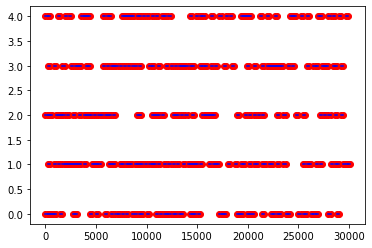

In [10]:
for i in range(len(channel.start)):
    x=[channel.start[i], channel.end[i]]
    print(x)
    y= [channel.operator[i], channel.operator[i]]
    print(y)
    plt.plot(x, y, color='b')
    plt.scatter(x, y, color='r')

[29753, 29961]
[1, 1]
[29638, 29846]
[0, 0]
[29465, 29673]
[1, 1]
[29245, 29453]
[1, 1]
[28993, 29201]
[0, 0]
[28492, 28700]
[1, 1]
[28443, 28651]
[0, 0]
[28270, 28478]
[1, 1]
[27957, 28165]
[1, 1]
[27812, 28020]
[0, 0]


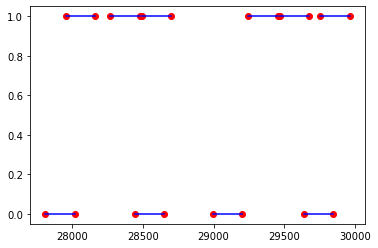

In [6]:
k = len(channel.start) - 1
for i in range(10):
    x=[channel.start[k - i], channel.end[k - i]]
    print(x)
    y= [channel.operator[k - i], channel.operator[k - i]]
    print(y)
    plt.plot(x, y, color='b')
    plt.scatter(x, y, color='r')

In [6]:
stations_list[0].history


[['IDLE', 1, 'TIMEOUT'],
 ['BOUT', 1, 'TIMEOUT'],
 ['BOUT', 1, 'TIMEOUT'],
 ['BOUT', 0, 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['BOUT', 0, 'unkonw'],
 ['BUSY', 0, 'unkonw'],
 ['IDLE', 0, 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['IOUT', tensor(0, device='cuda:0'), 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['IOUT', 0, 'unkonw'],
 ['BUSY', 0, 'unkonw'],
 ['BUSY', 0, 'unkonw'],
 ['BUSY', 0, 'unkonw'],
 ['BUSY', 0, 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['BOUT', 0, 'unkonw'],
 ['BUSY', 0, 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['BOUT', 1, 'TIMEOUT'],
 ['BOUT', 0, 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['BOUT', 0, 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['BOUT', 0, 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['BOUT', 1, 'TIMEOUT'],
 ['BOUT', 0, 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['BOUT', 0, 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['BOUT', 0, 'unkonw'],
 ['BUSY', 0, 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['BOUT', 1, 'TIMEOUT'],
 ['BOUT', tensor(0, device='cuda:0'), 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['BOUT', 1, 'TIMEOU

In [5]:
channel.time

30001.0

In [6]:
import numpy as np

In [16]:
result = np.zeros(20, int)

In [19]:
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [18]:
result = np.concatenate([result[1:],[1]])

In [6]:
station.collision_times

0